# <span style="color:blue">Análise de Dados com Base em Processamento Massivo em Paralelo</span>

# <span style="color:blue">Aula 03: Processo de ETL/ELT</span>
## <span style="color:blue">Exemplo usando Pandas</span>

**Conteúdo**
1. Fontes de Dados

2. Projeto do *Data Mart*

3. Importação usando Pandas

4. Integração de esquemas
   
   4.1. Conflito de nome (sinônimos)
   
   4.2. Conflito semântico
   
   4.3. Padronização das colunas

5. Integração de instâncias
    
    5.1. Considerando a fonte de dados funcionarioRelacional
    
    5.2. Considerando a fonte de dados colaboradorJSON
    
6. Carga dos dados no *Data Mart*

### 1 Fontes de Dados

Os dados dos funcionários estão armazenados em três fontes diferentes.

**Fonte 1**. *funcionarioRelacional.csv*: referente a um banco de dados relacional. Essa fonte armazena os funcionários da área de Engenharia.

**Fonte 2**. *colaboradorJSON.json*: arquivo JSON referente a uma base de dados NoSQL (Not Only SQL). Essa fonte armazena os funcionários da área de *Marketing*.

**Fonte 3**. *empregadoPlanilha.xlsx*: arquivo referente a uma planilha Excel. Essa fonte armazena os funcionários da área de Recursos Humanos. 

Na parte da aula, serão usadas as fontes 1 (funcionarioRelacional) e 2 (colaboradorJSON). A fonte 3 (empregadoPlanilha) será usada na lista de exercícios.



## 2 Projeto do *Data Mart*

O projeto do **data mart** refere-se ao esquema de relação *funcionario*. Esse esquema é definido a seguir, sendo que a chave primária é representada pelo atributo funcPK. 

funcionario (<ins>funcPK</ins>, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)


## 3 Importação usando Pandas 

As fontes de dados são importadas por meio da estrutura `Dataframe`. Essa estrutura permite a leitura das diferentes fontes consideradas: `csv`, `json` e `xlsx`. Quando essas fontes são importadas, elas são unificadas em um formato único, o formato do `Dataframe`, facilitando a manipulação.

In [ ]:
import pandas as pd

O comando a seguir realiza a importação dos dados dos funcionários armazenados em *funcionarioRelacional.csv* e armazena o resultado no `Dataframe` chamado funcionarioRelacional.


In [ ]:
funcionarioRelacional = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/ETL_Funcionarios/main/funcionarioRelacional.csv')

Os comandos a seguir exibem a quantidade de funcionários importados e os primeiros elementos de funcionarioRelacional.

In [ ]:
print('Quantidade de funcionários importados da Fonte 1 (funcionarioRelacional.csv): ', funcionarioRelacional.shape[0])
funcionarioRelacional.head()

O comando a seguir realiza a importação dos dados dos funcionários armazenados em *colaboradorJSON.json* e armazena o resultado no `Dataframe` chamado colaboradorJSON.

In [ ]:
colaboradorJSON = pd.read_json('https://raw.githubusercontent.com/GuiMuzziUSP/ETL_Funcionarios/main/colaboradorJSON.json')

Os comandos a seguir exibem a quantidade de funcionários importados e os primeiros elementos de colaboradorJSON.

In [ ]:
print('Quantidade de funcionários importados da Fonte 2 (colaboradorJSON.json): ', colaboradorJSON.shape[0])
colaboradorJSON.head()

## 4 Integração de Esquemas

Analisando-se as três fontes de dados, verifica-se que existem vários conflitos de nome e um conflito semântico. Todos esses conflitos devem ser tratados na integração de esquemas, conforme descrito a seguir.

### 4.1 Conflitos de nome (sinônimo)

Um conflito de nome (sinônimo) ocorre quando diferentes nomes são aplicados ao mesmo elemento. funcionarioRelacional, colaboradorJSON e empregadoPlanilha armazenam dados de funcionários. Existem vários conflitos de nome quando  os nomes dos atributos do esquema de relação *funcionario* são comparados com os nomes das colunas oriundas das respectivas fontes de dados. 

A partir da identificação dos conflitos, são definidas as correspondências existentes entre as fontes de dados e o esquema de relação do *data mart*. Essas correspondências são as mesmas que as identificadas no documento textual que acompanha esta aula. Elas são repetidas aqui por completude.

As correspondências entre os esquemas de *funcionario* e funcionarioRelacional são:

1. *funcionario* $\equiv$ funcionarioRelacional

> (a) funcMatricula = funcMatricula

> (b) funcNome = funcNome

> (c) funcSexo = funcSexo

> (d) funcDataNascimento = funcDataNasc

> (e) funcCidade = funcCidade

> (f) funcEstadoSigla = funcEstado

> (g) funcPaisNome = funcPais

De acordo com essas correspondências, o comando a seguir mapeia os nomes das colunas de funcionarioRelacional para os nomes dos atributos de *funcionario*. 


In [ ]:
funcionarioRelacional.columns = ['funcMatricula','funcNome','funcSexo','funcDataNascimento','funcCidade','funcEstadoSigla','funcPaisNome']

O comando a seguir exibe a nova estrutura e o primeiro elemento de funcionarioRelacional.

In [ ]:
funcionarioRelacional.head(1)

As correspondências entre os esquemas de funcionario e colaboradorJSON são:

2. *funcionario* $\equiv$ colaboradorJSON

> (a) funcMatricula = colab_matricula

> (b) funcNome = colab_nome

> (c) funcSexo = colab_sexo

> (d) funcDataNascimento = colab_data_nasc

> (e) funcCidade = colab_cidade

> (f) funcEstadoSigla = colab_estado

> (g) funcPaisSigla = colab_pais

De acordo com essas correspondências, o comando a seguir mapeia os nomes das colunas de colaboradorJSON para os nomes dos atributos de *funcionario*.



In [ ]:
colaboradorJSON.columns = ['funcMatricula','funcNome','funcSexo','funcDataNascimento','funcCidade','funcEstadoSigla','funcPaisSigla']

O comando a seguir exibe a nova estrutura e o primeiro elemento de colaboradorJSON.

In [ ]:
colaboradorJSON.head(1)

### 4.2 Conflito semântico

Um conflito semântico ocorre quando o mesmo elemento é modelado em diferentes esquemas, porém representando conjuntos que se sobrepõem. Como definido anteriormente, funcionarioRelacional armazena os funcionários da área de Engenharia, enquanto que colaboradorJSON armazena os funcionários da área de *Marketing*. É importante notar que: (i) existem funcionários que são diferentes entre si; (ii) o mesmo funcionário pode estar armazenado em mais do que uma fonte de dados, desde que ele mudou de área de atuação durante a sua trajetória.

Assim, devem ser identificados os funcionários que correspondem à mesma entidade do mundo real. Nesta aplicação de *data warehousing*, isso é feito por meio das **matrículas** dos funcionários, ou seja, considera-se a identificação unívoca das entidades. Considera-se também que os valores referentes à matricula dos funcionários já foram analisados na operação de limpeza dos dados e representam valores acurados. Portanto, `funcMatricula` pode ser usado para identificar os funcionários.

O comando a seguir mostra a quantidade de funcionários que aparecem em ambos funcionarioRelacional e colaboradorJSON, bem como detalhes desses funcionários. Isso significa que o funcionário transitou entre as áreas de Engenharia e *Marketing*. O sufixo `_x` indica colunas de funcionarioRelacional, enquanto que o sufixo `_y` indica colunas de colaboradorJSON. Como resultado, o `DataFrame` funcionario_colaborador possui os funcionários presentes em ambas fontes de dados. Os conflitos têm que ser resolvidos, o que será realizado durante a integração de instâncias.

In [ ]:
funcionario_colaborador = funcionarioRelacional.merge(colaboradorJSON, on = 'funcMatricula')
print('Quantidade de mesmos funcionários cadastrados nas fontes 1 e 2: ', funcionario_colaborador.shape[0])

# renomeando algumas colunas sem sufixo
funcionario_colaborador = funcionario_colaborador.rename(columns = {'funcPaisSigla': 'funcPaisSigla_y', 'funcPaisNome': 'funcPaisNome_x'}, inplace = False)

# monstrando algumas colunas do conflito
colunas_display = ['funcMatricula', 'funcNome_x', 'funcNome_y', 'funcCidade_x', 'funcCidade_y', 'funcPaisNome_x', 'funcPaisSigla_y']
funcionario_colaborador[colunas_display]

### 4.3 Padronização das colunas

O esquema de relação *funcionario* possui vários atributos que não estão presentes nas fontes de dados. Os comandos a seguir visam acrescentar colunas a funcionarioRelacional e colaboradorJSON. É atributído valor NULO para os valores dessas colunas. 

Os comandos a seguir realizam as seguintes ações para funcionarioRelacional. Primeiro, é mostrada a estrutura atual. Depois, são adicionadas as novas colunas, ou seja, as colunas faltantes. Por fim, é exibida a estrutura final.

In [ ]:
funcionarioRelacional.columns.tolist()

In [ ]:
funcionarioRelacional['funcDiaNascimento'] = None
funcionarioRelacional['funcMesNascimento'] = None
funcionarioRelacional['funcAnoNascimento'] = None
funcionarioRelacional['funcEstadoNome'] = None
funcionarioRelacional['funcRegiaoNome'] = None
funcionarioRelacional['funcRegiaoSigla'] = None
funcionarioRelacional['funcPaisSigla'] = None

In [ ]:
funcionarioRelacional.columns.tolist()

Os comandos a seguir realizam as seguintes ações para colaboradorJSON. Primeiro, é mostrada a estrutura atual. Depois, são adicionadas as novas colunas, ou seja, as colunas faltantes. Por fim, é exibida a estrutura final.

In [ ]:
colaboradorJSON.columns.tolist()

In [ ]:
colaboradorJSON['funcDiaNascimento'] = None
colaboradorJSON['funcMesNascimento'] = None
colaboradorJSON['funcAnoNascimento'] = None
colaboradorJSON['funcEstadoNome'] = None
colaboradorJSON['funcRegiaoNome'] = None
colaboradorJSON['funcRegiaoSigla'] = None
colaboradorJSON['funcPaisNome'] = None

In [ ]:
colaboradorJSON.columns.tolist()

## 5 Integração de Instâncias

Após a integração dos esquemas, é necessário realizar a integração de instâncias. Todas as instâncias presentes em funcionarioRelacional e em colaboradorJSON têm que ser integradas em *funcionario*, considerando o tipo de dados e o formato dos atributos desse esquema de relação.

Os seguintes tipos de dados e formatos são considerados para os atributos de *funcionario*:

a) funcMatricula: numérico;

b) funcNome: alfanumérico, com todas as letras maiúsculas;

c) funcSexo: alfanumérico de 1 caractere, com M indicando masculino e F indicando feminino;

d) funcDataNascimento: alfanumérico, com formato `dia/mês/ano`;

e) funcCidade: alfanumérico, com todas as letras maiúsculas;

f) funcEstadoNome: alfanumérico, com todas as letras maiúsculas;

g) funcEstadoSigla: alfanumérico de 2 caracteres, com todas as letras maiúsculas;

h) funcPaisNome: alfanumérico, com todas as letras maiúsculas;

i) funcPaisSigla: alfanumérico de 3 letras, com todas as letras maiúsculas; 


### 5.1 Considerando a fonte de dados funcionarioRelacional

O comando a seguir exemplifica instâncias de funcionarioRelacional.



In [ ]:
funcionarioRelacional.head()

Para facilitar as manipulações que devem ser realizadas nas instâncias de  funcionarioRelacional, é criada uma classe em Python chamada `ProcessamentoFonteRelacional`. Nessa classe, são criados vários métodos. Cada método é responsável pela tranformação de um dos atributos do conjunto de dados. Para essa fonte foram aplicados os seguintes mapeamentos: e (funcCidade), g (funcEstadoSigla), h (funcPaisNome).

In [ ]:
class ProcessamentoFonteRelacional:
  """
  Realiza a tranformacao de um dataframe com formato da fonte 
  funcionarioRelacional para um dataframe que segue os padrões definidos 
  para o esquema de relação funcionario.
  """

  def __init__(self, dados_funcionario):
    self.fonte_dados = dados_funcionario.copy(deep=True)

  def processar_cidade(self, cidade):
    """
    O atributo que representa a cidade em funcionarioRelacional precisa ser
    transformado para caracteres maiúsculos. Esta função realiza essa
    transformação.
    """
    if pd.isna(cidade):
      return None

    return cidade.upper()
    
  def processar_estado_sigla(self, estado):
    """
    O atributo que representa a sigla do estado em funcionarioRelacional 
    precisa ser transformado para caracteres maiúsculos. Essa função realiza 
    essa transformação.
    """
    if pd.isna(estado):
      return None

    return estado.upper()

  def processar_pais_nome(self, paisNome):
    """
    O atributo que representa o nome do país em funcionarioRelacional precisa 
    ser transformado para caracteres maiúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(paisNome):
      return None

    return paisNome.upper()

  def executar_transformacoes(self):
    """
    Essa função processa cada atributo do dataframe composto pelos dados da 
    fonte funcionarioRelacional
    """
    
    self.fonte_dados['funcCidade'] = self.fonte_dados.apply(lambda x : self.processar_cidade(x['funcCidade']), axis=1)
    self.fonte_dados['funcEstadoSigla'] = self.fonte_dados.apply(lambda x : self.processar_estado_sigla(x['funcEstadoSigla']), axis=1)
    self.fonte_dados['funcPaisNome'] = self.fonte_dados.apply(lambda x : self.processar_pais_nome(x['funcPaisNome']), axis=1)
    
    return self.fonte_dados

O primeiro comando a seguir realiza o processamento da fonte funcionarioRelacional, enquanto que o segundo comando mostra alguns funcionários de funcionarioRelacional depois de ser realizado o mapeamento para o tipo de dados e o formato de funcionario.

In [ ]:
novo_funcionario_relacional = ProcessamentoFonteRelacional(funcionarioRelacional).executar_transformacoes()

In [ ]:
novo_funcionario_relacional.head()

### 5.2 Considerando a fonte de dados colaboradorJSON

O comando a seguir exemplifica instâncias de colaboradorJSON.

In [ ]:
colaboradorJSON.head()

Para facilitar as manipulações que devem ser realizadas nas instâncias de  colaboradorJSON, foi criada uma classe em Python chamada `ProcessamentoFonteJSON`. Nessa classe, são criados vários métodos. Cada método é responsável pela tranformação de um dos atributos do conjunto de dados. Para essa fonte foram aplicados os seguintes mapeamentos: b (funcNome), c (funcSexo), d (funcDataNascimento), e (funcCidade), g (funcEstadoSigla), i (funcPaisSigla).

In [ ]:
class ProcessamentoFonteJSON:
  """
  Realiza a tranformacao de um dataframe com formato da fonte colaboradorJSON 
  para um dataframe que segue os padrões definidos pelo esquema de 
  relação funcionario.
  """

  def __init__(self, dados_funcionario):
    self.fonte_dados = dados_funcionario.copy(deep=True)

  def processar_nome(self, nome):
    """
    O atributo que representa a o nome do funcionário em colaboradorJSON 
    precisa ser transformado para caracteres maiúsculos. Essa função realiza 
    essa transformação.
    """
    if pd.isna(nome):
      return None

    return nome.upper()
    
  def processar_sexo(self, sexo):
    """
    O atributo que representa sexo em colaboradorJSON utiliza uma representação
    binária, na qual o valor 0 representa masculino e 1 representa feminino. 
    Essa função é responsável por representar os valores de sexo como M e F,
    respectivamente. 
    """
    if pd.isna(sexo):
      return None

    return 'M' if sexo == 0 else 'F'

  def processar_data(self, data):
    """
    O atributo que representa a data de nascimento em colaboradorJSON precisa 
    ser transformado para o formato 'dia/mês/ano'.  Essa função realiza essa
    transformação.
    """
    if pd.isna(data):
      return None
      
    ano, mes, dia = data.split('-')
    return '%02d/%02d/%d' % (int(dia), int(mes), int(ano))

  def processar_cidade(self, cidade):
    """
    O atributo que representa o nome da cidade em colaboradorJSON precisa ser
    transformado para caracteres minúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(cidade):
      return None

    return cidade.upper()
    
  def processar_estado_sigla(self, estado):
    """
    O atributo que representa a sigla do estado em colaboradorJSON precisa ser
    transformado para caracteres minúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(estado):
      return None

    return estado.upper()

  def processar_pais_sigla(self, pais):
    """
    O atributo que representa a sigla do pais em colaboradorJSON 
    segue o mesmo padrão adotado pelo atributo funcPaisSigla de funcionario. 
    Portanto, não há necessidade de realizar transformação.
    """
    if pd.isna(pais):
      return None

    return pais.upper()

  def executar_transformacoes(self):
    """
    Essa função processa cada atributo do dataframe composto pelos dados da 
    fonte colaboradorJSON
    """
    self.fonte_dados['funcNome'] = self.fonte_dados.apply(lambda x : self.processar_nome(x['funcNome']), axis=1)
    self.fonte_dados['funcSexo'] = self.fonte_dados.apply(lambda x : self.processar_sexo(x['funcSexo']), axis=1)
    self.fonte_dados['funcDataNascimento'] = self.fonte_dados.apply(lambda x : self.processar_data(x['funcDataNascimento']), axis=1)
    self.fonte_dados['funcCidade'] = self.fonte_dados.apply(lambda x : self.processar_cidade(x['funcCidade']), axis=1)
    self.fonte_dados['funcEstadoSigla'] = self.fonte_dados.apply(lambda x : self.processar_estado_sigla(x['funcEstadoSigla']), axis=1)
    self.fonte_dados['funcPaisSigla'] = self.fonte_dados.apply(lambda x : self.processar_pais_sigla(x['funcPaisSigla']), axis=1)
    
    return self.fonte_dados


O primeiro comando a seguir realiza o processamento da fonte colaboradorJSON,  enquanto que o segundo comando mostra alguns funcionários de colaborador JSON depois de ser realizado o mapeamento para o tipo de dados e o formato de *funcionario*.


In [ ]:
novo_colaborador_JSON = ProcessamentoFonteJSON(colaboradorJSON).executar_transformacoes()

In [ ]:
novo_colaborador_JSON.head()

### 5.4 Integrando as instâncias

Todas as instâncias presentes em novo_funcionario_relacional e novo_colaborador_JSON devem ser integradas. 

Apenas para relembrar, existem funcionários presentes tanto em funcionarioRelacional quanto em colaboradorJSON. O comando a seguir mostra alguns exemplos de colunas que possuem valores diferentes de atributos. Colunas com sufixo `_x` representam colunas de novo_funcionario_relacional, enquanto que colunas com sufixo `_y` representam colunas de novo_colaborador_JSON. 

In [ ]:
colunas_display = ['funcNome_x', 'funcNome_y', 'funcCidade_x', 'funcCidade_y', 'funcPaisNome_x', 'funcPaisSigla_y']
novo_funcionario_relacional.merge(right=novo_colaborador_JSON, on='funcMatricula')[colunas_display]

Para facilitar o processo, a coluna `funcMatricula` é transformada em índice do `DataFrame`.

In [ ]:
def preprocessamento_dataframe(df):
  """
  Clona o DataFrame, e altera o indice para funcMatricula
  """
  ndf = df.copy(deep=True)
  return ndf.set_index('funcMatricula')

In [ ]:
novo_funcionario_relacional = preprocessamento_dataframe(novo_funcionario_relacional)
novo_colaborador_JSON = preprocessamento_dataframe(novo_colaborador_JSON)

Um aspecto importante considerado na integração de instâncias é a confiabilidade das fontes, definida da seguinte forma: a fonte 1 é a mais confiável, seguida pela fonte 2.

O comando a seguir escolhe o valor do atributo mais confiável tendo como entrada 2 fontes representadas por A e B.

In [ ]:
def processar_conflitos(indices, fonte_A, fonte_B):
  """
  Processa os conflitos das fontes com base na confiabilidade das mesmas,
  sendo a fonte_A a mais confiável.
  """
  columns = fonte_A.columns
  for index in indices:
    a = fonte_A.loc[index]
    b = fonte_B.loc[index]
    for column in columns:
      fonte_A.at[index, column] = b[column] if pd.isna(a[column]) else a[column]
  return fonte_A

O comando a seguir integra instâncias presentes tanto em novo_funcionario_relacional quanto em novo_colaborador_JSON usando como base a confiabilidade das fontes. Os valores dos atributos do primeiro `DataFrame` são escolhidos a menos que sejam valores nulos. Nesse caso, são escolhidos os valores dos atributos do segundo `DataFrame`. Note que, em `df_processado`, são armazenados todos os funcionários da fonte funcionarioRelacional, sendo que, para os funcionários presentes também em colaboradorJSON, ocorre a resolução dos valores dos atributos.

In [ ]:
# indices do conflito da fonte 1 (mais confiável) e fonte 2
indices = funcionario_colaborador['funcMatricula'].tolist()
df_processado = processar_conflitos(indices, novo_funcionario_relacional, novo_colaborador_JSON)

In [ ]:
df_processado.loc[indices][['funcNome', 'funcCidade', 'funcPaisNome', 'funcPaisSigla']]

O esquema de relação *funcionario* a ser armazenado no *data mart* deve conter todos os funcionários. Entretanto, como resultado do último comando, esse esquema contém apenas os funcionários presentes na fonte funcionarioRelacional. O comando a seguir incorpora também a *funcionario* todos os funcionários presentes na fonte colaboradorJSON, com exceção dos funcionários já considerados anteriormente. Como resultado, são geradas todas as instâncias de *funcionario*. Na sequência, o próximo comando ilustra algumas linhas geradas.

In [ ]:
def interseccao_indices(lst1, lst2):
  """
  Retornar os indices duplicados
  """
  return list(set(lst1).intersection(lst2))


def gera_funcionario(df1, df2):
  """
  Realiza a uniao dos dataframes
  """
  indices1 = df1.index.tolist()
  indices2 = df2.index.tolist()
  # remove os indices duplicados
  indices_drop = interseccao_indices(indices1, indices2)
  df2_drop = df2.drop(indices_drop)
  # retorna a uniao dos dois dataframes
  return df1.append(df2_drop).sort_index()

In [ ]:
funcionario = gera_funcionario(df_processado, novo_colaborador_JSON).reset_index().sample(frac=1)

In [ ]:
print('Tamanho da fonte final: ', funcionario.shape[0])
display(funcionario)

## 6 Carga dos Dados no *Data Mart*

Antes dos dados serem carregados no *data mart*, devem ser realizados processamentos adicionais. Esses processamentos referem-se a: (i) verificação de valores nulos; e (ii) geração automática de dados para preencher colunas que não foram preenchidas pelos dados oriundos das fontes.

O comando a seguir verifica a presença de valores nulos e também valores de colunas que não foram preenchidas.

In [ ]:
funcionario.info()

O comando a seguir realiza o preenchimento de dados nas colunas de `funcEstadoNome` usando como base `funcEstadoSigla`.

In [ ]:
funcionario['funcEstadoSigla'].unique()

In [ ]:
mapear_estados_nome = {'RJ':'RIO DE JANEIRO', 'SP':'SAO PAULO',\
                  'PR':'PARANA', 'PE':'PERNAMBUCO', 'MG':'MINAS GERAIS'}
funcEstadoNome = lambda x, y: y if pd.isna(x) else mapear_estados_nome[x]
funcionario['funcEstadoNome'] = funcionario.apply(lambda x: funcEstadoNome(x['funcEstadoSigla'], x['funcEstadoNome']), axis=1)

O comando a seguir realiza o preenchimento de dados nas colunas de `funcEstadoSigla` usando como base `funcEstadoNome`.

In [ ]:
mapear_estados_sigla = {'RIO DE JANEIRO':'RJ', 'SAO PAULO':'SP',\
                  'PARANA':'PR', 'PERNAMBUCO':'PE', 'MINAS GERAIS':'MG'}
funcEstadoSigla = lambda x, y: y if pd.isna(x) else mapear_estados_sigla[x]
funcionario['funcEstadoSigla'] = funcionario.apply(lambda x: funcEstadoSigla(x['funcEstadoNome'], x['funcEstadoSigla']), axis=1)

Os comandos a seguir realizam o preenchimento de dados nas colunas `funcPaisSigla` e `funcPais`.

In [ ]:
funcionario['funcPaisSigla'].unique()

In [ ]:
funcionario['funcPaisNome'].unique()

In [ ]:
funcionario['funcPaisSigla'] = 'BRA'
funcionario['funcPaisNome'] = 'BRASIL'

O comando a seguir verifica novamente a presença de valores nulos e também valores de colunas que não foram preenchidas. 

In [ ]:
funcionario.info()

Os comandos a seguir realizam o preenchimento de dados nas colunas   `funcDiaNascimento` e `funcMesNascimento`, e `funcAnoNascimento`. Para tanto, são usados os valores presentes em `funcDataNascimento`.

In [ ]:
# extraindo o dia, mês e ano de nascimento
dataNascimento = {'DIA': 0, 'MES': 1, 'ANO': 2}

def processa_data_nascimento(dataNascimento, campo):
  if pd.isna(dataNascimento):
    return None
  return dataNascimento.split('/')[campo]


funcionario['funcDiaNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['DIA']), axis=1)
funcionario['funcMesNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['MES']), axis=1)
funcionario['funcAnoNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['ANO']), axis=1)

Os comandos a seguir realizam o preenchimento de dados nas colunas funcRegiaoNome e funcRegiaoSigla.

In [ ]:
mapear_regiao_nome = {'RJ':'SUDESTE', 'SP':'SUDESTE',\
                  'PR':'SUL', 'PE':'NORDESTE', 'MG':'SUDESTE', None:None}
funcionario['funcRegiaoNome'] = funcionario.apply(lambda x: mapear_regiao_nome[x['funcEstadoSigla']], axis=1)

In [ ]:
mapear_regiao_sigla = {'SUDESTE':'SE', 'SUL':'S', 'NORDESTE':'NE', None:None}
funcionario['funcRegiaoSigla'] = funcionario.apply(lambda x: mapear_regiao_sigla[x['funcRegiaoNome']], axis=1)

Por fim, tem-se a coluna `funcPK`. Em *funcionario*, já existe a coluna `funcMatricula`, que identifica univocamente cada funcionário. Entretanto, pode ser que o valor dessa coluna seja preenchido com dados muito grandes, contendo letras e números. Nesse caso, quando se projeta o esquema do *data mart*, acrescenta-se uma coluna adicional para representar a chave primária, a qual é preenchida com valores incrementados de 1 em 1 em ordem crescente. 

O comando a seguir acrescenta a coluna funcPK a funcionario.

In [ ]:
funcionario.reset_index(drop=True, inplace=True)
funcionario['funcPK'] = list(range(1, funcionario.shape[0]+1))

O comando a seguir ilustra a nova estrutura do esquema de relação *funcionario*, bem como alguns de seus dados

In [ ]:
display(funcionario[['funcPK', 'funcMatricula', 'funcNome', 'funcSexo', 'funcCidade', 'funcEstadoNome', 'funcRegiaoNome', 'funcPaisNome']])

O comando a seguir verifica a presença de valores nulos em funcionario. Esses valores serão preenchidos com a integração dos dados da fonte de dados 3. Realizar essa integração é a lista de exercícios da aula. 

In [ ]:
funcionario.info()

Como o *data mart* é armazenado seguindo o modelo relacional, o comando a seguir gera um arquivo *.csv* referente a *funcionario*. 

In [ ]:
funcionario.to_csv('funcionario.csv')

# <span style="color:blue">Aula 03: Lista exercícios - Processo de ETL/ELT</span>
## <span style="color:blue">Exemplo usando Pandas</span>

**Essa lista de exercícios contém 10 exercícios, os quais estão espalhados ao longo do texto. Por favor, procurem por "Exercício" para encontrar a especificação dos exercícios e também o local no qual os comandos devem ser inseridos.** 

**Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios.** 



**Conteúdo**
1. Fontes de Dados

2. Projeto do *Data Mart*

3. Importação usando Pandas

4. Integração de esquemas
   
   4.1. Conflito de nome (sinônimos)
   
   4.2. Conflito semântico
   
   4.3. Padronização das colunas

5. Integração de instâncias
    
    5.1. Considerando a fonte de dados funcionarioRelacional
    
    5.2. Considerando a fonte de dados colaboradorJSON
    
6. Carga dos dados no *Data Mart*

### 1 Fontes de Dados

Os dados dos funcionários estão armazenados em três fontes diferentes.

**Fonte 1**. *funcionarioRelacional.csv*: referente a um banco de dados relacional. Essa fonte armazena os funcionários da área de Engenharia.

**Fonte 2**. *colaboradorJSON.json*: arquivo JSON referente a uma base de dados NoSQL (Not Only SQL). Essa fonte armazena os funcionários da área de *Marketing*.

**Fonte 3**. *empregadoPlanilha.xlsx*: arquivo referente a uma planilha Excel. Essa fonte armazena os funcionários da área de Recursos Humanos. 

Na parte da aula, serão usadas as fontes 1 (funcionarioRelacional) e 2 (colaboradorJSON). A fonte 3 (empregadoPlanilha) será usada na lista de exercícios.



## 2 Projeto do *Data Mart*

O projeto do **data mart** refere-se ao esquema de relação *funcionario*. Esse esquema é definido a seguir, sendo que a chave primária é representada pelo atributo funcPK. 

funcionario (<ins>funcPK</ins>, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)


## 3 Importação usando Pandas 

As fontes de dados são importadas por meio da estrutura `Dataframe`. Essa estrutura permite a leitura das diferentes fontes consideradas: `csv`, `json` e `xlsx`. Quando essas fontes são importadas, elas são unificadas em um formato único, o formato do `Dataframe`, facilitando a manipulação.

In [ ]:
import pandas as pd

O comando a seguir realiza a importação dos dados dos funcionários armazenados em *funcionarioRelacional.csv* e armazena o resultado no `Dataframe` chamado funcionarioRelacional.


In [ ]:
funcionarioRelacional = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/ETL_Funcionarios/main/funcionarioRelacional.csv')

Os comandos a seguir exibem a quantidade de funcionários importados e os primeiros elementos de funcionarioRelacional.

In [ ]:
print('Quantidade de funcionários importados da Fonte 1 (funcionarioRelacional.csv): ', funcionarioRelacional.shape[0])
funcionarioRelacional.head()

Quantidade de funcionários importados da Fonte 1 (funcionarioRelacional.csv):  56


,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil
1,2,NaN,M,2/2/1990,campinas,sp,brasil
2,3,ARON ANDRADE,M,3/3/1990,santos,sp,brasil
3,4,ADA BARBOSA,NaN,4/4/1990,santo andre,sp,brasil
4,5,ABADE BATISTA,M,5/5/1990,piracicaba,sp,brasil


O comando a seguir realiza a importação dos dados dos funcionários armazenados em *colaboradorJSON.json* e armazena o resultado no `Dataframe` chamado colaboradorJSON.

In [ ]:
colaboradorJSON = pd.read_json('https://raw.githubusercontent.com/GuiMuzziUSP/ETL_Funcionarios/main/colaboradorJSON.json')

Os comandos a seguir exibem a quantidade de funcionários importados e os primeiros elementos de colaboradorJSON.

In [ ]:
print('Quantidade de funcionários importados da Fonte 2 (colaboradorJSON.json): ', colaboradorJSON.shape[0])
colaboradorJSON.head()

Quantidade de funcionários importados da Fonte 2 (colaboradorJSON.json):  31


,colab_matricula,colab_nome,colab_sexo,colab_data_nasc,colab_cidade,colab_estado,colab_pais
0,2,Arao Alves,NaN,None,None,None,None
1,4,None,1.0,None,None,None,None
2,8,None,NaN,1990-08-08,None,None,None
3,13,Arao Alves,0.0,None,None,RJ,BRA
4,52,Adailton Costa,0.0,1951-04-21,Recife,PE,BRA


### Exercício 1

Realize a importação dos dados dos funcionários armazenados em empregadoPlanilha.xlsx. Considere que essa fonte está localizada na URL https://github.com/GuiMuzziUSP/ETL_Funcionarios/blob/main/empregadoPlanilha.xlsx?raw=true

In [ ]:
empregadoPlanilha = pd.read_excel('https://github.com/GuiMuzziUSP/ETL_Funcionarios/blob/main/empregadoPlanilha.xlsx?raw=true')

In [ ]:
# imprima a quantidade de instâncias em 'empregadoPlanilha'
print('Quantidade de funcionários importados da Fonte 3 (empregadoPlanilha.xlsx): ', empregadoPlanilha.shape[0])

Quantidade de funcionários importados da Fonte 3 (empregadoPlanilha.xlsx):  29


In [ ]:
# imprima as 10 primeiras instâncias de 'empregadoPlanilha'
display(empregadoPlanilha.head(10))

,Matrícula do Empregado,Nome do Empregado,Sexo do Empregado,Data de Nascimento,Cidade de Residência,Estado de Residência
0,13,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro
1,16,NaN,NaN,NaN,Praia Seca,Rio de Janeiro
2,32,"Costa, Abdiel",NaN,NaN,Piracicaba,Sao Paulo
3,66,NaN,NaN,05/06/1965,NaN,Sao Paulo
4,67,"Borges, Adelma",NaN,NaN,Rio De Janeiro,Rio de Janeiro
5,77,"Ferreira, Abener",Masculino,16/5/1976,Guaratuba,Parana
6,78,"Garcia, Adenir",Masculino,17/6/1977,Morretes,Parana
7,79,"Gomes, Adenil",Masculino,18/7/1978,Recife,Pernambuco
8,80,"Lima, Abener",Masculino,19/8/1979,Recife,Pernambuco
9,81,"Almeida, Adenevaldo",Masculino,20/9/1980,Recife,Pernambuco


## 4 Integração de Esquemas

Analisando-se as três fontes de dados, verifica-se que existem vários conflitos de nome e um conflito semântico. Todos esses conflitos devem ser tratados na integração de esquemas, conforme descrito a seguir.

### 4.1 Conflitos de nome (sinônimo)

Um conflito de nome (sinônimo) ocorre quando diferentes nomes são aplicados ao mesmo elemento. funcionarioRelacional, colaboradorJSON e empregadoPlanilha armazenam dados de funcionários. Existem vários conflitos de nome quando  os nomes dos atributos do esquema de relação *funcionario* são comparados com os nomes das colunas oriundas das respectivas fontes de dados. 

A partir da identificação dos conflitos, são definidas as correspondências existentes entre as fontes de dados e o esquema de relação do *data mart*. Essas correspondências são as mesmas que as identificadas no documento textual que acompanha esta aula. Elas são repetidas aqui por completude.

As correspondências entre os esquemas de *funcionario* e funcionarioRelacional são:

1. *funcionario* $\equiv$ funcionarioRelacional

> (a) funcMatricula = funcMatricula

> (b) funcNome = funcNome

> (c) funcSexo = funcSexo

> (d) funcDataNascimento = funcDataNasc

> (e) funcCidade = funcCidade

> (f) funcEstadoSigla = funcEstado

> (g) funcPaisNome = funcPais

De acordo com essas correspondências, o comando a seguir mapeia os nomes das colunas de funcionarioRelacional para os nomes dos atributos de *funcionario*. 


In [ ]:
funcionarioRelacional.columns = ['funcMatricula','funcNome','funcSexo','funcDataNascimento','funcCidade','funcEstadoSigla','funcPaisNome']

O comando a seguir exibe a nova estrutura e o primeiro elemento de funcionarioRelacional.

In [ ]:
funcionarioRelacional.head(1)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisNome
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil


As correspondências entre os esquemas de funcionario e colaboradorJSON são:

2. *funcionario* $\equiv$ colaboradorJSON

> (a) funcMatricula = colab_matricula

> (b) funcNome = colab_nome

> (c) funcSexo = colab_sexo

> (d) funcDataNascimento = colab_data_nasc

> (e) funcCidade = colab_cidade

> (f) funcEstadoSigla = colab_estado

> (g) funcPaisSigla = colab_pais

De acordo com essas correspondências, o comando a seguir mapeia os nomes das colunas de colaboradorJSON para os nomes dos atributos de *funcionario*.



In [ ]:
colaboradorJSON.columns = ['funcMatricula','funcNome','funcSexo','funcDataNascimento','funcCidade','funcEstadoSigla','funcPaisSigla']

O comando a seguir exibe a nova estrutura e o primeiro elemento de colaboradorJSON.

In [ ]:
colaboradorJSON.head(1)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisSigla
0,2,Arao Alves,NaN,None,None,None,None


### Exercício 2

Considere as correspondências entre os esquemas de funcionario e empregadoPlanilha definidas a seguir:

3. *funcionario* $\equiv$ empregadoPlanilha

> (a) funcMatricula = Matrícula do Empregado

> (b) funcNome = Nome do Empregado

> (c) funcSexo = Sexo do Empregado

> (d) funcDataNascimento = Data de Nascimento

> (e) funcCidade = Cidade de Residência

> (f) funcEstadoNome = Estado de Residência

De acordo com essas regras correspondências, 



**Exercício 2a.** Realize o mapeamento dos nomes das colunas de empregadoPlanilha para os nomes dos atributos de *funcionario*.

In [ ]:
# realize o mapeamento em 'empregadoPlanilha', de acordo com as instrucoes acima
empregadoPlanilha.columns = ['funcMatricula','funcNome','funcSexo','funcDataNascimento','funcCidade','funcEstadoNome']

**Exercício 2b.** Exiba a nova estrutura e o primeiro elemento de empregadoPlanilha.

In [ ]:
# imprima a primeira instância de 'empregadoPlanilha'
empregadoPlanilha.head(1)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoNome
0,13,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro


### 4.2 Conflito semântico

Um conflito semântico ocorre quando o mesmo elemento é modelado em diferentes esquemas, porém representando conjuntos que se sobrepõem. Como definido anteriormente, funcionarioRelacional armazena os funcionários da área de Engenharia, enquanto que colaboradorJSON armazena os funcionários da área de *Marketing*. É importante notar que: (i) existem funcionários que são diferentes entre si; (ii) o mesmo funcionário pode estar armazenado em mais do que uma fonte de dados, desde que ele mudou de área de atuação durante a sua trajetória.

Assim, devem ser identificados os funcionários que correspondem à mesma entidade do mundo real. Nesta aplicação de *data warehousing*, isso é feito por meio das **matrículas** dos funcionários, ou seja, considera-se a identificação unívoca das entidades. Considera-se também que os valores referentes à matricula dos funcionários já foram analisados na operação de limpeza dos dados e representam valores acurados. Portanto, `funcMatricula` pode ser usado para identificar os funcionários.

O comando a seguir mostra a quantidade de funcionários que aparecem em ambos funcionarioRelacional e colaboradorJSON, bem como detalhes desses funcionários. Isso significa que o funcionário transitou entre as áreas de Engenharia e *Marketing*. O sufixo `_x` indica colunas de funcionarioRelacional, enquanto que o sufixo `_y` indica colunas de colaboradorJSON. Como resultado, o `DataFrame` funcionario_colaborador possui os funcionários presentes em ambas fontes de dados. Os conflitos têm que ser resolvidos, o que será realizado durante a integração de instâncias.

In [ ]:
funcionario_colaborador = funcionarioRelacional.merge(colaboradorJSON, on = 'funcMatricula')
print('Quantidade de mesmos funcionários cadastrados nas fontes 1 e 2: ', funcionario_colaborador.shape[0])

# renomeando algumas colunas sem sufixo
funcionario_colaborador = funcionario_colaborador.rename(columns = {'funcPaisSigla': 'funcPaisSigla_y', 'funcPaisNome': 'funcPaisNome_x'}, inplace = False)

# apresente o resultado do conflito
colunas_display = ['funcMatricula', 'funcNome_x', 'funcNome_y', 'funcCidade_x', 'funcCidade_y', 'funcPaisNome_x', 'funcPaisSigla_y']
display(funcionario_colaborador[colunas_display])

Quantidade de mesmos funcionários cadastrados nas fontes 1 e 2:  7


,funcMatricula,funcNome_x,funcNome_y,funcCidade_x,funcCidade_y,funcPaisNome_x,funcPaisSigla_y
0,2,NaN,Arao Alves,campinas,None,brasil,None
1,4,ADA BARBOSA,None,santo andre,None,brasil,None
2,8,ABADIAS CAMPOS,None,ilha bela,None,brasil,None
3,13,ABDIEL DIAS,Arao Alves,rio de janeiro,None,brasil,BRA
4,64,ABILIO BARBOSA,None,NaN,Osasco,NaN,BRA
5,67,ADELMA BORGES,None,NaN,None,brasil,None
6,83,ADENIAS ANDRADE,Adenias Andrade,campinas,None,NaN,BRA


### Exercício 3

Especifique comandos similares aos comandos definidos acima para funcionario_colaborador, considerando as seguintes aspectos:

**Exercício 3a.** Gere o DataFrame funcionario_empregado, o qual contém os funcionários que aparecem em ambos funcionarioRelacional e empregadoPlanilha. Nesse exercício você utilizará as fontes `funcionarioRelacional` e `empregadoPlanilha`.

In [ ]:
funcionario_empregado = funcionarioRelacional.merge(empregadoPlanilha, on = 'funcMatricula')

# apresente o resultado do conflito
print('Quantidade de mesmos funcionários cadastrados nas fontes 1 e 3: ', funcionario_empregado.shape[0])
display(funcionario_empregado)

Quantidade de mesmos funcionários cadastrados nas fontes 1 e 3:  7


,funcMatricula,funcNome_x,funcSexo_x,funcDataNascimento_x,funcCidade_x,funcEstadoSigla,funcPaisNome,funcNome_y,funcSexo_y,funcDataNascimento_y,funcCidade_y,funcEstadoNome
0,13,ABDIEL DIAS,M,13/1/1990,rio de janeiro,rj,brasil,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro
1,16,ABDALLA FERNANDES,M,16/4/1990,NaN,NaN,brasil,NaN,NaN,NaN,Praia Seca,Rio de Janeiro
2,32,NaN,M,1/8/1990,NaN,NaN,NaN,"Costa, Abdiel",NaN,NaN,Piracicaba,Sao Paulo
3,86,ADENILDE BARROS,NaN,25/2/1985,NaN,NaN,NaN,"Barros, Adenilde",Feminino,NaN,Piracicaba,Sao Paulo
4,90,NaN,NaN,29/6/1989,sao jose do rio preto,sp,brasil,"Carvalho, Adenilton",Masculino,29/6/1989,NaN,NaN
5,67,ADELMA BORGES,M,6/7/1966,NaN,rj,brasil,"Borges, Adelma",NaN,NaN,Rio De Janeiro,Rio de Janeiro
6,83,ADENIAS ANDRADE,NaN,22/11/1982,campinas,sp,NaN,NaN,Masculino,22/11/1982,Campinas,Sao Paulo


**Exercício 3b.** Gere o DataFrame colaborador_empregado, o qual contém os funcionários que aparecem em ambos colaboradorJSON e empregadoPlanilha. Nesse exercício você utilizará as fontes `colaboradorJSON` e `empregadoPlanilha`.

In [ ]:
colaborador_empregado = colaboradorJSON.merge(empregadoPlanilha, on = 'funcMatricula')

# apresente o resultado do conflito
print('Quantidade de mesmos funcionários cadastrados nas fontes 2 e 3: ', colaborador_empregado.shape[0])
display(colaborador_empregado)

Quantidade de mesmos funcionários cadastrados nas fontes 2 e 3:  5


,funcMatricula,funcNome_x,funcSexo_x,funcDataNascimento_x,funcCidade_x,funcEstadoSigla,funcPaisSigla,funcNome_y,funcSexo_y,funcDataNascimento_y,funcCidade_y,funcEstadoNome
0,13,Arao Alves,0.0,None,None,RJ,BRA,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro
1,66,Adelita Barros,1.0,None,Barueri,None,BRA,NaN,NaN,05/06/1965,NaN,Sao Paulo
2,67,None,0.0,1966-07-06,None,RJ,None,"Borges, Adelma",NaN,NaN,Rio De Janeiro,Rio de Janeiro
3,83,Adenias Andrade,0.0,1982-11-22,None,None,BRA,NaN,Masculino,22/11/1982,Campinas,Sao Paulo
4,99,Adercio Gomes,0.0,None,None,None,None,NaN,NaN,7/3/1998,Araguari,Minas Gerais


**Exercício 3c.** Gere o DataFrame funcionario_colaborador_empregado, o qual contém os funcionários que aparecem em todas as fontes de dados. Nesse exercício você utilizará os DataFrame `funcionario_colaborador` e `empregadoPlanilha`.

In [ ]:
funcionario_colaborador_empregado = funcionario_colaborador.merge(empregadoPlanilha, on = 'funcMatricula')

# apresente o resultado do conflito
print('Quantidade de mesmos funcionários cadastrados nas fontes 1, 2 e 3: ', funcionario_colaborador_empregado.shape[0])
display(funcionario_colaborador_empregado)

Quantidade de mesmos funcionários cadastrados nas fontes 1, 2 e 3:  3


,funcMatricula,funcNome_x,funcSexo_x,funcDataNascimento_x,funcCidade_x,funcEstadoSigla_x,funcPaisNome_x,funcNome_y,funcSexo_y,funcDataNascimento_y,funcCidade_y,funcEstadoSigla_y,funcPaisSigla_y,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoNome
0,13,ABDIEL DIAS,M,13/1/1990,rio de janeiro,rj,brasil,Arao Alves,0.0,None,None,RJ,BRA,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro
1,67,ADELMA BORGES,M,6/7/1966,NaN,rj,brasil,None,0.0,1966-07-06,None,RJ,None,"Borges, Adelma",NaN,NaN,Rio De Janeiro,Rio de Janeiro
2,83,ADENIAS ANDRADE,NaN,22/11/1982,campinas,sp,NaN,Adenias Andrade,0.0,1982-11-22,None,None,BRA,NaN,Masculino,22/11/1982,Campinas,Sao Paulo


### 4.3 Padronização das colunas

O esquema de relação *funcionario* possui vários atributos que não estão presentes nas fontes de dados. Os comandos a seguir visam acrescentar colunas a funcionarioRelacional e colaboradorJSON. É atributído valor NULO para os valores dessas colunas. 

Os comandos a seguir realizam as seguintes ações para funcionarioRelacional. Primeiro, é mostrada a estrutura atual. Depois, são adicionadas as novas colunas, ou seja, as colunas faltantes. Por fim, é exibida a estrutura final.

In [ ]:
funcionarioRelacional.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoSigla',
 'funcPaisNome']

In [ ]:
funcionarioRelacional['funcDiaNascimento'] = None
funcionarioRelacional['funcMesNascimento'] = None
funcionarioRelacional['funcAnoNascimento'] = None
funcionarioRelacional['funcEstadoNome'] = None
funcionarioRelacional['funcRegiaoNome'] = None
funcionarioRelacional['funcRegiaoSigla'] = None
funcionarioRelacional['funcPaisSigla'] = None

In [ ]:
funcionarioRelacional.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoSigla',
 'funcPaisNome',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcEstadoNome',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisSigla']

Os comandos a seguir realizam as seguintes ações para colaboradorJSON. Primeiro, é mostrada a estrutura atual. Depois, são adicionadas as novas colunas, ou seja, as colunas faltantes. Por fim, é exibida a estrutura final.

In [ ]:
colaboradorJSON.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoSigla',
 'funcPaisSigla']

In [ ]:
colaboradorJSON['funcDiaNascimento'] = None
colaboradorJSON['funcMesNascimento'] = None
colaboradorJSON['funcAnoNascimento'] = None
colaboradorJSON['funcEstadoNome'] = None
colaboradorJSON['funcRegiaoNome'] = None
colaboradorJSON['funcRegiaoSigla'] = None
colaboradorJSON['funcPaisNome'] = None

In [ ]:
colaboradorJSON.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoSigla',
 'funcPaisSigla',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcEstadoNome',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisNome']

### Exercício 4

Adicione as colunas faltantes em empregadoPlanilha, de forma similar aos comandos anteriores.

In [ ]:
# apresente as colunas de 'empregadoPlanilha'
empregadoPlanilha.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoNome']

In [ ]:
# adicione as colunas faltantes em 'empregadoPlanilha'
empregadoPlanilha['funcDiaNascimento'] = None
empregadoPlanilha['funcMesNascimento'] = None
empregadoPlanilha['funcAnoNascimento'] = None
empregadoPlanilha['funcEstadoSigla'] = None
empregadoPlanilha['funcRegiaoNome'] = None
empregadoPlanilha['funcRegiaoSigla'] = None
empregadoPlanilha['funcPaisNome'] = None
empregadoPlanilha['funcPaisSigla'] = None

In [ ]:
# apresente todas as colunas atuais de 'empregadoPlanilha'
empregadoPlanilha.columns.tolist()

['funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcCidade',
 'funcEstadoNome',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcEstadoSigla',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisNome',
 'funcPaisSigla']

## 5 Integração de Instâncias

Após a integração dos esquemas, é necessário realizar a integração de instâncias. Todas as instâncias presentes em funcionarioRelacional e em colaboradorJSON têm que ser integradas em *funcionario*, considerando o tipo de dados e o formato dos atributos desse esquema de relação.

Os seguintes tipos de dados e formatos são considerados para os atributos de *funcionario*:

a) funcMatricula: numérico;

b) funcNome: alfanumérico, com todas as letras maiúsculas;

c) funcSexo: alfanumérico de 1 caractere, com M indicando masculino e F indicando feminino;

d) funcDataNascimento: alfanumérico, com formato `dia/mês/ano`;

e) funcCidade: alfanumérico, com todas as letras maiúsculas;

f) funcEstadoNome: alfanumérico, com todas as letras maiúsculas;

g) funcEstadoSigla: alfanumérico de 2 caracteres, com todas as letras maiúsculas;

h) funcPaisNome: alfanumérico, com todas as letras maiúsculas;

i) funcPaisSigla: alfanumérico de 3 letras, com todas as letras maiúsculas; 


### 5.1 Considerando a fonte de dados funcionarioRelacional

O comando a seguir exemplifica instâncias de funcionarioRelacional.



In [ ]:
funcionarioRelacional.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisNome,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoNome,funcRegiaoNome,funcRegiaoSigla,funcPaisSigla
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil,None,None,None,None,None,None,None
1,2,NaN,M,2/2/1990,campinas,sp,brasil,None,None,None,None,None,None,None
2,3,ARON ANDRADE,M,3/3/1990,santos,sp,brasil,None,None,None,None,None,None,None


Para facilitar as manipulações que devem ser realizadas nas instâncias de  funcionarioRelacional, é criada uma classe em Python chamada `ProcessamentoFonteRelacional`. Nessa classe, são criados vários métodos. Cada método é responsável pela tranformação de um dos atributos do conjunto de dados. Para essa fonte foram aplicados os seguintes mapeamentos: e (funcCidade), g (funcEstadoSigla), h (funcPaisNome).

In [ ]:
class ProcessamentoFonteRelacional:
  """
  Realiza a tranformacao de um dataframe com formato da fonte 
  funcionarioRelacional para um dataframe que segue os padrões definidos 
  para o esquema de relação funcionario.
  """

  def __init__(self, dados_funcionario):
    self.fonte_dados = dados_funcionario.copy(deep=True)

  def processar_cidade(self, cidade):
    """
    O atributo que representa a cidade em funcionarioRelacional precisa ser
    transformado para caracteres maiúsculos. Esta função realiza essa
    transformação.
    """
    if pd.isna(cidade):
      return None

    return cidade.upper()
    
  def processar_estado_sigla(self, estado):
    """
    O atributo que representa a sigla do estado em funcionarioRelacional 
    precisa ser transformado para caracteres maiúsculos. Essa função realiza 
    essa transformação.
    """
    if pd.isna(estado):
      return None

    return estado.upper()

  def processar_pais_nome(self, paisNome):
    """
    O atributo que representa o nome do país em funcionarioRelacional precisa 
    ser transformado para caracteres maiúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(paisNome):
      return None

    return paisNome.upper()

  def executar_transformacoes(self):
    """
    Essa função processa cada atributo do dataframe composto pelos dados da 
    fonte funcionarioRelacional
    """
    
    self.fonte_dados['funcCidade'] = self.fonte_dados.apply(lambda x : self.processar_cidade(x['funcCidade']), axis=1)
    self.fonte_dados['funcEstadoSigla'] = self.fonte_dados.apply(lambda x : self.processar_estado_sigla(x['funcEstadoSigla']), axis=1)
    self.fonte_dados['funcPaisNome'] = self.fonte_dados.apply(lambda x : self.processar_pais_nome(x['funcPaisNome']), axis=1)
    
    return self.fonte_dados

O primeiro comando a seguir realiza o processamento da fonte funcionarioRelacional, enquanto que o segundo comando mostra alguns funcionários de funcionarioRelacional depois de ser realizado o mapeamento para o tipo de dados e o formato de funcionario.

In [ ]:
novo_funcionario_relacional = ProcessamentoFonteRelacional(funcionarioRelacional).executar_transformacoes()

In [ ]:
novo_funcionario_relacional.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisNome,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoNome,funcRegiaoNome,funcRegiaoSigla,funcPaisSigla
0,1,ALINE ALMEIDA,F,1/1/1990,SAO PAULO,SP,BRASIL,None,None,None,None,None,None,None
1,2,NaN,M,2/2/1990,CAMPINAS,SP,BRASIL,None,None,None,None,None,None,None
2,3,ARON ANDRADE,M,3/3/1990,SANTOS,SP,BRASIL,None,None,None,None,None,None,None


### 5.2 Considerando a fonte de dados colaboradorJSON

O comando a seguir exemplifica instâncias de colaboradorJSON.

In [ ]:
colaboradorJSON.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisSigla,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoNome,funcRegiaoNome,funcRegiaoSigla,funcPaisNome
0,2,Arao Alves,NaN,None,None,None,None,None,None,None,None,None,None,None
1,4,None,1.0,None,None,None,None,None,None,None,None,None,None,None
2,8,None,NaN,1990-08-08,None,None,None,None,None,None,None,None,None,None


Para facilitar as manipulações que devem ser realizadas nas instâncias de  colaboradorJSON, foi criada uma classe em Python chamada `ProcessamentoFonteJSON`. Nessa classe, são criados vários métodos. Cada método é responsável pela tranformação de um dos atributos do conjunto de dados. Para essa fonte foram aplicados os seguintes mapeamentos: b (funcNome), c (funcSexo), d (funcDataNascimento), e (funcCidade), g (funcEstadoSigla), i (funcPaisSigla).

In [ ]:
class ProcessamentoFonteJSON:
  """
  Realiza a tranformacao de um dataframe com formato da fonte colaboradorJSON 
  para um dataframe que segue os padrões definidos pelo esquema de 
  relação funcionario.
  """

  def __init__(self, dados_funcionario):
    self.fonte_dados = dados_funcionario.copy(deep=True)

  def processar_nome(self, nome):
    """
    O atributo que representa a o nome do funcionário em colaboradorJSON 
    precisa ser transformado para caracteres maiúsculos. Essa função realiza 
    essa transformação.
    """
    if pd.isna(nome):
      return None

    return nome.upper()
    
  def processar_sexo(self, sexo):
    """
    O atributo que representa sexo em colaboradorJSON utiliza uma representação
    binária, na qual o valor 0 representa masculino e 1 representa feminino. 
    Essa função é responsável por representar os valores de sexo como M e F,
    respectivamente. 
    """
    if pd.isna(sexo):
      return None

    return 'M' if sexo == 0 else 'F'

  def processar_data(self, data):
    """
    O atributo que representa a data de nascimento em colaboradorJSON precisa 
    ser transformado para o formato 'dia/mês/ano'.  Essa função realiza essa
    transformação.
    """
    if pd.isna(data):
      return None
      
    ano, mes, dia = data.split('-')
    return '%02d/%02d/%d' % (int(dia), int(mes), int(ano))

  def processar_cidade(self, cidade):
    """
    O atributo que representa o nome da cidade em colaboradorJSON precisa ser
    transformado para caracteres minúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(cidade):
      return None

    return cidade.upper()
    
  def processar_estado_sigla(self, estado):
    """
    O atributo que representa a sigla do estado em colaboradorJSON precisa ser
    transformado para caracteres minúsculos. Essa função realiza essa
    transformação.
    """
    if pd.isna(estado):
      return None

    return estado.upper()

  def processar_pais_sigla(self, pais):
    """
    O atributo que representa a sigla do pais em colaboradorJSON 
    segue o mesmo padrão adotado pelo atributo funcPaisSigla de funcionario. 
    Portanto, não há necessidade de realizar transformação.
    """
    if pd.isna(pais):
      return None

    return pais.upper()

  def executar_transformacoes(self):
    """
    Essa função processa cada atributo do dataframe composto pelos dados da 
    fonte colaboradorJSON
    """
    self.fonte_dados['funcNome'] = self.fonte_dados.apply(lambda x : self.processar_nome(x['funcNome']), axis=1)
    self.fonte_dados['funcSexo'] = self.fonte_dados.apply(lambda x : self.processar_sexo(x['funcSexo']), axis=1)
    self.fonte_dados['funcDataNascimento'] = self.fonte_dados.apply(lambda x : self.processar_data(x['funcDataNascimento']), axis=1)
    self.fonte_dados['funcCidade'] = self.fonte_dados.apply(lambda x : self.processar_cidade(x['funcCidade']), axis=1)
    self.fonte_dados['funcEstadoSigla'] = self.fonte_dados.apply(lambda x : self.processar_estado_sigla(x['funcEstadoSigla']), axis=1)
    self.fonte_dados['funcPaisSigla'] = self.fonte_dados.apply(lambda x : self.processar_pais_sigla(x['funcPaisSigla']), axis=1)
    
    return self.fonte_dados

O primeiro comando a seguir realiza o processamento da fonte colaboradorJSON,  enquanto que o segundo comando mostra alguns funcionários de colaborador JSON depois de ser realizado o mapeamento para o tipo de dados e o formato de *funcionario*.


In [ ]:
novo_colaborador_JSON = ProcessamentoFonteJSON(colaboradorJSON).executar_transformacoes()

In [ ]:
novo_colaborador_JSON.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisSigla,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoNome,funcRegiaoNome,funcRegiaoSigla,funcPaisNome
0,2,ARAO ALVES,None,None,None,None,None,None,None,None,None,None,None,None
1,4,None,F,None,None,None,None,None,None,None,None,None,None,None
2,8,None,None,08/08/1990,None,None,None,None,None,None,None,None,None,None


### 5.3 Considerando a fonte de dados empregadoPlanilha


### Exercício 5

Para facilitar as manipulações que devem ser realizadas nas instâncias de  empregadoPlanilha, crie uma classe em Python chamada `ProcessamentoFontePlanilha`. Nessa classe, devem criados vários métodos. Cada método deve ser responsável pela tranformação de um dos atributos do conjunto de dados. Para essa fonte devem ser aplicados os seguintes mapeamentos: b) (funcNome), c (funcSexo), e (funcCidade), f (funcEstadoNome).

In [ ]:
# visualize a estrutura atual, para em seguida definir como criar a classe de processamento
empregadoPlanilha.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoNome,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,13,"Dias, Abdiel",NaN,13/01/1990,Rio De Janeiro,Rio de Janeiro,None,None,None,None,None,None,None,None
1,16,NaN,NaN,NaN,Praia Seca,Rio de Janeiro,None,None,None,None,None,None,None,None
2,32,"Costa, Abdiel",NaN,NaN,Piracicaba,Sao Paulo,None,None,None,None,None,None,None,None


In [ ]:
class ProcessamentoFontePlanilha:
  """
  Realiza a tranformacao de um dataframe com formato da fonte 3 (Planilha) para
  um dataframe que segue os padrões definidos pelo data warehouse
  """

  def __init__(self, dados_funcionario):
    self.fonte_dados = dados_funcionario.copy(deep=True)

  def processar_nome(self, nome):
    """
    Os nomes coletados a partir da fonte 3 (Planilha) seguem um padrão em que o 
    último nome vêm antes do primeiro. Portanto, esta função é responsável
    por deixar todo o nome capitalizado (em upper case), aplicando o padrão do 
    data warehouse.
    """
    if pd.isna(nome):
      return None

    ultimo, primeiro = nome.split(', ', maxsplit=1)
    nome = '%s %s' % (primeiro.upper(), ultimo.upper())
    return nome

  def processar_sexo(self, sexo):
    """
    O atributo sexo coletados a partir da fonte 3 (Planilha) segue uma
    representação textual, contendo os valores Masculino e Feminino.
    """
    if pd.isna(sexo):
      return None

    return 'M' if sexo == 'Masculino' else 'F'

  def processar_cidade(self, cidade):
    """
    O atributo que representa a cidade na fonte 3 (Planilha) necessita ser
    transformado para caracteres minúsculos; essa função realiza tal
    transformação.
    """

    if pd.isna(cidade):
      return None

    return cidade.upper()
    
  def processar_estado(self, estado):
    """
    O atributo que representa o estado na fonte 3 (Planilha) necessita ser
    transformado para caracteres minúsculos; essa função realiza tal
    transformação.
    """

    if pd.isna(estado):
      return None

    return estado.upper()


  def executar_transformacoes(self):
    """Processa cada atributo do dataframe composto por dados da fonte 3 (Planilha)
    """
    self.fonte_dados['funcNome'] = self.fonte_dados.apply(lambda x : self.processar_nome(x['funcNome']), axis=1)
    self.fonte_dados['funcSexo'] = self.fonte_dados.apply(lambda x : self.processar_sexo(x['funcSexo']), axis=1)
    self.fonte_dados['funcCidade'] = self.fonte_dados.apply(lambda x : self.processar_cidade(x['funcCidade']), axis=1)
    self.fonte_dados['funcEstadoNome'] = self.fonte_dados.apply(lambda x : self.processar_estado(x['funcEstadoNome']), axis=1)

    return self.fonte_dados


In [ ]:
# visualize o resultado
novo_empregado_planilha = ProcessamentoFontePlanilha(empregadoPlanilha).executar_transformacoes()

In [ ]:
# visualize o resultado
novo_empregado_planilha.head(3)

,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoNome,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,13,ABDIEL DIAS,None,13/01/1990,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,None,None
1,16,None,None,NaN,PRAIA SECA,RIO DE JANEIRO,None,None,None,None,None,None,None,None
2,32,ABDIEL COSTA,None,NaN,PIRACICABA,SAO PAULO,None,None,None,None,None,None,None,None


### 5.4 Integrando as instâncias

Todas as instâncias presentes em novo_funcionario_relacional e novo_colaborador_JSON devem ser integradas. 

Apenas para relembrar, existem funcionários presentes tanto em funcionarioRelacional quanto em colaboradorJSON. O comando a seguir mostra alguns exemplos de colunas que possuem valores diferentes de atributos. Colunas com sufixo `_x` representam colunas de novo_funcionario_relacional, enquanto que colunas com sufixo `_y` representam colunas de novo_colaborador_JSON. 

In [ ]:
colunas_display = ['funcNome_x', 'funcNome_y', 'funcCidade_x', 'funcCidade_y', 'funcPaisNome_x', 'funcPaisSigla_y']
novo_funcionario_relacional.merge(right=novo_colaborador_JSON, on='funcMatricula')[colunas_display]

,funcNome_x,funcNome_y,funcCidade_x,funcCidade_y,funcPaisNome_x,funcPaisSigla_y
0,NaN,ARAO ALVES,CAMPINAS,None,BRASIL,None
1,ADA BARBOSA,None,SANTO ANDRE,None,BRASIL,None
2,ABADIAS CAMPOS,None,ILHA BELA,None,BRASIL,None
3,ABDIEL DIAS,ARAO ALVES,RIO DE JANEIRO,None,BRASIL,BRA
4,ABILIO BARBOSA,None,None,OSASCO,None,BRA
5,ADELMA BORGES,None,None,None,BRASIL,None
6,ADENIAS ANDRADE,ADENIAS ANDRADE,CAMPINAS,None,None,BRA


Para facilitar o processo, a coluna `funcMatricula` é transformada em índice do `DataFrame`.

In [ ]:
def preprocessamento_dataframe(df):
  """
  Clona o DataFrame, e altera o indice para funcMatricula
  """
  ndf = df.copy(deep=True)
  return ndf.set_index('funcMatricula')

In [ ]:
novo_funcionario_relacional = preprocessamento_dataframe(novo_funcionario_relacional)
novo_colaborador_JSON = preprocessamento_dataframe(novo_colaborador_JSON)
novo_empregado_planilha = preprocessamento_dataframe(novo_empregado_planilha)

Um aspecto importante considerado na integração de instâncias é a confiabilidade das fontes, definida da seguinte forma: a fonte 1 é a mais confiável, seguida pela fonte 2, seguida pela fonte 3 que é a fonte menos confiável.

O comando a seguir escolhe o valor do atributo mais confiável tendo como entrada 2 fontes representadas por A e B.

In [ ]:
def processar_conflitos(indices, fonte_A, fonte_B):
  """
  Processa os conflitos das fontes com base na confiabilidade das mesmas,
  Sendo a fonte_A a mais confiável.
  """
  columns = fonte_A.columns
  for index in indices:
    a = fonte_A.loc[index]
    b = fonte_B.loc[index]
    for column in columns:
      fonte_A.at[index, column] = b[column] if pd.isna(a[column]) else a[column]
  return fonte_A

O comando a seguir integra instâncias presentes tanto em novo_funcionario_relacional quanto em novo_colaborador_JSON usando como base a confiabilidade das fontes. Os valores dos atributos do primeiro `DataFrame` são escolhidos a menos que sejam valores nulos. Nesse caso, são escolhidos os valores dos atributos do segundo `DataFrame`. Note que, em `df_processado`, são armazenados todos os funcionários da fonte funcionarioRelacional, sendo que, para os funcionários presentes também em colaboradorJSON, ocorre a resolução dos valores dos atributos.

In [ ]:
# comandos para resolver indices do conflito da fonte 1 (mais confiável) e fonte 2
# DataFrame de conflito entre a fonte 1 e fonte 2
indices = funcionario_colaborador['funcMatricula'].tolist()
# processa a integracao
df_processado = processar_conflitos(indices, novo_funcionario_relacional, novo_colaborador_JSON)

In [ ]:
# visualiza o resultado da integração, adicao de valores a fonte 1, provenientes da fonte 2
df_processado.loc[indices][['funcNome', 'funcCidade', 'funcPaisNome', 'funcPaisSigla']]

,funcNome,funcCidade,funcPaisNome,funcPaisSigla
funcMatricula,,,,
2,ARAO ALVES,CAMPINAS,BRASIL,None
4,ADA BARBOSA,SANTO ANDRE,BRASIL,None
8,ABADIAS CAMPOS,ILHA BELA,BRASIL,None
13,ABDIEL DIAS,RIO DE JANEIRO,BRASIL,BRA
64,ABILIO BARBOSA,OSASCO,None,BRA
67,ADELMA BORGES,None,BRASIL,None
83,ADENIAS ANDRADE,CAMPINAS,None,BRA


### Exercício 6

Realize comandos para integrar as instâncias, conforme especificado a seguir.


**Exercício 6a.** Realize os dois comandos que aparecem no comentário # comandos para resolver indices ..., porém, considerando conflitos entre a fonte 1 (mais confiável) e a fonte 3 (menos confiável). Para gerar `df_processado`, deve ser usado duas fontes: `df_processado` e `novo_empregado_planilha`. Além disso, utilize o `DataFrame` resultante do conflito da fonte 1 e fonte 3 para identificar os `indices`.

In [ ]:
# comandos para resolver indices do conflito da fonte 1 e fonte 3
# DataFrame de conflito entre a fonte 1 e fonte 3
indices = funcionario_empregado['funcMatricula'].tolist()
# processa a integracao
df_processado = processar_conflitos(indices, df_processado, novo_empregado_planilha)

In [ ]:
df_processado.loc[indices][['funcNome', 'funcCidade', 'funcPaisNome', 'funcPaisSigla']]

,funcNome,funcCidade,funcPaisNome,funcPaisSigla
funcMatricula,,,,
13,ABDIEL DIAS,RIO DE JANEIRO,BRASIL,BRA
16,ABDALLA FERNANDES,PRAIA SECA,BRASIL,None
32,ABDIEL COSTA,PIRACICABA,None,None
86,ADENILDE BARROS,PIRACICABA,None,None
90,ADENILTON CARVALHO,SAO JOSE DO RIO PRETO,BRASIL,None
67,ADELMA BORGES,RIO DE JANEIRO,BRASIL,None
83,ADENIAS ANDRADE,CAMPINAS,None,BRA


**Exercício 6b.** Realize os dois comandos que aparecem no comentário # comandos para resolver indices ..., porém, considerando conflitos entre a fonte 2 (mais confiável) e a fonte 3 (menos confiável). Para gerar `df_processado2`, deve ser usado duas fontes: `novo_colaborador_JSON` e `novo_empregado_planilha`. Além disso, utilize o `DataFrame` resultante do conflito da fonte 1 e fonte 3 para identificar os `indices`.

In [ ]:
# comandos para resolver indices do conflito da fonte 2 e fonte 3
# DataFrame de conflito entre a fonte 2 e fonte 3
indices = colaborador_empregado['funcMatricula'].tolist()
# processa a integracao
df_processado2 = processar_conflitos(indices, novo_colaborador_JSON, novo_empregado_planilha)

In [ ]:
df_processado2.loc[indices][['funcNome', 'funcCidade', 'funcPaisNome', 'funcPaisSigla']]

,funcNome,funcCidade,funcPaisNome,funcPaisSigla
funcMatricula,,,,
13,ARAO ALVES,RIO DE JANEIRO,None,BRA
66,ADELITA BARROS,BARUERI,None,BRA
67,ADELMA BORGES,RIO DE JANEIRO,None,None
83,ADENIAS ANDRADE,CAMPINAS,None,BRA
99,ADERCIO GOMES,ARAGUARI,None,None


O esquema de relação *funcionario* a ser armazenado no *data mart* deve conter todos os funcionários. Entretanto, como resultado do último comando, esse esquema contém apenas os funcionários presentes na fonte funcionarioRelacional. O comando a seguir incorpora também a *funcionario* todos os funcionários presentes na fonte colaboradorJSON, com exceção dos funcionários já considerados anteriormente. Como resultado, são geradas todas as instâncias de *funcionario*. Na sequência, o próximo comando ilustra algumas linhas geradas.

In [ ]:
def interseccao_indices(lst1, lst2):
  """
  Retornar os indices duplicados
  """
  return list(set(lst1).intersection(lst2))


def combina_funcionario(df1, df2):
  """
  Realiza a uniao dos dataframes
  """
  indices1 = df1.index.tolist()
  indices2 = df2.index.tolist()
  # remove os indices duplicados
  indices_drop = interseccao_indices(indices1, indices2)
  df2_drop = df2.drop(indices_drop)
  # retorna a uniao dos dois dataframes
  return df1.append(df2_drop).sort_index()

In [ ]:
funcionario = combina_funcionario(df_processado, df_processado2)

### Exercício 7

Especifique um comando que incorpore também a `funcionario` todos os funcionarios presentes na fonte `novo_empregado_planilha` (dica: usar a função `combina_funcionario` e a variável `funcionario` produzida acima).

In [ ]:
funcionario = combina_funcionario(funcionario, novo_empregado_planilha)

Função para embaralhar os funcionários, e visualização da fonte final (dica: deve conter 100 instâncias).

Nessa etapa, embaralhamos os dados para simular a extração de dados, visto que os dados usualmente veem "bagunçados". Independentemente de `funcMatricula` estar ordenado, algo que raramente ocorre, será atribuído <u>funcPK</u> na fonte final.

In [ ]:
funcionario = funcionario.reset_index().sample(frac=1)

In [ ]:
print('Tamanho da fonte final: ', funcionario.shape[0])
display(funcionario)

Tamanho da fonte final:  100


,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcCidade,funcEstadoSigla,funcPaisNome,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcEstadoNome,funcRegiaoNome,funcRegiaoSigla,funcPaisSigla
62,63,ADELINO ANDRADE,M,02/03/1962,SAO JOSE DO RIO PRETO,SP,None,None,None,None,None,None,None,BRA
46,47,ABEDON BORGES,M,16/11/1990,MONTE VERDE,MG,BRASIL,None,None,None,None,None,None,None
40,41,ADER ALMEIDA,M,10/5/1990,ILHEUS,RJ,BRASIL,None,None,None,None,None,None,None
99,100,ABERLADO LIMA,M,8/4/1999,OURO PRETO,None,None,None,None,None,MINAS GERAIS,None,None,None
50,51,ADEILDO CASTRO,M,20/3/1950,MORRETES,PR,BRASIL,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,23,ABDENICO ANDRADE,M,23/11/1990,GUARATUBA,PR,BRASIL,None,None,None,None,None,None,None
59,60,ADELICE LIMA,F,29/12/1959,SAO CARLOS,SP,None,None,None,None,None,None,None,BRA
93,94,ADENIZA DUARTE,F,2/10/1993,RIO DE JANEIRO,None,None,None,None,None,RIO DE JANEIRO,None,None,None
69,70,ADILSON CARVALHO,M,09/10/1969,PRAIA SECA,RJ,None,None,None,None,None,None,None,BRA


## 6 Carga dos Dados no *Data Mart*

Antes dos dados serem carregados no *data mart*, devem ser realizados processamentos adicionais. Esses processamentos referem-se a: (i) verificação de valores nulos; e (ii) geração automática de dados para preencher colunas que não foram preenchidas pelos dados oriundos das fontes.

O comando a seguir verifica a presença de valores nulos e também valores de colunas que não foram preenchidas.

In [ ]:
funcionario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 62 to 2
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   funcMatricula       100 non-null    int64 
 1   funcNome            100 non-null    object
 2   funcSexo            100 non-null    object
 3   funcDataNascimento  100 non-null    object
 4   funcCidade          100 non-null    object
 5   funcEstadoSigla     75 non-null     object
 6   funcPaisNome        52 non-null     object
 7   funcDiaNascimento   0 non-null      object
 8   funcMesNascimento   0 non-null      object
 9   funcAnoNascimento   0 non-null      object
 10  funcEstadoNome      28 non-null     object
 11  funcRegiaoNome      0 non-null      object
 12  funcRegiaoSigla     0 non-null      object
 13  funcPaisSigla       26 non-null     object
dtypes: int64(1), object(13)
memory usage: 11.7+ KB


O comando a seguir realiza o preenchimento de dados nas colunas de `funcEstadoNome` usando como base `funcEstadoSigla`.

In [ ]:
funcionario['funcEstadoSigla'].unique()

array(['SP', 'MG', 'RJ', None, 'PR', 'PE'], dtype=object)

In [ ]:
mapear_estados_nome = {'RJ':'RIO DE JANEIRO', 'SP':'SAO PAULO',\
                  'PR':'PARANA', 'PE':'PERNAMBUCO', 'MG':'MINAS GERAIS'}
funcEstadoNome = lambda x, y: y if pd.isna(x) else mapear_estados_nome[x]
funcionario['funcEstadoNome'] = funcionario.apply(lambda x: funcEstadoNome(x['funcEstadoSigla'], x['funcEstadoNome']), axis=1)

O comando a seguir realiza o preenchimento de dados nas colunas de `funcEstadoSigla` usando como base `funcEstadoNome`.

### Exercício 8

Implemente o mapeamento de `funcEstadoSigla` utilizando os dados de `funcEstadoNome`.

In [ ]:
mapear_estados_sigla = {'RIO DE JANEIRO':'RJ', 'SAO PAULO':'SP',\
                  'PARANA':'PR', 'PERNAMBUCO':'PE', 'MINAS GERAIS':'MG', None:None}
funcEstadoSigla = lambda x, y: y if pd.isna(x) else mapear_estados_sigla[x]
funcionario['funcEstadoSigla'] = funcionario.apply(lambda x: funcEstadoSigla(x['funcEstadoNome'], x['funcEstadoSigla']), axis=1)

Os comandos a seguir realizam o preenchimento de dados nas colunas `funcPaisSigla` e `funcPais`.

In [ ]:
funcionario['funcPaisSigla'].unique()

array(['BRA', None], dtype=object)

In [ ]:
funcionario['funcPaisNome'].unique()

array([None, 'BRASIL'], dtype=object)

In [ ]:
funcionario['funcPaisSigla'] = 'BRA'
funcionario['funcPaisNome'] = 'BRASIL'

O comando a seguir verifica novamente a presença de valores nulos e também valores de colunas que não foram preenchidas. 

In [ ]:
funcionario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 62 to 2
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   funcMatricula       100 non-null    int64 
 1   funcNome            100 non-null    object
 2   funcSexo            100 non-null    object
 3   funcDataNascimento  100 non-null    object
 4   funcCidade          100 non-null    object
 5   funcEstadoSigla     100 non-null    object
 6   funcPaisNome        100 non-null    object
 7   funcDiaNascimento   0 non-null      object
 8   funcMesNascimento   0 non-null      object
 9   funcAnoNascimento   0 non-null      object
 10  funcEstadoNome      100 non-null    object
 11  funcRegiaoNome      0 non-null      object
 12  funcRegiaoSigla     0 non-null      object
 13  funcPaisSigla       100 non-null    object
dtypes: int64(1), object(13)
memory usage: 11.7+ KB


Os comandos a seguir realizam o preenchimento de dados nas colunas   `funcDiaNascimento` e `funcMesNascimento`, e `funcAnoNascimento`. Para tanto, são usados os valores presentes em `funcDataNascimento`.

In [ ]:
# extraindo o dia, mês e ano de nascimento
dataNascimento = {'DIA': 0, 'MES': 1, 'ANO': 2}

def processa_data_nascimento(dataNascimento, campo):
  if pd.isna(dataNascimento):
    return None
  return dataNascimento.split('/')[campo]


funcionario['funcDiaNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['DIA']), axis=1)
funcionario['funcMesNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['MES']), axis=1)
funcionario['funcAnoNascimento'] = funcionario.apply(lambda x: processa_data_nascimento(x['funcDataNascimento'], dataNascimento['ANO']), axis=1)

Os comandos a seguir realizam o preenchimento de dados nas colunas funcRegiaoNome e funcRegiaoSigla.

In [ ]:
mapear_regiao_nome = {'RJ':'SUDESTE', 'SP':'SUDESTE',\
                  'PR':'SUL', 'PE':'NORDESTE', 'MG':'SUDESTE', None:None}
funcionario['funcRegiaoNome'] = funcionario.apply(lambda x: mapear_regiao_nome[x['funcEstadoSigla']], axis=1)

### Exercício 9

Implemente o mapeamento de `funcRegiaoSigla` utilizando os dados de `funcRegiaoNome`.

In [ ]:
mapear_regiao_sigla = {'SUDESTE':'SE', 'SUL':'S', 'NORDESTE':'NE', None:None}
funcionario['funcRegiaoSigla'] = funcionario.apply(lambda x: mapear_regiao_sigla[x['funcRegiaoNome']], axis=1)

Por fim, tem-se a coluna `funcPK`. Em *funcionario*, já existe a coluna `funcMatricula`, que identifica univocamente cada funcionário. Entretanto, pode ser que o valor dessa coluna seja preenchido com dados muito grandes, contendo letras e números. Nesse caso, quando se projeta o esquema do *data mart*, acrescenta-se uma coluna adicional para representar a chave primária, a qual é preenchida com valores incrementados de 1 em 1 em ordem crescente. 

O comando a seguir acrescenta a coluna funcPK a funcionario.

In [ ]:
funcionario.reset_index(drop=True, inplace=True)
funcionario['funcPK'] = list(range(1, funcionario.shape[0]+1))

O comando a seguir ilustra a nova estrutura do esquema de relação *funcionario*, bem como alguns de seus dados

In [ ]:
display(funcionario[['funcPK', 'funcMatricula', 'funcNome', 'funcSexo', 'funcCidade', 'funcEstadoNome', 'funcRegiaoNome', 'funcPaisNome']])

,funcPK,funcMatricula,funcNome,funcSexo,funcCidade,funcEstadoNome,funcRegiaoNome,funcPaisNome
0,1,63,ADELINO ANDRADE,M,SAO JOSE DO RIO PRETO,SAO PAULO,SUDESTE,BRASIL
1,2,47,ABEDON BORGES,M,MONTE VERDE,MINAS GERAIS,SUDESTE,BRASIL
2,3,41,ADER ALMEIDA,M,ILHEUS,RIO DE JANEIRO,SUDESTE,BRASIL
3,4,100,ABERLADO LIMA,M,OURO PRETO,MINAS GERAIS,SUDESTE,BRASIL
4,5,51,ADEILDO CASTRO,M,MORRETES,PARANA,SUL,BRASIL
...,...,...,...,...,...,...,...,...
95,96,23,ABDENICO ANDRADE,M,GUARATUBA,PARANA,SUL,BRASIL
96,97,60,ADELICE LIMA,F,SAO CARLOS,SAO PAULO,SUDESTE,BRASIL
97,98,94,ADENIZA DUARTE,F,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,BRASIL
98,99,70,ADILSON CARVALHO,M,PRAIA SECA,RIO DE JANEIRO,SUDESTE,BRASIL


O comando a seguir verifica a presença de valores nulos em funcionario. No vídeo de aula, ainda existiam valores nulos. Ao final desta lista de exercícios, todos os valores devem ter sido preenchidos, de forma que a coluna `Non-Null Count` deve sempre listar `100 non-null`. 

### Exercício 10

Executar o comando a seguir, e verificar se o resultado esperado foi obtido.


In [ ]:
funcionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   funcMatricula       100 non-null    int64 
 1   funcNome            100 non-null    object
 2   funcSexo            100 non-null    object
 3   funcDataNascimento  100 non-null    object
 4   funcCidade          100 non-null    object
 5   funcEstadoSigla     100 non-null    object
 6   funcPaisNome        100 non-null    object
 7   funcDiaNascimento   100 non-null    object
 8   funcMesNascimento   100 non-null    object
 9   funcAnoNascimento   100 non-null    object
 10  funcEstadoNome      100 non-null    object
 11  funcRegiaoNome      100 non-null    object
 12  funcRegiaoSigla     100 non-null    object
 13  funcPaisSigla       100 non-null    object
 14  funcPK              100 non-null    int64 
dtypes: int64(2), object(13)
memory usage: 11.8+ KB


Como o *data mart* é armazenado seguindo o modelo relacional, o comando a seguir gera um arquivo *.csv* referente a *funcionario*. 

In [ ]:
funcionario.to_csv('funcionario.csv')

# <span style="color:blue">Aula 03: Plantão Edesio - Processo de ETL/ELT</span>
## <span style="color:blue">Retomando conceitos de Classe e a ferramenta Pandas (merge)</span>

<h2> Noções básicas de classes e objetos </h2>

Programação Orientada a Objeto (POO) é um paradigma de programação, i.e., um estilo de construção da estrutura e elementos de programas de computador.

POO pode ser vista como abordagem que modela coisas concretas do mundo real, como carro, produto, relações entre coisas e pessoas, em forma de objetos em software. Tais objetos possuem dados associados e podem executar algumas funções.

Noções básicas que vamos revisar:
<ol>
<li> Classe </li>
<ul>
    <li> Atributos </li>
    <li> Métodos </li>
</ul>
    <li> Objeto </li>
    <li> Herança </li>
    <li> Outros conceitos importantes: </li>
    <ul>
        <li> Polimorfismo </li>
        <li> Abstração </li>
        <li> Encapsulamento </li>
    </ul>
</ol>

<h3> Classe </h3>

Uma classe é como um protótipo (blueprint) que descreve toda a funcionalidade que um objeto pode ter.

Por meio de uma classe podemos criar vários objetos (diz-se instanciar). Em outras palavras, a classe é a receita usada para gerar objetos.

A classe descreve, por meio do código, como guardar dados, quais as funcionalidades do objeto e como manipular os dados armazenados.

<center>
<img src="https://3.bp.blogspot.com/-_1WZExjBypM/WA_KhwQC47I/AAAAAAAAD8I/dypzV7ffmWQyJtdJYB-DPJIbvkhqzcwcACLcB/s1600/Blueprint%2BVolkswagen%2BBrasilia%2B1976.png" width="50%" height="50%" alt="blueprint" class="center"> <br>
Blueprint da Volkswagen Brasília 1976. Fonte: <a href="https://www.victorbravodesign.com/2016/10/auto-evolucao-volkswagen-brasilia-1976.html">Victor Bravo</a>
</center>

<h4> Atributos </h4>

Os atributos são as propriedades que o objeto tem. Podemos ver isso como dados e informações armazenadas no objeto.

Por exemplo, os atributos de um carro podem ser: rodas, número de identificação, cor, marca, fabricante e etc.

<h4> Métodos </h4>

Os métodos são os comportamentos que o objeto tem. Podemos ver isso como as funcionalidades, i.e., o que ele pode fazer.

Por exemplo, os métodos de um carro poderiam ser: ligar, desligar, acelerar e freiar.

<h3> Objeto </h3>

Um objeto é uma instância da classe.<br>
Um objeto representa um conceito, pessoa, produto, relação ou qualquer outra coisa do mundo real no software.

<center>

<img src="https://motortudo.com/wp-content/uploads/2018/02/Volkswagen-Brasilia-1976-Motor-Tudo-2.jpg" width="50%" height="50%" alt="blueprint" class="center"><br>
Volkswagen Brasília 1976. Fonte: <a href="https://motortudo.com/volkswagen-brasilia-1976-lideranca-absoluta/">Motorturbo</a>
</center>

Na classe eu descrevo os atributos. No objeto eu tenho acesso aos atributos (dados, informações).<br>
Na classe eu descrevo os métodos. No objeto eu aplico/uso os métodos (funcionalidades).

Outro conceito importante é que o objeto armazena estado.
Isso porque ao longo do tempo seus atributos podem ser modificados (<b>mutabilidade</b>).

Exemplo:

In [3]:
class Carro(object):

    # o __init__ é uma função especial chamada de construtor. Ele ira inicializar seu objeto.
    # self é um ponteiro para o objeto na memória, para que as alterações possam ser feitas nele (mutável)
    # 'self.nome_do_atributo = ' é a forma como declaramos um atributo do objeto
    def __init__(self, fabricante, modelo, ano, cor, velocidade_maxima=120, rodas=4, tipo_motor='ab3'):
        self.fabricante = fabricante
        self.ano = ano
        self.modelo = modelo
        self.cor = cor
        self.rodas = rodas
        self.velocidade_maxima = velocidade_maxima
        self.tipo_motor = tipo_motor

        self.__velocidade_atual = 0.0
        self.__ligado = False

    # As demais funções são os métodos desse objeto (suas funcionalidades)
    def acelerar(self, a=10, t=1):
        # apenas desacelera se o carro estiver ligado
        if not self.__ligado:
            print(">> Ligue o carro! <<")
            return

        self.__velocidade_atual += a*t

        if self.__velocidade_atual < 0.0:
            self.__velocidade_atual = 0.0

    def desacelerar(self, a=-10, t=1):
        self.acelerar(a=a, t=t)

    def freiar(self):
        self.__velocidade_atual = 0.0

    def ligar(self):
        self.__ligado = True

    def desligar(self):
        self.freiar()
        self.__ligado = False

    def __str__(self):
        situacao = "LIGADO" if self.__ligado else "DESLIGADO"
        return (f"Carro {self.fabricante} {self.modelo}, {self.ano}.\n"+
                f"É {self.cor}, possui {self.rodas} rodas e atinge {self.velocidade_maxima} km/h\n"+
                f"Neste momento o carro está {situacao}.\n"+
                f"Sua velocidade atual é de {self.__velocidade_atual} km/h\n"
               )


In [4]:
carro = Carro("Volkswagen", "Brasília", "1976", "vermelho")
print(carro)

carro.ligar()
carro.acelerar()
carro.acelerar()
carro.acelerar()
print(carro)

carro.freiar()
print(carro)

carro.acelerar(t=10)
print(carro)

carro.desacelerar(t=5)
print(carro)

carro.desligar()
print(carro)

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está DESLIGADO.
Sua velocidade atual é de 0.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está LIGADO.
Sua velocidade atual é de 30.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está LIGADO.
Sua velocidade atual é de 0.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está LIGADO.
Sua velocidade atual é de 100.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está LIGADO.
Sua velocidade atual é de 50.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está DESLIGADO.
Sua velocidade atual é de 0.0 km/h



In [5]:
carro = Carro("Volkswagen", "Brasília", "1976", "vermelho")
carro.fabricante
print(carro)

carro.ligar()
print(carro)

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está DESLIGADO.
Sua velocidade atual é de 0.0 km/h

Carro Volkswagen Brasília, 1976.
É vermelho, possui 4 rodas e atinge 120 km/h
Neste momento o carro está LIGADO.
Sua velocidade atual é de 0.0 km/h



<h2> Como seria uma classe para processar dados ?</h2>


In [13]:
import pandas as pd

class processData(object):

  def __init__(self, url):
    self.url = url
    self.data = None

  def read_dataset(self):
    self.data = pd.read_csv(self.url)

  def display(self, qtd=10):
    if isinstance(self.data, pd.DataFrame):
      display(self.data.head(qtd))
    else:
      display("Carregue o dataset!")

  def size(self):
    print("Linhas= ", self.data.shape[0])
    print("Colunas= ", self.data.shape[1])

  def count_nan(self):
    display(self.data.isna().sum())

  def remove_nan(self):
    self.data = self.data.dropna()

  def upper_col(self, column):
    self.data[column] = self.data[column].str.upper()

  def upper_it(value):
    return str.upper(value)

  def upper_cols(self, columns):
    for c in columns:
      self.data[c] = self.data.apply(lambda x: processData.upper_it(x[c]), axis=1)


In [14]:
procd = processData('https://raw.githubusercontent.com/GuiMuzziUSP/ETL_Funcionarios/main/funcionarioRelacional.csv')
print(procd.data)

None


In [15]:
procd.read_dataset()
procd.display()

,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil
1,2,NaN,M,2/2/1990,campinas,sp,brasil
2,3,ARON ANDRADE,M,3/3/1990,santos,sp,brasil
3,4,ADA BARBOSA,NaN,4/4/1990,santo andre,sp,brasil
4,5,ABADE BATISTA,M,5/5/1990,piracicaba,sp,brasil
5,6,ABADI BARROS,M,6/6/1990,sao carlos,sp,brasil
6,7,ABADIA BORGES,F,7/7/1990,ribeirao preto,sp,brasil
7,8,ABADIAS CAMPOS,M,NaN,ilha bela,sp,brasil
8,9,ABADIO CARDOSO,M,9/9/1990,sao jose do rio preto,sp,brasil
9,10,ADETE CARVALHO,M,10/10/1990,osasco,sp,brasil


In [16]:
procd.size()

Linhas=  56
Colunas=  7


In [17]:
procd.count_nan()

funcMatricula    0
funcNome         3
funcSexo         4
funcDataNasc     1
funcCidade       5
funcEstado       3
funcPais         4
dtype: int64

In [18]:
procd.remove_nan()
procd.count_nan()

funcMatricula    0
funcNome         0
funcSexo         0
funcDataNasc     0
funcCidade       0
funcEstado       0
funcPais         0
dtype: int64

In [19]:
procd.size()

Linhas=  46
Colunas=  7


In [20]:
procd.display()
procd.upper_col("funcCidade")
procd.upper_col("funcPais")
procd.upper_col("funcEstado")
procd.display()

,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil
2,3,ARON ANDRADE,M,3/3/1990,santos,sp,brasil
4,5,ABADE BATISTA,M,5/5/1990,piracicaba,sp,brasil
5,6,ABADI BARROS,M,6/6/1990,sao carlos,sp,brasil
6,7,ABADIA BORGES,F,7/7/1990,ribeirao preto,sp,brasil
8,9,ABADIO CARDOSO,M,9/9/1990,sao jose do rio preto,sp,brasil
9,10,ADETE CARVALHO,M,10/10/1990,osasco,sp,brasil
10,11,ABD CASTRO,M,11/11/1990,araraquara,sp,brasil
11,12,ABDA COSTA,F,12/12/1990,barueri,sp,brasil
12,13,ABDIEL DIAS,M,13/1/1990,rio de janeiro,rj,brasil


,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,SAO PAULO,SP,BRASIL
2,3,ARON ANDRADE,M,3/3/1990,SANTOS,SP,BRASIL
4,5,ABADE BATISTA,M,5/5/1990,PIRACICABA,SP,BRASIL
5,6,ABADI BARROS,M,6/6/1990,SAO CARLOS,SP,BRASIL
6,7,ABADIA BORGES,F,7/7/1990,RIBEIRAO PRETO,SP,BRASIL
8,9,ABADIO CARDOSO,M,9/9/1990,SAO JOSE DO RIO PRETO,SP,BRASIL
9,10,ADETE CARVALHO,M,10/10/1990,OSASCO,SP,BRASIL
10,11,ABD CASTRO,M,11/11/1990,ARARAQUARA,SP,BRASIL
11,12,ABDA COSTA,F,12/12/1990,BARUERI,SP,BRASIL
12,13,ABDIEL DIAS,M,13/1/1990,RIO DE JANEIRO,RJ,BRASIL


In [21]:
procd.read_dataset()
procd.display()
procd.remove_nan()
procd.upper_cols(["funcCidade", "funcPais", "funcEstado"])
procd.display()

,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,sao paulo,sp,brasil
1,2,NaN,M,2/2/1990,campinas,sp,brasil
2,3,ARON ANDRADE,M,3/3/1990,santos,sp,brasil
3,4,ADA BARBOSA,NaN,4/4/1990,santo andre,sp,brasil
4,5,ABADE BATISTA,M,5/5/1990,piracicaba,sp,brasil
5,6,ABADI BARROS,M,6/6/1990,sao carlos,sp,brasil
6,7,ABADIA BORGES,F,7/7/1990,ribeirao preto,sp,brasil
7,8,ABADIAS CAMPOS,M,NaN,ilha bela,sp,brasil
8,9,ABADIO CARDOSO,M,9/9/1990,sao jose do rio preto,sp,brasil
9,10,ADETE CARVALHO,M,10/10/1990,osasco,sp,brasil


,funcMatricula,funcNome,funcSexo,funcDataNasc,funcCidade,funcEstado,funcPais
0,1,ALINE ALMEIDA,F,1/1/1990,SAO PAULO,SP,BRASIL
2,3,ARON ANDRADE,M,3/3/1990,SANTOS,SP,BRASIL
4,5,ABADE BATISTA,M,5/5/1990,PIRACICABA,SP,BRASIL
5,6,ABADI BARROS,M,6/6/1990,SAO CARLOS,SP,BRASIL
6,7,ABADIA BORGES,F,7/7/1990,RIBEIRAO PRETO,SP,BRASIL
8,9,ABADIO CARDOSO,M,9/9/1990,SAO JOSE DO RIO PRETO,SP,BRASIL
9,10,ADETE CARVALHO,M,10/10/1990,OSASCO,SP,BRASIL
10,11,ABD CASTRO,M,11/11/1990,ARARAQUARA,SP,BRASIL
11,12,ABDA COSTA,F,12/12/1990,BARUERI,SP,BRASIL
12,13,ABDIEL DIAS,M,13/1/1990,RIO DE JANEIRO,RJ,BRASIL


<h2> Como usar merge?</h2>


In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)



result = pd.merge(left, right, on="key")
result
# result
# right

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K4", "K5"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K6", "K7"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K4", "K5"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["C0", "C1", "C2", "C3"],
        "B": ["D0", "D1", "D2", "D3"],
    }
)

In [ ]:
# considerar apenas chaves da esquerda [LEFT OUTER JOIN]
result = pd.merge(left, right, how="left", on="key")
result

,key,A_x,B_x,A_y,B_y
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K4,A2,B2,NaN,NaN
3,K5,A3,B3,NaN,NaN


In [ ]:
# considerar apenas chaves da direita [RIGHT OUTER JOIN]
result = pd.merge(left, right, how="right", on="key")
result

,key,A_x,B_x,A_y,B_y
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,NaN,NaN,C2,D2
3,K3,NaN,NaN,C3,D3


In [ ]:
# considerar uniao das chaves [FULL OUTER JOIN]
result = pd.merge(left, right, how="outer", on="key")
result

,key,A_x,B_x,A_y,B_y
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K4,A2,B2,NaN,NaN
3,K5,A3,B3,NaN,NaN
4,K2,NaN,NaN,C2,D2
5,K3,NaN,NaN,C3,D3


In [ ]:
# considerar intersecção das chaves [INNER JOIN]
result = pd.merge(left, right, how="inner", on="key")
result

,key,A_x,B_x,A_y,B_y
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1



<center>
<img src="https://files.realpython.com/media/join_diagram.93e6ef63afbe.png" width="70%" height="70%" alt="blueprint" class="center"><br>
Fonte: <a href="https://realpython.com/pandas-merge-join-and-concat/">Real Python</a>
</center>

Mais informações sobre merge aqui: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

# <span style="color:blue">Aula 05: Consultas OLAP</span>
## <span style="color:blue">Exemplo usando Pandas</span>

# 1 Introdução

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos que une dois esquemas estrela, conforme descrito a seguir.


## 1.1 Esquema Estrela Pagamento

O primeiro esquema estrela, chamado Pagamento, é composto pelas seguintes tabelas de dimensão e tabela de fatos:

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)

## 1.2 Esquema Estrela Negociacao

O segundo esquema estrela, chamado Negociacao, é composto pelas seguintes tabelas de dimensão e tabela de fatos:
- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.3 Constelação de Fatos

Na constelação de fatos, as tabelas de dimensão data e equipe são tabelas em comum entre os dois esquemas estrela. As tabelas de dimensão e as tabelas de fatos da constelação da BI Solutions são listadas a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.4 Junção Estrela

A operação de junção estrela é necessária devido à forma de organização dos dados do data warehouse segundo os tipos de esquema estrela, floco de neve e estrela-foco. 

No processamento de uma consulta OLAP especificada pelo usuário de sistemas de suporte à decisão, deve-se realizar as seguintes atividades:
- Acessar a tabela de fatos e todas as tabelas de dimensão envolvidas na consulta.
- Realizar as junções necessárias, usando como base a integridade referencial, ou seja, usando como base os pares de chave primária (PK) e chave estrangeira (FK). No caso da junção estrela, isso significa fazer a junção da chave primária de cada tabela de dimensão envolvida na consulta com a chave estrangeira daquela tabela presente na tabela de fatos.
- Exibir os resultados obtidos.

Em Pandas, a junção estrela é feita usando-se o comando `merge`. Dentro do contexto desta aula, comando `merge` realiza a junção entre dois `DataFrames`, considerando a(s) coluna(s) usada como base para a junção, chamada de coluna(s) de junção.  Maiores detalhes sobre o comando merge podem ser obtidos neste [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).


# 2 Carregamento das Tabelas de Dimensão e das Tabelas de Fatos



In [ ]:
import pandas as pd

Os comandos a seguir instanciam os `DataFrames` que são usados nas consultas analíticas. Para facilitar o entendimento dos conceitos, cada `DataFrame` possui o mesmo nome da tabela de dimensão ou da tabela de fatos correspondente.  

### 2.1 Carregamento das Tabelas de Dimensão

In [ ]:
# criando e exibindo o DataFrame para a tabela de dimensão data
data = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv')
data.head(3)

,dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,1,1/1/2016,1,1,1,1,1,2016
1,2,2/1/2016,2,1,1,1,1,2016
2,3,3/1/2016,3,1,1,1,1,2016


In [ ]:
# criando e exibindo o DataFrame para a tabela de dimensão funcionario
funcionario = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv')
funcionario.head(3)

,funcPK,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcCidade,funcEstadoNome,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,1,M-1,ALINE ALMEIDA,F,1/1/1990,1,1,1990,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,M-2,ARAO ALVES,M,2/2/1990,2,2,1990,CAMPINAS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,M-3,ARON ANDRADE,M,3/3/1990,3,3,1990,SANTOS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [ ]:
# criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv')
equipe.head(3)

,equipePK,equipeNome,filialNome,filialCidade,filialEstadoNome,filialEstadoSigla,filialRegiaoNome,filialRegiaoSigla,filialPaisNome,filialPaisSigla
0,1,APP - DESKTOP,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,RIO DE JANEIRO,RIO DE JANEIRO,RJ,SUDESTE,SE,BRASIL,BR
2,3,WEB,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [ ]:
# criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv')
cargo.head(3)

,cargoPK,cargoNome,cargoRegimeTrabalho,cargoJornadaTrabalho,cargoEscolaridadeMinima,cargoNivel
0,1,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,MEDIO,JUNIOR
1,2,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,SUPERIOR,PLENO
2,3,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,POS,SENIOR


In [ ]:
# criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv')
cliente.head(3)

,clientePK,clienteNomeFantasia,clienteSetor,clienteCidade,clienteEstadoNome,clienteEstadoSigla,clienteRegiaoNome,clienteRegiaoSigla,clientePaisNome,clientePaisSigla
0,1,VIA FOOD,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,VIA PIZZA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,VIA JAPA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


### 2.2 Carregamento das Tabelas de Fatos

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv')
pagamento.head(3)

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos
0,147,2,5,64,1559.94,1
1,124,2,5,329,8102.77,1
2,175,1,5,328,2532.51,1


In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv')
negociacao.head(3)

,equipePK,clientePK,dataPK,receita,quantidadeNegociacoes
0,2,9,22,11564.75,1
1,2,24,11,17990.50,1
2,2,28,21,16335.90,1


# 3 Execução de Consultas com Foco nas Operações OLAP

## 3.1 Operação Slice and Dice

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?


In [ ]:
dataFiltrada = data.query('dataMes == 9 and dataAno == 2020')

In [ ]:
pagamentoFiltrado = pagamento.merge(dataFiltrada, on = 'dataPK')

In [ ]:
pagamentoFiltrado['quantidadeLancamentos'].sum()

200

## 3.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada semestre?

In [ ]:
pagamentoData = pagamento.merge(data, on = 'dataPK')

In [ ]:
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum()

dataAno  dataSemestre
2016     1               2221308.54
         2               2221308.54
2017     1               4887639.90
         2               4887639.90
2018     1               7467763.20
         2               7467763.20
2019     1               9283833.18
         2               9283833.18
2020     1               9283833.18
         2               9283833.18
Name: salario, dtype: float64

In [ ]:
# modificando a visualização utilizando o .unstack()
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().unstack(level = 1)

dataSemestre,1,2
dataAno,,
2016,2221308.54,2221308.54
2017,4887639.90,4887639.90
2018,7467763.20,7467763.20
2019,9283833.18,9283833.18
2020,9283833.18,9283833.18


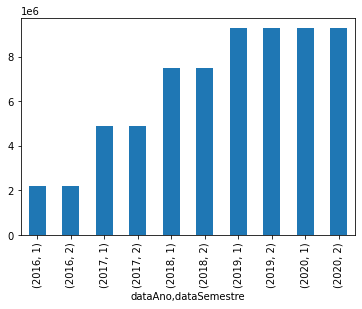

In [ ]:
# imprimindo os dados de forma visual
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada trimestre?

In [ ]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum()

dataAno  dataTrimestre
2016     1                1110654.27
         2                1110654.27
         3                1110654.27
         4                1110654.27
2017     1                2443819.95
         2                2443819.95
         3                2443819.95
         4                2443819.95
2018     1                3733881.60
         2                3733881.60
         3                3733881.60
         4                3733881.60
2019     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
2020     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
Name: salario, dtype: float64

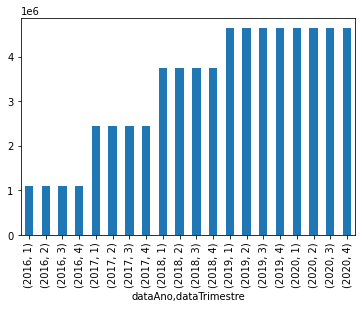

In [ ]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por ano?

In [ ]:
pagamentoData.groupby(['dataAno'])['salario'].sum()

dataAno
2016     4442617.08
2017     9775279.80
2018    14935526.40
2019    18567666.36
2020    18567666.36
Name: salario, dtype: float64

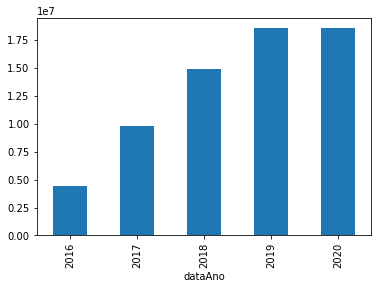

In [ ]:
pagamentoData.groupby(['dataAno'])['salario'].sum().plot(kind = 'bar')

## 3.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [ ]:
pagamentoData = pagamento.merge(data, on = 'dataPK')
pagamentoDataCargo = pagamentoData.merge(cargo, on = 'cargoPK')
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum()

dataAno  cargoNivel
2016     JUNIOR          489456.84
         PLENO          1454152.44
         SENIOR         2499007.80
2017     JUNIOR         1030642.80
         PLENO          3791593.92
         SENIOR         4953043.08
2018     JUNIOR         1393282.20
         PLENO          5357227.44
         SENIOR         8185016.76
2019     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
2020     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
Name: salario, dtype: float64

In [ ]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1)

cargoNivel,JUNIOR,PLENO,SENIOR
dataAno,,,
2016,489456.84,1454152.44,2499007.80
2017,1030642.80,3791593.92,4953043.08
2018,1393282.20,5357227.44,8185016.76
2019,1755714.36,6132228.24,10679723.76
2020,1755714.36,6132228.24,10679723.76


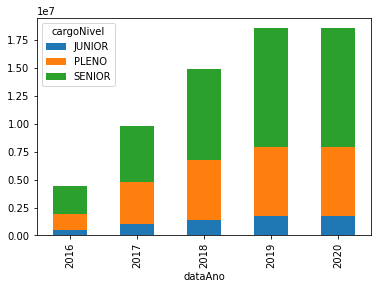

In [ ]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum()

cargoNivel  dataAno
JUNIOR      2016         489456.84
            2017        1030642.80
            2018        1393282.20
            2019        1755714.36
            2020        1755714.36
PLENO       2016        1454152.44
            2017        3791593.92
            2018        5357227.44
            2019        6132228.24
            2020        6132228.24
SENIOR      2016        2499007.80
            2017        4953043.08
            2018        8185016.76
            2019       10679723.76
            2020       10679723.76
Name: salario, dtype: float64

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1)

dataAno,2016,2017,2018,2019,2020
cargoNivel,,,,,
JUNIOR,489456.84,1030642.80,1393282.20,1755714.36,1755714.36
PLENO,1454152.44,3791593.92,5357227.44,6132228.24,6132228.24
SENIOR,2499007.80,4953043.08,8185016.76,10679723.76,10679723.76


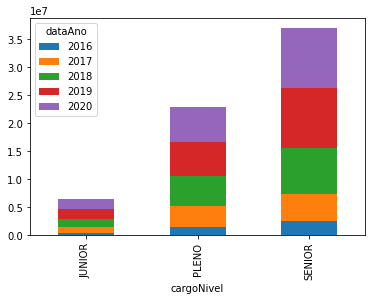

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

## 3.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [ ]:
#total gasto em salários considerando cada ano
#dados obtidos utilizando a tabela de fatos pagamento
pagamentoData = pagamento.merge(data, on = 'dataPK') 
pagamentoAno = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

In [ ]:
#total de receitas recebidas, considerando cada ano
#dados obtidos utilizando a tabela de fatos negociacao
negociacaoData = negociacao.merge(data, on = 'dataPK')
negociacaoAno = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

In [ ]:
#relacionado as medidas numéricas presentes nas duas tabelas de fatos
pagamentoAno.merge(negociacaoAno, on = 'dataAno')

,salario,receita
dataAno,,
2016,4442617.08,4614246.95
2017,9775279.80,7200423.35
2018,14935526.40,11593539.65
2019,18567666.36,35353318.30
2020,18567666.36,30222175.95


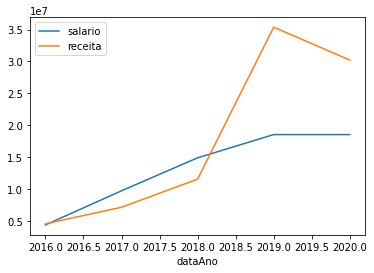

In [ ]:
pagamentoAno.merge(negociacaoAno, on = 'dataAno').plot()

# 3 Execução de Consultas com Foco na Tomada de Decisão

As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 3.1 Consulta 1

**Consulta:** Qual é a média dos salários recebidos por nível do cargo e por sexo no ano passado, sendo que o ano passado se refere ao ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [ ]:
dataFiltrada = data.query('dataAno == 2019')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataFunc = pagamentoData.merge(funcionario, on = 'funcPK')
pagamentoDataFuncCargo = pagamentoDataFunc.merge(cargo, on = 'cargoPK')
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean()

cargoNivel  funcSexo
JUNIOR      F            2440.233125
            M            2437.859091
PLENO       F            7641.937619
            M            6259.613036
SENIOR      F           12994.190000
            M           14480.502708
Name: salario, dtype: float64

In [ ]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1)

funcSexo,F,M
cargoNivel,,
JUNIOR,2440.233125,2437.859091
PLENO,7641.937619,6259.613036
SENIOR,12994.190000,14480.502708


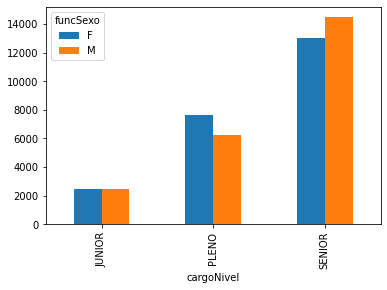

In [ ]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1).plot(kind = 'bar')

## 3.2 Consulta 2

**Consulta:** Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [ ]:
dataFiltrada = data.query('dataTrimestre == 3 and dataAno == 2020')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataEquipe = pagamentoData.merge(equipe, on = 'equipePK')
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values()

filialEstadoNome
PERNAMBUCO             438121.26
MATO GROSSO DO SUL    1013857.74
RIO DE JANEIRO        1258479.57
SAO PAULO             1931458.02
Name: salario, dtype: float64

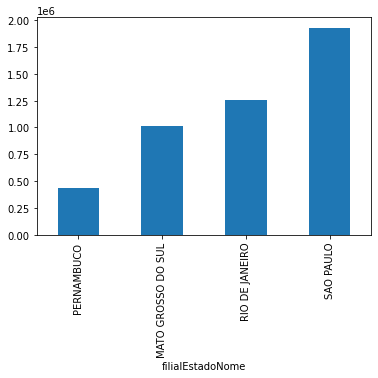

In [ ]:
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values().plot(kind = 'bar')

## 3.3 Consulta 3

**Consulta:** Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


In [ ]:
#investigando os gastos em salarios de cada equipe no último semestre ano 
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
pagamentoData = dataFiltrada.merge(pagamento, on = 'dataPK' )
pagamentoDataEquipe = pagamentoData.groupby(['equipePK'])['salario'].sum().to_frame() 
pagamentoDataEquipe.head(10)

,salario
equipePK,
1,1160327.40
2,1060981.14
3,1177330.32
4,579893.94
5,909107.10
6,585430.86
7,876084.06
8,1118608.38
9,939827.46


In [ ]:
#investigando os ganhos em receitas de cada equipe no semestre 1 de 2020
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
negociacaoData = dataFiltrada.merge(negociacao, on = 'dataPK' )
negociacaoDataEquipe = negociacaoData.groupby(['equipePK'])['receita'].sum().to_frame() 
negociacaoDataEquipe.head(10)

,receita
equipePK,
1,1259907.25
2,1338994.40
3,340461.30
4,340130.65
5,614747.70
6,736591.35
7,722758.45
8,538659.30
9,4994717.70


In [ ]:
#juntando os dados obtidos
pagamentoNegociacao = pagamentoDataEquipe.merge(negociacaoDataEquipe, on = 'equipePK' )
pagamentoNegociacao.head(10)

,salario,receita
equipePK,,
1,1160327.40,1259907.25
2,1060981.14,1338994.40
3,1177330.32,340461.30
4,579893.94,340130.65
5,909107.10,614747.70
6,585430.86,736591.35
7,876084.06,722758.45
8,1118608.38,538659.30
9,939827.46,4994717.70


In [ ]:
pagamentoNegociacaoEquipeCidade = pagamentoNegociacao.merge(equipe, on = 'equipePK' )
pagamentoNegociacaoEquipeCidade.head(10)[['equipeNome', 'filialNome', 'salario', 'receita']]

,equipeNome,filialNome,salario,receita
0,APP - DESKTOP,SAO PAULO - AV. PAULISTA,1160327.40,1259907.25
1,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,1060981.14,1338994.40
2,WEB,SAO PAULO - AV. PAULISTA,1177330.32,340461.30
3,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,579893.94,340130.65
4,WEB,CAMPO GRANDE - CENTRO,909107.10,614747.70
5,APP - MOBILE,SAO PAULO - AV. PAULISTA,585430.86,736591.35
6,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,876084.06,722758.45
7,APP - MOBILE,CAMPO GRANDE - CENTRO,1118608.38,538659.30
8,BI & ANALYTICS,SAO PAULO - AV. PAULISTA,939827.46,4994717.70
9,BI & ANALYTICS,RECIFE - CENTRO,876242.52,4664745.70


In [ ]:
pagamentoNegociacaoEquipeCidade['lucro'] = pagamentoNegociacaoEquipeCidade['receita'] - pagamentoNegociacaoEquipeCidade['salario']
pagamentoNegociacaoEquipeCidade[['equipeNome', 'filialNome', 'lucro']].sort_values(by='lucro', ascending=False).head(10)

,equipeNome,filialNome,lucro
8,BI & ANALYTICS,SAO PAULO - AV. PAULISTA,4054890.24
9,BI & ANALYTICS,RECIFE - CENTRO,3788503.18
1,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,278013.26
5,APP - MOBILE,SAO PAULO - AV. PAULISTA,151160.49
0,APP - DESKTOP,SAO PAULO - AV. PAULISTA,99579.85
6,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,-153325.61
3,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,-239763.29
4,WEB,CAMPO GRANDE - CENTRO,-294359.40
7,APP - MOBILE,CAMPO GRANDE - CENTRO,-579949.08
2,WEB,SAO PAULO - AV. PAULISTA,-836869.02


In [ ]:
#investigando o custo/benefício total
pagamentoNegociacaoEquipeCidade['lucro'].sum()

6267880.620000001

Como pode ser observado, existem equipes lucrativas e equipes que estão tendo prejuízo. Usuários de sistemas de suporte a decisão devem estabelecer estratégias para definir o que será feito com as equipes que geram prejuízo. Será que elas devem ser dissolvidas? Será que podem ser criadas políticas para que essas equipes sejam mais eficientes? Observa-se que o total de lucro obtido pela BI Solutions é positivo. Portanto, existe uma margem financeira para acomodar possíveis estratégias.

# <span style="color:blue">Aula 05: Lista de exercícios - Consultas OLAP</span>
## <span style="color:blue">Exemplo usando Pandas</span>

Este notebook contém exercícios classificados como essenciais e complementares. A indicação da classificação de cada exercício é feita junto de sua definição. Os exercícios estão espalhados ao longo do texto. Por favor, procurem por EXERCÍCIO para encontrar a especificação dos exercícios e as suas respectivas respostas. Também é possível localizar os exercícios utilizando o menu de navegação. Por completude, o notebook possui todas as descrições apresentadas na parte prática da Aula 05. Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios. 

# 1 Introdução

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos que une dois esquemas estrela, conforme descrito a seguir.


## 1.1 Esquema Estrela Pagamento

O primeiro esquema estrela, chamado Pagamento, é composto pelas seguintes tabelas de dimensão e tabela de fatos:

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)

## 1.2 Esquema Estrela Negociacao

O segundo esquema estrela, chamado Negociacao, é composto pelas seguintes tabelas de dimensão e tabela de fatos:
- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.3 Constelação de Fatos

Na constelação de fatos, as tabelas de dimensão data e equipe são tabelas em comum entre os dois esquemas estrela. As tabelas de dimensão e as tabelas de fatos da constelação da BI Solutions são listadas a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.4 Junção Estrela

A operação de junção estrela é necessária devido à forma de organização dos dados do data warehouse segundo os tipos de esquema estrela, floco de neve e estrela-foco. 

No processamento de uma consulta OLAP especificada pelo usuário de sistemas de suporte à decisão, deve-se realizar as seguintes atividades:
- Acessar a tabela de fatos e todas as tabelas de dimensão envolvidas na consulta.
- Realizar as junções necessárias, usando como base a integridade referencial, ou seja, usando como base os pares de chave primária (PK) e chave estrangeira (FK). No caso da junção estrela, isso significa fazer a junção da chave primária de cada tabela de dimensão envolvida na consulta com a chave estrangeira daquela tabela presente na tabela de fatos.
- Exibir os resultados obtidos.

Em Pandas, a junção estrela é feita usando-se o comando `merge`. Dentro do contexto desta aula, comando `merge` realiza a junção entre dois `DataFrames`, considerando a(s) coluna(s) usada como base para a junção, chamada de coluna(s) de junção.  Maiores detalhes sobre o comando merge podem ser obtidos neste [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).


# 2 Carregamento das Tabelas de Dimensão e das Tabelas de Fatos



In [1]:
import pandas as pd

Os comandos a seguir instanciam os `DataFrames` que são usados nas consultas analíticas. Para facilitar o entendimento dos conceitos, cada `DataFrame` possui o mesmo nome da tabela de dimensão ou da tabela de fatos correspondente.  

### 2.1 Carregamento das Tabelas de Dimensão

In [2]:
# criando e exibindo o DataFrame para a tabela de dimensão data
data = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv')
data.head(3)

,dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,1,1/1/2016,1,1,1,1,1,2016
1,2,2/1/2016,2,1,1,1,1,2016
2,3,3/1/2016,3,1,1,1,1,2016


In [3]:
# criando e exibindo o DataFrame para a tabela de dimensão funcionario
funcionario = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv')
funcionario.head(3)

,funcPK,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcCidade,funcEstadoNome,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,1,M-1,ALINE ALMEIDA,F,1/1/1990,1,1,1990,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,M-2,ARAO ALVES,M,2/2/1990,2,2,1990,CAMPINAS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,M-3,ARON ANDRADE,M,3/3/1990,3,3,1990,SANTOS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [4]:
# criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv')
equipe.head(3)

,equipePK,equipeNome,filialNome,filialCidade,filialEstadoNome,filialEstadoSigla,filialRegiaoNome,filialRegiaoSigla,filialPaisNome,filialPaisSigla
0,1,APP - DESKTOP,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,RIO DE JANEIRO,RIO DE JANEIRO,RJ,SUDESTE,SE,BRASIL,BR
2,3,WEB,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [5]:
# criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv')
cargo.head(3)

,cargoPK,cargoNome,cargoRegimeTrabalho,cargoJornadaTrabalho,cargoEscolaridadeMinima,cargoNivel
0,1,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,MEDIO,JUNIOR
1,2,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,SUPERIOR,PLENO
2,3,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,POS,SENIOR


In [6]:
# criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv')
cliente.head(3)

,clientePK,clienteNomeFantasia,clienteSetor,clienteCidade,clienteEstadoNome,clienteEstadoSigla,clienteRegiaoNome,clienteRegiaoSigla,clientePaisNome,clientePaisSigla
0,1,VIA FOOD,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,VIA PIZZA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,VIA JAPA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


### 2.2 Carregamento das Tabelas de Fatos

In [7]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv')
pagamento.head(3)

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos
0,147,2,5,64,1559.94,1
1,124,2,5,329,8102.77,1
2,175,1,5,328,2532.51,1


In [8]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv')
negociacao.head(3)

,equipePK,clientePK,dataPK,receita,quantidadeNegociacoes
0,2,9,22,11564.75,1
1,2,24,11,17990.50,1
2,2,28,21,16335.90,1


# 3 Execução de Consultas com Foco nas Operações OLAP

## 3.1 Operação Slice and Dice

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?


In [9]:
dataFiltrada = data.query('dataMes == 9 and dataAno == 2020')

In [10]:
pagamentoFiltrado = pagamento.merge(dataFiltrada, on = 'dataPK')

In [11]:
pagamentoFiltrado['quantidadeLancamentos'].sum()

200

## 3.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada semestre?

In [12]:
pagamentoData = pagamento.merge(data, on = 'dataPK')

In [13]:
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum()

dataAno  dataSemestre
2016     1               2221308.54
         2               2221308.54
2017     1               4887639.90
         2               4887639.90
2018     1               7467763.20
         2               7467763.20
2019     1               9283833.18
         2               9283833.18
2020     1               9283833.18
         2               9283833.18
Name: salario, dtype: float64

In [14]:
# modificando a visualização utilizando o .unstack()
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().unstack(level = 1)

dataSemestre,1,2
dataAno,,
2016,2221308.54,2221308.54
2017,4887639.90,4887639.90
2018,7467763.20,7467763.20
2019,9283833.18,9283833.18
2020,9283833.18,9283833.18


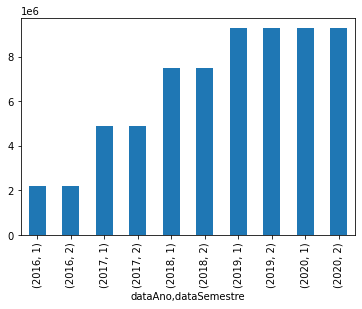

In [15]:
# imprimindo os dados de forma visual
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada trimestre?

In [16]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum()

dataAno  dataTrimestre
2016     1                1110654.27
         2                1110654.27
         3                1110654.27
         4                1110654.27
2017     1                2443819.95
         2                2443819.95
         3                2443819.95
         4                2443819.95
2018     1                3733881.60
         2                3733881.60
         3                3733881.60
         4                3733881.60
2019     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
2020     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
Name: salario, dtype: float64

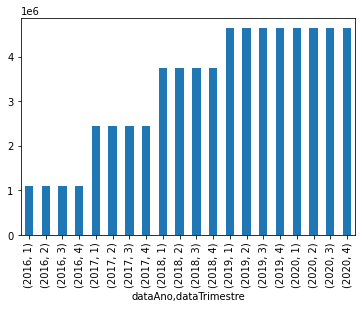

In [17]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por ano?

In [18]:
pagamentoData.groupby(['dataAno'])['salario'].sum()

dataAno
2016     4442617.08
2017     9775279.80
2018    14935526.40
2019    18567666.36
2020    18567666.36
Name: salario, dtype: float64

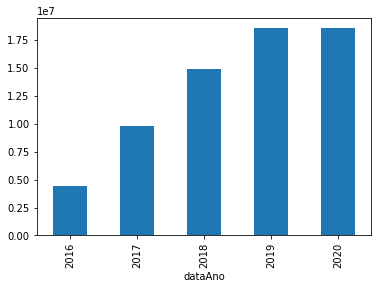

In [19]:
pagamentoData.groupby(['dataAno'])['salario'].sum().plot(kind = 'bar')

## 3.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [20]:
pagamentoData = pagamento.merge(data, on = 'dataPK')
pagamentoDataCargo = pagamentoData.merge(cargo, on = 'cargoPK')
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum()

dataAno  cargoNivel
2016     JUNIOR          489456.84
         PLENO          1454152.44
         SENIOR         2499007.80
2017     JUNIOR         1030642.80
         PLENO          3791593.92
         SENIOR         4953043.08
2018     JUNIOR         1393282.20
         PLENO          5357227.44
         SENIOR         8185016.76
2019     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
2020     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
Name: salario, dtype: float64

In [21]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1)

cargoNivel,JUNIOR,PLENO,SENIOR
dataAno,,,
2016,489456.84,1454152.44,2499007.80
2017,1030642.80,3791593.92,4953043.08
2018,1393282.20,5357227.44,8185016.76
2019,1755714.36,6132228.24,10679723.76
2020,1755714.36,6132228.24,10679723.76


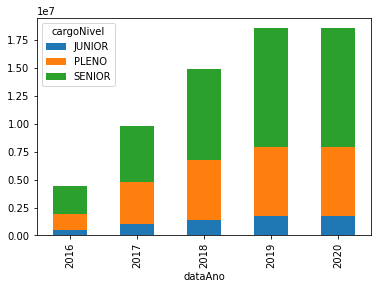

In [22]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [23]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum()

cargoNivel  dataAno
JUNIOR      2016         489456.84
            2017        1030642.80
            2018        1393282.20
            2019        1755714.36
            2020        1755714.36
PLENO       2016        1454152.44
            2017        3791593.92
            2018        5357227.44
            2019        6132228.24
            2020        6132228.24
SENIOR      2016        2499007.80
            2017        4953043.08
            2018        8185016.76
            2019       10679723.76
            2020       10679723.76
Name: salario, dtype: float64

In [24]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1)

dataAno,2016,2017,2018,2019,2020
cargoNivel,,,,,
JUNIOR,489456.84,1030642.80,1393282.20,1755714.36,1755714.36
PLENO,1454152.44,3791593.92,5357227.44,6132228.24,6132228.24
SENIOR,2499007.80,4953043.08,8185016.76,10679723.76,10679723.76


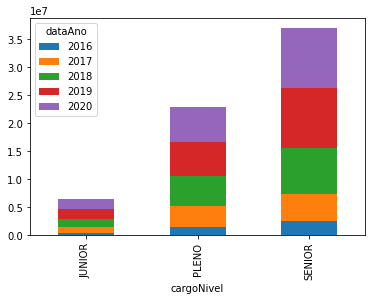

In [25]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

## 3.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [26]:
#total gasto em salários considerando cada ano
#dados obtidos utilizando a tabela de fatos pagamento
pagamentoData = pagamento.merge(data, on = 'dataPK') 
pagamentoAno = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

In [27]:
#total de receitas recebidas, considerando cada ano
#dados obtidos utilizando a tabela de fatos negociacao
negociacaoData = negociacao.merge(data, on = 'dataPK')
negociacaoAno = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

In [28]:
#relacionado as medidas numéricas presentes nas duas tabelas de fatos
pagamentoAno.merge(negociacaoAno, on = 'dataAno')

,salario,receita
dataAno,,
2016,4442617.08,4614246.95
2017,9775279.80,7200423.35
2018,14935526.40,11593539.65
2019,18567666.36,35353318.30
2020,18567666.36,30222175.95


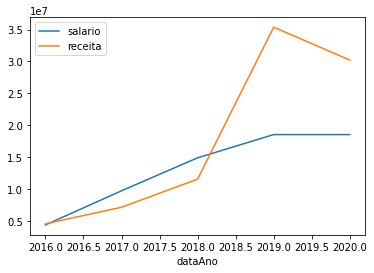

In [29]:
pagamentoAno.merge(negociacaoAno, on = 'dataAno').plot()

# 3 Execução de Consultas com Foco na Tomada de Decisão

As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 3.1 Consulta 1

**Consulta:** Qual é a média dos salários recebidos por nível do cargo e por sexo no ano passado, sendo que o ano passado se refere ao ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [30]:
dataFiltrada = data.query('dataAno == 2019')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataFunc = pagamentoData.merge(funcionario, on = 'funcPK')
pagamentoDataFuncCargo = pagamentoDataFunc.merge(cargo, on = 'cargoPK')
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean()

cargoNivel  funcSexo
JUNIOR      F            2440.233125
            M            2437.859091
PLENO       F            7641.937619
            M            6259.613036
SENIOR      F           12994.190000
            M           14480.502708
Name: salario, dtype: float64

In [31]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1)

funcSexo,F,M
cargoNivel,,
JUNIOR,2440.233125,2437.859091
PLENO,7641.937619,6259.613036
SENIOR,12994.190000,14480.502708


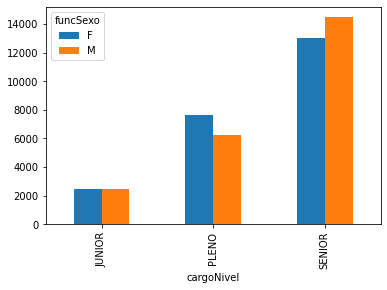

In [32]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1).plot(kind = 'bar')

## 3.2 Consulta 2

**Consulta:** Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [33]:
dataFiltrada = data.query('dataTrimestre == 3 and dataAno == 2020')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataEquipe = pagamentoData.merge(equipe, on = 'equipePK')
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values()

filialEstadoNome
PERNAMBUCO             438121.26
MATO GROSSO DO SUL    1013857.74
RIO DE JANEIRO        1258479.57
SAO PAULO             1931458.02
Name: salario, dtype: float64

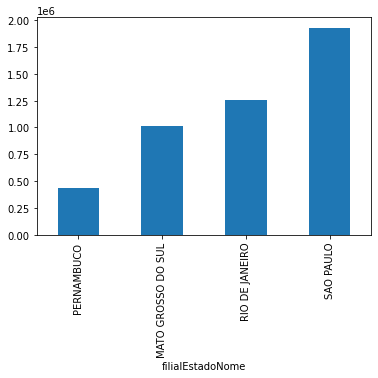

In [34]:
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values().plot(kind = 'bar')

## 3.3 Consulta 3

**Consulta:** Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


In [35]:
#investigando os gastos em salarios de cada equipe no último semestre ano 
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
pagamentoData = dataFiltrada.merge(pagamento, on = 'dataPK' )
pagamentoDataEquipe = pagamentoData.groupby(['equipePK'])['salario'].sum().to_frame() 
pagamentoDataEquipe.head(10)

,salario
equipePK,
1,1160327.40
2,1060981.14
3,1177330.32
4,579893.94
5,909107.10
6,585430.86
7,876084.06
8,1118608.38
9,939827.46


In [36]:
#investigando os ganhos em receitas de cada equipe no semestre 1 de 2020
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
negociacaoData = dataFiltrada.merge(negociacao, on = 'dataPK' )
negociacaoDataEquipe = negociacaoData.groupby(['equipePK'])['receita'].sum().to_frame() 
negociacaoDataEquipe.head(10)

,receita
equipePK,
1,1259907.25
2,1338994.40
3,340461.30
4,340130.65
5,614747.70
6,736591.35
7,722758.45
8,538659.30
9,4994717.70


In [37]:
#juntando os dados obtidos
pagamentoNegociacao = pagamentoDataEquipe.merge(negociacaoDataEquipe, on = 'equipePK' )
pagamentoNegociacao.head(10)

,salario,receita
equipePK,,
1,1160327.40,1259907.25
2,1060981.14,1338994.40
3,1177330.32,340461.30
4,579893.94,340130.65
5,909107.10,614747.70
6,585430.86,736591.35
7,876084.06,722758.45
8,1118608.38,538659.30
9,939827.46,4994717.70


In [38]:
pagamentoNegociacaoEquipeCidade = pagamentoNegociacao.merge(equipe, on = 'equipePK' )
pagamentoNegociacaoEquipeCidade.head(5)[['equipeNome', 'filialNome', 'salario', 'receita']]

,equipeNome,filialNome,salario,receita
0,APP - DESKTOP,SAO PAULO - AV. PAULISTA,1160327.40,1259907.25
1,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,1060981.14,1338994.40
2,WEB,SAO PAULO - AV. PAULISTA,1177330.32,340461.30
3,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,579893.94,340130.65
4,WEB,CAMPO GRANDE - CENTRO,909107.10,614747.70


In [39]:
pagamentoNegociacaoEquipeCidade['lucro'] = pagamentoNegociacaoEquipeCidade['receita'] - pagamentoNegociacaoEquipeCidade['salario']
pagamentoNegociacaoEquipeCidade[['equipeNome', 'filialNome', 'lucro']].sort_values(by='lucro', ascending=False).head(10)

,equipeNome,filialNome,lucro
8,BI & ANALYTICS,SAO PAULO - AV. PAULISTA,4054890.24
9,BI & ANALYTICS,RECIFE - CENTRO,3788503.18
1,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,278013.26
5,APP - MOBILE,SAO PAULO - AV. PAULISTA,151160.49
0,APP - DESKTOP,SAO PAULO - AV. PAULISTA,99579.85
6,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,-153325.61
3,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,-239763.29
4,WEB,CAMPO GRANDE - CENTRO,-294359.40
7,APP - MOBILE,CAMPO GRANDE - CENTRO,-579949.08
2,WEB,SAO PAULO - AV. PAULISTA,-836869.02


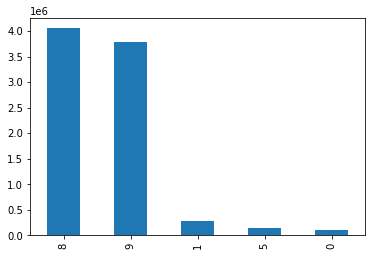

In [40]:
pagamentoNegociacaoEquipeCidade['lucro'].sort_values(ascending=False).head(5).plot(kind = 'bar')

# 4 Exercícios

## Exercício 1

Liste, para cada ano, a quantidade de negociações realizadas pelos clientes residentes no estado de Pernambuco. 

In [41]:
# Resposta do exercício
negociacaoData = negociacao.merge(data, on = 'dataPK' )
clientesPernambuco = cliente.query('clienteEstadoNome == "PERNAMBUCO"')
negociacaoPernambuco = negociacaoData.merge(clientesPernambuco, on = 'clientePK')
resposta = negociacaoPernambuco.groupby(['dataAno'])['quantidadeNegociacoes'].sum()
resposta

dataAno
2016    26
2017    48
2018    46
2019    72
2020    63
Name: quantidadeNegociacoes, dtype: int64

## Exercício 2 

Mostre o resultado do Exercício 1 usando um gráfico de barra. 

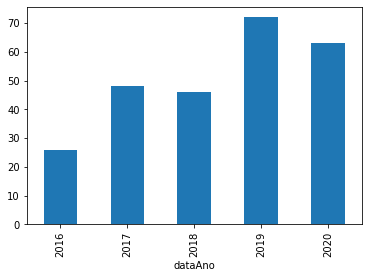

In [42]:
# Resposta do exercício
resposta.plot(kind = 'bar')

## Exercício 3 

Qual o total de despesas em salários nos anos de 2016 a 2020 em cada região na qual a equipe está localizada, considerando o cargo de nível junior? Arredonde a soma dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "REGIAO", "TOTALDESPESA". Ordene as linhas exibidas primeiro pelo total de despesa em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

In [62]:
# Resposta do exercício

# Filtra os anos e o cargo
dataFiltrada = data.query('2016 <= dataAno and dataAno <= 2020')
cargoFiltrado = cargo.query('cargoNivel == "JUNIOR"')

# Combina as tabelas necessárias
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataCargo = pagamentoData.merge(cargoFiltrado, on = 'cargoPK')
pagamentoDataCargoEquipe = pagamentoDataCargo.merge(equipe, on = 'equipePK')

# Agrupa e apresenta o valor
resultado = pagamentoDataCargoEquipe.groupby(['dataAno', 'filialRegiaoNome'])['salario'].sum()

# Transforma o groupby em dataframe
resultadoTransformado = resultado.to_frame().reset_index(drop=False)

# Orderna as linhas
resultadoTransformado = resultadoTransformado.sort_values(by=["salario", "dataAno"], ascending = False)

# Arredonda valores
resultadoTransformado = resultadoTransformado.round(2)

# Renomeia colunas
resultadoTransformado = resultadoTransformado.rename(columns={"dataAno": "ANO", "filialRegiaoNome": "REGIAO", "salario": "TOTALDESPESA"})

# Lista as primeiras 25 linhas da resposta
resultadoTransformado.head(25)

,ANO,REGIAO,TOTALDESPESA
10,2020,SUDESTE,1257808.68
7,2019,SUDESTE,1257808.68
4,2018,SUDESTE,1056208.92
2,2017,SUDESTE,876154.56
0,2016,SUDESTE,489456.84
8,2020,CENTRO-OESTE,337073.28
5,2019,CENTRO-OESTE,337073.28
3,2018,CENTRO-OESTE,337073.28
9,2020,NORDESTE,160832.40
6,2019,NORDESTE,160832.40


## Exercício 4 

Mostre o resultado do Exercício 3 usando um diagrama de barras que permite a visualização dos resultados por região.

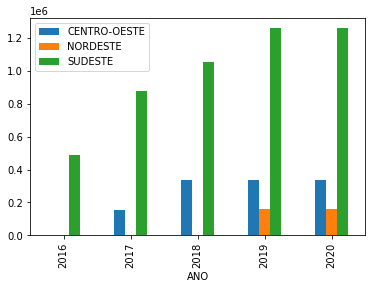

In [63]:
# Resposta do exercício
# Visualiza os dados "divididos" por região
legend = ['CENTRO-OESTE', 'NORDESTE', 'SUDESTE']
ax = resultadoTransformado.set_index(['ANO', 'REGIAO']).unstack().plot(kind = 'bar')
ax.legend(legend); # atualiza os labels

## Exercício 5 

Liste o total dos salários e o total de receitas recebidas, considerando os anos de 2017, 2018 e 2019. Arredonde o total dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS". Ordene as linhas exibidas pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.


In [64]:
# Resposta do exercício

# Calcula o total de salários 
dataFiltrada = data.query('dataAno in [2017, 2018, 2019]')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoAno = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

# Calcula o total de receitas recebidas 
dataFiltrada = data.query('dataAno == 2017 or dataAno == 2018 or dataAno == 2019')
negociacaoData = negociacao.merge(dataFiltrada, on = 'dataPK')
negociacaoAno = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

# Calcula o resultado final
resultado = pagamentoAno.merge(negociacaoAno, on = 'dataAno')

# Transforma o groupby em dataframe
resultadoTransformado = resultado.reset_index(drop=False)

# Renomeia colunas
resultadoTransformado = resultadoTransformado.rename(columns={"dataAno": "ANO", "salario": "TOTAL GASTO EM SALARIOS", "receita": "TOTAL DE RECEITAS RECEBIDAS"})

# Orderna as linhas
resultadoTransformado = resultadoTransformado.sort_values(by=['ANO'], ascending = False)

# Arredonda valores
resultadoTransformado = resultadoTransformado.round(2)

# Lista as primeiras 25 linhas da resposta
resultadoTransformado.head(25)

,ANO,TOTAL GASTO EM SALARIOS,TOTAL DE RECEITAS RECEBIDAS
2,2019,18567666.36,35353318.30
1,2018,14935526.40,11593539.65
0,2017,9775279.80,7200423.35


## Exercício 6 

Mostre o resultado do Exercício 5 usando um diagrama de barras.

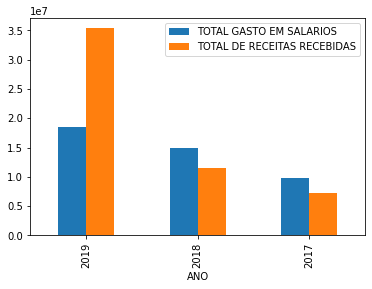

In [65]:
# Resposta do exercício
resultadoTransformado.set_index(['ANO']).plot(kind = 'bar')

## Exercício 7 

Compare a quantidade de negociações que cada uma das equipes realizou nos anos de 2018 e 2019. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "NEGOCIACOES 2018", "NEGOCIACOES 2019". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

Dica: Considere relacionar as equipes por meio da operação *drill-across*.

In [71]:
# Resposta do exercício

# Determina a quantidade de negociações no ano de 2018
dataFiltrada = data.query('dataAno == 2018')
negociacaoData = negociacao.merge(dataFiltrada, on = 'dataPK' )
negociacaoData = negociacaoData.groupby(['equipePK'])['quantidadeNegociacoes'].sum().to_frame()

# Determina a quantidade de negociações no ano de 2019
dataFiltrada = data.query('dataAno == 2019')
negociacaoData2 = negociacao.merge(dataFiltrada, on = 'dataPK' )
negociacaoData2 = negociacaoData2.groupby(['equipePK'])['quantidadeNegociacoes'].sum().to_frame()

# Realiza a operação drill-accross
negociacaoPagamentoData = negociacaoData.merge(negociacaoData2, on = 'equipePK', suffixes=('_2018', '_2019'))

# Adiciona os dados das equipes que devem ser exibidos
negociacaoPagamentoData = equipe.merge(negociacaoPagamentoData, on = 'equipePK')
resultado = negociacaoPagamentoData[['equipeNome', 'filialNome', 'quantidadeNegociacoes_2018', 'quantidadeNegociacoes_2019']]
resultado

# Renomeia colunas
resultadoTransformado = resultado.rename(columns={
    "equipeNome": "NOME DA EQUIPE", "filialNome": "NOME DA FILIAL", "quantidadeNegociacoes_2018": "NEGOCIACOES 2018", "quantidadeNegociacoes_2019": "NEGOCIACOES 2019"
})

# Orderna as linhas
resultadoTransformado= resultadoTransformado.sort_values(by=["NOME DA EQUIPE", "NOME DA FILIAL"])

# Lista as primeiras 25 linhas
resultadoTransformado.head(25)

,NOME DA EQUIPE,NOME DA FILIAL,NEGOCIACOES 2018,NEGOCIACOES 2019
1,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,149,135
0,APP - DESKTOP,SAO PAULO - AV. PAULISTA,132,135
7,APP - MOBILE,CAMPO GRANDE - CENTRO,98,88
6,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,99,112
5,APP - MOBILE,SAO PAULO - AV. PAULISTA,104,108
4,WEB,CAMPO GRANDE - CENTRO,100,95
3,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,91,106
2,WEB,SAO PAULO - AV. PAULISTA,76,87


## Exercício 8 

Liste os setores dos clientes e a soma de suas respectivas receitas para o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "SETOR DO CLIENTE", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [70]:
# Resposta do exercício

# Filtra os dados do segundo semestre do ano de 2020
dataFiltrada = data.query('dataSemestre == 2 and dataAno == 2020')

# Realiza as junções necessárias
receitaData = negociacao.merge(dataFiltrada, on = 'dataPK')
receitaDataCliente = receitaData.merge(cliente, on = 'clientePK')

# Determina o total de receitas
resultado = receitaDataCliente.groupby(['clienteSetor'])['receita'].sum().sort_values()

# Transforma o groupby em dataframe
resultadoTransformado = resultado.reset_index(drop=False)

# Renomeia colunas
resultadoTransformado = resultadoTransformado.rename(columns={"clienteSetor": "SETOR DO CLIENTE", "receita": "TOTAL DE RECEITAS"})

# Orderna as linhas
resultadoTransformado = resultadoTransformado.sort_values(by=["TOTAL DE RECEITAS"], ascending = False)

# Lista as primeiras 25 linhas
resultadoTransformado.head(25)

,SETOR DO CLIENTE,TOTAL DE RECEITAS
4,BEBIDAS E ALIMENTOS,5749704.70
3,SAUDE,3119775.30
2,TECNOLOGIA,2465926.05
1,VESTUARIO,2336266.50
0,CREDITO,998789.60


## Exercício 9 

Analise a resposta do Exercício 8 para identificar qual o setor do cliente que obteve o maior total de receitas. Mostre o total de receitas por mês para esse setor do cliente, considerando o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "MES", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente e depois pelo mês em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [72]:
# Resposta do exercício

# Filtra os dados do segundo semestre do ano de 2020 
# considerando o setor do cliente com maior total de receitas
dataFiltrada = data.query('dataSemestre == 2 and dataAno == 2020')
clienteFiltrado = cliente.query('clienteSetor == "BEBIDAS E ALIMENTOS"')

# Realiza as junções necessárias
receitaData = negociacao.merge(dataFiltrada, on = 'dataPK')
receitaDataCliente = receitaData.merge(clienteFiltrado, on = 'clientePK')

# Determina o total de receitas
resultado = receitaDataCliente.groupby(['dataMes'])['receita'].sum()

# Transforma o groupby em dataframe
resultadoTransformado = resultado.reset_index(drop=False)

# Renomeia colunas
resultadoTransformado = resultadoTransformado.rename(columns={"dataMes": "MES", "receita": "TOTAL DE RECEITAS"})

# Orderna as linhas
resultadoTransformado = resultadoTransformado.sort_values(by=["TOTAL DE RECEITAS", "MES"], ascending=False)

# Lista as primeiras 25 linhas
resultadoTransformado.head(25)


,MES,TOTAL DE RECEITAS
4,11,1156403.30
3,10,1091389.50
5,12,899122.70
2,9,877223.55
1,8,875934.30
0,7,849631.35


## Exercício 10 

Analise a resposta do Exercício 9 para identificar qual mês gerou o maior total de receitas para o setor de cliente identificado no Exercício 8. Mostre o total de receitas das equipes, considerando o segundo semestre do ano de 2020, o setor de cliente identificado no Exercício 8 e o mês identificado no Exercício 9. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo pelo nome da equipe em ordem ascendente, e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*

In [73]:
# Resposta do exercício

# Filtra os dados do segundo semestre do ano de 2020 
# considerando o setor do cliente com maior total de receitas
# e o mês com o maior total de receitas
dataFiltrada = data.query('dataAno == 2020 and dataMes == 11')
clienteFiltrado = cliente.query('clienteSetor == "BEBIDAS E ALIMENTOS"')

# Realiza as junções necessárias
receitaData = negociacao.merge(dataFiltrada, on = 'dataPK')
receitaDataCliente = receitaData.merge(clienteFiltrado, on = 'clientePK')
receitaDataClienteEquipe = receitaDataCliente.merge(equipe, on = 'equipePK')

# Determina o total de receitas
resultado = receitaDataClienteEquipe.groupby(['equipeNome', 'filialNome'])['receita'].sum().sort_values()

# Transforma o groupby em dataframe
resultadoTransformado = resultado.reset_index(drop=False)

# Orderna as linhas
resultadoTransformado = resultadoTransformado.sort_values(by=['equipeNome', 'filialNome'], ascending = True)

# Renomeia colunas
resultadoTransformado = resultadoTransformado.rename(columns={"equipeNome": "NOME DA EQUIPE", "filialNome": "NOME DA FILIAL", "receita":"TOTAL DE RECEITAS"})

# Lista as primeiras 25 linhas
resultadoTransformado.head(25)

,NOME DA EQUIPE,NOME DA FILIAL,TOTAL DE RECEITAS
2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,35645.65
7,APP - DESKTOP,SAO PAULO - AV. PAULISTA,129409.40
3,APP - MOBILE,CAMPO GRANDE - CENTRO,48714.45
4,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,62138.70
1,APP - MOBILE,SAO PAULO - AV. PAULISTA,26571.85
9,BI & ANALYTICS,RECIFE - CENTRO,527169.75
8,BI & ANALYTICS,SAO PAULO - AV. PAULISTA,149490.15
0,WEB,CAMPO GRANDE - CENTRO,20042.75
5,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,68596.10
6,WEB,SAO PAULO - AV. PAULISTA,88624.50


# Análise de Dados com Base em Processamento Massivo em Paralelo
# Aula 05 - Plantão Leonardo - Pipeline utilizando Luigi

Material Produzido por **Leonardo Mauro Pereira Moraes**   
CEMEAI - ICMC/USP São Carlos

## Luigi

"Luigi é um módulo Python que ajuda a construir pipelines complexos de trabalhos em lote. Ele lida com resolução de dependências, gerenciamento de fluxo de trabalho, visualização, etc" [spotify/luigi](https://github.com/spotify/luigi). Ele também vem com suporte a Hadoop, AWS S3, entre outros.

Vamos instalar o pacote.

In [ ]:
%%capture
!pip install luigi==3.0.3

## Prós e Contras

"A biblioteca de pipeline do Luigi foi projetada e ainda é usada pelo Spotify. Com o passar dos anos, foi adotado por outras empresas. Mas, exatamente, por ter sido feito sob medida para o Spotify, pode não ser adequado para atender às suas necessidades e eu o aconselho a considerar cuidadosamente se este sistema pode funcionar para você" [Mattia Cinelli](https://towardsdatascience.com/a-tutorial-on-luigi-spotifys-pipeline-5c694fb4113e).

### Prós

- É Python! Logo, você já sabe codificar nele, além de poder combinar o processo que deseja automatizar (seu código original) com a infraestrutura do pipeline (portanto, Luigi)
- Sua estrutura é "backward", isto é permite que se recupere de tarefas com falha sem executar novamente todo o pipeline novamente.
- Um wrapper de lote AWS para trabalhar diretamente com o Amazon ECS.
- Uma GUI que mostra o status das tarefas e uma representação gráfica de seu pipeline.

### Contras

- É difícil testar.
- Apresenta um paradgima de programação diferente.
- Ele precisa ser mantido simples, ou melhor, linear (tente mantê-lo <1k tarefas). Muitos ramos e garfos podem diminuir o tempo de execução de forma incrível.
- Não há gatilho (trigger). Assim, o pipeline não iniciará quando os arquivos necessários estiverem no lugar, mas você precisa configurar um cronjob para verificá-los e fazer o pipeline iniciar.

## Estrutura do Luigi

### do Pipeline

Normalmente, um pipeline segue um fluxo linear, em que o primeiro nó é considerado o nó inicial, este é o primeiro a ser executado, seguido por um segundo e depois um terceiro até que o nó final conclua o fluxo de trabalho.

> `Inicio -> Nó A -> Nó B -> Nó C -> Fim`

Em vez disso, no Luigi, esse processo é invertido!

### do Código

O Luigi funciona como um gráfo, seus nós são chamados de `Task` e suas conexões são chamadas de `Target`. Dentro de cada nó há um conjunto de funções:

- `output()` - Define o `Target` de saída.
- `requires()` - Define qual `Task` é necessária para este nó.
- `run()` - Define a execução do código.



## Exemplo 1

Contagem de letras.

In [ ]:
import luigi

In [ ]:
class GenerateWords(luigi.Task):

    def output(self):
        return luigi.LocalTarget('output/1.words.txt')

    def run(self):
        # write a dummy list of words to output file
        words = ['apple', 'banana','grapefruit']
        with self.output().open('w') as f:
            for word in words:
                f.write('{word}\n'.format(word=word))

In [ ]:
class CountLetters(luigi.Task):

    def requires(self):
        return GenerateWords()

    def output(self):
        return luigi.LocalTarget('output/2.letter_counts.txt')

    def run(self):
        # read in file as list
        with self.input().open('r') as infile:
            words = infile.read().splitlines()
        # write each word to output file with its corresponding letter count
        with self.output().open('w') as outfile:
            for word in words:
                outfile.write('{word} | {letter_count}\n'.format(word=word,letter_count=len(word)))

Rodar o código,

- pelo Terminal   
  `python -m luigi --module arquivo CountLetters --local-schedule`

- pelo Python   
  `luigi.build([CountLetters()], local_scheduler=True)` porém, não funciona no Google Colab

## Exemplo 2

Utilizando [parâmetros](https://luigi.readthedocs.io/en/stable/api/luigi.parameter.html).

- Parâmetros padrão
   - `luigi.Parameter` - tipo `str`
   - `luigi.IntParameter` - tipo `int`
   - `luigi.FloatParameter` - tipo `float`
   - `luigi.BoolParameter` - tipo `bool`

- Parâmetros temporais - objeto do tipo `datetime`
   - `luigi.YearParameter` - tipo `datetime.date`
   - `luigi.MonthParameter` - tipo `datetime.date`
   - `luigi.DateParameter` - tipo `datetime.date`
   - `luigi.DateHourParameter` - tipo `datetime.datetime`
   - `luigi.DateMinuteParameter` - tipo `datetime.datetime`
   - `luigi.DateSecondParameter` - tipo `datetime.datetime`

- Parâmetros de conjunto
   - `luigi.ListParameter` - tipo `list`
   - `luigi.TupleParameter` - tipo `tuple`
   - `luigi.DictParameter` - tipo `dict`

In [ ]:
import datetime

class CreateFile(luigi.Task):
    text = luigi.Parameter(default='hello world!')
    date = luigi.DateParameter(default=datetime.date.today())

    def output(self):
        folder = f'{self.date.year}/{self.date.month}/{self.date.day}'
        return luigi.LocalTarget(f'luigi/{folder}/file.txt')

    def run(self):
        with self.output().open('w') as outfile:
            outfile.write(f'{self.text}')

Rodar o código,

- pelo Terminal   
  `python -m luigi --module arquivo CreateFile --local-schedule --text "Novo texto" --date 2023-11-02`

- pelo Python   
  `luigi.build([CreateFile('Novo texto', '2023-11-04')], local_scheduler=True)` porém, não funciona no Google Colab

# <span style="color:blue">Aula 06: Processamento Paralelo e Distribuído</span>
## <span style="color:blue">Apache Spark RDD</span>

## **1 Introdução**

O objetivo deste notebook é apresentar conceitos relacionados ao Apache Spark RDD. Antes de apresentar esses conceitos, a seguir são definidas as principais características do *framework* Apache Spark.

O *framework* Apache Spark:

- Executa sobre o sistema de arquivos distribuídos **HDFS** (*Hadoop Distributed File System*). 

- Incorpora e estende os conceitos relacionados ao modelo de programação funcional **MapReduce**. Em especial, o *framework* Apache Spark introduz diversas operações que podem ser executadas sobre os RDDs, além da possibilidade de criação de dois tipos de variáveis compartilhadas. 

- É baseado no uso de **conjuntos de dados distribuídos e resilientes, RDDs** (*Resilient and Distributed Datasets*). RDDs são abstrações que representam blocos de dados que podem ser reconstruídos em caso de falhas. Eles possibilitam o armazenamento dos resultados intermediários em memória primária sempre que possível. Como resultado, o uso de RDDs diminui o número de acessos a disco.

- Possibilita o **agendamento de tarefas na forma de grafos acíclicos e direcionados, DAGs**. O processamento das tarefas consiste de vários estágios, os quais podem ser executados em paralelo caso não haja dependências entre os estágios. Como resultado, o uso de DAGs melhora o desempenho computacional das aplicações. 




## **2 Apache Spark Cluster**

### 2.1 Arquitetura

Um *cluster* Spark é uma arquitetura de sistema distribuído para processamento paralelo composto por três elementos: 

> **Nó mestre**: O nó mestre (*master node*) é o componente responsável por coordenar a execução das tarefas. Um programa Spark possui apenas um nó mestre. Neste nó, roda-se o *driver*, um *software* que distribui as tarefas (*tasks*) entre os nós do *cluster* e obtém os resultados dessas tarefas. Para criar o *driver*, é necessário criar um objeto chamado *SparkContext*, no qual são definidos os recursos computacionais desejados.

> **Nó de trabalho**: O nó de trabalho (*worker node*) é o componente responsável por realizar as tarefas. Um programa Spark possui um ou mais nós de trabalho. Nesses nós, roda-se um ou mais *executors*. Um *executor* é um *software* que recebe as tarefas (*tasks*) do *software* *driver*, armazena os resultados intermediários e retorna os dados gerados quando requisitado.

> **Gerenciador do cluster**: O gerenciador do *cluster* (*cluster manager*) é o componente responsável por disponibilizar os recursos computacionais (por exemplo: memória e núcleos de processamento) por meio dos *executors* para o *driver*. O Spark é agnóstico quanto ao gerenciador e oferece suporte para os seguintes gerenciadores em sua versão atual (versão 3.0.1): Spark Standalone (gerenciador próprio do Spark), Apache YARN (mais utilizado), Apache Mesos e Kubernetes (muito utilizado em ambientes de computação em nuvem). 

Detalhes adicionais sobre o Apache Spark Cluster podem ser obtidos na documentação oficial do Spark neste [link](https://spark.apache.org/docs/latest/cluster-overview.html#cluster-manager-types).



### 2.2 Criação de uma Aplicação Spark

A criação de uma aplicação Spark é feita da forma descrita a seguir, utilizando como base a Figura 1. 

1. Deve ser criado um objeto *SparkContext* definindo os recursos computacionais desejados. A criação desse objeto instancia o *driver* no **nó mestre**. 

2. O *driver* solicita ao **gerenciador do cluster** um conjunto de *executors* de acordo com os recursos computacionais selecionados.

3.  O **gerenciador do cluster** cria os _executors_ nos **nós de trabalho** e retorna a informação relacionada a essa criação ao *driver*;

4.  O *driver* submete as tarefas (*tasks*) para os *executors* e obtém os resultados retornados por esses *executors*.

<br>

<p align="center"><img src="https://raw.githubusercontent.com/cdaciferri/Figures/main/CreateSparkApp.png" width="600" height="300"></p>
<p align="center">Figura 1. Exemplo ilustrativo da criação de uma aplicação Spark.</p>

<br>

**Exemplo:** O exemplo a seguir cria uma aplicação Spark utilizando as seguintes configurações: (i) *cluster* gerenciado pelo Apache YARN; (ii) 1 *driver* de 1 núcleo de computação e 4 gigabytes de memória; e (iii) 4 *executors* de 2 núcleos de computação e 16 gigabytes de memória cada. O objeto criado é um objeto *SparkContext*. 

```
from pyspark import SparkConf, SparkContext

conf = SparkConf(). \
       setMaster("yarn"). \
       set("spark.driver.cores", "1"). \
       set("spark.driver.memory", "4g"). \
       set("spark.executor.cores", "2"). \
       set("spark.executor.memory", "16g"). \
       set("spark.executor.instances", "4"). \

spark = SparkContext(conf=conf)
```
Uma lista completa de configurações pode ser obtida na documentação oficial do Spark neste [link](https://spark.apache.org/docs/latest/configuration.html).



### 2.3 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [ ]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [ ]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [ ]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [ ]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

### 2.4 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [ ]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível criar o objeto *SparkContext*. No comando de criação a seguir, é definido que é utilizado o próprio sistema operacional deste *notebook* como **nó mestre** por meio do parâmetro **local** do método **setMaster**. O complemento do parametro **[*]** indica que são alocados todos os núcleos de processamento disponíveis para o objeto *driver* criado.

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local[*]")
spark = SparkContext(conf=conf)

## **3 API Apache Spark RDD**

Nesta seção, é detalhada a classe `pyspark.RDD`, que está relacionada ao uso de RDDs. Primeiramente, são descritos dois conjuntos de dados usados como base para os exemplos. Depois, os principais conceitos envolvidos na classe pyspark.RDD são introduzidos. 

O detalhamento da classe `pyspark.RDD` pode ser encontrada na documentação oficial do Spark neste [link](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD). Neste notebook são explicados os métodos mais utilizados e também os métodos que são necessários para o desenvolvimento da lista de exercícios.

### 3.1 Conjuntos de Dados

Para descrever a API Apache Spark RDD, são utilizadas dois conjuntos de dados, conforme descrito a seguir:

- `fib`: Uma lista Python contendo os 30 primeiros números da Sequência de Fibonacci. Na matemática, a Sucessão de Fibonacci (ou Sequência de Fibonacci), é uma sequência de números inteiros, começando normalmente por 0 e 1, na qual cada termo subsequente corresponde à soma dos dois anteriores.

- `logs.txt`: Um arquivo texto com 56.481 linhas de *log* de um servidor web. O arquivo fonte pode ser obtido neste ([link](https://github.com/logpai/loghub/tree/master/Apache)).



O comando a seguir cria a lista `fib`.

In [ ]:
#criando a lista fib com os 30 primeiros números da Sequência de Fibonacci
def fibonacci(i: int) -> int:
  if i <= 0: raise Exception()
  elif i == 1: return 0
  elif i == 2: return 1
  else: return fibonacci(i-1) + fibonacci(i-2)

fib = [fibonacci(i) for i in range(1, 31)]

In [ ]:
#exibindo a lista criada
fib

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229]

O comando a seguir obtém os dados do arquivo texto `logs.txt`.

In [ ]:
#obtendo os dados do arquivo texto logs.txt
%%capture
!wget -q https://zenodo.org/record/3227177/files/Apache.tar.gz?download=1 -O logs.tar.gz
!tar xf logs.tar.gz && rm -rf logs.tar.gz
!mv Apache.log logs.txt

In [ ]:
#abrindo o arquivo logs.txt no modo leitura (mode="r") 
#exibindo os primeiros 10 registros do arquivo
with open(file="logs.txt", mode="r") as fp: 
  for _ in range(0, 10): print(fp.readline())

[Thu Jun 09 06:07:04 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK

[Thu Jun 09 06:07:04 2005] [notice] LDAP: SSL support unavailable

[Thu Jun 09 06:07:04 2005] [notice] suEXEC mechanism enabled (wrapper: /usr/sbin/suexec)

[Thu Jun 09 06:07:05 2005] [notice] Digest: generating secret for digest authentication ...

[Thu Jun 09 06:07:05 2005] [notice] Digest: done

[Thu Jun 09 06:07:05 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK

[Thu Jun 09 06:07:05 2005] [notice] LDAP: SSL support unavailable

[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating channel.jni:jni ( channel.jni, jni)

[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create channel.jni:jni

[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating vm: ( vm, )



### 3.2 Criação de RDDs

Existem duas formas de se criar RDDs, conforme descrito a seguir:

- Paralelizando uma coleção de dados já existente no *driver*.

- Referenciando um conjunto de dados armazenado em um sistema de armazenamento externo, como um sistema de arquivo compartilhado, HDFS, HBase, Cassandra, ou qualquer outra fonte de dados que ofereça suporte para o formato de entrada do Hadoop. 

#### Método parallelize()

``parallelize(nameCollection, nPartitions=None)``

Distribui uma coleção de dados em Python para formar um RDD. O parâmetro `nameCollection` indica o nome da coleção, enquanto que o parâmetro `nPartitions` indica o número de partições nas quais os dados da coleção são particionados. Usualmente, Spark seta o número de partições automaticamente, com base no *cluster* sendo utilizado. 


O comando a seguir utiliza o método `parellelize()` para armazenar no RDD chamado fib_rdd o conjunto de dados referente à Sequência de Fibonacci. Uma vez criado, fib_rdd pode ser manipulado em paralelo utilizando comandos que são apresentados ao longo do *notebook*.

In [ ]:
fib_rdd = spark.parallelize(fib)

#### Método textFile()

``textFile(nameFile, nPartitions=None, use_unicode=True)``

Lê um arquivo do tipo texto chamado `nameFile`, o qual encontra-se armazenado em um sistema de armazenamento externo, e o retorna como um RDD de *strings*. O segundo parâmetro, `nPartitions`, indica o número de partições nas quais os registros do arquivo são particionados. O último parâmetro se refere ao formato do arquivo texto, cujo padrão é o formato UTF-8. 


O comando a seguir utiliza o método `textFile()` para armazenar no RDD chamado lines_rdd os registros do arquivo de texto `"logs.txt"`. Uma vez criado, lines_rdd pode ser manipulado em paralelo utilizando comandos que são apresentados ao longo do notebook.

In [ ]:
lines_rdd = spark.textFile("logs.txt")

### 3.2 Transformações

Transformações são operações que transformam um RDD em outro RDD.  

No Spark, as **transformações** não são executadas imediatamente sobre os dados do RDD. Elas são anexadas ao grafo acíclico direcionado de transformações, o qual é executado apenas quando uma **ação** sobre o RDD em questão for solicitada. Essa característica é conhecida como *lazy-evaluation*. Mais informações sobre essa característica podem ser encontradas neste [link](https://databricks.com/blog/2015/06/22/understanding-your-spark-application-through-visualization.html).

#### Método map()

``map(func)``

Aplica a função `func` sobre todos os elementos do RDD.

Os comandos a seguir definem uma função que multiplica todos os elementos da Sequência de Fibonacci contidos em `fib_rdd` por 10.

In [ ]:
#definindo a função separadamente e chamando a função
def multiply_by_ten(element): return element * 10 

fib_rdd. \
  map(multiply_by_ten). \
  collect()

[0,
 10,
 10,
 20,
 30,
 50,
 80,
 130,
 210,
 340,
 550,
 890,
 1440,
 2330,
 3770,
 6100,
 9870,
 15970,
 25840,
 41810,
 67650,
 109460,
 177110,
 286570,
 463680,
 750250,
 1213930,
 1964180,
 3178110,
 5142290]

In [ ]:
#definindo a função lambda
fib_rdd. \
  map(lambda element: element * 10). \
  take(5)

[0, 10, 10, 20, 30]

#### Método flatMap()

`flatMap(func, preservesPartitioning=False)`

Aplica a função `func` sobre todos os elementos do RDD e nivela os resultados gerados.

No comando a seguir, aplica-se o método nativo do Python `split`, por meio da transformação do método `map`, sobre os elementos em `line_rdd` para separar as linhas do arquivo `logs.txt` em palavras. Contudo, o método `split` retorna uma lista Python. Portanto, os elementos do novo RDD não são palavras individuais, mas sim listas de palavras.

In [ ]:
# aplicando a transformaçao map para transformar linhas em palavras
# o resultado não são palavras individuais, mas sim listas Python de palavras
lines_rdd. \
  map(lambda line: line.split(" ")). \
  take(2)

[['[Thu',
  'Jun',
  '09',
  '06:07:04',
  '2005]',
  '[notice]',
  'LDAP:',
  'Built',
  'with',
  'OpenLDAP',
  'LDAP',
  'SDK'],
 ['[Thu',
  'Jun',
  '09',
  '06:07:04',
  '2005]',
  '[notice]',
  'LDAP:',
  'SSL',
  'support',
  'unavailable']]

Para unir as coleções Python resultantes da transformação provida pelo método `map`, ou seja, para nivelar os elementos do novo RDD, utiliza-se a transformação `flatMap`.

In [ ]:
# aplicando a transformaçao flatMap para transformar linhas em palavras
# as listas Python de palavras resultantes são niveladas, gerando um RDD em que cada elemente é uma palavra individual
lines_rdd. \
  flatMap(lambda line: line.split(" ")). \
  take(12)

['[Thu',
 'Jun',
 '09',
 '06:07:04',
 '2005]',
 '[notice]',
 'LDAP:',
 'Built',
 'with',
 'OpenLDAP',
 'LDAP',
 'SDK']

#### Método mapValues()

``mapValues(func)``

Considerando um RDD composto por pares chave-valor (C,V), aplica a função `func` apenas sobre os valores V do RDD.

Nos comandos a seguir, primeiro aplica-se a transformação `map` para criar um RDD composto por pares chave-valor, de forma que chave = valor para cada elemento do RDD. Na sequência, aplica-se a transformação `mapValues` usando uma função `lambda` que mapeia os valores da sequência de Fibonacci em par (*even*) ou ímpar (*odd*).

In [ ]:
#produzindo pares na forma chave-valor 
fib_rdd. \
  map(lambda element: (element, element)). \
  mapValues(lambda element: "even" if element % 2 == 0 else "odd"). \
  collect()

[(0, 'even'),
 (1, 'odd'),
 (1, 'odd'),
 (2, 'even'),
 (3, 'odd'),
 (5, 'odd'),
 (8, 'even'),
 (13, 'odd'),
 (21, 'odd'),
 (34, 'even'),
 (55, 'odd'),
 (89, 'odd'),
 (144, 'even'),
 (233, 'odd'),
 (377, 'odd'),
 (610, 'even'),
 (987, 'odd'),
 (1597, 'odd'),
 (2584, 'even'),
 (4181, 'odd'),
 (6765, 'odd'),
 (10946, 'even'),
 (17711, 'odd'),
 (28657, 'odd'),
 (46368, 'even'),
 (75025, 'odd'),
 (121393, 'odd'),
 (196418, 'even'),
 (317811, 'odd'),
 (514229, 'odd')]

#### Método filter()

``filter(func)``

Aplica a função booleana `func` sobre todos os elementos do RDD e retorna apenas os elementos que são verdadeiros.

Os comandos a seguir definem uma função booleana que retorna verdadeiro caso a string `[error]` esteja presente na linha de `lines_rdd`.  Essa função é utilizada pela transformação `filter` para exibir as linhas de `lines_rdd`.

In [ ]:
#aplicando o método filter para recuperar as linhas de interesse
def is_error_line(line) -> bool: return True if "[error]" in line else False

lines_rdd. \
  filter(is_error_line). \
  take(15)

['[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating channel.jni:jni ( channel.jni, jni)',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create channel.jni:jni",
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating vm: ( vm, )',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create vm:",
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating worker.jni:onStartup ( worker.jni, onStartup)',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create worker.jni:onStartup",
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating worker.jni:onShutdown ( worker.jni, onShutdown)',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create worker.jni:onShutdown",
 '[Thu Jun 09 06:07:20 2005] [error] mod_jk child init 1 0',
 '[Thu Jun 09 07:11:21 2005] [error] [client 204.100.200.22] Directory index forbidden by rule: /var/www/html/',
 '[Thu Jun 09 12:08:5

#### Método join()

``join(RDD²)``

Quando aplicado a um RDD¹ composto por elementos na forma pares chave-valor (C¹,V¹) e, considerando o parâmetro RDD² na forma de pares chave-valor (C²,V²), junta os valores V¹,V² que possuem o mesmo valor de chave (C¹ = C²), gerando  (C¹, (V¹,V²)). O método `join()` combina os valores dos elementos dos RDDs que compartilham a mesma chave dois a dois. Esse método requer uma operação de `suffle`. 

Os comandos a seguir dividem o RDD `fib_rdd` em dois novos RDDs usando o método `filter` e o método `map`. O método `filter` é usado para filtrar os dados do RDD de acordo com os seus valores. No primeiro RDD são considerados valores menores ou iguais a 100, enquanto que no segundo RDD são considerados valores maiores do que 100. O método `map` é usado para mapear o RDD em um RDD do tipo chave-valor, com chave igual a par (even) ou ímpar (odd) de acordo com o valor. 

In [ ]:
up_to_100_rdd = fib_rdd. \
                filter(lambda element: element <= 100). \
                map(lambda element: ("even", element) if element % 2 == 0 else ("odd", element))
up_to_100_rdd.take(3)

[('even', 0), ('odd', 1), ('odd', 1)]

In [ ]:
greater_than_100_rdd = fib_rdd. \
                       filter(lambda element: element > 100). \
                       map(lambda element: ("even", element) if element % 2 == 0 else ("odd", element))
greater_than_100_rdd.take(4)

[('even', 144), ('odd', 233), ('odd', 377), ('even', 610)]

O comando a seguir aplica o método `join` para juntar os valores que possuem a mesma chave. O resultado produzido é referente a um `inner join`.

In [ ]:
up_to_100_rdd. \
  join(greater_than_100_rdd). \
  take(3)

[('even', (0, 144)), ('even', (0, 610)), ('even', (0, 2584))]

#### Método reduceByKey()

``reduceByKey(func,nPartitions=None)``

Quando aplicado a um RDD composto por pares chave-valor (C,V), agrega os valores V, de forma que esses valores são computados dois a dois usando a função `func` e agrupados de acordo com a chave C. O segundo parâmetro, `nPartitions`, possibilita que o número de tarefas *reduce* seja configurado. Esse método requer uma operação de `suffle`. 

Os comandos a seguir analisam os elementos de `fib_rdd`, retornando a quantidade de elementos que possuem valores menores do que 10 e a quantidade de elementos que possuem valores maiores ou iguais a 10. 

Note que a entrada para o método `reduceByKey()` é um RDD composto por pares chave-valor. Portanto, primeiramente é aplicado o método `map()`, para depois ser aplicado o método `reduceByKey()`. A saída é formada por pares chave-valor.

In [ ]:
fib_rdd. \
  map(lambda element: (True if element > 10 else False, 1)). \
  reduceByKey(lambda x, y: x + y). \
  collect()

[(False, 7), (True, 23)]

#### Método sortByKey()

``sortByKey(order=ascending, nPartitions=None)``

Quando aplicado a um RDD composto por pares chave-valor (C,V), ordena os elementos de acordo com os valores de C em ordem ascendente ou descentende. O primeiro parâmetro, `order`, indica ascendente ou descendente. O segundo parâmetro, `nPartitions`, permite configurar o número de partições. Este método requer uma operação de `shuffle`. 

Os comandos a seguir verificam se cada elemento de `fib_rdd` é par ou ímpar, retornando True para elementos pares e False para elementos ímpares. O resultado é ordenado em ordem ascentende, exibindo primeiro os elementos referentes às chaves False e depois os elementos referentes às chaves True.

Note que a entrada para o método `sortByKey()` é um RDD composto por pares chave-valor. Portanto, primeiramente é aplicado o método `map()`, para depois ser aplicado o método `sortByKey()`. A saída é formada por pares chave-valor.

In [ ]:
fib_rdd. \
  map(lambda element: (True if element % 2 == 0 else False, element)). \
  sortByKey(). \
  collect()

[(False, 1),
 (False, 1),
 (False, 3),
 (False, 5),
 (False, 13),
 (False, 21),
 (False, 55),
 (False, 89),
 (False, 233),
 (False, 377),
 (False, 987),
 (False, 1597),
 (False, 4181),
 (False, 6765),
 (False, 17711),
 (False, 28657),
 (False, 75025),
 (False, 121393),
 (False, 317811),
 (False, 514229),
 (True, 0),
 (True, 2),
 (True, 8),
 (True, 34),
 (True, 144),
 (True, 610),
 (True, 2584),
 (True, 10946),
 (True, 46368),
 (True, 196418)]

#### Método sortBy()

sortBy(keyfunc, ascending=True, nPartitions=None)

Ordena os elementos do RDD usando como base o parâmetro `keyfunc`. O segundo parâmetro, `ascending=True`, indica a ordem ascendente é a ordem padrão. O terceiro parâmetro, `nPartitions`, permite configurar o número de partições.  

Os comandos a seguir são análogos aos comandos da transformação do método `sortByKey`. No método `sortBy`, a ordenação dos elementos do RDD é definida pela função `keyfunc` que aponta para o primeiro item do elemento, ou seja, a chave.

In [ ]:
fib_rdd. \
  map(lambda element: (True if element % 2 == 0 else False, element)). \
  sortBy(lambda element: element[0]). \
  collect()

[(False, 1),
 (False, 1),
 (False, 3),
 (False, 5),
 (False, 13),
 (False, 21),
 (False, 55),
 (False, 89),
 (False, 233),
 (False, 377),
 (False, 987),
 (False, 1597),
 (False, 4181),
 (False, 6765),
 (False, 17711),
 (False, 28657),
 (False, 75025),
 (False, 121393),
 (False, 317811),
 (False, 514229),
 (True, 0),
 (True, 2),
 (True, 8),
 (True, 34),
 (True, 144),
 (True, 610),
 (True, 2584),
 (True, 10946),
 (True, 46368),
 (True, 196418)]

### 3.3 Ações

Ações são operações que retornam valores calculados sobre um RDD.  

No Spark, as ações disparam a execução das **transformações** que foram anexadas ao grafo acíclico direcionado dessas transformações.

#### Métodos collect(), take() e first()

Os métodos collect(), take() e first() têm como objetivo retornar os elementos de um RDD, conforme descrito a seguir.

- `collect()`: Retorna uma lista com todos os elementos do RDD.

- `take(num)`: Retorna uma lista com os primeiros `num` elementos do RDD.

- `first()`:  Retorna o primeiro elemento do RDD.

In [ ]:
#listando todos os elementos da Sequência de Fibonacci armazenados em fib_rdd
fib_rdd.collect()

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229]

In [ ]:
#listando os 10 primeiros elementos da Sequência de Fibonacci armazenados em fib_rdd
fib_rdd.take(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [ ]:
#listando o primeiro elemento da Sequência de Fibonacci armazenados em fib_rdd
fib_rdd.first()

0

#### Métodos  max(), min(), mean(), count()

Os métodos max(), min(), mean() e count() desempenham funcionalidades semelhantes às funções de agregação, conforme descrito a seguir.

- `max(key=None)`: Retorna o maior elemento do RDD. O parâmetro opcional `key` pode ser usado para gerar uma `key` para comparação.
-  `min(key=None)`: Retorna o menor elemento do RDD. O parâmetro opcional `key` pode ser usado para gerar uma `key` para comparação.
-  `mean()`: Calcula a média dos valores dos elementos do RDD. 
- `count()`: Retorna o número de elementos do RDD.

In [ ]:
#listando o maior elemento armazenado em fib_rdd
fib_rdd.max()

514229

In [ ]:
#listando o menor elemento armazenado em fib_rdd
fib_rdd.min()

0

In [ ]:
#calculando a média dos valores dos elementos armazeandos em fib_rdd
fib_rdd.mean()

44875.6

In [ ]:
#listando a quantidade de elementos armazenados em fib_rdd
fib_rdd.count()

30

#### Método reduce()

`reduce(func)`

Aplica a função `func` a todos os elementos do RDD, processando os elementos dois a dois até a geração de um resultado final agregado.

Os comandos a seguir calculam a soma dos elementos armazenados em fib_rdd.

In [ ]:
#calculando a soma dos elementos armazenados em fib_rdd
#definindo a função separadamente e chamando a função
def sum(x: int, y: int) -> int: return x + y

fib_rdd.reduce(sum)

1346268

In [ ]:
#calculando a soma dos elementos armazenados em fib_rdd
#definindo a função lambda
fib_rdd.reduce(lambda x, y: x + y)

1346268

## **4 Contador de Palavras**

O contador de palavras é um exemplo clássico de explicação da funcionalidade do modelo de programação funcional MapReduce. 

Neste notebook é apresentado um exemplo que tem como objetivo contar as palavras presentes no texto do arquivo `logs.txt`. Primeiramente, o exemplo é implementado passo a passo, visando fins didáticos. Depois, são mostrados todos os passos realizados de uma única vez. 

(1) Criação do RDD `lines_rdd` com as linhas do texto do arquivo. A criação deste RDD pode ser encontrada junto à descrição do método `textFile()`.

In [ ]:
lines_rdd.take(15)

['[Thu Jun 09 06:07:04 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK',
 '[Thu Jun 09 06:07:04 2005] [notice] LDAP: SSL support unavailable',
 '[Thu Jun 09 06:07:04 2005] [notice] suEXEC mechanism enabled (wrapper: /usr/sbin/suexec)',
 '[Thu Jun 09 06:07:05 2005] [notice] Digest: generating secret for digest authentication ...',
 '[Thu Jun 09 06:07:05 2005] [notice] Digest: done',
 '[Thu Jun 09 06:07:05 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK',
 '[Thu Jun 09 06:07:05 2005] [notice] LDAP: SSL support unavailable',
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating channel.jni:jni ( channel.jni, jni)',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create channel.jni:jni",
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating vm: ( vm, )',
 "[Thu Jun 09 06:07:05 2005] [error] config.update(): Can't create vm:",
 '[Thu Jun 09 06:07:05 2005] [error] env.createBean2(): Factory error creating worker.jni:onStartup 

(2) Separação das linhas do arquivo de dados em palavras usando o método `flatMap`.

In [ ]:
words_rdd = lines_rdd.flatMap(lambda line: line.split(" "))
words_rdd.take(7)

['[Thu', 'Jun', '09', '06:07:04', '2005]', '[notice]', 'LDAP:']

(3) Mapeamento de cada palavra presente no RDD words_rdd em um par chave-valor usando o método `map`. Cada chave corresponde a uma palavra e cada valor corresponde ao valor 1. 

In [ ]:
words_tuple_rdd = words_rdd.map(lambda word: (word, 1))
words_tuple_rdd.take(7)

[('[Thu', 1),
 ('Jun', 1),
 ('09', 1),
 ('06:07:04', 1),
 ('2005]', 1),
 ('[notice]', 1),
 ('LDAP:', 1)]

(4) Agrupamento das palavras iguais usando o método `reduceByKey`. A função usada como parâmetro é soma. Ou seja, soma-se o número de vezes que cada palavra aparece.


In [ ]:
words_counts_rdd = words_tuple_rdd.reduceByKey(lambda x, y: x + y)
words_counts_rdd.take(7)

[('09', 1793),
 ('06:07:04', 7),
 ('LDAP:', 106),
 ('SDK', 53),
 ('SSL', 53),
 ('support', 53),
 ('unavailable', 53)]

Pode ser interessante ordenar o resultado final usando o método `sortBy`, de forma que as palavras com maior ocorrência apareçam primeiro. 

In [ ]:
words_counts_rdd_sorted = words_counts_rdd.sortBy(lambda word_count: word_count[1], ascending=False)
words_counts_rdd_sorted.take(7)

[('[error]', 38081),
 ('2005]', 32309),
 ('[client', 31115),
 ('not', 28808),
 ('File', 20861),
 ('does', 20861),
 ('exist:', 20861)]

Todos os passos anteriores podem ser agrupados, conforme descrito a seguir.



In [ ]:
words_counts = spark.textFile("logs.txt"). \
               flatMap(lambda line: line.split(" ")). \
               map(lambda word: (word, 1)). \
               reduceByKey(lambda x, y: x + y). \
               sortBy(lambda word_count: word_count[1], ascending=False). \
               collect()

In [ ]:
words_counts[0:7]

[('[error]', 38081),
 ('2005]', 32309),
 ('[client', 31115),
 ('not', 28808),
 ('File', 20861),
 ('does', 20861),
 ('exist:', 20861)]

# 5 Persistência dos RDDs

RDDs são de primordial importância no Spark, desde que possibilitam o armazenamento dos resultados intermediários em memória primária sempre que possível. Conforme discutido anteriormente, o uso de RDDs diminui o número de acessos a disco e, consequentemente, melhora o desempenho da aplicação.



Existem dois métodos para a persistência dos RDDs, conforme descrito a seguir.

- `cache()`: Persiste um RDD utilizando o nível de armazenamento padrão, que é MEMORY_ONLY. 

- `persist(storageLevel=StorageLevel(False, True, False, False, 1))`: Seta o nível de armazenamento que persiste um RDD na primeira vez que o RDD é calculado. Este comando somente pode ser utilizado para associar um novo nível de armazenamento caso o RDD não possua nenhum nível já associado. 

Os níveis de armazenamento são:

- MEMORY_ONLY (StorageLevel(False, True, False, False, 1)): Armazena o RDD em memória primária, ou seja, todas as partições do RDD são armazenadas em memória primária quando possível. Se o RDD não couber totalmente em memória primária, as partições que não couberem são calculadas em tempo de execução todas as vezes que for necessário usá-las. Este é o nível de armazenamento default.   

- MEMORY_AND_DISK (StorageLevel(True, True, False, False, 1)): Armazena o RDD em memória primária e em disco. As partições do RDD não que couberem em memória primária são armazenadas nessa memória, e as partições que não couberem são armazenadas em disco. As partições armazenadas em disco são lidas do disco todas as vezes que for necessário usá-las.

- DISK_ONLY (StorageLevel(True, False, False, False, 1)): Armazena o RDD em disco, ou seja, todas as partições do RDD são armazenadas em disco. Essas partições devem ser lidas do disco todas as vezes que for necessário usá-las.

- MEMORY_ONLY_2 (StorageLevel(False, True, False, False, 2)): Possui funcionalidade similar ao nível de armazenamento MEMORY_ONLY, porém replica cada partição em dois nós do *cluster*.

- MEMORY_AND_DISK_2 (StorageLevel(True, True, False, False, 2)): Possui funcionalidade similar ao nível de armazenamento MEMORY_AND_DISK, porém replica cada partição em dois nós do *cluster*.

- DISK_ONLY_2 (StorageLevel(True, False, False, False, 2)): Possui funcionalidade similar ao nível de armazenamento DISK_ONLY, porém replica cada partição em dois nós do *cluster*.  

- OFF_HEAP (StorageLevel(True, True, True, False, 1)): Armazena o RDD em memória off-heap.


Em Python, os objetos armazenados são serializáveis por meio da biblioteca Pickle, ou seja, não existe necessidade de se escolher o nível serializável. Em linguagens de programação com suporte diferente, pode-se usar os níveis de armazenamento MEMORY_ONLY_SER e MEMORY_AND_DISK_SER.

Spark automaticamente persiste alguns dados intermediários em operações *suffle* (por exemplo, `reduceByKey()`), mesmo quando isso não é definido de forma explícita. Isto é feito para se evitar a necessidade de recomputação de entrada inteira caso ocorra uma falha durante o *suffle*. 

# Aula 06 - Lista de Exercícios - Processamento Paralelo e Distribuído 



---



Esta lista possui 11 exercícios, sendo possível navegar pelos mesmos utilizando o sumário na esquerda. Os primeiros exercícios contam com dicas para auxiliar na sua resolução. Leiam-os com atenção e desenvolvam as respostas nos blocos indicados com
```
# Resposta do exercício
```

Por completude, o *notebook* possui todas as descrições apresentadas na parte prática da Aula 06. **Recomenda-se fortemente** que esta lista seja respondida antes de se consultar o material com as respostas.


# 1 Introdução

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos que une dois esquemas estrela, conforme descrito a seguir.

**Tabelas de dimensão**

- data (`dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno`)
- funcionario (`funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla`)
- equipe (`equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla`)
- cargo (`cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel`)
- cliente (`clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla`)

**Tabelas de fatos**
- pagamento (`dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento`)
- negociacao (`dataPK, equipePK, clientePK, receita, quantidadeNegociacao`)

Primeiramente, são definidos `paths`, sendo que cada `path` se refere a uma tabela de fatos ou uma tabela de dimensão.

In [ ]:
# Tabelas de dimensão
pathData = 'dados/data.csv'
pathFuncionario = 'dados/funcionario.csv'
pathEquipe = 'dados/equipe.csv'
pathCargo = 'dados/cargo.csv'
pathCliente = 'dados/cliente.csv'

# Tabelas de fato
pathPagamento = 'dados/pagamento.csv'
pathNegociacao = 'dados/negociacao.csv'

Na sequência,  todos os arquivos referentes às tabelas de fatos e às tabelas de dimensão são baixados, sendo armazenados na pasta `dados`.

In [ ]:
%%capture
!git clone https://github.com/GuiMuzziUSP/Data_Mart_BI_Solutions.git dados

# 2 Apache Spark Cluster: instalação e configuração

**2.1 Instalação**

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

In [ ]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [ ]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [ ]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

Pacote findspark: Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark.

Pacote pyspark: PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o framework Apache Spark encontra-se desenvolvido na linguagem de programação Scala.

In [ ]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

**2.2 Conexão**

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo.

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.

In [ ]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível criar o objeto SparkContext. No comando de criação a seguir, é definido que é utilizado o próprio sistema operacional deste notebook como nó mestre por meio do parâmetro local do método setMaster. O complemento do parametro [*] indica que são alocados todos os núcleos de processamento disponíveis para o objeto driver criado.

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local[*]")
spark = SparkContext(conf=conf)

# 3 Carregamento dos Dados da Aplicação da BI Solutions

**3.1 Carregamento da tabela de dimensão** *data*

O comando a seguir utiliza o método `textFile()` para armazenar no RDD chamado `data` os registros do arquivo de texto `"data.csv"`, os quais possuem os dados da tabela de dimensão `data`.

In [ ]:
data_rdd = spark.textFile(pathData)

Os comandos a seguir realizam alterações no RDD `data` de forma que seus elementos representem linhas (ou tuplas) da tabela.

In [ ]:
#imprimindo as 3 primeiras linhas de "data" e verificando que a primeira linha contém metadados (ou seja, o esquema referente aos dados)
data_rdd.take(3)

['dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno',
 '1,1/1/2016,1,1,1,1,1,2016',
 '2,2/1/2016,2,1,1,1,1,2016']

In [ ]:
#removendo a primeira linha de "data", desde que ela se refere a metadados
#capturando o cabeçalho
firstRow = data_rdd.first()
#removendo o cabeçalho
data_rdd = data_rdd.filter(lambda line: line != firstRow)

In [ ]:
#imprimindo as 3 primeiras linhas de "data" e verificando que elas contêm apenas dados
data_rdd.take(3)

['1,1/1/2016,1,1,1,1,1,2016',
 '2,2/1/2016,2,1,1,1,1,2016',
 '3,3/1/2016,3,1,1,1,1,2016']

In [ ]:
#imprimindo o cabeçalho de "data" e verificando os metadados
data_header = firstRow[:].split(",")
display(data_header)

['dataPK',
 'dataCompleta',
 'dataDia',
 'dataMes',
 'dataBimestre',
 'dataTrimestre',
 'dataSemestre',
 'dataAno']

Desde que o arquivo lido encontra-se no formato `.csv`, utiliza-se o método `()` para transformar os elementos do RDD `data` em uma lista de valores divididos por `","`.

In [ ]:
#mapeando os valores do RDD "data" utilizando o separador vírgula
data_rdd = data_rdd.map(lambda line: tuple(line.split(",")))
#imprimindo as 3 primeiras linhas de "data"
data_rdd.take(3)

[('1', '1/1/2016', '1', '1', '1', '1', '1', '2016'),
 ('2', '2/1/2016', '2', '1', '1', '1', '1', '2016'),
 ('3', '3/1/2016', '3', '1', '1', '1', '1', '2016')]

# **Exercícios**

#### **Exercício 1**

Dê continuidade ao exemplo anterior e realize o carregamento dos demais arquivos referentes à constelação de fatos da BI solution, a saber: (i) tabelas de dimensão `funcionario`, `equipe`, `cargo` e `cliente`; e (ii) tabelas de fato `pagamento` e `negociação`.

In [ ]:
# Resposta do exercício

def processaRdd(spark, path):
  rddCsv = spark.textFile(path)
  #capturando o cabeçalho
  firstRow = rddCsv.first()
  rddCsv = rddCsv.filter(lambda line: line != firstRow)
  header = firstRow[:].split(",")

  #processando o rddCsv
  rddCsv = rddCsv.map(lambda x: tuple(x.split(",")))

  return header, rddCsv


#realizando o carregamento das tabelas de dimensão
funcionario_header, funcionario_rdd = processaRdd(spark, pathFuncionario)
equipe_header, equipe_rdd = processaRdd(spark, pathEquipe)
cargo_header, cargo_rdd = processaRdd(spark, pathCargo)
cliente_header, cliente_rdd = processaRdd(spark, pathCliente)

#realizando o carregamento das tabelas de fatos
pagamento_header, pagamento_rdd = processaRdd(spark, pathPagamento)
negociacao_header, negociacao_rdd = processaRdd(spark, pathNegociacao)

#Checando o resultado
display(equipe_header)

['equipePK',
 'equipeNome',
 'filialNome',
 'filialCidade',
 'filialEstadoNome',
 'filialEstadoSigla',
 'filialRegiaoNome',
 'filialRegiaoSigla',
 'filialPaisNome',
 'filialPaisSigla']

**Dica 1 para o exercício**: Crie uma função para executar este procedimento repetidas vezes. Utilize o esqueleto a seguir como base.
```python
def processaRdd(spark, path):
  ...
  return header, rddCsv
```
**Dica 2**: Se tiver dificuldades em criar a função, replique os comandos descritos para o carregamento da tabela de dimensão data para todas as tabelas restantes.

### **Exercício 2**

Selecione as seguintes colunas do RDD `cliente`: primeira, segunda, terceira e sexta. Exiba as 5 primeiras linhas resultantes. Consulte `cliente_header` caso necessário.

In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD cliente
display(cliente_header)

# Selecionando as colunas solicitadas
cliente_rdd.map(lambda x: (x[0], x[1], x[2], x[5])).take(5)

['clientePK',
 'clienteNomeFantasia',
 'clienteSetor',
 'clienteCidade',
 'clienteEstadoNome',
 'clienteEstadoSigla',
 'clienteRegiaoNome',
 'clienteRegiaoSigla',
 'clientePaisNome',
 'clientePaisSigla']

[('1', 'VIA FOOD', 'BEBIDAS E ALIMENTOS', 'SP'),
 ('2', 'VIA PIZZA', 'BEBIDAS E ALIMENTOS', 'SP'),
 ('3', 'VIA JAPA', 'BEBIDAS E ALIMENTOS', 'SP'),
 ('4', 'VIA VEG', 'BEBIDAS E ALIMENTOS', 'SP'),
 ('5', 'VIA DRINK', 'BEBIDAS E ALIMENTOS', 'SP')]

**Dica para o exercício:** método ***map()***

O método `map()` pode ser utilizado para selecionar colunas. Veja o exemplo abaixo:

In [ ]:
#selecionando as seguintes colunas do RDD "funcionario":  segunda, terceira, décima
funcionario_rdd \
  .map(lambda x: (x[1], x[2], x[9])) \
  .take(5)

[('M-1', 'ALINE ALMEIDA', 'SAO PAULO'),
 ('M-2', 'ARAO ALVES', 'SAO PAULO'),
 ('M-3', 'ARON ANDRADE', 'SAO PAULO'),
 ('M-4', 'ADA BARBOSA', 'SAO PAULO'),
 ('M-5', 'ABADE BATISTA', 'SAO PAULO')]

### **Exercício 3**

Recupere os clientes que moram no estado de Minas Gerais.

In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD cliente
display(cliente_header)

# Mostrando os 5 primeiros elementos do RDD que contém os clientes que moram no estado de Minas Gerais
cliente_rdd.filter(lambda x: x[5] == "MG").take(5)

['clientePK',
 'clienteNomeFantasia',
 'clienteSetor',
 'clienteCidade',
 'clienteEstadoNome',
 'clienteEstadoSigla',
 'clienteRegiaoNome',
 'clienteRegiaoSigla',
 'clientePaisNome',
 'clientePaisSigla']

[('10',
  'VIA LIFE',
  'SAUDE',
  'BELO HORIZONTE',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('11',
  'VIA MED',
  'SAUDE',
  'UBERLANDIA',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('30',
  'SR. HAPPY HOUR',
  'BEBIDAS E ALIMENTOS',
  'BELO HORIZONTE',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('31',
  'SR. LIFE',
  'SAUDE',
  'UBERLANDIA',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('50',
  'SR. FRIENDS',
  'BEBIDAS E ALIMENTOS',
  'BELO HORIZONTE',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR')]

**Dica para o exercício**: Método ***filter()***

O método `filter()` pode ser utilizado para filtrar valores de acordo com  critérios de seleção. No exemplo a seguir, o método `filter()` é utilizado para filtrar os funcionários que **não** são do estado de `'SAO PAULO'`.

In [ ]:
cliente_rdd.filter(lambda x: x[5] != "SP").take(7)

[('7',
  'VIA PASTA',
  'BEBIDAS E ALIMENTOS',
  'RIO DE JANEIRO',
  'RIO DE JANEIRO',
  'RJ',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('8',
  'VIA FRIENDS',
  'BEBIDAS E ALIMENTOS',
  'RIO DE JANEIRO',
  'RIO DE JANEIRO',
  'RJ',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('9',
  'VIA HAPPY HOUR',
  'BEBIDAS E ALIMENTOS',
  'RIO DE JANEIRO',
  'RIO DE JANEIRO',
  'RJ',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('10',
  'VIA LIFE',
  'SAUDE',
  'BELO HORIZONTE',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('11',
  'VIA MED',
  'SAUDE',
  'UBERLANDIA',
  'MINAS GERAIS',
  'MG',
  'SUDESTE',
  'SE',
  'BRASIL',
  'BR'),
 ('12',
  'VIA PREVENT',
  'SAUDE',
  'SALVADOR',
  'CEARA',
  'CE',
  'NORDESTE',
  'NE',
  'BRASIL',
  'BR'),
 ('13',
  'VIA SENIOR',
  'SAUDE',
  'RECIFE',
  'PERNAMBUCO',
  'PE',
  'NORDESTE',
  'NE',
  'BRASIL',
  'BR')]

### **Exercício 4**

Realize a junção da tabela cliente com a tabela negociacao, considerando a integridade referencial definida em termos de clientePK (ou seja, `cliente.clientePK = negociacao.clientePK`).

In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD cliente
display(cliente_header)

# Verificando quais colunas estão presentes no RDD negociacao
display(negociacao_header)

# Realizando a junção dos RDDs cliente e negociacao
cliente_rdd.join(negociacao_rdd).take(5)

['clientePK',
 'clienteNomeFantasia',
 'clienteSetor',
 'clienteCidade',
 'clienteEstadoNome',
 'clienteEstadoSigla',
 'clienteRegiaoNome',
 'clienteRegiaoSigla',
 'clientePaisNome',
 'clientePaisSigla']

['equipePK', 'clientePK', 'dataPK', 'receita', 'quantidadeNegociacoes']

[('4', ('VIA VEG', '4')),
 ('4', ('VIA VEG', '18')),
 ('4', ('VIA VEG', '36')),
 ('4', ('VIA VEG', '135')),
 ('4', ('VIA VEG', '142'))]

**Dica para exercício:** Método ***join()***

O método `join()` pode ser utilizado para juntar duas tabelas de acordo com a integridade referencial, ou seja, de acordo com a chave primária presente em uma primeira tabela e a chave secundária presente em uma segunda tabela.

No exemplo a seguir, o método `join()` é utilizado para juntar dados da tabela de dimensão funcionario com dados da tabela de dimensão pagamento, utilizando a junção estrela definida em termos de `funcionario.funcPK = pagamento.funcPK`

In [ ]:
#listando os metadados de funcionário
display(funcionario_header)

#criando um RDD temporário para funcionário, contendo apenas algumas colunas
funcionario_temp = funcionario_rdd \
  .map(lambda x: (x[0], x[2], x[9]))

#listando os 5 primeiros elementos de "funcionario_temp"
funcionario_temp \
  .take(5)

['funcPK',
 'funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcCidade',
 'funcEstadoNome',
 'funcEstadoSigla',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisNome',
 'funcPaisSigla']

[('1', 'ALINE ALMEIDA', 'SAO PAULO'),
 ('2', 'ARAO ALVES', 'SAO PAULO'),
 ('3', 'ARON ANDRADE', 'SAO PAULO'),
 ('4', 'ADA BARBOSA', 'SAO PAULO'),
 ('5', 'ABADE BATISTA', 'SAO PAULO')]

In [ ]:
#listando os metadados de pagamento
display(pagamento_header)

#criando um RDD temporário para pagamento, contendo apenas as colunas referentes à funcPK e às medidas numéricas
pagamento_temp = pagamento_rdd\
  .map(lambda x: (x[0], x[4], x[1]))

#listando os 5 primeiros elementos de "pagamento_temp" para o funcionário com funcPK = 5
def filterPagamentoFuncionario(func):
  return True if func[0] == '4' else False
pagamento_temp.filter(filterPagamentoFuncionario).take(5)

['funcPK', 'equipePK', 'dataPK', 'cargoPK', 'salario', 'quantidadeLancamentos']

[('4', '10498.14', '5'),
 ('4', '10498.14', '5'),
 ('4', '10498.14', '5'),
 ('4', '10498.14', '5'),
 ('4', '10498.14', '5')]

In [ ]:
#realizando a junção de funcionario_temp com pagamento_temp, para o funcionário com funcPK igual a 5
#note que a juncao é feita considerando a igualdade na primeira coluna
#note também que somente os valores da segunda coluna de funcionario e de pagamento são retornados
funcionario_temp \
  .join(pagamento_temp) \
  .take(5)

[('4', ('ADA BARBOSA', '10498.14')),
 ('4', ('ADA BARBOSA', '10498.14')),
 ('4', ('ADA BARBOSA', '10498.14')),
 ('4', ('ADA BARBOSA', '10498.14')),
 ('4', ('ADA BARBOSA', '10498.14'))]

### **Exercício 5**

Liste a quantidade de clientes por região. Ordene o resultado pelo nome da região em ordem crescente.

In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD cliente
display(cliente_header)

# Calculando a quantidade de clientes por região e ordenando o resultado
cliente_rdd.map(lambda x: (x[6], 1)) \
  .reduceByKey(lambda x, y: x + y) \
  .sortBy(lambda element: element[0]) \
  .collect()


['clientePK',
 'clienteNomeFantasia',
 'clienteSetor',
 'clienteCidade',
 'clienteEstadoNome',
 'clienteEstadoSigla',
 'clienteRegiaoNome',
 'clienteRegiaoSigla',
 'clientePaisNome',
 'clientePaisSigla']

[('CENTRO-OESTE', 10),
 ('NORDESTE', 30),
 ('NORTE', 10),
 ('SUDESTE', 130),
 ('SUL', 30)]

**Dica para o exercício**: Método ***reduceByKey()***

O método `reduceByKey()` pode ser utilizado para calcular valores agregados para cada valor de chave presente em uma coluna.

No exemplo a seguir, é listada a quantidade de funcionários por estado.

Para responder a essa consulta, é necessário utilizar os dados de `funcionario_rdd`, usando a coluna `funcEstadoNome` e contando quantas vezes o mesmo nome de estado aparece. São executados os seguintes passos:

- Utilização do método `map()` para selecionar a coluna desejada `funcEstadoNome`, que é a décima coluna de `funcionario_rdd`, e para criar pares chave-valor da seguinte forma: a chave corresponde à coluna `funcEstadoNome` e o valor corresponde a 1.
- Utilização do método `reduceByKey()` para calcular, para cada chave a quantidade de vezes que ela aparece.
- Utilização do método `collect()` para exibir os pares chave-valor obtidos.

In [ ]:
# Verificando quais colunas estão presentes no RDD funcionario
display(funcionario_header)

# Executando os passos necessários para responder à consulta
funcionario_rdd \
  .map(lambda x: (x[9], 1)) \
  .reduceByKey(lambda x, y: x + y) \
  .collect()

['funcPK',
 'funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcCidade',
 'funcEstadoNome',
 'funcEstadoSigla',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisNome',
 'funcPaisSigla']

[('MINAS GERAIS', 28),
 ('PARANA', 28),
 ('PERNAMBUCO', 21),
 ('SAO PAULO', 95),
 ('RIO DE JANEIRO', 28)]

### **Exercício 6**

Qual foi o maior e o menor salário pago em 2019?



**Dica para o exercício**: Para responder a essa consulta, é necessário utilizar os dados de pagamento_rdd, usando a coluna salario e aplicando o método min() e max(), considerando a seguinte sequência de passos.

- Utilização do método `map()` para transformar o tipo de dados da coluna salario em um número de ponto flutuante (ou seja, float)

- Utilização do método `min()` para descobrir o menor salário.

- Utilização do método `max()` para descobrir o maior salário.

In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD pagamento
display(pagamento_header)

['funcPK', 'equipePK', 'dataPK', 'cargoPK', 'salario', 'quantidadeLancamentos']

In [ ]:
# Obtendo o menor salário
pagamento_rdd.map(lambda x: float(x[4])).min()

1501.57

In [ ]:
# Obtendo o maior salário
pagamento_rdd.map(lambda x: float(x[4])).max()

47140.17

### **Exercício 7**

Qual a idade média dos funcionários? Para fazer este exercício, não precisa considerar a idade exata, ou seja, não é necessário considerar o dia no qual o funcionário nasceu. Considere apenas o ano de nascimento do funcionário.  

**Exercício 7a** Resolva o exercício utilizando o método *mean()*.

A seguinte sequência de passos deve ser realizada:

- Utilização do método `map()` para obter os anos de nascimento dos funcionários.
- Utilização do método `map()` para calcular a idade do funcionário, considerando o ano atual de 2020 e o ano no qual o funcionário nasceu.
- Utilização do método `mean()` para gerar o resultado final.

In [ ]:
# Resposta do exercício

# Criando uma função que calcula a idade a partir do ano
def idadeApartirDeAno(ano):
  anoAtual = 2020
  return anoAtual - int(ano)

# Calculando a idade média dos funcionários usando o método mean()
funcionario_rdd \
  .map(lambda x: (x[7])) \
  .map(lambda x: idadeApartirDeAno(x)) \
  .mean()

37.595

**Exercício 7b** Resolva o exercício **sem** usar o método *mean().*

A seguinte sequência de passos deve ser realizada:

- Utilização do método `map()` para obter os anos de nascimento dos funcionários.
- Utilização do método `map()` para calcular a idade do funcionário, considerando o ano atual de 2020 e o ano no qual o funcionário nasceu.
- Utilização do método `map()` para gerar pares chave-valor, de forma que a chave seja a idade do funcionário e o valor seja 1.
- Utilização do método `reduceByKey()` reduzindo pelas chaves e somando as idades e as quantidades de linhas.
- Utilização do método `mapValues()` para mapear os valores e para dividir as somas das idades pelas quantidades de linhas.
- Utilização do método `map()` para mapear a idade média dos funcionários.

In [ ]:
# Resposta do exercício

# Criando uma função que calcula idade a partir de ano
def idadeApartirDeAno(ano):
  anoAtual = 2020
  return anoAtual - int(ano)

# Calculando a idade média dos funcionários usando o método mean()
funcionario_rdd \
  .map(lambda x: (x[7])) \
  .map(lambda x: idadeApartirDeAno(x)) \
  .map(lambda x: (1, (x, 1))) \
  .reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1])) \
  .mapValues(lambda x: x[0]/x[1]) \
  .map(lambda x: x[1]) \
  .collect()

[37.595]

### **Exercício 8**

Liste a quantidade de vezes que cada palavra individual aparece nos nomes de cidades que os funcionários moram. Por exemplo, na cidade de SAO JOSE DO RIO PRETO, existem 5 palavras individuais. Ordene o resultado de forma que as palavras individuais que mais se repetem sejam mostradas primeiro.


In [ ]:
# Resposta do exercício

# Verificando quais colunas estão presentes no RDD pagamento
display(funcionario_header)

# Calculando a quantidade de vezes que cada palavra individual aparece
funcionario_rdd.map(lambda x: x[8]). \
    flatMap(lambda line: line.split(" ")). \
    map(lambda word: (word, 1)). \
    reduceByKey(lambda x, y: x + y). \
    sortBy(lambda word_count: word_count[1], ascending=False). \
    collect()

['funcPK',
 'funcMatricula',
 'funcNome',
 'funcSexo',
 'funcDataNascimento',
 'funcDiaNascimento',
 'funcMesNascimento',
 'funcAnoNascimento',
 'funcCidade',
 'funcEstadoNome',
 'funcEstadoSigla',
 'funcRegiaoNome',
 'funcRegiaoSigla',
 'funcPaisNome',
 'funcPaisSigla']

[('SAO', 24),
 ('PRETO', 23),
 ('RECIFE', 21),
 ('RIO', 15),
 ('CAMPINAS', 8),
 ('RIBEIRAO', 8),
 ('ILHA', 8),
 ('JOSE', 8),
 ('PAULO', 8),
 ('SANTOS', 8),
 ('SANTO', 8),
 ('ANDRE', 8),
 ('PIRACICABA', 8),
 ('CARLOS', 8),
 ('BELA', 8),
 ('DO', 8),
 ('OSASCO', 8),
 ('ARARAQUARA', 8),
 ('BARUERI', 7),
 ('DE', 7),
 ('REDONDA', 7),
 ('ANGRA', 7),
 ('DOS', 7),
 ('PRAIA', 7),
 ('SECA', 7),
 ('HORIZONTE', 7),
 ('ARAGUARI', 7),
 ('MONTE', 7),
 ('CURITIBA', 7),
 ('GUARATUBA', 7),
 ('MORRETES', 7),
 ('JANEIRO', 7),
 ('VOLTA', 7),
 ('REIS', 7),
 ('BELO', 7),
 ('OURO', 7),
 ('VERDE', 7),
 ('LONDRINA', 7)]

### **Exercício 9**

Considere o código Python a seguir, o qual tem como objetivo contar quantas
vezes uma determinada palavra aparece em um arquivo texto com 4 linhas de log.

```python
error_lines = ["""(2021-11-01 06:58:43) ERROR - Event with job id 1abc Failed,
                  (2021-11-01 06:58:47) ERROR - Event with job id 2abc Failed,
                  (2021-11-01 06:58:50) ERROR - Event with job id 3abc Failed,
                  (2021-11-01 06:59:43) INFO - Number of table lines is 102345."""]

output = spark.\
parallelize(error_lines).\
flatMap(lambda element: element.split(" ")).\
filter(lambda element: True if element == 'ERROR' else False).\
count()
```
Explique qual é a função dos métodos *flatMap(), filter() e count(). Explique também qual o resultado da variável `output`.


**Resposta do Exercício:**

**Método `flatMap()`**: Aplica a função lambda para todos os elementos presentes no RDD gerado pelo método `parallelize()` e nivela os resultados. Da forma como está especificada,a função lambda realiza a separação das palavras por espaço em branco usando o método `split()` nativo do Python.

**Método `filter()`:** Aplica a função booleana lambda sobre todos os elementos do RDD e retorna apenas os elementos que são verdadeiros baseados em uma condição. Da forma como está especificada, a função lambda retorna todas as palavras que são iguais à string "`ERROR`".

**Método `count()`:** Retorna o número de elementos do RDD.

**Resultado da variável `output`:** Da forma como está especificado, o método `count()` retorna quantas vezes a palavra “ERROR” aparece. O valor da variável `output` é 3, pois considerando o arquivo de log representado por `error_lines` e a forma como está especificado o código Python, a palavra "`ERROR`" aparece 3 vezes.

### **Exercício 10**

Considere a figura a seguir, a qual representa um cluster de computadores que segue
a arquitetura do sistema de arquivos distribuídos HDFS (*Hadoop Distributed File System*).
Ao lado de cada quadrado, existe uma numeração que representa o componente dentro
daquele quadrado. Responda às questões a seguir, utilizando como base essa numeração.

(a) Qual componente representa o NameNode primário?

(b) Quais componentes representam os DataNodes?

(c) Qual componente representa o NameNode secundário?

(d) Quais são os componentes que são considerados nós escravos?

(e) Quais são os componentes responsáveis pela manutenção dos metadados sobre os
dados armazenados?

(f) Quais são os componentes responsáveis por fornecer os dados solicitados nas operações de leitura e escrita?



<br>

<p align="center"><img src="https://raw.githubusercontent.com/kenjitakatuzi/MBA-ICMC-2022/main/images/CLUSTER.png" width="500" height="300"></p>
<!-- <p align="center">Figura 1 - Representação de um cluster de computadores que segue a arquitetura do HDFS. </p> -->

<br>

**Resposta do Exercício:**

(1) Componente 1

(2) Componentes 2, 3 e 4

(3) Componente 5

(4) Componentes 2, 3 e 4

(5) Componentes 1 e 5

(6) Componentes 2, 3 e 4

### **Exercício 11**

Transformações são operações que transformam um RDD (Resilient and Distributed Datasets) em outro RDD. No Spark, as transformações não são executadas imediatamente sobre os dados do RDD. Elas são anexadas ao grafo acíclico direcionado de transformações, o qual é executado apenas quando uma ação sobre o RDD em questão for solicitada. Essa característica é conhecida como lazy-evaluation.

Como resultado, operações podem ser executadas em conjunto, possibilitando otimizações. Por exemplo, os métodos `map()` e `reduceByKey()` são transformações, e eles somente são executados quando ocorrer uma ação, como quando o método collect() for chamado. Portanto, `map()`, `reduceByKey()` e `collect()` podem ser executados em conjunto.

No exemplo do contador de palavras, comumente utiliza-se o que é conhecido como side-map reducer, indicando que internamente o Spark usa uma estrutura de HashMap e faz o método de `reduceByKey()` localmente antes de enviar o resultado para a etapa de reducing propriamente dita. Isso é ilustrado por meio da seta azul na figura a seguir.

Por outro lado, o framework Hadoop não provê operações com a característica de *lazy-evaluation*. Portanto, operações não são executadas em conjunto. Refaça a figura a seguir de forma que o exemplo do contador de palavras não considere essa característica, ou seja, que o contador de palavras não considere a característica de *lazy-evaluation*.

**Dica para o exercício:** Ao invés de refazer a figura, é possível discutir as alterações que precisam ser feitas.

<br>

<p align="center"><img src="https://raw.githubusercontent.com/kenjitakatuzi/MBA-ICMC-2022/main/images/FIGURA1.jpeg" width="600" height="300"></p>
<!-- <p align="center">Figura 2 - Exemplo de contador de palavras.</p> -->

<br>



**Resposta do exercício:**

<br>

<p align="center"><img src="https://raw.githubusercontent.com/kenjitakatuzi/MBA-ICMC-2022/main/images/FIGURA2.jpeg" width="600" height="300"></p>
<!-- <p align="center">Figura 1. Exemplo de contador de palavras. </p> -->

<br>

# <span style="color:blue">Aula 07: Consultas OLAP usando Spark SQL</span>
## <span style="color:blue">Apache Spark SQL</span>

**IMPORTANTE: O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.** 


#1 Otimizador de Consultas Catalyst

O componente mais importante do Spark SQL é o seu otimizador de consultas, chamado Catalyst. Catalyst é baseado em construtores de programação funcional e é implementado na linguagem de programação Scala. Sua implementação tem dois propósitos principais. O primeiro é permitir que novas técnicas de otimização e novas características possam ser facilmente adicionadas ao Spark SQL. O segundo propósito consiste em possibilitar que desenvolvedores externos estendam o otimizador de consultas, por exemplo, adicionando novas regras de otimização e provendo suporte para novos tipos de dados, dentre outros.

## 1.1 Plano de Consulta

Dada uma consulta em alto nível, existem diferentes estratégias de execução (ou seja, planos de consulta) alternativas para se processar essa consulta, principalmente se ela for complexa. A otimização de consultas consiste no processo de gerar e selecionar o plano de consulta mais eficiente dentre as diversas possibilidades disponíveis, ou seja, consiste no processo de selecionar o plano de consulta de menor custo. 

De fato, a quantidade de possíveis planos de consulta que podem ser gerados para processar uma consulta pode ser muito grande. Assim, no processamento de uma consulta, nem todos os planos possíveis são gerados e analisados, uma vez que o tempo gasto nesta atividade seria provavelmente excessivo, talvez superando o tempo de responder à consulta por meio de uma busca sequencial. Heurísticas são usualmente empregadas para diminuir o espaço de busca. 

Portanto, o otimizador de consultas em geral não produz uma solução que é a ótima ou de menor custo frente a todas as possibilidades existentes, mas produz uma solução que é a melhor frente a algumas dessas possibilidades. 




##1.2 Técnicas de Otimização

Duas técnicas amplamente utilizadas pelo otimizador de consultas são descritas a seguir.

- Otimização baseada em regras. O otimizador de consultas baseado em regras tem por objetivo gerar apenas um subconjunto de planos a serem analisados, usado como base heurísticas. Cada plano gerado pelo otimizador de consultas baseado em regras consiste de uma expressão algébrica que determina a ordem na qual as operações deve ser executadas, de forma que todos os planos para uma determinada consulta sejam equivalentes.

- Otimização baseada em custo. O otimizador de consultas baseado em custo identifica, para cada plano gerado, o custo para processar a consulta, e seleciona o plano de menor custo. Isso depende de diversos fatores, tais como quais as operações algébricas que encontram-se efetivamente implementadas por meio de algoritmos disponilizados e os índices disponíveis para processar a consulta. 

Catalyst realiza otimização de consultas baseada em regras e otimização de consultas baseada em custo para transformar uma consulta escrita em SQL em códigos que executam sobre RDDs e utilizam os princípios do modelo MapReduce e do sistema de arquivos distribuídos HDFS.




# 2 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma constelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [1]:
#instalando o módulo wget
%%capture
!pip install -q wget
#criando pasta para salvar as bases de dados
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão. 

In [2]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente.csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos. 

In [3]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao.csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [4]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [5]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [6]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [7]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [8]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br> 
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados. 
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente. 


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Preparação dos Dados


## 4.1 Geração dos DataFrames

Para a leitura dos dados dos arquivos .csv, é utilizado o método `spark.read.csv`. Seus parâmetros são:


- `path`: endereço do arquivo que é lido.
- `header`: indica se o arquivo possui um cabeçalho.
- `sep`: especifica o caractere que separa os campos do arquivo.



In [10]:
#criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cargo.show(5)


+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|cargoPK|           cargoNome|cargoRegimeTrabalho|cargoJornadaTrabalho|cargoEscolaridadeMinima|cargoNivel|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|      1|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                  MEDIO|    JUNIOR|
|      2|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|               SUPERIOR|     PLENO|
|      3|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                    POS|    SENIOR|
|      4|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|                  MEDIO|    JUNIOR|
|      5|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|               SUPERIOR|     PLENO|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
only showing top 5 rows



In [11]:
#criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
cliente.show(5)

+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|clientePK|clienteNomeFantasia|       clienteSetor|clienteCidade|clienteEstadoNome|clienteEstadoSigla|clienteRegiaoNome|clienteRegiaoSigla|clientePaisNome|clientePaisSigla|
+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|        1|           VIA FOOD|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        2|          VIA PIZZA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        3|           VIA JAPA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|               

In [12]:
#criando e exibindo o DataFrame para a tabela de dimensão data
data = spark.read.csv(path="data/data.csv", header=True, sep=",") 
data.show(5)

+------+------------+-------+-------+------------+-------------+------------+-------+
|dataPK|dataCompleta|dataDia|dataMes|dataBimestre|dataTrimestre|dataSemestre|dataAno|
+------+------------+-------+-------+------------+-------------+------------+-------+
|     1|    1/1/2016|      1|      1|           1|            1|           1|   2016|
|     2|    2/1/2016|      2|      1|           1|            1|           1|   2016|
|     3|    3/1/2016|      3|      1|           1|            1|           1|   2016|
|     4|    4/1/2016|      4|      1|           1|            1|           1|   2016|
|     5|    5/1/2016|      5|      1|           1|            1|           1|   2016|
+------+------------+-------+-------+------------+-------------+------------+-------+
only showing top 5 rows



In [13]:
#criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
equipe.show(5)

+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|equipePK|   equipeNome|          filialNome|  filialCidade|  filialEstadoNome|filialEstadoSigla|filialRegiaoNome|filialRegiaoSigla|filialPaisNome|filialPaisSigla|
+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|       1|APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       2|APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|    RIO DE JANEIRO|               RJ|         SUDESTE|               SE|        BRASIL|             BR|
|       3|          WEB|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       4|      

In [14]:
#criando e exibindo o DataFrame para a tabela de fatos funcionario
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
funcionario.show(5)

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

In [15]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
negociacao.show(5)

+--------+---------+------+--------+---------------------+
|equipePK|clientePK|dataPK| receita|quantidadeNegociacoes|
+--------+---------+------+--------+---------------------+
|       2|        9|    22|11564.75|                    1|
|       2|       24|    11| 17990.5|                    1|
|       2|       28|    21| 16335.9|                    1|
|       1|       30|    23| 8495.55|                    1|
|       2|       43|    30|24748.75|                    1|
+--------+---------+------+--------+---------------------+
only showing top 5 rows



In [16]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")
pagamento.show()

+------+--------+------+-------+--------+---------------------+
|funcPK|equipePK|dataPK|cargoPK| salario|quantidadeLancamentos|
+------+--------+------+-------+--------+---------------------+
|   147|       2|     5|     64| 1559.94|                    1|
|   124|       2|     5|    329| 8102.77|                    1|
|   175|       1|     5|    328| 2532.51|                    1|
|   171|       1|     5|    245|  7882.7|                    1|
|   148|       2|     5|     65| 4404.59|                    1|
|     5|       2|     5|    112| 2226.66|                    1|
|   128|       1|     5|    341| 6157.04|                    1|
|    82|       2|     5|     43| 1585.51|                    1|
|    28|       1|     5|    253| 1594.02|                    1|
|    46|       1|     5|    390| 9880.16|                    1|
|    91|       2|     5|    233|10931.47|                    1|
|   176|       2|     5|    241| 2005.49|                    1|
|   172|       1|     5|    351|14218.28

## 4.2 Criação de Visões Temporárias

Para que seja possível executar consultas SQL usando Spark SQL, é necessário criar visões temporárias. Uma visão temporária é uma forma na qual um DataFrame pode ser consultado como se fosse uma tabela.

Para tanto, deve ser utilizado o método  `createOrReplaceTempView` e deve ser passado como parâmetro uma *string* que é o nome da tabela que é criada a partir do DataFrame.  Os comandos a seguir criam uma visão temporária para cada DataFrame da aplicação de *data warehousing*. 
 

In [17]:
#criando as visões temporárias para as tabelas de dimensão
cargo.createOrReplaceTempView("cargo")
cliente.createOrReplaceTempView("cliente")
data.createOrReplaceTempView("data")
equipe.createOrReplaceTempView("equipe")
funcionario.createOrReplaceTempView("funcionario")

In [18]:
#criando a visão temporária para as tabelas de fatos
negociacao.createOrReplaceTempView("negociacao")
pagamento.createOrReplaceTempView("pagamento")

# 5 Execução de Consultas com Foco nas Operações OLAP

## 5.1 Operação Slice and Dice 

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?

In [19]:
query = """
SELECT CAST(SUM(quantidadeLancamentos) AS INTEGER) AS `Quantidade de Lançamentos`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
WHERE dataAno = 2020 
      AND dataMes = 9
"""

spark.sql(query).show()

+-------------------------+
|Quantidade de Lançamentos|
+-------------------------+
|                      200|
+-------------------------+



## 5.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada **semestre**?

In [20]:
query = """
SELECT dataAno, dataSemestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por semestre`
FROM data JOIN pagamento ON data.dataPK = pagamento.dataPK 
GROUP BY dataAno, dataSemestre
ORDER BY dataAno, dataSemestre
"""

spark.sql(query).show()

+-------+------------+------------------------------------+
|dataAno|dataSemestre|Valor gasto em salários por semestre|
+-------+------------+------------------------------------+
|   2016|           1|                          2221308.54|
|   2016|           2|                          2221308.54|
|   2017|           1|                           4887639.9|
|   2017|           2|                           4887639.9|
|   2018|           1|                           7467763.2|
|   2018|           2|                           7467763.2|
|   2019|           1|                          9283833.18|
|   2019|           2|                          9283833.18|
|   2020|           1|                          9283833.18|
|   2020|           2|                          9283833.18|
+-------+------------+------------------------------------+



**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada **trimestre**?

In [21]:
query = """
SELECT dataAno, dataTrimestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por trimestre`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno, dataTrimestre
ORDER BY dataAno, dataTrimestre
"""

spark.sql(query).show()

+-------+-------------+-------------------------------------+
|dataAno|dataTrimestre|Valor gasto em salários por trimestre|
+-------+-------------+-------------------------------------+
|   2016|            1|                           1110654.27|
|   2016|            2|                           1110654.27|
|   2016|            3|                           1110654.27|
|   2016|            4|                           1110654.27|
|   2017|            1|                           2443819.95|
|   2017|            2|                           2443819.95|
|   2017|            3|                           2443819.95|
|   2017|            4|                           2443819.95|
|   2018|            1|                            3733881.6|
|   2018|            2|                            3733881.6|
|   2018|            3|                            3733881.6|
|   2018|            4|                            3733881.6|
|   2019|            1|                           4641916.59|
|   2019

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por **ano**?

In [22]:
query = """
SELECT dataAno, ROUND(SUM(salario),2) AS `Valor gasto em salários por ano`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno
ORDER BY dataAno
"""

spark.sql(query).show()

+-------+-------------------------------+
|dataAno|Valor gasto em salários por ano|
+-------+-------------------------------+
|   2016|                     4442617.08|
|   2017|                      9775279.8|
|   2018|                   1.49355264E7|
|   2019|                  1.856766636E7|
|   2020|                  1.856766636E7|
+-------+-------------------------------+



## 5.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [23]:
query = """
SELECT dataAno, cargoNivel, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY dataAno, cargoNivel
ORDER BY dataAno, cargoNivel
"""

spark.sql(query).show()

+-------+----------+------------------+
|dataAno|cargoNivel|Gastos em Salários|
+-------+----------+------------------+
|   2016|    JUNIOR|         489456.84|
|   2016|     PLENO|        1454152.44|
|   2016|    SENIOR|         2499007.8|
|   2017|    JUNIOR|         1030642.8|
|   2017|     PLENO|        3791593.92|
|   2017|    SENIOR|        4953043.08|
|   2018|    JUNIOR|         1393282.2|
|   2018|     PLENO|        5357227.44|
|   2018|    SENIOR|        8185016.76|
|   2019|    JUNIOR|        1755714.36|
|   2019|     PLENO|        6132228.24|
|   2019|    SENIOR|     1.067972376E7|
|   2020|    JUNIOR|        1755714.36|
|   2020|     PLENO|        6132228.24|
|   2020|    SENIOR|     1.067972376E7|
+-------+----------+------------------+



**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [24]:
query = """
SELECT cargoNivel, dataAno, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY cargoNivel, dataAno
ORDER BY cargoNivel, dataAno
"""

spark.sql(query).show()

+----------+-------+------------------+
|cargoNivel|dataAno|Gastos em Salários|
+----------+-------+------------------+
|    JUNIOR|   2016|         489456.84|
|    JUNIOR|   2017|         1030642.8|
|    JUNIOR|   2018|         1393282.2|
|    JUNIOR|   2019|        1755714.36|
|    JUNIOR|   2020|        1755714.36|
|     PLENO|   2016|        1454152.44|
|     PLENO|   2017|        3791593.92|
|     PLENO|   2018|        5357227.44|
|     PLENO|   2019|        6132228.24|
|     PLENO|   2020|        6132228.24|
|    SENIOR|   2016|         2499007.8|
|    SENIOR|   2017|        4953043.08|
|    SENIOR|   2018|        8185016.76|
|    SENIOR|   2019|     1.067972376E7|
|    SENIOR|   2020|     1.067972376E7|
+----------+-------+------------------+



## 5.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [25]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario)  
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario)
     JOIN 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
     ON anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



In [26]:
# utilizando a cláusula WHERE
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario) 
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario), 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
WHERE anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



## 5.5 Extensões ROLLUP, CUBE e GROUPING SETS 

**Definição:** Constrém vários níveis de agregação.

- ROLLUP: criação de subtotais para as combinações dos atributos da lista de agrupamento de acordo com a ordem desses atributos. São criados n+1 níveis de agregação, sendo n o número de atributos especificados na lista de agrupamento.

- CUBE: criação de subtotais para todas as combinações dos atributos da lista de agrupamento. São criados 2ˆn (2 elevado a n) níveis, sendo n o número de atributos especificados na lista de agrupamento.

- GROUPING SETS: criação de subtotais para quaisquer combinações de atributos de agrupamentos. É criada a quantidade de subtotais especificados na lista de níveis de agregação desejados. 



**Exemplo de consulta com ROLLUP:** Liste as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [27]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY ROLLUP (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com GROUPING SETS com semântica de ROLLUP:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [28]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00.

In [29]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY CUBE (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

**Exemplo de consulta com GROUPING SETS com semântica de CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [30]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), (clienteCidade), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

# 6 Execução de Consultas com Foco na Tomada de Decisão
As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 6.1 Consulta 1

Qual é a média dos salários recebidos por nível do cargo e por sexo no ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [31]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
               JOIN funcionario ON funcionario.funcPK = pagamento.funcPK 
WHERE dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



In [32]:
# utilizando a cláusula WHERE
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento, cargo, funcionario, data
WHERE data.dataPK = pagamento.dataPK
      AND cargo.cargoPK = pagamento.cargoPK
      AND funcionario.funcPK = pagamento.funcPK
      AND dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



## 6.2 Consulta 2

Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [33]:
query = """
SELECT filialEstadoNome, ROUND(SUM(salario),2) AS Total
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK 
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
WHERE dataAno = 2019
      AND dataTrimestre = 3
GROUP BY filialEstadoNome
ORDER BY Total 
"""

spark.sql(query).show()

+------------------+----------+
|  filialEstadoNome|     Total|
+------------------+----------+
|        PERNAMBUCO| 438121.26|
|MATO GROSSO DO SUL|1013857.74|
|    RIO DE JANEIRO|1258479.57|
|         SAO PAULO|1931458.02|
+------------------+----------+



## 6.3 Consulta 3

Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


Uma observação muito importante refere-se ao fato que, para evitar dubiedade nas respostas, elas devem ser feitas sempre considerando a chave primária, desde que a chave primária identifica univocamente cada tupla. Depois de ser resolvida a consulta em termos da chave primária, então deve ser obtido os demais atributos a serem exibidos.

In [34]:
query = """
-- obtendo os dados a serem exibidos na resposta
SELECT equipeNome, filialNome, ROUND(Lucro,2)
FROM equipe,
(
   SELECT pag.equipePK AS retornaEquipePK, (TotalReceita - TotalSalario) AS Lucro
   FROM ( 
        -- investigando os gastos em salarios de cada equipe no último semestre deste ano 
        SELECT equipePK, SUM(salario) AS TotalSalario
        FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK 
        ) AS pag,  
        (
        -- investigando os ganhos em receitas de cada equipe no último semestre deste ano   
        SELECT equipePK, SUM(receita) AS TotalReceita
        FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK
        ) AS neg
   WHERE pag.equipePK = neg.equipePK
   ) AS parte
WHERE equipe.equipePK = parte.retornaEquipePK
ORDER BY Lucro DESC

"""

spark.sql(query).show(5)

+--------------+--------------------+---------------+
|    equipeNome|          filialNome|round(Lucro, 2)|
+--------------+--------------------+---------------+
|BI & ANALYTICS|SAO PAULO - AV. P...|     4054890.24|
|BI & ANALYTICS|     RECIFE - CENTRO|     3788503.18|
| APP - DESKTOP|RIO DE JANEIRO - ...|      278013.26|
|  APP - MOBILE|SAO PAULO - AV. P...|      151160.49|
| APP - DESKTOP|SAO PAULO - AV. P...|       99579.85|
+--------------+--------------------+---------------+
only showing top 5 rows



# <span style="color:blue">Aula 07: Consultas OLAP usando Spark SQL</span>
## <span style="color:blue">Apache Spark SQL</span>

Esta lista contém os exercícios referentes à Aula 07. Por favor, procurem por "Exerício" para encontrar a especificação dos exercícios. Também é possível localizar os exercícios utilizando o menu de navegação. Por completude, o *notebook* possui todas as descrições apresentadas na parte prática da Aula 07. Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios.

**IMPORTANTE: O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.** 


#1 Otimizador de Consultas Catalyst

O componente mais importante do Spark SQL é o seu otimizador de consultas, chamado Catalyst. Catalyst é baseado em construtores de programação funcional e é implementado na linguagem de programação Scala. Sua implementação tem dois propósitos principais. O primeiro é permitir que novas técnicas de otimização e novas características possam ser facilmente adicionadas ao Spark SQL. O segundo propósito consiste em possibilitar que desenvolvedores externos estendam o otimizador de consultas, por exemplo, adicionando novas regras de otimização e provendo suporte para novos tipos de dados, dentre outros.

## 1.1 Plano de Consulta

Dada uma consulta em alto nível, existem diferentes estratégias de execução (ou seja, planos de consulta) alternativas para se processar essa consulta, principalmente se ela for complexa. A otimização de consultas consiste no processo de gerar e selecionar o plano de consulta mais eficiente dentre as diversas possibilidades disponíveis, ou seja, consiste no processo de selecionar o plano de consulta de menor custo. 

De fato, a quantidade de possíveis planos de consulta que podem ser gerados para processar uma consulta pode ser muito grande. Assim, no processamento de uma consulta, nem todos os planos possíveis são gerados e analisados, uma vez que o tempo gasto nesta atividade seria provavelmente excessivo, talvez superando o tempo de responder à consulta por meio de uma busca sequencial. Heurísticas são usualmente empregadas para diminuir o espaço de busca. 

Portanto, o otimizador de consultas em geral não produz uma solução que é a ótima ou de menor custo frente a todas as possibilidades existentes, mas produz uma solução que é a melhor frente a algumas dessas possibilidades. 




##1.2 Técnicas de Otimização

Duas técnicas amplamente utilizadas pelo otimizador de consultas são descritas a seguir.

- Otimização baseada em regras. O otimizador de consultas baseado em regras tem por objetivo gerar apenas um subconjunto de planos a serem analisados, usado como base heurísticas. Cada plano gerado pelo otimizador de consultas baseado em regras consiste de uma expressão algébrica que determina a ordem na qual as operações deve ser executadas, de forma que todos os planos para uma determinada consulta sejam equivalentes.

- Otimização baseada em custo. O otimizador de consultas baseado em custo identifica, para cada plano gerado, o custo para processar a consulta, e seleciona o plano de menor custo. Isso depende de diversos fatores, tais como quais as operações algébricas que encontram-se efetivamente implementadas por meio de algoritmos disponilizados e os índices disponíveis para processar a consulta. 

Catalyst realiza otimização de consultas baseada em regras e otimização de consultas baseada em custo para transformar uma consulta escrita em SQL em códigos que executam sobre RDDs e utilizam os princípios do modelo MapReduce e do sistema de arquivos distribuídos HDFS.




# 2 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma constelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [ ]:
#instalando o módulo wget
%%capture
!pip install -q wget
#criando pasta para salvar as bases de dados
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão. 

In [ ]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente (1).csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos. 

In [ ]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao (1).csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [ ]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [ ]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [ ]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [ ]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [ ]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br> 
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados. 
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente. 


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Preparação dos Dados


## 4.1 Geração dos DataFrames

Para a leitura dos dados dos arquivos .csv, é utilizado o método `spark.read.csv`. Seus parâmetros são:


- `path`: endereço do arquivo que é lido.
- `header`: indica se o arquivo possui um cabeçalho.
- `sep`: especifica o caractere que separa os campos do arquivo.



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cargo.show(5)


+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|cargoPK|           cargoNome|cargoRegimeTrabalho|cargoJornadaTrabalho|cargoEscolaridadeMinima|cargoNivel|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|      1|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                  MEDIO|    JUNIOR|
|      2|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|               SUPERIOR|     PLENO|
|      3|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                    POS|    SENIOR|
|      4|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|                  MEDIO|    JUNIOR|
|      5|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|               SUPERIOR|     PLENO|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
cliente.show(5)

+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|clientePK|clienteNomeFantasia|       clienteSetor|clienteCidade|clienteEstadoNome|clienteEstadoSigla|clienteRegiaoNome|clienteRegiaoSigla|clientePaisNome|clientePaisSigla|
+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|        1|           VIA FOOD|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        2|          VIA PIZZA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        3|           VIA JAPA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|               

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão data
data = spark.read.csv(path="data/data.csv", header=True, sep=",") 
data.show(5)

+------+------------+-------+-------+------------+-------------+------------+-------+
|dataPK|dataCompleta|dataDia|dataMes|dataBimestre|dataTrimestre|dataSemestre|dataAno|
+------+------------+-------+-------+------------+-------------+------------+-------+
|     1|    1/1/2016|      1|      1|           1|            1|           1|   2016|
|     2|    2/1/2016|      2|      1|           1|            1|           1|   2016|
|     3|    3/1/2016|      3|      1|           1|            1|           1|   2016|
|     4|    4/1/2016|      4|      1|           1|            1|           1|   2016|
|     5|    5/1/2016|      5|      1|           1|            1|           1|   2016|
+------+------------+-------+-------+------------+-------------+------------+-------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
equipe.show(5)

+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|equipePK|   equipeNome|          filialNome|  filialCidade|  filialEstadoNome|filialEstadoSigla|filialRegiaoNome|filialRegiaoSigla|filialPaisNome|filialPaisSigla|
+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|       1|APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       2|APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|    RIO DE JANEIRO|               RJ|         SUDESTE|               SE|        BRASIL|             BR|
|       3|          WEB|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       4|      

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos funcionario
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
funcionario.show(5)

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
negociacao.show(5)

+--------+---------+------+--------+---------------------+
|equipePK|clientePK|dataPK| receita|quantidadeNegociacoes|
+--------+---------+------+--------+---------------------+
|       2|        9|    22|11564.75|                    1|
|       2|       24|    11| 17990.5|                    1|
|       2|       28|    21| 16335.9|                    1|
|       1|       30|    23| 8495.55|                    1|
|       2|       43|    30|24748.75|                    1|
+--------+---------+------+--------+---------------------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")
pagamento.show()

+------+--------+------+-------+--------+---------------------+
|funcPK|equipePK|dataPK|cargoPK| salario|quantidadeLancamentos|
+------+--------+------+-------+--------+---------------------+
|   147|       2|     5|     64| 1559.94|                    1|
|   124|       2|     5|    329| 8102.77|                    1|
|   175|       1|     5|    328| 2532.51|                    1|
|   171|       1|     5|    245|  7882.7|                    1|
|   148|       2|     5|     65| 4404.59|                    1|
|     5|       2|     5|    112| 2226.66|                    1|
|   128|       1|     5|    341| 6157.04|                    1|
|    82|       2|     5|     43| 1585.51|                    1|
|    28|       1|     5|    253| 1594.02|                    1|
|    46|       1|     5|    390| 9880.16|                    1|
|    91|       2|     5|    233|10931.47|                    1|
|   176|       2|     5|    241| 2005.49|                    1|
|   172|       1|     5|    351|14218.28

## 4.2 Criação de Visões Temporárias

Para que seja possível executar consultas SQL usando Spark SQL, é necessário criar visões temporárias. Uma visão temporária é uma forma na qual um DataFrame pode ser consultado como se fosse uma tabela.

Para tanto, deve ser utilizado o método  `createOrReplaceTempView` e deve ser passado como parâmetro uma *string* que é o nome da tabela que é criada a partir do DataFrame.  Os comandos a seguir criam uma visão temporária para cada DataFrame da aplicação de *data warehousing*. 
 

In [ ]:
#criando as visões temporárias para as tabelas de dimensão
cargo.createOrReplaceTempView("cargo")
cliente.createOrReplaceTempView("cliente")
data.createOrReplaceTempView("data")
equipe.createOrReplaceTempView("equipe")
funcionario.createOrReplaceTempView("funcionario")

In [ ]:
#criando a visão temporária para as tabelas de fatos
negociacao.createOrReplaceTempView("negociacao")
pagamento.createOrReplaceTempView("pagamento")

# 5 Execução de Consultas com Foco nas Operações OLAP

## 5.1 Operação Slice and Dice 

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?

In [ ]:
query = """
SELECT CAST(SUM(quantidadeLancamentos) AS INTEGER) AS `Quantidade de Lançamentos`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
WHERE dataAno = 2020 
      AND dataMes = 9
"""

spark.sql(query).show()

+-------------------------+
|Quantidade de Lançamentos|
+-------------------------+
|                      200|
+-------------------------+



## 5.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada **semestre**?

In [ ]:
query = """
SELECT dataAno, dataSemestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por semestre`
FROM data JOIN pagamento ON data.dataPK = pagamento.dataPK 
GROUP BY dataAno, dataSemestre
ORDER BY dataAno, dataSemestre
"""

spark.sql(query).show()

+-------+------------+------------------------------------+
|dataAno|dataSemestre|Valor gasto em salários por semestre|
+-------+------------+------------------------------------+
|   2016|           1|                          2221308.54|
|   2016|           2|                          2221308.54|
|   2017|           1|                           4887639.9|
|   2017|           2|                           4887639.9|
|   2018|           1|                           7467763.2|
|   2018|           2|                           7467763.2|
|   2019|           1|                          9283833.18|
|   2019|           2|                          9283833.18|
|   2020|           1|                          9283833.18|
|   2020|           2|                          9283833.18|
+-------+------------+------------------------------------+



**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada **trimestre**?

In [ ]:
query = """
SELECT dataAno, dataTrimestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por trimestre`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno, dataTrimestre
ORDER BY dataAno, dataTrimestre
"""

spark.sql(query).show()

+-------+-------------+-------------------------------------+
|dataAno|dataTrimestre|Valor gasto em salários por trimestre|
+-------+-------------+-------------------------------------+
|   2016|            1|                           1110654.27|
|   2016|            2|                           1110654.27|
|   2016|            3|                           1110654.27|
|   2016|            4|                           1110654.27|
|   2017|            1|                           2443819.95|
|   2017|            2|                           2443819.95|
|   2017|            3|                           2443819.95|
|   2017|            4|                           2443819.95|
|   2018|            1|                            3733881.6|
|   2018|            2|                            3733881.6|
|   2018|            3|                            3733881.6|
|   2018|            4|                            3733881.6|
|   2019|            1|                           4641916.59|
|   2019

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por **ano**?

In [ ]:
query = """
SELECT dataAno, ROUND(SUM(salario),2) AS `Valor gasto em salários por ano`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno
ORDER BY dataAno
"""

spark.sql(query).show()

+-------+-------------------------------+
|dataAno|Valor gasto em salários por ano|
+-------+-------------------------------+
|   2016|                     4442617.08|
|   2017|                      9775279.8|
|   2018|                   1.49355264E7|
|   2019|                  1.856766636E7|
|   2020|                  1.856766636E7|
+-------+-------------------------------+



## 5.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [ ]:
query = """
SELECT dataAno, cargoNivel, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY dataAno, cargoNivel
ORDER BY dataAno, cargoNivel
"""

spark.sql(query).show()

+-------+----------+------------------+
|dataAno|cargoNivel|Gastos em Salários|
+-------+----------+------------------+
|   2016|    JUNIOR|         489456.84|
|   2016|     PLENO|        1454152.44|
|   2016|    SENIOR|         2499007.8|
|   2017|    JUNIOR|         1030642.8|
|   2017|     PLENO|        3791593.92|
|   2017|    SENIOR|        4953043.08|
|   2018|    JUNIOR|         1393282.2|
|   2018|     PLENO|        5357227.44|
|   2018|    SENIOR|        8185016.76|
|   2019|    JUNIOR|        1755714.36|
|   2019|     PLENO|        6132228.24|
|   2019|    SENIOR|     1.067972376E7|
|   2020|    JUNIOR|        1755714.36|
|   2020|     PLENO|        6132228.24|
|   2020|    SENIOR|     1.067972376E7|
+-------+----------+------------------+



**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [ ]:
query = """
SELECT cargoNivel, dataAno, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY cargoNivel, dataAno
ORDER BY cargoNivel, dataAno
"""

spark.sql(query).show()

+----------+-------+------------------+
|cargoNivel|dataAno|Gastos em Salários|
+----------+-------+------------------+
|    JUNIOR|   2016|         489456.84|
|    JUNIOR|   2017|         1030642.8|
|    JUNIOR|   2018|         1393282.2|
|    JUNIOR|   2019|        1755714.36|
|    JUNIOR|   2020|        1755714.36|
|     PLENO|   2016|        1454152.44|
|     PLENO|   2017|        3791593.92|
|     PLENO|   2018|        5357227.44|
|     PLENO|   2019|        6132228.24|
|     PLENO|   2020|        6132228.24|
|    SENIOR|   2016|         2499007.8|
|    SENIOR|   2017|        4953043.08|
|    SENIOR|   2018|        8185016.76|
|    SENIOR|   2019|     1.067972376E7|
|    SENIOR|   2020|     1.067972376E7|
+----------+-------+------------------+



## 5.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [ ]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario)  
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario)
     JOIN 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
     ON anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



In [ ]:
# utilizando a cláusula WHERE
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario) 
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario), 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
WHERE anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



## 5.5 Extensões ROLLUP, CUBE e GROUPING SETS 

**Definição:** Constrém vários níveis de agregação.

- ROLLUP: criação de subtotais para as combinações dos atributos da lista de agrupamento de acordo com a ordem desses atributos. São criados n+1 níveis de agregação, sendo n o número de atributos especificados na lista de agrupamento.

- CUBE: criação de subtotais para todas as combinações dos atributos da lista de agrupamento. São criados 2ˆn (2 elevado a n) níveis, sendo n o número de atributos especificados na lista de agrupamento.

- GROUPING SETS: criação de subtotais para quaisquer combinações de atributos de agrupamentos. É criada a quantidade de subtotais especificados na lista de níveis de agregação desejados. 



**Exemplo de consulta com ROLLUP:** Liste as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY ROLLUP (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com GROUPING SETS com semântica de ROLLUP:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY CUBE (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

**Exemplo de consulta com GROUPING SETS com semântica de CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), (clienteCidade), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

# 6 Execução de Consultas com Foco na Tomada de Decisão
As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 6.1 Consulta 1

Qual é a média dos salários recebidos por nível do cargo e por sexo no ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [ ]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
               JOIN funcionario ON funcionario.funcPK = pagamento.funcPK 
WHERE dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



In [ ]:
# utilizando a cláusula WHERE
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento, cargo, funcionario, data
WHERE data.dataPK = pagamento.dataPK
      AND cargo.cargoPK = pagamento.cargoPK
      AND funcionario.funcPK = pagamento.funcPK
      AND dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



## 6.2 Consulta 2

Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [ ]:
query = """
SELECT filialEstadoNome, ROUND(SUM(salario),2) AS Total
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK 
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
WHERE dataAno = 2019
      AND dataTrimestre = 3
GROUP BY filialEstadoNome
ORDER BY Total 
"""

spark.sql(query).show()

+------------------+----------+
|  filialEstadoNome|     Total|
+------------------+----------+
|        PERNAMBUCO| 438121.26|
|MATO GROSSO DO SUL|1013857.74|
|    RIO DE JANEIRO|1258479.57|
|         SAO PAULO|1931458.02|
+------------------+----------+



## 6.3 Consulta 3

Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


Uma observação muito importante refere-se ao fato que, para evitar dubiedade nas respostas, elas devem ser feitas sempre considerando a chave primária, desde que a chave primária identifica univocamente cada tupla. Depois de ser resolvida a consulta em termos da chave primária, então deve ser obtido os demais atributos a serem exibidos.

In [ ]:
query = """
-- obtendo os dados a serem exibidos na resposta
SELECT equipeNome, filialNome, ROUND(Lucro,2)
FROM equipe,
(
   SELECT pag.equipePK AS retornaEquipePK, (TotalReceita - TotalSalario) AS Lucro
   FROM ( 
        -- investigando os gastos em salarios de cada equipe no último semestre deste ano 
        SELECT equipePK, SUM(salario) AS TotalSalario
        FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK 
        ) AS pag,  
        (
        -- investigando os ganhos em receitas de cada equipe no último semestre deste ano   
        SELECT equipePK, SUM(receita) AS TotalReceita
        FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK
        ) AS neg
   WHERE pag.equipePK = neg.equipePK
   ) AS parte
WHERE equipe.equipePK = parte.retornaEquipePK
ORDER BY Lucro DESC

"""

spark.sql(query).show(5)

+--------------+--------------------+---------------+
|    equipeNome|          filialNome|round(Lucro, 2)|
+--------------+--------------------+---------------+
|BI & ANALYTICS|SAO PAULO - AV. P...|     4054890.24|
|BI & ANALYTICS|     RECIFE - CENTRO|     3788503.18|
| APP - DESKTOP|RIO DE JANEIRO - ...|      278013.26|
|  APP - MOBILE|SAO PAULO - AV. P...|      151160.49|
| APP - DESKTOP|SAO PAULO - AV. P...|       99579.85|
+--------------+--------------------+---------------+
only showing top 5 rows



# 7 Exercícios

## Exercício 1

Liste, para cada ano, a quantidade de negociações realizadas pelos clientes residentes no estado de Pernambuco. 

In [ ]:
# Resposta do exercício

query = """
SELECT dataAno as `Ano`, CAST(SUM(quantidadeNegociacoes) AS INTEGER) AS `Soma Quantidade Negociacoes`
FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK 
                JOIN cliente ON cliente.clientePK = negociacao.clientePK
WHERE clienteEstadoNome = 'PERNAMBUCO' 
GROUP BY dataAno
ORDER BY dataAno
"""

spark.sql(query).show()

+----+---------------------------+
| Ano|Soma Quantidade Negociacoes|
+----+---------------------------+
|2016|                         26|
|2017|                         48|
|2018|                         46|
|2019|                         72|
|2020|                         63|
+----+---------------------------+



## Exercício 2 

Mostre o resultado do Exercício 1 usando um gráfico de barra. 

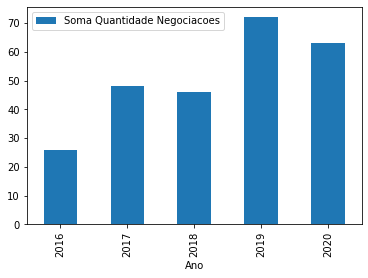

In [ ]:
# Resposta do exercício

import matplotlib.pyplot as plt 

resposta = spark.sql(query).toPandas()
resposta.plot(
    x='Ano',
    y='Soma Quantidade Negociacoes',
    kind = 'bar'
    )

plt.show()

## Exercício 3 

Qual o total de despesas em salários nos anos de 2016 a 2020 em cada região na qual a equipe está localizada, considerando o cargo de nível junior? Arredonde a soma dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "REGIAO", "TOTALDESPESA". Ordene as linhas exibidas primeiro pelo total de despesa em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

In [ ]:
# Resposta do exercício

query = """
SELECT dataAno AS `ANO`, filialRegiaoNome AS `REGIAO`, ROUND(SUM(salario), 2) AS `TOTALDESPESA`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK 
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
WHERE cargoNivel = 'JUNIOR'
  AND dataAno >= 2016
  AND dataAno <= 2020 
GROUP BY dataAno, filialRegiaoNome
ORDER BY TOTALDESPESA DESC, dataAno DESC
"""

spark.sql(query).show()

+----+------------+------------+
| ANO|      REGIAO|TOTALDESPESA|
+----+------------+------------+
|2020|     SUDESTE|  1257808.68|
|2019|     SUDESTE|  1257808.68|
|2018|     SUDESTE|  1056208.92|
|2017|     SUDESTE|   876154.56|
|2016|     SUDESTE|   489456.84|
|2020|CENTRO-OESTE|   337073.28|
|2019|CENTRO-OESTE|   337073.28|
|2018|CENTRO-OESTE|   337073.28|
|2020|    NORDESTE|    160832.4|
|2019|    NORDESTE|    160832.4|
|2017|CENTRO-OESTE|   154488.24|
+----+------------+------------+



## Exercício 4 

Mostre o resultado do Exercício 3 usando um diagrama de barras que permite a visualização dos resultados por região.

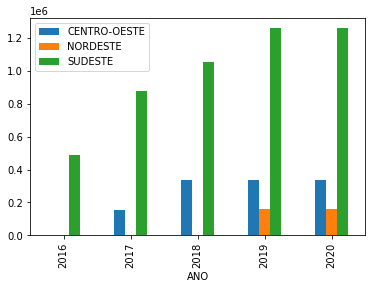

In [ ]:
# Resposta do exercício

resposta = spark.sql(query).toPandas()

legend = ['CENTRO-OESTE', 'NORDESTE', 'SUDESTE']
ax = resposta.set_index(['ANO', 'REGIAO']).unstack().plot(kind = 'bar')
ax.legend(legend);

plt.show()

## Exercício 5 

Liste o total dos salários e o total de receitas recebidas, considerando os anos de 2017, 2018 e 2019. Arredonde o total dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS". Ordene as linhas exibidas pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.


In [ ]:
# Resposta do exercício

query = """
SELECT tabSalario.ANO,
      `TOTAL GASTO EM SALARIOS`,
      `TOTAL DE RECEITAS RECEBIDAS`
FROM (
  SELECT dataAno AS `ANO`, ROUND(SUM(salario), 2) AS `TOTAL GASTO EM SALARIOS`
  FROM data JOIN pagamento ON data.dataPK = pagamento.dataPK
  WHERE dataAno BETWEEN 2017 AND 2019
  GROUP BY dataAno
) AS tabSalario
JOIN (
  SELECT dataAno AS `ANO`, ROUND(SUM(receita), 2) AS `TOTAL DE RECEITAS RECEBIDAS`
  FROM data JOIN negociacao ON data.dataPK = negociacao.dataPK
  WHERE dataAno BETWEEN 2017 AND 2019
  GROUP BY dataAno  
) AS tabReceita
ON tabSalario.ANO = tabReceita.ANO
ORDER BY tabSalario.ANO DESC
"""

spark.sql(query).show()

+----+-----------------------+---------------------------+
| ANO|TOTAL GASTO EM SALARIOS|TOTAL DE RECEITAS RECEBIDAS|
+----+-----------------------+---------------------------+
|2019|          1.856766636E7|               3.53533183E7|
|2018|           1.49355264E7|              1.159353965E7|
|2017|              9775279.8|                 7200423.35|
+----+-----------------------+---------------------------+



## Exercício 6 

Mostre o resultado do Exercício 5 usando um diagrama de barras.

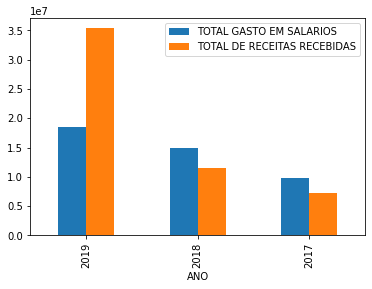

In [ ]:
# Resposta do exercício

resposta = spark.sql(query).toPandas()
resposta.set_index(['ANO']).plot(kind = 'bar')

plt.show()

## Exercício 7


Compare a quantidade de negociações que cada uma das equipes realizou nos anos de 2018 e 2019. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "NEGOCIACOES 2018", "NEGOCIACOES 2019". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

Dica: Considere relacionar as equipes por meio da operação drill-across.

In [ ]:
query = """
SELECT negociacoes2018.equipeNome AS `NOME DA EQUIPE`,
       negociacoes2018.filialNome AS `NOME DA FILIAL`,
       total2018 AS `NEGOCIACOES2018`,
       total2019 AS `NEGOCIACOES2019`
FROM ( SELECT negociacao.equipePK, equipeNome, filialNome, SUM(CAST(quantidadeNegociacoes AS INTEGER)) AS total2018
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
                       JOIN equipe ON equipe.equipePK = negociacao.equipePK
       WHERE dataAno = 2018
       GROUP BY negociacao.equipePK, equipeNome, filialNome
     ) AS negociacoes2018
     JOIN 
     ( SELECT negociacao.equipePK, equipeNome, filialNome, SUM(CAST(quantidadeNegociacoes AS INTEGER)) AS total2019
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
                       JOIN equipe ON equipe.equipePK = negociacao.equipePK
       WHERE dataAno = 2019
       GROUP BY negociacao.equipePK, equipeNome, filialNome  
     ) AS negociacoes2019
     ON negociacoes2018.equipePK = negociacoes2019.equipePK
ORDER BY negociacoes2018.equipeNome, negociacoes2018.filialNome
"""

spark.sql(query).show()

+--------------+--------------------+---------------+---------------+
|NOME DA EQUIPE|      NOME DA FILIAL|NEGOCIACOES2018|NEGOCIACOES2019|
+--------------+--------------------+---------------+---------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|            149|            135|
| APP - DESKTOP|SAO PAULO - AV. P...|            132|            135|
|  APP - MOBILE|CAMPO GRANDE - CE...|             98|             88|
|  APP - MOBILE|RIO DE JANEIRO - ...|             99|            112|
|  APP - MOBILE|SAO PAULO - AV. P...|            104|            108|
|           WEB|CAMPO GRANDE - CE...|            100|             95|
|           WEB|RIO DE JANEIRO - ...|             91|            106|
|           WEB|SAO PAULO - AV. P...|             76|             87|
+--------------+--------------------+---------------+---------------+



## Exercício 8 

Liste os setores dos clientes e a soma de suas respectivas receitas para o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "SETOR DO CLIENTE", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT clienteSetor AS `SETOR DO CLIENTE`,
       ROUND(SUM(receita),2) AS `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK 
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
WHERE dataAno = 2020 
  AND dataSemestre = 2
GROUP BY clienteSetor
ORDER BY `TOTAL DE RECEITAS` DESC
"""

spark.sql(query).show()

+-------------------+-----------------+
|   SETOR DO CLIENTE|TOTAL DE RECEITAS|
+-------------------+-----------------+
|BEBIDAS E ALIMENTOS|        5749704.7|
|              SAUDE|        3119775.3|
|         TECNOLOGIA|       2465926.05|
|          VESTUARIO|        2336266.5|
|            CREDITO|         998789.6|
+-------------------+-----------------+



## Exercício 9 

Analise a resposta do Exercício 8 para identificar qual o setor do cliente que obteve o maior total de receitas. Mostre o total de receitas por mês para esse setor do cliente, considerando o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "MES", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente e depois pelo mês em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT dataMes AS `MES` ,
       ROUND(SUM(receita),2) as `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
WHERE dataAno = 2020 
  AND dataSemestre = 2 
  AND clienteSetor = 'BEBIDAS E ALIMENTOS'
GROUP BY dataMes
ORDER BY `TOTAL DE RECEITAS` DESC, `MES` DESC
"""

spark.sql(query).show()

+---+-----------------+
|MES|TOTAL DE RECEITAS|
+---+-----------------+
| 11|        1156403.3|
| 10|        1091389.5|
| 12|         899122.7|
|  9|        877223.55|
|  8|         875934.3|
|  7|        849631.35|
+---+-----------------+



## Exercício 10 

Analise a resposta do Exercício 9 para identificar qual mês gerou o maior total de receitas para o setor de cliente identificado no Exercício 8. Mostre o total de receitas das equipes, considerando o segundo semestre do ano de 2020, o setor de cliente identificado no Exercício 8 e o mês identificado no Exercício 9. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente, e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT equipeNome as `NOME DA EQUIPE`,
       filialNome as `NOME DA FILIAL`,
       ROUND(SUM(receita),2) as `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
                JOIN equipe ON negociacao.equipePK = equipe.equipePK
WHERE dataAno = 2020 
  AND dataSemestre = 2 
  AND clienteSetor = 'BEBIDAS E ALIMENTOS'
  AND dataMes = 11
GROUP BY equipeNome, filialNome
ORDER BY equipeNome, filialNome
"""

spark.sql(query).show()

+--------------+--------------------+-----------------+
|NOME DA EQUIPE|      NOME DA FILIAL|TOTAL DE RECEITAS|
+--------------+--------------------+-----------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|         35645.65|
| APP - DESKTOP|SAO PAULO - AV. P...|         129409.4|
|  APP - MOBILE|CAMPO GRANDE - CE...|         48714.45|
|  APP - MOBILE|RIO DE JANEIRO - ...|          62138.7|
|  APP - MOBILE|SAO PAULO - AV. P...|         26571.85|
|BI & ANALYTICS|     RECIFE - CENTRO|        527169.75|
|BI & ANALYTICS|SAO PAULO - AV. P...|        149490.15|
|           WEB|CAMPO GRANDE - CE...|         20042.75|
|           WEB|RIO DE JANEIRO - ...|          68596.1|
|           WEB|SAO PAULO - AV. P...|          88624.5|
+--------------+--------------------+-----------------+



## Exercício 11

Liste todas as agregações que podem ser geradas a partir da média dos salários por ano por nome do estado da filial, considerando as equipes localizadas na região de nome SUDESTE. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "ESTADO DA FILIAL", "MEDIA DE SALARIOS". Ordene as linhas exibidas pelo estado da filial em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
query = """
SELECT dataAno AS ANO,
       filialEstadoNome AS `ESTADO DA FILIAL`,
       ROUND(AVG(salario), 2) AS `MEDIA DE SALARIOS`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
WHERE filialRegiaoNome = "SUDESTE"
GROUP BY CUBE (dataAno, filialEstadoNome)
ORDER BY `ESTADO DA FILIAL` DESC, ANO DESC 
"""

spark.sql(query).show()

+----+----------------+-----------------+
| ANO|ESTADO DA FILIAL|MEDIA DE SALARIOS|
+----+----------------+-----------------+
|2020|       SAO PAULO|          7948.39|
|2019|       SAO PAULO|          7948.39|
|2018|       SAO PAULO|          7986.58|
|2017|       SAO PAULO|           7639.4|
|2016|       SAO PAULO|          7735.52|
|null|       SAO PAULO|          7885.68|
|2020|  RIO DE JANEIRO|          7914.97|
|2019|  RIO DE JANEIRO|          7914.97|
|2018|  RIO DE JANEIRO|          7914.97|
|2017|  RIO DE JANEIRO|          7596.64|
|2016|  RIO DE JANEIRO|          7073.21|
|null|  RIO DE JANEIRO|          7767.22|
|2020|            null|          7935.17|
|2019|            null|          7935.17|
|2018|            null|          7953.29|
|2017|            null|          7621.71|
|2016|            null|          7404.36|
|null|            null|          7835.47|
+----+----------------+-----------------+



## Criando uma Base de Dados

In [ ]:
import sqlite3

# conectando base de dados
print("Conectando a base de dados")
connection = sqlite3.connect("gfg.db")

print("Conectando cursor")
# cursor de comandos
crsr = connection.cursor()

print("Fechando Conexao")
# fechar conexao
connection.close()

Conectando a base de dados
Conectando cursor
Fechando Conexao


## Criando tabela

In [ ]:
# conectando combase de dados
connection = sqlite3.connect("gfg.db")

# cursor de comandos
crsr = connection.cursor()

# Comando SQL para criar tabela
sql_command = """
CREATE TABLE funcionario (
  id INTEGER PRIMARY KEY,
  nome VARCHAR(120),
  genero CHAR(1),
  data_nascimento DATE,
  salario REAL
);
"""

# Executar comando
crsr.execute(sql_command)

# Fechar conexao
connection.close()

## Inserindo Dados

In [ ]:
# conectando combase de dados
connection = sqlite3.connect("gfg.db")

# cursor de comandos
crsr = connection.cursor()

# Comando SQL para inserir dados
sql_command = """
INSERT INTO funcionario VALUES (1111, "Maria Eduarda", "F", "1991-03-02", 5000.00);
"""
crsr.execute(sql_command)

# Adicionar dados na base
connection.commit()

# Fechar conexao
connection.close()

## Consultando Tabela

In [ ]:
 # conectando combase de dados
connection = sqlite3.connect("gfg.db")

# cursor de comandos
crsr = connection.cursor()

sql_command = """
SELECT * from funcionario
"""

# Executar comando
crsr.execute(sql_command)

# salva retorno do comando
result = crsr.fetchall()

for r in result:
  print(r)

# Fechar conexao
connection.close()

(1111, 'Maria Eduarda', 'F', '1991-03-02', 5000.0)


In [ ]:
# using pandas
import pandas as pd

# Create your connection.
connection = sqlite3.connect("gfg.db")

sql_command = """
SELECT * from funcionario
"""

df_result = pd.read_sql_query(sql_command, connection)

connection.close()

df_result

,id,nome,genero,data_nascimento,salario
0,1111,Maria Eduarda,F,1991-03-02,5000.0


In [ ]:
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
df_funcionario = pd.read_csv(url)
df_funcionario

,funcPK,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcCidade,funcEstadoNome,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,1,M-1,ALINE ALMEIDA,F,1/1/1990,1,1,1990,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,M-2,ARAO ALVES,M,2/2/1990,2,2,1990,CAMPINAS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,M-3,ARON ANDRADE,M,3/3/1990,3,3,1990,SANTOS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
3,4,M-4,ADA BARBOSA,F,4/4/1990,4,4,1990,SANTO ANDRE,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
4,5,M-5,ABADE BATISTA,M,5/5/1990,5,5,1990,PIRACICABA,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,M-196,ABNOAN FERNANDES,F,15/4/1974,15,4,1974,RIBEIRAO PRETO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
196,197,M-197,ADNAEL FERREIRA,M,16/5/1975,16,5,1975,ILHA BELA,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
197,198,M-198,ADRA GARCIA,M,17/6/1976,17,6,1976,SAO JOSE DO RIO PRETO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
198,199,M-199,ABRAHAM GOMES,M,18/7/1977,18,7,1977,OSASCO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [ ]:
import random


In [ ]:
from datetime import datetime

# conectando combase de dados
connection = sqlite3.connect("gfg.db")

# cursor de comandos
crsr = connection.cursor()

# Comando SQL para inserir dados
for index, row in df_funcionario.iterrows():
  funcPK = row["funcPK"]
  funcNome = row["funcNome"]
  funcSexo = row["funcSexo"]
  funcDataNascimento = f"{row['funcAnoNascimento']}/{row['funcMesNascimento']}/{row['funcDiaNascimento']}"
  salario = random.randint(3000, 20000)

  sql_command = f"""
  INSERT INTO funcionario VALUES ({funcPK}, "{funcNome}", "{funcSexo}", "{funcDataNascimento}", {salario});
  """
  crsr.execute(sql_command)

# Adicionar dados na base
connection.commit()

# Fechar conexao
connection.close()

In [ ]:
# Create your connection.
connection = sqlite3.connect("gfg.db")

sql_command = """
SELECT * from funcionario
"""

df_result = pd.read_sql_query(sql_command, connection)

connection.close()

df_result

,id,nome,genero,data_nascimento,salario
0,1,ALINE ALMEIDA,F,1990/1/1,10552.0
1,2,ARAO ALVES,M,1990/2/2,5796.0
2,3,ARON ANDRADE,M,1990/3/3,3685.0
3,4,ADA BARBOSA,F,1990/4/4,11984.0
4,5,ABADE BATISTA,M,1990/5/5,15565.0
...,...,...,...,...,...
196,197,ADNAEL FERREIRA,M,1975/5/16,13554.0
197,198,ADRA GARCIA,M,1976/6/17,4166.0
198,199,ABRAHAM GOMES,M,1977/7/18,10636.0
199,200,ABRAAO LIMA,M,1978/8/19,19911.0


## Update Tabela

In [ ]:
connection = sqlite3.connect("gfg.db")

cursor = connection.cursor()


sql_command = """
SELECT * from funcionario
"""
# Updating
cursor.execute(
"""
UPDATE funcionario SET nome = "Marco Antonio" WHERE id=1;
""")

connection.commit()

connection.close()

In [ ]:
# Create your connection.
connection = sqlite3.connect("gfg.db")

sql_command = """
SELECT * from funcionario
"""

df_result = pd.read_sql_query(sql_command, connection)

connection.close()

df_result

,id,nome,genero,data_nascimento,salario
0,1,Marco Antonio,F,1990/1/1,10552.0
1,2,ARAO ALVES,M,1990/2/2,5796.0
2,3,ARON ANDRADE,M,1990/3/3,3685.0
3,4,ADA BARBOSA,F,1990/4/4,11984.0
4,5,ABADE BATISTA,M,1990/5/5,15565.0
...,...,...,...,...,...
196,197,ADNAEL FERREIRA,M,1975/5/16,13554.0
197,198,ADRA GARCIA,M,1976/6/17,4166.0
198,199,ABRAHAM GOMES,M,1977/7/18,10636.0
199,200,ABRAAO LIMA,M,1978/8/19,19911.0


## Delete linha

In [ ]:
connection = sqlite3.connect('gfg.db')

cursor = connection.cursor()

# Updating
cursor.execute(
"""
DELETE FROM funcionario WHERE nome="Marco Antonio";
"""
)

connection.commit()

connection.close()

In [ ]:
# Create your connection.
connection = sqlite3.connect("gfg.db")

sql_command = """
SELECT * from funcionario
"""

df_result = pd.read_sql_query(sql_command, connection)

connection.close()

df_result

,id,nome,genero,data_nascimento,salario
0,2,ARAO ALVES,M,1990/2/2,5796.0
1,3,ARON ANDRADE,M,1990/3/3,3685.0
2,4,ADA BARBOSA,F,1990/4/4,11984.0
3,5,ABADE BATISTA,M,1990/5/5,15565.0
4,6,ABADI BARROS,M,1990/6/6,12124.0
...,...,...,...,...,...
195,197,ADNAEL FERREIRA,M,1975/5/16,13554.0
196,198,ADRA GARCIA,M,1976/6/17,4166.0
197,199,ABRAHAM GOMES,M,1977/7/18,10636.0
198,200,ABRAAO LIMA,M,1978/8/19,19911.0


## Deletar Tabela

In [ ]:
# conectando combase de dados
connection = sqlite3.connect("gfg.db")

# cursor de comandos
crsr = connection.cursor()

# Comando SQL para criar tabela
sql_command = """
DROP TABLE IF EXISTS funcionario
"""

# Executar comando
crsr.execute(sql_command)

# Fechar conexao
connection.close()

# <span style="color:blue">Aula 08: Explorando o Módulo pyspark.sql</span>
## <span style="color:blue">Métodos de Interesse e Consultas OLAP</span>

**IMPORTANTE: O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.**

#1 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


#2 Obtenção dos Dados da BI Solutions


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [1]:
#instalando o módulo wget
%%capture
!pip install -q wget
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão. 

In [2]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente.csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos. 

In [3]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao.csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [4]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [5]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [6]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [7]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [8]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br> 
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados. 
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente. 


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Geração dos DataFrames da BI Solutions

Um `DataFrame` em Spark é equivalente a uma tabela relacional. Portanto, um `DataFrame` possui um esquema, uma ou mais linhas (ou tuplas) e uma ou mais colunas (ou atributos).


## 4.1 Métodos para Leitura e Escrita

### Método spark.read.csv()

``spark.read.csv()``

Realiza a leitura dos dados de um arquivo `.csv` e armazena esses dados em um `DataFrame`. Alguns parâmetros do método são: 

- `path`: indica o endereço do arquivo que é lido.

- `header`: indica se o arquivo possui um cabeçalho.

- `sep`: especifica o caractere que separa os campos do arquivo.

- `inferSchema`: infere o tipo de dados de cada atributo automaticamente a partir dos dados do arquivo `.csv`. Para que isto seja possível, existe a necessidade de se ler os dados mais uma vez. Se esse parâmetro não for especificado, seu valor padrão é `false`. 

Entretanto, vários parâmetros podem ser especificados. Uma lista completa desses parâmetros pode ser encontrada neste [link](https://docs.databricks.com/data/data-sources/read-csv.html). 




### Método show()

`show(number=20, truncate=True, vertical=False)`

Mostra o conteúdo do `DataFrame`. Caso o parâmetro `number` seja especificado, é mostrado o número de linhas especificado. Caso contrário, são exibidas as 20 primeiras linhas.  O parâmetro `truncate` indica que  *strings* com tamanho maior do que 20 caracteres são truncadas. O último parâmetro, `vertical`, indica que a saída é composta por um conjunto de linhas divididas em colunas (forma de uma tabela). Caso seja especificado `vertical=True`, cada coluna de cada linha é exibida em uma linha diferente.

### Método printSchema()

`printSchema()`

Mostra o esquema do `DataFrame` no formato de uma árvore. São exibidos os nomes das colunas e os tipos de dados dessas colunas. `nullable = true` indica que o valor nulo é usado para indicar valores que não são conhecidos ou que são foram preenchidos quando o arquivo foi lido em um `DataFrame`.  



### Método write.csv()

`write.csv()`

Realiza a escrita dos dados de um `DataFrame` em um arquivo `.csv`. Podem ser definidos vários parâmetros, como `path` para indicar o endereço do arquivo que é escrito, `header` para armazenar os nomes das colunas do `DataFrame` como um cabeçalho do arquivo e `sep` para especificar o caractere que separa os campos do arquivo. Uma lista completa desses parâmetros pode ser encontrada neste [link](https://docs.databricks.com/data/data-sources/read-csv.html). 


## 4.2 Criação dos DataFrames

In [10]:
#criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cargo.show(5)
cargo.printSchema()


+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|cargoPK|           cargoNome|cargoRegimeTrabalho|cargoJornadaTrabalho|cargoEscolaridadeMinima|cargoNivel|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|      1|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                  MEDIO|    JUNIOR|
|      2|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|               SUPERIOR|     PLENO|
|      3|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                    POS|    SENIOR|
|      4|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|                  MEDIO|    JUNIOR|
|      5|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|               SUPERIOR|     PLENO|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
only showing top 5 rows

root
 |-- ca

In [11]:
#criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
cliente.show(5)
cliente.printSchema()

+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|clientePK|clienteNomeFantasia|       clienteSetor|clienteCidade|clienteEstadoNome|clienteEstadoSigla|clienteRegiaoNome|clienteRegiaoSigla|clientePaisNome|clientePaisSigla|
+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|        1|           VIA FOOD|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        2|          VIA PIZZA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        3|           VIA JAPA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|               

In [12]:
#criando e exibindo o DataFrame para a tabela de dimensão data
data = spark.read.csv(path="data/data.csv", header=True, sep=",") 
data.show(5)
data.printSchema()

+------+------------+-------+-------+------------+-------------+------------+-------+
|dataPK|dataCompleta|dataDia|dataMes|dataBimestre|dataTrimestre|dataSemestre|dataAno|
+------+------------+-------+-------+------------+-------------+------------+-------+
|     1|    1/1/2016|      1|      1|           1|            1|           1|   2016|
|     2|    2/1/2016|      2|      1|           1|            1|           1|   2016|
|     3|    3/1/2016|      3|      1|           1|            1|           1|   2016|
|     4|    4/1/2016|      4|      1|           1|            1|           1|   2016|
|     5|    5/1/2016|      5|      1|           1|            1|           1|   2016|
+------+------------+-------+-------+------------+-------------+------------+-------+
only showing top 5 rows

root
 |-- dataPK: string (nullable = true)
 |-- dataCompleta: string (nullable = true)
 |-- dataDia: string (nullable = true)
 |-- dataMes: string (nullable = true)
 |-- dataBimestre: string (nullable 

In [13]:
#criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
equipe.show(5)
equipe.printSchema()

+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|equipePK|   equipeNome|          filialNome|  filialCidade|  filialEstadoNome|filialEstadoSigla|filialRegiaoNome|filialRegiaoSigla|filialPaisNome|filialPaisSigla|
+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|       1|APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       2|APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|    RIO DE JANEIRO|               RJ|         SUDESTE|               SE|        BRASIL|             BR|
|       3|          WEB|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       4|      

In [14]:
#criando e exibindo o DataFrame para a tabela de fatos funcionario
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
funcionario.show(5)
funcionario.printSchema()

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

In [15]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
negociacao.show(5)
negociacao.printSchema()

+--------+---------+------+--------+---------------------+
|equipePK|clientePK|dataPK| receita|quantidadeNegociacoes|
+--------+---------+------+--------+---------------------+
|       2|        9|    22|11564.75|                    1|
|       2|       24|    11| 17990.5|                    1|
|       2|       28|    21| 16335.9|                    1|
|       1|       30|    23| 8495.55|                    1|
|       2|       43|    30|24748.75|                    1|
+--------+---------+------+--------+---------------------+
only showing top 5 rows

root
 |-- equipePK: string (nullable = true)
 |-- clientePK: string (nullable = true)
 |-- dataPK: string (nullable = true)
 |-- receita: string (nullable = true)
 |-- quantidadeNegociacoes: string (nullable = true)



In [16]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")
pagamento.show()
pagamento.printSchema()

+------+--------+------+-------+--------+---------------------+
|funcPK|equipePK|dataPK|cargoPK| salario|quantidadeLancamentos|
+------+--------+------+-------+--------+---------------------+
|   147|       2|     5|     64| 1559.94|                    1|
|   124|       2|     5|    329| 8102.77|                    1|
|   175|       1|     5|    328| 2532.51|                    1|
|   171|       1|     5|    245|  7882.7|                    1|
|   148|       2|     5|     65| 4404.59|                    1|
|     5|       2|     5|    112| 2226.66|                    1|
|   128|       1|     5|    341| 6157.04|                    1|
|    82|       2|     5|     43| 1585.51|                    1|
|    28|       1|     5|    253| 1594.02|                    1|
|    46|       1|     5|    390| 9880.16|                    1|
|    91|       2|     5|    233|10931.47|                    1|
|   176|       2|     5|    241| 2005.49|                    1|
|   172|       1|     5|    351|14218.28

## 4.3 Manipulação da Tipagem dos Dados

Como pode ser observado nos comandos relativos ao método `printSchema()` aplicado a cada um dos `DataFrames` gerados, todos os tipos de dados importados são *string*. Entretanto, alguns valores devem ser do tipo de dado *numérico*. Portanto, primeiramente é usado o método `cast()` para a conversão entre os tipos de dados e depois o método `withColumn()` para substituir a colunas existentes por novas colunas contendo os valores convertidos. 

É importante salientar que, mesmo que o parâmetro `inferSchema` fosse especificado como `true` no método `spark.read.csv()`, ainda existiria a necessidade de se verificar os tipos de dados e realizar a conversão caso necessário.    


### Método cast()

`cast(tipoDeDado)`

Converte o atributo para o `tipoDeDado` passado como parâmetro. Podem ser definidos os seguintes valores para `tipoDeDado`: DataType, NullType, StringType, BinaryType, BooleanType, DateType, TimestampType, DecimalType, DoubleType, FloatType, ByteType, IntegerType, LongType, ShortType, ArrayType, MapType, StructField, StructType.



### Método withColumn()

`withColumn(nomeColuna, exprColuna)`

Retorna um novo `DataFrame` adicionando uma coluna de `nomeColuna` ou substituindo uma coluna existente que possui o mesmo nome `nomeColuna`, usando o parâmetro `exprColuna` para o preenchimento dos valores daquela coluna.  

Este comando considera o `DataFrame` sobre o qual ele foi aplicado, não permitindo adicionar a esse `DataFrame` colunas de um segundo `DataFrame`.

## 4.4 Atualização dos Tipos de Dados 

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado inteiro. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [17]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado inteiro
colunas_cargo = ["cargoPK"]
colunas_cliente = ["clientePK"]
colunas_data = ["dataPk", "dataDia", "dataMes", "dataBimestre", "dataTrimestre", "dataSemestre", "dataAno"]
colunas_equipe = ["equipePK"]
colunas_funcionario = ["funcPK", "funcDiaNascimento", "funcMesNascimento", "funcAnoNascimento"]
colunas_negociacao = ["equipePK", "clientePK", "dataPK", "quantidadeNegociacoes"]
colunas_pagamento = ["funcPK", "equipePK", "dataPK", "cargoPK", "quantidadeLancamentos"]

In [18]:
# importando o tipo de dado desejado
from pyspark.sql.types import IntegerType


# atualizando o tipo de dado das colunas especificadas 
# substituindo as colunas já existentes 

for coluna in colunas_cargo:
  cargo = cargo.withColumn(coluna, cargo[coluna].cast(IntegerType()))

for coluna in colunas_cliente:
  cliente = cliente.withColumn(coluna, cliente[coluna].cast(IntegerType()))

for coluna in colunas_data:
  data = data.withColumn(coluna, data[coluna].cast(IntegerType()))

for coluna in colunas_equipe:
  equipe = equipe.withColumn(coluna, equipe[coluna].cast(IntegerType()))

for coluna in colunas_funcionario:
  funcionario = funcionario.withColumn(coluna, funcionario[coluna].cast(IntegerType()))

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(IntegerType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(IntegerType()))

In [19]:
# exibindo o esquema dos DataFrames após as alterações realizadas
cargo.printSchema()
cliente.printSchema()
data.printSchema()
equipe.printSchema()
funcionario.printSchema()
pagamento.printSchema()
negociacao.printSchema()

root
 |-- cargoPK: integer (nullable = true)
 |-- cargoNome: string (nullable = true)
 |-- cargoRegimeTrabalho: string (nullable = true)
 |-- cargoJornadaTrabalho: string (nullable = true)
 |-- cargoEscolaridadeMinima: string (nullable = true)
 |-- cargoNivel: string (nullable = true)

root
 |-- clientePK: integer (nullable = true)
 |-- clienteNomeFantasia: string (nullable = true)
 |-- clienteSetor: string (nullable = true)
 |-- clienteCidade: string (nullable = true)
 |-- clienteEstadoNome: string (nullable = true)
 |-- clienteEstadoSigla: string (nullable = true)
 |-- clienteRegiaoNome: string (nullable = true)
 |-- clienteRegiaoSigla: string (nullable = true)
 |-- clientePaisNome: string (nullable = true)
 |-- clientePaisSigla: string (nullable = true)

root
 |-- dataPk: integer (nullable = true)
 |-- dataCompleta: string (nullable = true)
 |-- dataDia: integer (nullable = true)
 |-- dataMes: integer (nullable = true)
 |-- dataBimestre: integer (nullable = true)
 |-- dataTrimestre:

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado número de ponto flutuante. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [20]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado número de ponto flutuante
colunas_negociacao = ["receita"]
colunas_pagamento = ["salario"]

In [21]:
# importando o tipo de dado desejado
from pyspark.sql.types import FloatType


# atualizando o tipo de dado das colunas especificadas 
# substituindo as colunas já existentes 

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(FloatType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(FloatType()))

In [22]:
# exibindo o esquema dos DataFrames após as alterações realizadas
pagamento.printSchema()
negociacao.printSchema()

root
 |-- funcPK: integer (nullable = true)
 |-- equipePK: integer (nullable = true)
 |-- dataPK: integer (nullable = true)
 |-- cargoPK: integer (nullable = true)
 |-- salario: float (nullable = true)
 |-- quantidadeLancamentos: integer (nullable = true)

root
 |-- equipePK: integer (nullable = true)
 |-- clientePK: integer (nullable = true)
 |-- dataPK: integer (nullable = true)
 |-- receita: float (nullable = true)
 |-- quantidadeNegociacoes: integer (nullable = true)



Note que outras conversões de formato também poderiam ser realizadas, como mudar as colunas referentes às datas para o tipo de dado `DateType`. 

#5 Métodos Similares às Cláusulas SQL

O módulo `pyspark.sql` oferece diversos métodos com funcionalidades similares às cláusulas da linguagem SQL. Esses métodos são descritos considerando as similaridades com a estrutura básica do comando SELECT, com as funções de agregação e agrupamento e com as operações sobre conjuntos. 

## 5.1 Estrutura Básica do Comando SELECT

### Método select()

`select (coluna_1, ..., coluna_n)`

Lista as colunas definidas, gerando um novo `DataFrame`. É possível utilizar o caractere `*` para indicar que todas as colunas do `DataFrame` devem ser exibidas. 

Este método é equivalente à cláusula `SELECT` da linguagem SQL.

Os comandos a seguir selecionam as duas primeiras colunas do `DataFrame funcionario`.

In [23]:
#exemplo que mostra o esquema selecionado
funcionario\
   .select('funcPK', 'funcMatricula')


DataFrame[funcPK: int, funcMatricula: string]

In [24]:
#exibindo os dados usando o método .take
#exibindo linha a linha
funcionario\
   .select('funcPK', 'funcMatricula')\
   .take(5)

[Row(funcPK=1, funcMatricula='M-1'),
 Row(funcPK=2, funcMatricula='M-2'),
 Row(funcPK=3, funcMatricula='M-3'),
 Row(funcPK=4, funcMatricula='M-4'),
 Row(funcPK=5, funcMatricula='M-5')]

In [25]:
#exibindo as linhas na forma de tabela
funcionario\
   .select('funcPK', 'funcMatricula')\
   .show(5)

+------+-------------+
|funcPK|funcMatricula|
+------+-------------+
|     1|          M-1|
|     2|          M-2|
|     3|          M-3|
|     4|          M-4|
|     5|          M-5|
+------+-------------+
only showing top 5 rows



In [26]:
#exibindo as linhas na forma de tabela
#forma de representação alternativa
funcionario\
   .select(funcionario["funcPK"], funcionario["funcMatricula"])\
   .show(5)

+------+-------------+
|funcPK|funcMatricula|
+------+-------------+
|     1|          M-1|
|     2|          M-2|
|     3|          M-3|
|     4|          M-4|
|     5|          M-5|
+------+-------------+
only showing top 5 rows



### Método selectExpr()

`selectExpr (expressao_1, ..., expressao_n)`

Lista as expressões definidas, as quais podem ser nomes de colunas, gerando um novo `DataFrame`. 

Este método é uma variação do método `select()` que permite a especificação de expressões SQL. 

Este método é equivalente à cláusula `SELECT` da linguagem SQL.

O comando a seguir seleciona as duas primeiras colunas do `DataFrame funcionario`, multiplicando a primeira coluna por 2.

In [27]:
funcionario\
   .selectExpr("funcPK * 2", "funcMatricula")\
   .show(5)

+------------+-------------+
|(funcPK * 2)|funcMatricula|
+------------+-------------+
|           2|          M-1|
|           4|          M-2|
|           6|          M-3|
|           8|          M-4|
|          10|          M-5|
+------------+-------------+
only showing top 5 rows



### Método distinct()

`distinct()`

Retorna um novo `DataFrame` contendo apenas linhas cujos valores são diferentes entre si. 

Este método é equivalente à cláusula `DISTINCT` da linguagem SQL.

Nos comandos a seguir, primeiro é listada somente a coluna `funcSexo` de funcionário, mostrando valores repetidos para os sexos. Na sequência, é listada a coluna `funcSexo` de funcionário, porém sem listar valores repetidos.

In [28]:
funcionario\
   .select('funcSexo')\
   .show(10)

+--------+
|funcSexo|
+--------+
|       F|
|       M|
|       M|
|       F|
|       M|
|       M|
|       F|
|       M|
|       M|
|       M|
+--------+
only showing top 10 rows



In [29]:
funcionario\
   .select('funcSexo')\
   .distinct()\
   .show()

+--------+
|funcSexo|
+--------+
|       F|
|       M|
+--------+



### Método filter()

`filter (condição)`

Filtra as linhas do `DataFrame` de acordo com a `condição` especificada, gerando um novo `DataFrame`. Este método é equivalente ao método `where()`. 

Este método é equivalente à cláusula `WHERE` da linguagem SQL.

O comando a seguir seleciona os funcionários do sexo feminino cujo valor de `funcPK` é maior do que 160.

In [30]:
funcionario\
   .filter("funcPK > 160 AND funcSexo = 'F'")\
   .show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|   161|        M-161|  ABINOA ALMEIDA|       F|          9/5/1990|                9|                5|             1990|        RECIFE|    PERNAMBUCO|             PE|      NORDESTE|             NE|      BRASIL|           BR|
|   162|        M-162|   ABINOAN ALVES|       F|         10/6/1990|               10|           

### Método where()

`where (condição)`

Filtra as linhas do `DataFrame` de acordo com a condição especificada, criando um novo `DataFrame`. Este método é equivalente ao método `filter()`. 

Este método é equivalente à cláusula `WHERE` da linguagem SQL.

O comando a seguir seleciona os funcionários do sexo feminino cujo valor de `funcPK` é maior do que 160.

In [31]:
funcionario\
   .where("funcPK > 160 AND funcSexo = 'F'")\
   .show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|   161|        M-161|  ABINOA ALMEIDA|       F|          9/5/1990|                9|                5|             1990|        RECIFE|    PERNAMBUCO|             PE|      NORDESTE|             NE|      BRASIL|           BR|
|   162|        M-162|   ABINOAN ALVES|       F|         10/6/1990|               10|           

### Método between()

`between (valorInferior, valorSuperior)`

Retorna as linhas cujos valores são maiores ou iguais ao `valorInferior` e menores ou iguais ao `valorSuperior`.

Este método é equivalente ao operador de comparação `BETWEEN ... AND` da linguagem SQL.


O comando a seguir seleciona os funcionários cujo valor de `funcPK` é maior ou igual a 10 e menor ou igual a 15.

In [32]:
funcionario\
   .filter("funcPK BETWEEN 10 AND 15")\
   .show()

+------+-------------+---------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|       funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+---------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|    10|         M-10| ADETE CARVALHO|       M|        10/10/1990|               10|               10|             1990|        OSASCO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|    11|         M-11|     ABD CASTRO|       M|        11/11/1990|               11|               1

### Métodos isNull() e isNotNull()

Os métodos `isNull()` e `isNotNull()` estão relacionados com a verificação de valores nulos, da seguinte forma:

- `isNull()`: Retorna verdadeiro se o valor do atributo for nulo. 

- `isNotNull()`: Retorna verdadeiro se o valor do atributo não for nulo.

Estes métodos são equivalentes aos operadores de comparação `IS NULL` e `IS NOT NULL` da linguagem SQL.

Nos comandos a seguir, primeiramente solicita-se a listagem de todas as linhas cujo valor do atributo `funcPK` seja nulo. Nenhuma linha é retornada. Na sequência, são retornadas todas as linhas do `DataFrame` `funcionario`, desde que todos os valores do atributo `funcPK` não são nulos. 

In [33]:
from pyspark.sql import Row

funcionario\
   .filter(funcionario.funcPK.isNull())\
   .show(5)

+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+
+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+



In [34]:
funcionario\
   .filter(funcionario.funcPK.isNotNull())\
   .show(5)

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

### Método isin()

`isin(listaDeValores)`

Retorna verdadeiro se o valor do atributo estiver contido na `listaDeValores` passada como parâmetro.

Este método é equivalente ao operador de comparação `IN` da linguagem SQL.

No comando a seguir, são listados os dados dos funcionários cujo valor de `funcPK` está contido na lista identificada pelos valores `1, 2, 3, 4, 5`. 

In [35]:
funcionario[funcionario.funcPK.isin([1,2,3,4,5])]\
   .show()

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

### Método like()

like(expressão)

Quando aplicado a uma coluna de um `DataFrame`, retorna as linhas que são similares à `expressão` definida como parâmetro.

A comparação é sensível ao caso. Pode ser utilizado % para substituir qualquer *string*. 

Este método é equivalente ao operador de comparação `LIKE` da linguagem SQL.


In [36]:
funcionario\
   .filter(funcionario.funcNome.like('ADA%'))\
   .show()

+------+-------------+--------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|      funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+--------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     4|          M-4|   ADA BARBOSA|       F|          4/4/1990|                4|                4|             1990|SANTO ANDRE|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|    52|         M-52|ADAILTON COSTA|       M|         21/4/1951|               21|                4|             19

### Método withColumnRenamed()

`withColumnRenamed(nomeColunaAtual, novoNomeColuna)`

Renomeia o nome de uma coluna já existente, identificado pelo parâmetro `nomeColunaAtual`, para o novo nome identificado pelo parâmetro `novoNomeColuna`. 

Este método é equivalente à cláusula AS da linguagem SQL quando utilizada para renomear atributos.



In [37]:
pagamento\
   .select('*')\
   .show(2)

+------+--------+------+-------+-------+---------------------+
|funcPK|equipePK|dataPK|cargoPK|salario|quantidadeLancamentos|
+------+--------+------+-------+-------+---------------------+
|   147|       2|     5|     64|1559.94|                    1|
|   124|       2|     5|    329|8102.77|                    1|
+------+--------+------+-------+-------+---------------------+
only showing top 2 rows



In [38]:
pagamento\
   .withColumnRenamed("salario", "Salário do funcionário")\
   .show(2)

+------+--------+------+-------+----------------------+---------------------+
|funcPK|equipePK|dataPK|cargoPK|Salário do funcionário|quantidadeLancamentos|
+------+--------+------+-------+----------------------+---------------------+
|   147|       2|     5|     64|               1559.94|                    1|
|   124|       2|     5|    329|               8102.77|                    1|
+------+--------+------+-------+----------------------+---------------------+
only showing top 2 rows



### Método crossJoin()

`crossJoin(segundoDataFrame)`

Retorna o produto cartesiano de dois `DataFrames`, criando um novo `DataFrame`. É passado como parâmetro o segundo `DataFrame`. 

No produto cartesiano, quaisquer duas linhas são combinadas, independentemente da integridade referencial existente entre elas. Portanto, como resultado, são produzidas todas as combinações de linhas possíveis entre os dois `DataFrames` participantes.

Este método é equivalente à cláusula `FROM` da linguagem SQL.

Nos comandos a seguir, é feito o produto cartesiano dos `DataFrames` relacionados a `funcionario` e `pagamento`, mostrando que `funcPK` de `funcionario` pode ser diferente de `funcPK` de `pagamento`.

In [39]:
funcSelecionado = funcionario.select('funcPK', 'funcMatricula')
pagSelecionado = pagamento.select ('funcPK', 'salario')
funcSelecionado.crossJoin(pagSelecionado).show(10)

+------+-------------+------+-------+
|funcPK|funcMatricula|funcPK|salario|
+------+-------------+------+-------+
|     1|          M-1|   147|1559.94|
|     2|          M-2|   147|1559.94|
|     3|          M-3|   147|1559.94|
|     4|          M-4|   147|1559.94|
|     5|          M-5|   147|1559.94|
|     6|          M-6|   147|1559.94|
|     7|          M-7|   147|1559.94|
|     8|          M-8|   147|1559.94|
|     9|          M-9|   147|1559.94|
|    10|         M-10|   147|1559.94|
+------+-------------+------+-------+
only showing top 10 rows



### Método join()

`join(segundoDataFrame, on=None, how=None)`

Retorna a junção de dois `DataFrames`, criando um novo `DataFrame`. O primeiro parâmetro indica qual o segundo `DataFrame` a ser considerado na junção. O parâmetro `on` indica a condição de junção. O terceiro parâmetro, `how`, especifica como a junção deve ser feita. O valor padrão é `inner`. Também pode ser: `cross`, `outer`, `full`, `fullouter`, `full_outer`, `left`, `leftouter`, `left_outer`, `right`, `rightouter`, `right_outer`.

Na junção,  as linhas são combinadas de acordo com a integridade referencial existente entre elas, a qual deve ser definida no parâmetro `on`.

Este método é equivalente à cláusula `JOIN` da linguagem SQL.

Nos comandos a seguir, é feita a junção interna (`inner join`) dos `DataFrames` relacionados a `funcionario` e `pagamento`, mostrando que `funcPK` de funcionario é igual à `funcPK` de `pagamento`.

In [40]:
# realizando a junção passo a passo
funcSelecionado = funcionario.select('funcPK', 'funcMatricula')
pagSelecionado = pagamento.select('funcPK', 'salario')
funcSelecionado\
   .join(pagSelecionado, funcSelecionado["funcPK"] == pagSelecionado["funcPK"], 'inner')\
   .show(10)

+------+-------------+------+-------+
|funcPK|funcMatricula|funcPK|salario|
+------+-------------+------+-------+
|   147|        M-147|   147|1559.94|
|   124|        M-124|   124|8102.77|
|   175|        M-175|   175|2532.51|
|   171|        M-171|   171| 7882.7|
|   148|        M-148|   148|4404.59|
|     5|          M-5|     5|2226.66|
|   128|        M-128|   128|6157.04|
|    82|         M-82|    82|1585.51|
|    28|         M-28|    28|1594.02|
|    46|         M-46|    46|9880.16|
+------+-------------+------+-------+
only showing top 10 rows



In [41]:
# eliminando a coluna funcPK repetida
funcSelecionado\
   .join(pagSelecionado, 'funcPK', 'inner')\
   .show(10)

+------+-------------+-------+
|funcPK|funcMatricula|salario|
+------+-------------+-------+
|   147|        M-147|1559.94|
|   124|        M-124|8102.77|
|   175|        M-175|2532.51|
|   171|        M-171| 7882.7|
|   148|        M-148|4404.59|
|     5|          M-5|2226.66|
|   128|        M-128|6157.04|
|    82|         M-82|1585.51|
|    28|         M-28|1594.02|
|    46|         M-46|9880.16|
+------+-------------+-------+
only showing top 10 rows



### Método orderBy()

`orderBy (colunas, ordena)`

Ordena as linhas resultantes, gerando um novo `DataFrame`. Deve ser especificada uma lista de colunas ou os nomes de colunas a serem considerados na ordenação. Pode ser especificada também a ordenação ascendente ou descendente. 

Este método é equivalente à cláusula `ORDER BY` da linguagem SQL.

In [42]:
from pyspark.sql.functions import *

funcionario.orderBy(desc("funcPK")).show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|          funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|   200|        M-200|     ABRAAO LIMA|       M|         19/8/1978|               19|                8|             1978|          ARARAQUARA|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|   199|        M-199|   ABRAHAM GOMES|       M|         18/7/1977|     

In [43]:
funcionario.orderBy(["funcPK"],ascending=[0]).show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|          funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|   200|        M-200|     ABRAAO LIMA|       M|         19/8/1978|               19|                8|             1978|          ARARAQUARA|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|   199|        M-199|   ABRAHAM GOMES|       M|         18/7/1977|     

## 5.2 Agregação e Agrupamento

As funções de agregação e agrupamento somente podem ser aplicadas a tipos de dados numéricos.

### Método sum()

`sum(listaDeColunas)`

Calcula a soma dos valores para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `SUM()` do SQL.

In [44]:
# listando a soma dos salários e a soma da quantidade de lancamentos
pagamento\
   .select("salario","quantidadeLancamentos")\
   .groupBy()\
   .sum("salario","quantidadeLancamentos")\
   .withColumnRenamed("sum(salario)", "Soma dos salários")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show() 

+-------------------+-------------------------------+
|  Soma dos salários|Quantidade Total de Lançamentos|
+-------------------+-------------------------------+
|6.628875631347656E7|                           8640|
+-------------------+-------------------------------+



### Método min()

`min(listaDeColunas)`

Calcula o menor valor para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `MIN()` do SQL.

In [45]:
# listando o menor salário 
pagamento\
   .select("salario")\
   .groupBy()\
   .min("salario")\
   .withColumnRenamed("min(salario)", "Menor Salário")\
   .show()
   

+-------------+
|Menor Salário|
+-------------+
|      1501.57|
+-------------+



### Método max()

`max(listaDeColunas)`

Calcula o maior valor para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `MAX()` do SQL.

In [46]:
# listando o maior salário 
pagamento\
   .select("salario")\
   .groupBy()\
   .max("salario")\
   .withColumnRenamed("max(salario)", "Maior Salário")\
   .show()

+-------------+
|Maior Salário|
+-------------+
|     47140.17|
+-------------+



### Método avg()

`avg(listaDeColunas)`

Calcula o valor médio para cada coluna especificada no parâmetro `listaDeColunas`, considerando cada grupo.  Este método é equivalente ao método `mean()`.

Este método é equivalente à função de agregação `AVG()` da linguagem SQL.

In [47]:
pagamento\
   .select("salario")\
   .groupBy()\
   .avg("salario")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+------------------+
|Média dos Salários|
+------------------+
|           7672.31|
+------------------+



### Método mean()

`mean(listaDeColunas)`

Calcula o valor médio para cada coluna especificada no parâmetro `listaDeColunas`, considerando cada grupo.  Este método é equivalente ao método `avg()`.

Este método é equivalente à função de agregação `AVG()` da linguagem SQL.

In [48]:
# listando a média dos salários 
pagamento\
   .select("salario")\
   .groupBy()\
   .mean("salario")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+------------------+
|Média dos Salários|
+------------------+
|           7672.31|
+------------------+



Método count()

`count()`

Retorna o número de linhas de um `DataFrame`.

Este método é equivalente à função de agregação `COUNT()` da linguagem SQL.

In [49]:
# retornando a quantidade de linhas de pagamento
pagamento.count()

8640

### Método agg()

`agg(listaDeExpressões)`

Aplica um método de agregação a todas as linhas do `DataFrame`, sem considerar agrupamentos. O parâmetro listaDeExpressões indica, para cada atributo sendo considerado, qual o método de agregação que deve ser aplicado. O método `agg()` representa uma sintaxe resumida para `groupBy.agg()`.  


In [50]:
# listando o maior salário e a soma das quantidades de lançamentos
pagamento\
   .agg({"salario": "max", "quantidadeLancamentos": "sum"})\
   .withColumnRenamed("max(salario)", "Maior Salário")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------+-------------------------------+
|Maior Salário|Quantidade Total de Lançamentos|
+-------------+-------------------------------+
|     47140.17|                           8640|
+-------------+-------------------------------+



### Método groupBy()

`groupBy(listaDeColunas)`

Aplica um método de agregação a um grupo de conjunto de linhas, retornando para cada grupo do conjunto de linhas um único valor. 

Este método é equivalente à cláusula `GROUP BY` da linguagem SQL.

O comando a seguir lista, para cada funcPK, a soma dos salários recebidos. 

In [51]:
pagamento\
   .select("funcPK", "salario")\
   .groupBy("funcPK")\
   .sum("salario")\
   .orderBy("funcPK")\
   .withColumnRenamed("sum(salario)", "Soma dos Salários")\
   .show()

+------+-----------------+
|funcPK|Soma dos Salários|
+------+-----------------+
|     1|   864589.2890625|
|     2|    80109.1171875|
|     3|   284531.2734375|
|     4|    503910.703125|
|     5|133599.5947265625|
|     6|   248232.9609375|
|     7|     347159.53125|
|     8| 43802.3994140625|
|     9|    628010.859375|
|    10|  332712.01171875|
|    11|   331538.8828125|
|    12|  72875.759765625|
|    13|      289336.3125|
|    14| 150465.603515625|
|    15|    218086.078125|
|    16|  41527.201171875|
|    17| 309711.005859375|
|    18| 45548.3994140625|
|    19|106695.6005859375|
|    20|  95876.162109375|
+------+-----------------+
only showing top 20 rows



## 5.3 Métodos sobre Conjuntos


### Métodos union(), unionAll() e unionByName()

Os métodos `union()`, `unionAll()` e `unionByName()` têm como objetivo realizar a operação de `união` entre conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas pertencentes ao primeiro `DataFrame`, ao segundo `DataFrame` ou a ambos os dois `DataFrames`. 

Os dois `DataFrames` devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `union(segundoDataFrame)`: Realiza a união considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

- `unionAll(segundoDataFrame)`: Realiza a união considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

- `unionByName(segundoDataFrame)`: Realiza a união considerando o nome das colunas dos `DataFrames`, independentemente do posicionamento dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

Estes métodos são equipalentes à operação `UNION ALL` da linguagem SQL.

Caso haja a necessidade de se eliminar as linhas repetidas do resultado final, é necessário utilizar primeiro um dos métodos de união e, na sequência, aplicar o método `distinct()`.

In [52]:
# exemplo do método union(), sem eliminar linhas repetidas do resultado 
pagFiltro = pagamento\
               .filter("funcPK = 30 AND dataPK BETWEEN 50 AND 100")\
               .select('dataPK')
negFiltro = negociacao\
               .filter("equipePK = 2 AND dataPK BETWEEN 90 AND 110")\
               .select('dataPK')
pagFiltro\
   .union(negFiltro)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
|    90|
|    96|
|    96|
|    99|
|    99|
|   109|
+------+



In [53]:
# exemplo do método union(), eliminando as linhas repetidas do resultado 
pagFiltro\
   .union(negFiltro)\
   .distinct()\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
|    90|
|    96|
|    99|
|   109|
+------+



### Métodos intersect() e intersectAll() 

Os métodos `intersect()` e `intersectAll()` têm como objetivo realizar a operação de `intersecção` entre conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas presentes simultaneamente no primeiro `DataFrame` e no segundo `DataFrame`. 

Os dois DataFrames devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `intersect(segundoDataFrame)`: Realiza a intersecção considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método elimina as linhas repetidas do resultado final. 

- `intersectAll(segundoDataFrame)`: Realiza a intersecção considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método não elimina as linhas repetidas do resultado final.

O método `intersect()` é equivalente à operação `INTERSECT` da linguagem SQL, enquanto o método `intersectAll()` é equivalente à operação `INTERSECT ALL` da linguagem SQL.

In [54]:
# exemplo do método intersect()
pagIntersect = pagamento\
               .filter("funcPK = 30 AND dataPK BETWEEN 50 AND 100")\
               .select('dataPK')
pagIntersect.show()

+------+
|dataPK|
+------+
|    65|
|    96|
+------+



In [55]:
negIntersect = negociacao\
               .filter("equipePK = 2 AND dataPK BETWEEN 90 AND 110")\
               .select('dataPK')
negIntersect.show() 

+------+
|dataPK|
+------+
|    90|
|    99|
|    96|
|   109|
|    99|
+------+



In [56]:
pagIntersect\
   .intersect(negIntersect)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    96|
+------+



### Métodos subtract() e exceptAll() 

Os métodos `subtract()` e `exceptAll()` têm como objetivo realizar a operação de `diferença` de conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas presentes no primeiro `DataFrame`, mas que não estão no segundo `DataFrame`. 

Os dois `DataFrames` devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `subtract(segundoDataFrame)`: Realiza a diferença entre conjuntos considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método elimina as linhas repetidas do resultado final.

- `exceptAll(segundoDataFrame)`: Realiza a diferença entre conjuntos considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método não elimina as linhas repetidas do resultado final.

O método `subtract(segundoDataFrame)` é equivalente à operação `MINUS` da linguagem SQL, enquanto que o método `exceptAll(segundoDataFrame)` é equivalente à operação `MINUS ALL` da linguagem SQL.

In [57]:
# exemplo do método exceptAll()
pagIntersect\
   .exceptAll(negIntersect)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
+------+



# 6 Execução de Consultas com Foco nas Operações OLAP

## 6.1 Operação Slice and Dice 

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?

In [58]:
# realizando a operação de slice and dice utilizando o método filter() ou where()
# selecionando apenas as colunas necessárias ao processamento da consulta 
dataSelecionada = \
   data\
   .filter("dataAno = 2020 AND dataMes=9")\
   .select("dataPK")
dataSelecionada.show(5)

+------+
|dataPK|
+------+
|  1706|
|  1707|
|  1708|
|  1709|
|  1710|
+------+
only showing top 5 rows



In [59]:
# selecionando apenas as colunas necessárias ao processamento da consulta
pagamentoSelecionado = \
   pagamento\
   .select("dataPK", "quantidadeLancamentos")
pagamentoSelecionado.show(5)

+------+---------------------+
|dataPK|quantidadeLancamentos|
+------+---------------------+
|     5|                    1|
|     5|                    1|
|     5|                    1|
|     5|                    1|
|     5|                    1|
+------+---------------------+
only showing top 5 rows



In [60]:
# realizando a junção entre os resultados obtidos
dataPagamento =\
   dataSelecionada\
   .join(pagamentoSelecionado, on="dataPK")
dataPagamento.show(5)

+------+---------------------+
|dataPK|quantidadeLancamentos|
+------+---------------------+
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
+------+---------------------+
only showing top 5 rows



In [61]:
# exibindo o resultado desejado
dataPagamento\
   .select("quantidadeLancamentos")\
   .groupBy()\
   .sum("quantidadeLancamentos")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------------------------+
|Quantidade Total de Lançamentos|
+-------------------------------+
|                            200|
+-------------------------------+



In [62]:
# exibindo uma forma alternativa, e considerando apenas um único comando 
data\
   .join(pagamento, on="dataPK")\
   .where("dataAno = 2020 AND dataMes=9")\
   .select("quantidadeLancamentos")\
   .groupBy()\
   .sum("quantidadeLancamentos")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------------------------+
|Quantidade Total de Lançamentos|
+-------------------------------+
|                            200|
+-------------------------------+



## 6.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada **semestre**?

In [63]:
# exibindo a resposta considerando cada semestre

data\
   .join(pagamento, on="dataPK")\
   .select("dataAno", "dataSemestre", "salario")\
   .groupBy("dataAno", "dataSemestre")\
   .sum("salario")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumnRenamed("sum(salario)", "Valor gasto em salários por semestre")\
   .orderBy("dataAno", "dataSemestre")\
   .show()

+-------+------------+------------------------------------+
|dataAno|dataSemestre|Valor gasto em salários por semestre|
+-------+------------+------------------------------------+
|   2016|           1|                          2221308.55|
|   2016|           2|                          2221308.55|
|   2017|           1|                          4887639.92|
|   2017|           2|                          4887639.92|
|   2018|           1|                          7467763.23|
|   2018|           2|                          7467763.23|
|   2019|           1|                          9283833.23|
|   2019|           2|                          9283833.23|
|   2020|           1|                          9283833.23|
|   2020|           2|                          9283833.23|
+-------+------------+------------------------------------+



**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada **trimestre**?

In [64]:
# Exibindo a resposta considerando cada trimestre (mais detalhes)

data\
  .join(pagamento, on="dataPK")\
  .select("dataAno", "dataTrimestre", "salario")\
  .groupBy("dataAno", "dataTrimestre")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Valor gasto em salários por trimestre")\
  .orderBy("dataAno", "dataTrimestre")\
  .show()

+-------+-------------+-------------------------------------+
|dataAno|dataTrimestre|Valor gasto em salários por trimestre|
+-------+-------------+-------------------------------------+
|   2016|            1|                           1110654.28|
|   2016|            2|                           1110654.28|
|   2016|            3|                           1110654.28|
|   2016|            4|                           1110654.28|
|   2017|            1|                           2443819.96|
|   2017|            2|                           2443819.96|
|   2017|            3|                           2443819.96|
|   2017|            4|                           2443819.96|
|   2018|            1|                           3733881.62|
|   2018|            2|                           3733881.62|
|   2018|            3|                           3733881.62|
|   2018|            4|                           3733881.62|
|   2019|            1|                           4641916.61|
|   2019

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por **ano**?

In [65]:
# Exibindo a resposta considerando cada ano (menos detalhes)

data\
  .join(pagamento, on="dataPK")\
  .select("dataAno", "salario")\
  .groupBy("dataAno")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Valor gasto em salários por ano")\
  .orderBy("dataAno")\
  .show()

+-------+-------------------------------+
|dataAno|Valor gasto em salários por ano|
+-------+-------------------------------+
|   2016|                      4442617.1|
|   2017|                     9775279.84|
|   2018|                  1.493552647E7|
|   2019|                  1.856766645E7|
|   2020|                  1.856766645E7|
+-------+-------------------------------+



## 6.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [66]:
pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("dataAno",  "cargoNivel", "salario")\
  .groupBy("dataAno", "cargoNivel")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .orderBy("dataAno", "cargoNivel")\
  .show()

+-------+----------+------------------+
|dataAno|cargoNivel|Gastos em Salários|
+-------+----------+------------------+
|   2016|    JUNIOR|         489456.84|
|   2016|     PLENO|        1454152.44|
|   2016|    SENIOR|        2499007.82|
|   2017|    JUNIOR|         1030642.8|
|   2017|     PLENO|        3791593.94|
|   2017|    SENIOR|         4953043.1|
|   2018|    JUNIOR|         1393282.2|
|   2018|     PLENO|        5357227.46|
|   2018|    SENIOR|        8185016.81|
|   2019|    JUNIOR|        1755714.36|
|   2019|     PLENO|        6132228.26|
|   2019|    SENIOR|     1.067972384E7|
|   2020|    JUNIOR|        1755714.36|
|   2020|     PLENO|        6132228.26|
|   2020|    SENIOR|     1.067972384E7|
+-------+----------+------------------+



**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [67]:
pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("cargoNivel", "dataAno", "salario")\
  .groupBy("cargoNivel", "dataAno")\
  .sum("salario")\
  .orderBy("cargoNivel", "dataAno")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .show()

+----------+-------+------------------+
|cargoNivel|dataAno|Gastos em Salários|
+----------+-------+------------------+
|    JUNIOR|   2016|         489456.84|
|    JUNIOR|   2017|         1030642.8|
|    JUNIOR|   2018|         1393282.2|
|    JUNIOR|   2019|        1755714.36|
|    JUNIOR|   2020|        1755714.36|
|     PLENO|   2016|        1454152.44|
|     PLENO|   2017|        3791593.94|
|     PLENO|   2018|        5357227.46|
|     PLENO|   2019|        6132228.26|
|     PLENO|   2020|        6132228.26|
|    SENIOR|   2016|        2499007.82|
|    SENIOR|   2017|         4953043.1|
|    SENIOR|   2018|        8185016.81|
|    SENIOR|   2019|     1.067972384E7|
|    SENIOR|   2020|     1.067972384E7|
+----------+-------+------------------+



### Método pivot()

`pivot(coluna, valores=None)`

Rotaciona uma `coluna` do `DataFrame`, e exibe os valores de acordo com o parâmetro `valores`.



In [68]:
#metodo pivot()

pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("dataAno",  "cargoNivel", "salario")\
  .groupBy("dataAno", "cargoNivel")\
  .sum("salario")\
  .orderBy("dataAno", "cargoNivel")\
  .groupBy("dataAno", "sum(salario)")\
  .pivot("cargoNivel")\
  .sum("sum(salario)")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .show()

+-------+------------------+------------------+------------------+------------------+
|dataAno|Gastos em Salários|            JUNIOR|             PLENO|            SENIOR|
+-------+------------------+------------------+------------------+------------------+
|   2017|         4953043.1|              null|              null|   4953043.1015625|
|   2018|         1393282.2|1393282.1967773438|              null|              null|
|   2020|     1.067972384E7|              null|              null|1.06797238359375E7|
|   2018|        5357227.46|              null|5357227.4560546875|              null|
|   2016|        1454152.44|              null|  1454152.44140625|              null|
|   2019|        6132228.26|              null|6132228.2607421875|              null|
|   2016|         489456.84|489456.84228515625|              null|              null|
|   2017|        3791593.94|              null|3791593.9423828125|              null|
|   2019|     1.067972384E7|              null|       

## 6.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [69]:
# resolvendo o primeiro bloco da consulta
# qual o total de gastos em salários, considerando cada ano? 
pag = pagamento\
   .join(data, on="dataPK")\
   .select("dataAno", "salario")\
   .groupBy("dataAno")\
   .sum("salario")
pag.show(5)

+-------+--------------------+
|dataAno|        sum(salario)|
+-------+--------------------+
|   2018|1.4935526465332031E7|
|   2019|1.8567666454101562E7|
|   2020|1.8567666454101562E7|
|   2016|   4442617.100097656|
|   2017|    9775279.83984375|
+-------+--------------------+



In [70]:
# resolvendo o segundo bloco da consulta
neg = negociacao\
   .join(data, on="dataPK")\
   .select("dataAno", "receita")\
   .groupBy("dataAno")\
   .sum("receita")
neg.show(5)

+-------+--------------------+
|dataAno|        sum(receita)|
+-------+--------------------+
|   2018|1.1593539659606934E7|
|   2019| 3.535331833154297E7|
|   2020| 3.022217587109375E7|
|   2016|   4614246.968261719|
|   2017|  7200423.3539123535|
+-------+--------------------+



In [71]:
# realizando a operação de drill-across
# exibindo o resultado final
pag\
   .join(neg, on="dataAno")\
   .select("dataAno", "sum(salario)", "sum(receita)")\
   .orderBy("dataAno")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumn("sum(receita)", round("sum(receita)",2))\
   .withColumnRenamed("sum(salario)", "Total Gasto com Salários")\
   .withColumnRenamed("sum(receita)", "Total de Receitas Recebidas")\
   .show()

+-------+------------------------+---------------------------+
|dataAno|Total Gasto com Salários|Total de Receitas Recebidas|
+-------+------------------------+---------------------------+
|   2016|               4442617.1|                 4614246.97|
|   2017|              9775279.84|                 7200423.35|
|   2018|           1.493552647E7|              1.159353966E7|
|   2019|           1.856766645E7|              3.535331833E7|
|   2020|           1.856766645E7|              3.022217587E7|
+-------+------------------------+---------------------------+



## 5.5 Extensões ROLLUP e CUBE  

**Definição:** Constrém vários níveis de agregação.

- ROLLUP: criação de subtotais para as combinações dos atributos da lista de agrupamento de acordo com a ordem desses atributos. São criados n+1 níveis de agregação, sendo n o número de atributos especificados na lista de agrupamento.

- CUBE: criação de subtotais para todas as combinações dos atributos da lista de agrupamento. São criados 2ˆn (2 elevado a n) níveis, sendo n o número de atributos especificados na lista de agrupamento.


### Método rollup()


`rollup(listaDeColunas)`

Cria vários níveis de agregação de acordo com a extensão ROLLUP usando as colunas especificadas no parâmetro `listaDeColunas` e possibilita a definição de um método de agregação sobre essas colunas. 

### Método cube()

`cube(listaDeColunas)`

Cria vários níveis de agregação de acordo com a extensão CUBE usando as colunas especificadas no parâmetro `listaDeColunas` e possibilita a definição de um método de agregação sobre essas colunas. 


**Exemplo de consulta com ROLLUP:** Liste as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [72]:
cliente.join(negociacao, on="clientePK")\
  .select("clienteSetor",  "clienteCidade", "receita")\
  .rollup("clienteSetor", "clienteCidade").sum("receita")\
  .filter("sum(receita) > 3000000")\
  .orderBy("clienteSetor", "clienteCidade")\
  .withColumn("sum(receita)", round("sum(receita)",2))\
  .withColumnRenamed("sum(receita)", "Total de Receitas")\
  .show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|    8.898370418E7|
|BEBIDAS E ALIMENTOS|          null|    3.540878588E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|       3899358.31|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.96|
|BEBIDAS E ALIMENTOS|     SAO PAULO|       6177945.47|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.57|
|            CREDITO|          null|       6621387.69|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.24|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|    1.656803299E7|
|         TECNOLOGIA|     SAO PAULO|       9200352.79|
|          VESTUARIO|          null|    1.207288518E7|
|         

**Exemplo de consulta com CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00.

In [73]:
cliente.join(negociacao, on="clientePK")\
  .select("clienteSetor", "clienteCidade", "receita")\
  .cube("clienteSetor", "clienteCidade").sum("receita")\
  .filter("sum(receita) > 3000000")\
  .orderBy("clienteSetor", "clienteCidade")\
  .withColumn("sum(receita)", round("sum(receita)",2))\
  .withColumnRenamed("sum(receita)", "Total de Receitas")\
  .show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|    8.898370418E7|
|               null|BELO HORIZONTE|       4379523.84|
|               null|  CAMPO GRANDE|       3422117.04|
|               null|      CURITIBA|       3697625.37|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.23|
|               null|       MARILIA|       7289146.09|
|               null|  PORTO ALEGRE|       4319625.71|
|               null|        RECIFE|       4717719.46|
|               null|RIO DE JANEIRO|    1.525596269E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599961E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|    3.540878588E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

# 7 Execução de Consultas com Foco na Tomada de Decisão
As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 7.1 Consulta 1

Qual é a média dos salários recebidos por nível do cargo e por sexo no ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [74]:
# realizando a operação de slice and dice utilizando o método filter()
# selecionando apenas as colunas necessárias ao processamento da consulta 
dataSelecionada =\
   data\
   .filter("dataAno = 2019")\
   .select("dataPK")
dataSelecionada.show(5)


+------+
|dataPK|
+------+
|  1097|
|  1098|
|  1099|
|  1100|
|  1101|
+------+
only showing top 5 rows



In [75]:
# selecionando apenas as colunas necessárias de funcionario 
funcionarioSelecionado =\
   funcionario\
   .select("funcPK", "funcSexo")
funcionarioSelecionado.show(5)

+------+--------+
|funcPK|funcSexo|
+------+--------+
|     1|       F|
|     2|       M|
|     3|       M|
|     4|       F|
|     5|       M|
+------+--------+
only showing top 5 rows



In [76]:
# selecionando apenas as colunas necessárias de cargo
cargoSelecionado = \
   cargo\
   .select("cargoPK", "cargoNivel")
cargoSelecionado.show()

+-------+----------+
|cargoPK|cargoNivel|
+-------+----------+
|      1|    JUNIOR|
|      2|     PLENO|
|      3|    SENIOR|
|      4|    JUNIOR|
|      5|     PLENO|
|      6|    SENIOR|
|      7|    JUNIOR|
|      8|     PLENO|
|      9|    SENIOR|
|     10|    JUNIOR|
|     11|     PLENO|
|     12|    SENIOR|
|     13|    JUNIOR|
|     14|     PLENO|
|     15|    SENIOR|
|     16|    JUNIOR|
|     17|     PLENO|
|     18|    SENIOR|
|     19|    JUNIOR|
|     20|     PLENO|
+-------+----------+
only showing top 20 rows



In [77]:
# selecionando apenas as colunas necessárias de pagamento
pagamentoSelecionado = \
   pagamento\
   .select("dataPK", "funcPK", "cargoPK", "salario")
pagamentoSelecionado.show()

+------+------+-------+--------+
|dataPK|funcPK|cargoPK| salario|
+------+------+-------+--------+
|     5|   147|     64| 1559.94|
|     5|   124|    329| 8102.77|
|     5|   175|    328| 2532.51|
|     5|   171|    245|  7882.7|
|     5|   148|     65| 4404.59|
|     5|     5|    112| 2226.66|
|     5|   128|    341| 6157.04|
|     5|    82|     43| 1585.51|
|     5|    28|    253| 1594.02|
|     5|    46|    390| 9880.16|
|     5|    91|    233|10931.47|
|     5|   176|    241| 2005.49|
|     5|   172|    351|14218.28|
|     5|   155|    121| 2002.57|
|     5|    19|    223| 1778.26|
|     5|    94|    394|  2505.1|
|     5|    26|    350| 9162.46|
|     5|    55|    313| 3215.53|
|     5|    29|     62| 4128.44|
|     5|   181|    249|11082.75|
+------+------+-------+--------+
only showing top 20 rows



In [78]:
#realizando as junções par a par
pagamentoData = \
   pagamentoSelecionado\
   .join(dataSelecionada, on="dataPK")

pagamentoDataFunc = \
   pagamentoData\
   .join(funcionarioSelecionado, on="funcPK")

pagamentoDataFuncCargo = \
   pagamentoDataFunc\
   .join(cargoSelecionado, on="cargoPK")
   
pagamentoDataFuncCargo.show(5)

+-------+------+------+-------+--------+----------+
|cargoPK|funcPK|dataPK|salario|funcSexo|cargoNivel|
+-------+------+------+-------+--------+----------+
|     64|   147|  1101|1559.94|       F|    JUNIOR|
|    329|   124|  1101|8102.77|       M|     PLENO|
|    328|   175|  1101|2532.51|       M|    JUNIOR|
|    245|   171|  1101| 7882.7|       M|     PLENO|
|     65|   148|  1101|4404.59|       M|     PLENO|
+-------+------+------+-------+--------+----------+
only showing top 5 rows



In [79]:
#exibindo e calculando o resultado final
pagamentoDataFuncCargo\
   .select("cargoNivel", "funcSexo", "salario")\
   .groupBy("cargoNivel", "funcSexo")\
   .avg("salario")\
   .orderBy("cargoNivel","funcSexo")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



In [80]:
# realizando a consulta em um único comando

pagamento\
   .join(data, on="dataPK")\
   .join(cargo, on="cargoPK")\
   .join(funcionario, on="funcPK")\
   .where("dataAno = 2019")\
   .select("cargoNivel", "funcSexo", "salario")\
   .groupBy("cargoNivel", "funcSexo").avg("salario")\
   .orderBy("cargoNivel","funcSexo")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



## 7.2 Consulta 2

Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [81]:
pagamento\
   .join(data, on="dataPK")\
   .join(equipe, on="equipePK")\
   .where("dataAno = 2019 AND dataTrimestre = 3")\
   .select("filialEstadoNome", "salario")\
   .groupBy("filialEstadoNome")\
   .sum("salario")\
   .orderBy("sum(salario)")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumnRenamed("sum(salario)", "Total")\
   .show()

+------------------+----------+
|  filialEstadoNome|     Total|
+------------------+----------+
|        PERNAMBUCO| 438121.26|
|MATO GROSSO DO SUL|1013857.75|
|    RIO DE JANEIRO|1258479.58|
|         SAO PAULO|1931458.02|
+------------------+----------+



## 7.3 Consulta 3

Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


Uma observação muito importante refere-se ao fato que, para evitar dubiedade nas respostas, elas devem ser feitas sempre considerando a chave primária, desde que a chave primária identifica univocamente cada linha. Depois de ser resolvida a consulta em termos da chave primária, então deve ser obtido os demais atributos a serem exibidos.

In [82]:
# resolvendo o primeiro bloco da consulta
# identificando para cada equipePK qual o total em gastos com salários
pag = pagamento\
   .join(data, on="dataPK")\
   .where("dataSemestre = 1 AND dataAno = 2020")\
   .select("equipePK", "salario")\
   .groupBy("equipePK")\
   .sum("salario")\
   .orderBy("equipePK")
pag.show()

+--------+------------------+
|equipePK|      sum(salario)|
+--------+------------------+
|       1|1160327.4052734375|
|       2|1060981.1447753906|
|       3|  1177330.32421875|
|       4| 579893.9384765625|
|       5| 909107.1071777344|
|       6| 585430.8479003906|
|       7| 876084.0717773438|
|       8|1118608.3930664062|
|       9| 939827.4675292969|
|      10| 876242.5268554688|
+--------+------------------+



In [83]:
# resolvendo o segundo bloco da consulta
# identificando para cada equipePK qual o total em ganhos com receitas
neg = negociacao\
   .join(data, on="dataPK")\
   .where("dataSemestre = 1 AND dataAno = 2020")\
   .select("equipePK", "receita")\
   .groupBy("equipePK")\
   .sum("receita")\
   .orderBy("equipePK")
neg.show()  


+--------+------------------+
|equipePK|      sum(receita)|
+--------+------------------+
|       1|1259907.2412109375|
|       2|1338994.3959960938|
|       3|     340461.296875|
|       4|340130.64990234375|
|       5| 614747.7039794922|
|       6| 736591.3486328125|
|       7| 722758.4526367188|
|       8| 538659.2993164062|
|       9|      4994717.6875|
|      10| 4664745.689453125|
+--------+------------------+



In [84]:
# realizando a operação de drill-across
parte = pag.join(neg, on="equipePK")
parte.show()

+--------+------------------+------------------+
|equipePK|      sum(salario)|      sum(receita)|
+--------+------------------+------------------+
|       1|1160327.4052734375|1259907.2412109375|
|       6| 585430.8479003906| 736591.3486328125|
|       3|  1177330.32421875|     340461.296875|
|       5| 909107.1071777344| 614747.7039794922|
|       9| 939827.4675292969|      4994717.6875|
|       4| 579893.9384765625|340130.64990234375|
|       8|1118608.3930664062| 538659.2993164062|
|       7| 876084.0717773438| 722758.4526367188|
|      10| 876242.5268554688| 4664745.689453125|
|       2|1060981.1447753906|1338994.3959960938|
+--------+------------------+------------------+



In [85]:
# renomeando as colunas 
parte = parte\
   .withColumnRenamed("sum(salario)", "TotalSalario")\
   .withColumnRenamed("sum(receita)", "TotalReceita")

#criando a coluna Lucro solicitada
parte = parte\
   .withColumn("Lucro", parte["TotalReceita"] - parte["TotalSalario"])
parte.show()


+--------+------------------+------------------+-------------------+
|equipePK|      TotalSalario|      TotalReceita|              Lucro|
+--------+------------------+------------------+-------------------+
|       1|1160327.4052734375|1259907.2412109375|      99579.8359375|
|       6| 585430.8479003906| 736591.3486328125| 151160.50073242188|
|       3|  1177330.32421875|     340461.296875|   -836869.02734375|
|       5| 909107.1071777344| 614747.7039794922| -294359.4031982422|
|       9| 939827.4675292969|      4994717.6875|  4054890.219970703|
|       4| 579893.9384765625|340130.64990234375|-239763.28857421875|
|       8|1118608.3930664062| 538659.2993164062|      -579949.09375|
|       7| 876084.0717773438| 722758.4526367188|  -153325.619140625|
|      10| 876242.5268554688| 4664745.689453125| 3788503.1625976562|
|       2|1060981.1447753906|1338994.3959960938|  278013.2512207031|
+--------+------------------+------------------+-------------------+



In [86]:
# obtendo de equipe os dados semânticos a serem exibidos no resultado
# exibindo somente as colunas solicitadas
equipe\
   .join(parte, on="equipePK")\
   .select("equipeNome", "filialNome", round("Lucro",2))\
   .orderBy(desc("Lucro"))\
   .show()

+--------------+--------------------+---------------+
|    equipeNome|          filialNome|round(Lucro, 2)|
+--------------+--------------------+---------------+
|BI & ANALYTICS|SAO PAULO - AV. P...|     4054890.22|
|BI & ANALYTICS|     RECIFE - CENTRO|     3788503.16|
| APP - DESKTOP|RIO DE JANEIRO - ...|      278013.25|
|  APP - MOBILE|SAO PAULO - AV. P...|       151160.5|
| APP - DESKTOP|SAO PAULO - AV. P...|       99579.84|
|  APP - MOBILE|RIO DE JANEIRO - ...|     -153325.62|
|           WEB|RIO DE JANEIRO - ...|     -239763.29|
|           WEB|CAMPO GRANDE - CE...|      -294359.4|
|  APP - MOBILE|CAMPO GRANDE - CE...|     -579949.09|
|           WEB|SAO PAULO - AV. P...|     -836869.03|
+--------------+--------------------+---------------+



# <span style="color:blue"> Aula 08 - Lista de exercícios - Explorando o Módulo pyspark.sql</span>
## <span style="color:blue">Respostas dos Exercícios</span>

Esta lista contém os exercícios referentes à Aula 08. Por favor, procure por "Exercício" para encontrar a especificação dos exercícios e as suas respectivas respostas. Também é possível localizar os exercícios utilizando o menu de navegação. Por completude, o *notebook* possui todas as descrições apresentadas na parte prática da Aula 08. Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios.

**IMPORTANTE: O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.**

#1 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


#2 Obtenção dos Dados da BI Solutions


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [ ]:
#instalando o módulo wget
%%capture
!pip install -q wget
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão. 

In [ ]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente (1).csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos. 

In [ ]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao (1).csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [ ]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [ ]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [ ]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [ ]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [ ]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br> 
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados. 
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente. 


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Geração dos DataFrames da BI Solutions

Um `DataFrame` em Spark é equivalente a uma tabela relacional. Portanto, um `DataFrame` possui um esquema, uma ou mais linhas (ou tuplas) e uma ou mais colunas (ou atributos).


## 4.1 Métodos para Leitura e Escrita

### Método spark.read.csv()

``spark.read.csv()``

Realiza a leitura dos dados de um arquivo `.csv` e armazena esses dados em um `DataFrame`. Alguns parâmetros do método são: 

- `path`: indica o endereço do arquivo que é lido.

- `header`: indica se o arquivo possui um cabeçalho.

- `sep`: especifica o caractere que separa os campos do arquivo.

- `inferSchema`: infere o tipo de dados de cada atributo automaticamente a partir dos dados do arquivo `.csv`. Para que isto seja possível, existe a necessidade de se ler os dados mais uma vez. Se esse parâmetro não for especificado, seu valor padrão é `false`. 

Entretanto, vários parâmetros podem ser especificados. Uma lista completa desses parâmetros pode ser encontrada neste [link](https://docs.databricks.com/data/data-sources/read-csv.html). 




### Método show()

`show(number=20, truncate=True, vertical=False)`

Mostra o conteúdo do `DataFrame`. Caso o parâmetro `number` seja especificado, é mostrado o número de linhas especificado. Caso contrário, são exibidas as 20 primeiras linhas.  O parâmetro `truncate` indica que  *strings* com tamanho maior do que 20 caracteres são truncadas. O último parâmetro, `vertical`, indica que a saída é composta por um conjunto de linhas divididas em colunas (forma de uma tabela). Caso seja especificado `vertical=True`, cada coluna de cada linha é exibida em uma linha diferente.

### Método printSchema()

`printSchema()`

Mostra o esquema do `DataFrame` no formato de uma árvore. São exibidos os nomes das colunas e os tipos de dados dessas colunas. `nullable = true` indica que o valor nulo é usado para indicar valores que não são conhecidos ou que são foram preenchidos quando o arquivo foi lido em um `DataFrame`.  



### Método write.csv()

`write.csv()`

Realiza a escrita dos dados de um `DataFrame` em um arquivo `.csv`. Podem ser definidos vários parâmetros, como `path` para indicar o endereço do arquivo que é escrito, `header` para armazenar os nomes das colunas do `DataFrame` como um cabeçalho do arquivo e `sep` para especificar o caractere que separa os campos do arquivo. Uma lista completa desses parâmetros pode ser encontrada neste [link](https://docs.databricks.com/data/data-sources/read-csv.html). 


## 4.2 Criação dos DataFrames

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cargo.show(5)
cargo.printSchema()


+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|cargoPK|           cargoNome|cargoRegimeTrabalho|cargoJornadaTrabalho|cargoEscolaridadeMinima|cargoNivel|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|      1|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                  MEDIO|    JUNIOR|
|      2|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|               SUPERIOR|     PLENO|
|      3|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                    POS|    SENIOR|
|      4|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|                  MEDIO|    JUNIOR|
|      5|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|               SUPERIOR|     PLENO|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
only showing top 5 rows

root
 |-- ca

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
cliente.show(5)
cliente.printSchema()

+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|clientePK|clienteNomeFantasia|       clienteSetor|clienteCidade|clienteEstadoNome|clienteEstadoSigla|clienteRegiaoNome|clienteRegiaoSigla|clientePaisNome|clientePaisSigla|
+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|        1|           VIA FOOD|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        2|          VIA PIZZA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        3|           VIA JAPA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|               

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão data
data = spark.read.csv(path="data/data.csv", header=True, sep=",") 
data.show(5)
data.printSchema()

+------+------------+-------+-------+------------+-------------+------------+-------+
|dataPK|dataCompleta|dataDia|dataMes|dataBimestre|dataTrimestre|dataSemestre|dataAno|
+------+------------+-------+-------+------------+-------------+------------+-------+
|     1|    1/1/2016|      1|      1|           1|            1|           1|   2016|
|     2|    2/1/2016|      2|      1|           1|            1|           1|   2016|
|     3|    3/1/2016|      3|      1|           1|            1|           1|   2016|
|     4|    4/1/2016|      4|      1|           1|            1|           1|   2016|
|     5|    5/1/2016|      5|      1|           1|            1|           1|   2016|
+------+------------+-------+-------+------------+-------------+------------+-------+
only showing top 5 rows

root
 |-- dataPK: string (nullable = true)
 |-- dataCompleta: string (nullable = true)
 |-- dataDia: string (nullable = true)
 |-- dataMes: string (nullable = true)
 |-- dataBimestre: string (nullable 

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
equipe.show(5)
equipe.printSchema()

+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|equipePK|   equipeNome|          filialNome|  filialCidade|  filialEstadoNome|filialEstadoSigla|filialRegiaoNome|filialRegiaoSigla|filialPaisNome|filialPaisSigla|
+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|       1|APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       2|APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|    RIO DE JANEIRO|               RJ|         SUDESTE|               SE|        BRASIL|             BR|
|       3|          WEB|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       4|      

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos funcionario
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
funcionario.show(5)
funcionario.printSchema()

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
negociacao.show(5)
negociacao.printSchema()

+--------+---------+------+--------+---------------------+
|equipePK|clientePK|dataPK| receita|quantidadeNegociacoes|
+--------+---------+------+--------+---------------------+
|       2|        9|    22|11564.75|                    1|
|       2|       24|    11| 17990.5|                    1|
|       2|       28|    21| 16335.9|                    1|
|       1|       30|    23| 8495.55|                    1|
|       2|       43|    30|24748.75|                    1|
+--------+---------+------+--------+---------------------+
only showing top 5 rows

root
 |-- equipePK: string (nullable = true)
 |-- clientePK: string (nullable = true)
 |-- dataPK: string (nullable = true)
 |-- receita: string (nullable = true)
 |-- quantidadeNegociacoes: string (nullable = true)



In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")
pagamento.show()
pagamento.printSchema()

+------+--------+------+-------+--------+---------------------+
|funcPK|equipePK|dataPK|cargoPK| salario|quantidadeLancamentos|
+------+--------+------+-------+--------+---------------------+
|   147|       2|     5|     64| 1559.94|                    1|
|   124|       2|     5|    329| 8102.77|                    1|
|   175|       1|     5|    328| 2532.51|                    1|
|   171|       1|     5|    245|  7882.7|                    1|
|   148|       2|     5|     65| 4404.59|                    1|
|     5|       2|     5|    112| 2226.66|                    1|
|   128|       1|     5|    341| 6157.04|                    1|
|    82|       2|     5|     43| 1585.51|                    1|
|    28|       1|     5|    253| 1594.02|                    1|
|    46|       1|     5|    390| 9880.16|                    1|
|    91|       2|     5|    233|10931.47|                    1|
|   176|       2|     5|    241| 2005.49|                    1|
|   172|       1|     5|    351|14218.28

## 4.3 Manipulação da Tipagem dos Dados

Como pode ser observado nos comandos relativos ao método `printSchema()` aplicado a cada um dos `DataFrames` gerados, todos os tipos de dados importados são *string*. Entretanto, alguns valores devem ser do tipo de dado *numérico*. Portanto, primeiramente é usado o método `cast()` para a conversão entre os tipos de dados e depois o método `withColumn()` para substituir a colunas existentes por novas colunas contendo os valores convertidos. 

É importante salientar que, mesmo que o parâmetro `inferSchema` fosse especificado como `true` no método `spark.read.csv()`, ainda existiria a necessidade de se verificar os tipos de dados e realizar a conversão caso necessário.    


### Método cast()

`cast(tipoDeDado)`

Converte o atributo para o `tipoDeDado` passado como parâmetro. Podem ser definidos os seguintes valores para `tipoDeDado`: DataType, NullType, StringType, BinaryType, BooleanType, DateType, TimestampType, DecimalType, DoubleType, FloatType, ByteType, IntegerType, LongType, ShortType, ArrayType, MapType, StructField, StructType.



### Método withColumn()

`withColumn(nomeColuna, exprColuna)`

Retorna um novo `DataFrame` adicionando uma coluna de `nomeColuna` ou substituindo uma coluna existente que possui o mesmo nome `nomeColuna`, usando o parâmetro `exprColuna` para o preenchimento dos valores daquela coluna.  

Este comando considera o `DataFrame` sobre o qual ele foi aplicado, não permitindo adicionar a esse `DataFrame` colunas de um segundo `DataFrame`.

## 4.4 Atualização dos Tipos de Dados 

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado inteiro. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [ ]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado inteiro
colunas_cargo = ["cargoPK"]
colunas_cliente = ["clientePK"]
colunas_data = ["dataPk", "dataDia", "dataMes", "dataBimestre", "dataTrimestre", "dataSemestre", "dataAno"]
colunas_equipe = ["equipePK"]
colunas_funcionario = ["funcPK", "funcDiaNascimento", "funcMesNascimento", "funcAnoNascimento"]
colunas_negociacao = ["equipePK", "clientePK", "dataPK", "quantidadeNegociacoes"]
colunas_pagamento = ["funcPK", "equipePK", "dataPK", "cargoPK", "quantidadeLancamentos"]

In [ ]:
# importando o tipo de dado desejado
from pyspark.sql.types import IntegerType


# atualizando o tipo de dado das colunas especificadas 
# substituindo as colunas já existentes 

for coluna in colunas_cargo:
  cargo = cargo.withColumn(coluna, cargo[coluna].cast(IntegerType()))

for coluna in colunas_cliente:
  cliente = cliente.withColumn(coluna, cliente[coluna].cast(IntegerType()))

for coluna in colunas_data:
  data = data.withColumn(coluna, data[coluna].cast(IntegerType()))

for coluna in colunas_equipe:
  equipe = equipe.withColumn(coluna, equipe[coluna].cast(IntegerType()))

for coluna in colunas_funcionario:
  funcionario = funcionario.withColumn(coluna, funcionario[coluna].cast(IntegerType()))

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(IntegerType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(IntegerType()))

In [ ]:
# exibindo o esquema dos DataFrames após as alterações realizadas
cargo.printSchema()
cliente.printSchema()
data.printSchema()
equipe.printSchema()
funcionario.printSchema()
pagamento.printSchema()
negociacao.printSchema()

root
 |-- cargoPK: integer (nullable = true)
 |-- cargoNome: string (nullable = true)
 |-- cargoRegimeTrabalho: string (nullable = true)
 |-- cargoJornadaTrabalho: string (nullable = true)
 |-- cargoEscolaridadeMinima: string (nullable = true)
 |-- cargoNivel: string (nullable = true)

root
 |-- clientePK: integer (nullable = true)
 |-- clienteNomeFantasia: string (nullable = true)
 |-- clienteSetor: string (nullable = true)
 |-- clienteCidade: string (nullable = true)
 |-- clienteEstadoNome: string (nullable = true)
 |-- clienteEstadoSigla: string (nullable = true)
 |-- clienteRegiaoNome: string (nullable = true)
 |-- clienteRegiaoSigla: string (nullable = true)
 |-- clientePaisNome: string (nullable = true)
 |-- clientePaisSigla: string (nullable = true)

root
 |-- dataPk: integer (nullable = true)
 |-- dataCompleta: string (nullable = true)
 |-- dataDia: integer (nullable = true)
 |-- dataMes: integer (nullable = true)
 |-- dataBimestre: integer (nullable = true)
 |-- dataTrimestre:

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado número de ponto flutuante. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [ ]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado número de ponto flutuante
colunas_negociacao = ["receita"]
colunas_pagamento = ["salario"]

In [ ]:
# importando o tipo de dado desejado
from pyspark.sql.types import FloatType


# atualizando o tipo de dado das colunas especificadas 
# substituindo as colunas já existentes 

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(FloatType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(FloatType()))

In [ ]:
# exibindo o esquema dos DataFrames após as alterações realizadas
pagamento.printSchema()
negociacao.printSchema()

root
 |-- funcPK: integer (nullable = true)
 |-- equipePK: integer (nullable = true)
 |-- dataPK: integer (nullable = true)
 |-- cargoPK: integer (nullable = true)
 |-- salario: float (nullable = true)
 |-- quantidadeLancamentos: integer (nullable = true)

root
 |-- equipePK: integer (nullable = true)
 |-- clientePK: integer (nullable = true)
 |-- dataPK: integer (nullable = true)
 |-- receita: float (nullable = true)
 |-- quantidadeNegociacoes: integer (nullable = true)



Note que outras conversões de formato também poderiam ser realizadas, como mudar as colunas referentes às datas para o tipo de dado `DateType`. 

#5 Métodos Similares às Cláusulas SQL

O módulo `pyspark.sql` oferece diversos métodos com funcionalidades similares às cláusulas da linguagem SQL. Esses métodos são descritos considerando as similaridades com a estrutura básica do comando SELECT, com as funções de agregação e agrupamento e com as operações sobre conjuntos. 

## 5.1 Estrutura Básica do Comando SELECT

### Método select()

`select (coluna_1, ..., coluna_n)`

Lista as colunas definidas, gerando um novo `DataFrame`. É possível utilizar o caractere `*` para indicar que todas as colunas do `DataFrame` devem ser exibidas. 

Este método é equivalente à cláusula `SELECT` da linguagem SQL.

Os comandos a seguir selecionam as duas primeiras colunas do `DataFrame funcionario`.

In [ ]:
#exemplo que mostra o esquema selecionado
funcionario\
   .select('funcPK', 'funcMatricula')


DataFrame[funcPK: int, funcMatricula: string]

In [ ]:
#exibindo os dados usando o método .take
#exibindo linha a linha
funcionario\
   .select('funcPK', 'funcMatricula')\
   .take(5)

[Row(funcPK=1, funcMatricula='M-1'),
 Row(funcPK=2, funcMatricula='M-2'),
 Row(funcPK=3, funcMatricula='M-3'),
 Row(funcPK=4, funcMatricula='M-4'),
 Row(funcPK=5, funcMatricula='M-5')]

In [ ]:
#exibindo as linhas na forma de tabela
funcionario\
   .select('funcPK', 'funcMatricula')\
   .show(5)

+------+-------------+
|funcPK|funcMatricula|
+------+-------------+
|     1|          M-1|
|     2|          M-2|
|     3|          M-3|
|     4|          M-4|
|     5|          M-5|
+------+-------------+
only showing top 5 rows



In [ ]:
#exibindo as linhas na forma de tabela
#forma de representação alternativa
funcionario\
   .select(funcionario["funcPK"], funcionario["funcMatricula"])\
   .show(5)

+------+-------------+
|funcPK|funcMatricula|
+------+-------------+
|     1|          M-1|
|     2|          M-2|
|     3|          M-3|
|     4|          M-4|
|     5|          M-5|
+------+-------------+
only showing top 5 rows



### Método selectExpr()

`selectExpr (expressao_1, ..., expressao_n)`

Lista as expressões definidas, as quais podem ser nomes de colunas, gerando um novo `DataFrame`. 

Este método é uma variação do método `select()` que permite a especificação de expressões SQL. 

Este método é equivalente à cláusula `SELECT` da linguagem SQL.

O comando a seguir seleciona as duas primeiras colunas do `DataFrame funcionario`, multiplicando a primeira coluna por 2.

In [ ]:
funcionario\
   .selectExpr("funcPK * 2", "funcMatricula")\
   .show(5)

+------------+-------------+
|(funcPK * 2)|funcMatricula|
+------------+-------------+
|           2|          M-1|
|           4|          M-2|
|           6|          M-3|
|           8|          M-4|
|          10|          M-5|
+------------+-------------+
only showing top 5 rows



### Método distinct()

`distinct()`

Retorna um novo `DataFrame` contendo apenas linhas cujos valores são diferentes entre si. 

Este método é equivalente à cláusula `DISTINCT` da linguagem SQL.

Nos comandos a seguir, primeiro é listada somente a coluna `funcSexo` de funcionário, mostrando valores repetidos para os sexos. Na sequência, é listada a coluna `funcSexo` de funcionário, porém sem listar valores repetidos.

In [ ]:
funcionario\
   .select('funcSexo')\
   .show(10)

+--------+
|funcSexo|
+--------+
|       F|
|       M|
|       M|
|       F|
|       M|
|       M|
|       F|
|       M|
|       M|
|       M|
+--------+
only showing top 10 rows



In [ ]:
funcionario\
   .select('funcSexo')\
   .distinct()\
   .show()

+--------+
|funcSexo|
+--------+
|       F|
|       M|
+--------+



### Método filter()

`filter (condição)`

Filtra as linhas do `DataFrame` de acordo com a `condição` especificada, gerando um novo `DataFrame`. Este método é equivalente ao método `where()`. 

Este método é equivalente à cláusula `WHERE` da linguagem SQL.

O comando a seguir seleciona os funcionários do sexo feminino cujo valor de `funcPK` é maior do que 160.

In [ ]:
funcionario\
   .filter("funcPK > 160 AND funcSexo = 'F'")\
   .show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|   161|        M-161|  ABINOA ALMEIDA|       F|          9/5/1990|                9|                5|             1990|        RECIFE|    PERNAMBUCO|             PE|      NORDESTE|             NE|      BRASIL|           BR|
|   162|        M-162|   ABINOAN ALVES|       F|         10/6/1990|               10|           

### Método where()

`where (condição)`

Filtra as linhas do `DataFrame` de acordo com a condição especificada, criando um novo `DataFrame`. Este método é equivalente ao método `filter()`. 

Este método é equivalente à cláusula `WHERE` da linguagem SQL.

O comando a seguir seleciona os funcionários do sexo feminino cujo valor de `funcPK` é maior do que 160.

In [ ]:
funcionario\
   .where("funcPK > 160 AND funcSexo = 'F'")\
   .show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|   161|        M-161|  ABINOA ALMEIDA|       F|          9/5/1990|                9|                5|             1990|        RECIFE|    PERNAMBUCO|             PE|      NORDESTE|             NE|      BRASIL|           BR|
|   162|        M-162|   ABINOAN ALVES|       F|         10/6/1990|               10|           

### Método between()

`between (valorInferior, valorSuperior)`

Retorna as linhas cujos valores são maiores ou iguais ao `valorInferior` e menores ou iguais ao `valorSuperior`.

Este método é equivalente ao operador de comparação `BETWEEN ... AND` da linguagem SQL.


O comando a seguir seleciona os funcionários cujo valor de `funcPK` é maior ou igual a 10 e menor ou igual a 15.

In [ ]:
funcionario\
   .filter("funcPK BETWEEN 10 AND 15")\
   .show()

+------+-------------+---------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|       funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|    funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+---------------+--------+------------------+-----------------+-----------------+-----------------+--------------+--------------+---------------+--------------+---------------+------------+-------------+
|    10|         M-10| ADETE CARVALHO|       M|        10/10/1990|               10|               10|             1990|        OSASCO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|    11|         M-11|     ABD CASTRO|       M|        11/11/1990|               11|               1

### Métodos isNull() e isNotNull()

Os métodos `isNull()` e `isNotNull()` estão relacionados com a verificação de valores nulos, da seguinte forma:

- `isNull()`: Retorna verdadeiro se o valor do atributo for nulo. 

- `isNotNull()`: Retorna verdadeiro se o valor do atributo não for nulo.

Estes métodos são equivalentes aos operadores de comparação `IS NULL` e `IS NOT NULL` da linguagem SQL.

Nos comandos a seguir, primeiramente solicita-se a listagem de todas as linhas cujo valor do atributo `funcPK` seja nulo. Nenhuma linha é retornada. Na sequência, são retornadas todas as linhas do `DataFrame` `funcionario`, desde que todos os valores do atributo `funcPK` não são nulos. 

In [ ]:
from pyspark.sql import Row

funcionario\
   .filter(funcionario.funcPK.isNull())\
   .show(5)

+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+
+------+-------------+--------+--------+------------------+-----------------+-----------------+-----------------+----------+--------------+---------------+--------------+---------------+------------+-------------+



In [ ]:
funcionario\
   .filter(funcionario.funcPK.isNotNull())\
   .show(5)

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

### Método isin()

`isin(listaDeValores)`

Retorna verdadeiro se o valor do atributo estiver contido na `listaDeValores` passada como parâmetro.

Este método é equivalente ao operador de comparação `IN` da linguagem SQL.

No comando a seguir, são listados os dados dos funcionários cujo valor de `funcPK` está contido na lista identificada pelos valores `1, 2, 3, 4, 5`. 

In [ ]:
funcionario[funcionario.funcPK.isin([1,2,3,4,5])]\
   .show()

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

### Método like()

like(expressão)

Quando aplicado a uma coluna de um `DataFrame`, retorna as linhas que são similares à `expressão` definida como parâmetro.

A comparação é sensível ao caso. Pode ser utilizado % para substituir qualquer *string*. 

Este método é equivalente ao operador de comparação `LIKE` da linguagem SQL.


In [ ]:
funcionario\
   .filter(funcionario.funcNome.like('ADA%'))\
   .show()

+------+-------------+--------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|      funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+--------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     4|          M-4|   ADA BARBOSA|       F|          4/4/1990|                4|                4|             1990|SANTO ANDRE|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|    52|         M-52|ADAILTON COSTA|       M|         21/4/1951|               21|                4|             19

### Método withColumnRenamed()

`withColumnRenamed(nomeColunaAtual, novoNomeColuna)`

Renomeia o nome de uma coluna já existente, identificado pelo parâmetro `nomeColunaAtual`, para o novo nome identificado pelo parâmetro `novoNomeColuna`. 

Este método é equivalente à cláusula AS da linguagem SQL quando utilizada para renomear atributos.



In [ ]:
pagamento\
   .select('*')\
   .show(2)

+------+--------+------+-------+-------+---------------------+
|funcPK|equipePK|dataPK|cargoPK|salario|quantidadeLancamentos|
+------+--------+------+-------+-------+---------------------+
|   147|       2|     5|     64|1559.94|                    1|
|   124|       2|     5|    329|8102.77|                    1|
+------+--------+------+-------+-------+---------------------+
only showing top 2 rows



In [ ]:
pagamento\
   .withColumnRenamed("salario", "Salário do funcionário")\
   .show(2)

+------+--------+------+-------+----------------------+---------------------+
|funcPK|equipePK|dataPK|cargoPK|Salário do funcionário|quantidadeLancamentos|
+------+--------+------+-------+----------------------+---------------------+
|   147|       2|     5|     64|               1559.94|                    1|
|   124|       2|     5|    329|               8102.77|                    1|
+------+--------+------+-------+----------------------+---------------------+
only showing top 2 rows



### Método crossJoin()

`crossJoin(segundoDataFrame)`

Retorna o produto cartesiano de dois `DataFrames`, criando um novo `DataFrame`. É passado como parâmetro o segundo `DataFrame`. 

No produto cartesiano, quaisquer duas linhas são combinadas, independentemente da integridade referencial existente entre elas. Portanto, como resultado, são produzidas todas as combinações de linhas possíveis entre os dois `DataFrames` participantes.

Este método é equivalente à cláusula `FROM` da linguagem SQL.

Nos comandos a seguir, é feito o produto cartesiano dos `DataFrames` relacionados a `funcionario` e `pagamento`, mostrando que `funcPK` de `funcionario` pode ser diferente de `funcPK` de `pagamento`.

In [ ]:
funcSelecionado = funcionario.select('funcPK', 'funcMatricula')
pagSelecionado = pagamento.select ('funcPK', 'salario')
funcSelecionado.crossJoin(pagSelecionado).show(10)

+------+-------------+------+-------+
|funcPK|funcMatricula|funcPK|salario|
+------+-------------+------+-------+
|     1|          M-1|   147|1559.94|
|     2|          M-2|   147|1559.94|
|     3|          M-3|   147|1559.94|
|     4|          M-4|   147|1559.94|
|     5|          M-5|   147|1559.94|
|     6|          M-6|   147|1559.94|
|     7|          M-7|   147|1559.94|
|     8|          M-8|   147|1559.94|
|     9|          M-9|   147|1559.94|
|    10|         M-10|   147|1559.94|
+------+-------------+------+-------+
only showing top 10 rows



### Método join()

`join(segundoDataFrame, on=None, how=None)`

Retorna a junção de dois `DataFrames`, criando um novo `DataFrame`. O primeiro parâmetro indica qual o segundo `DataFrame` a ser considerado na junção. O parâmetro `on` indica a condição de junção. O terceiro parâmetro, `how`, especifica como a junção deve ser feita. O valor padrão é `inner`. Também pode ser: `cross`, `outer`, `full`, `fullouter`, `full_outer`, `left`, `leftouter`, `left_outer`, `right`, `rightouter`, `right_outer`.

Na junção,  as linhas são combinadas de acordo com a integridade referencial existente entre elas, a qual deve ser definida no parâmetro `on`.

Este método é equivalente à cláusula `JOIN` da linguagem SQL.

Nos comandos a seguir, é feita a junção interna (`inner join`) dos `DataFrames` relacionados a `funcionario` e `pagamento`, mostrando que `funcPK` de funcionario é igual à `funcPK` de `pagamento`.

In [ ]:
# realizando a junção passo a passo
funcSelecionado = funcionario.select('funcPK', 'funcMatricula')
pagSelecionado = pagamento.select('funcPK', 'salario')
funcSelecionado\
   .join(pagSelecionado, funcSelecionado["funcPK"] == pagSelecionado["funcPK"], 'inner')\
   .show(10)

+------+-------------+------+-------+
|funcPK|funcMatricula|funcPK|salario|
+------+-------------+------+-------+
|   147|        M-147|   147|1559.94|
|   124|        M-124|   124|8102.77|
|   175|        M-175|   175|2532.51|
|   171|        M-171|   171| 7882.7|
|   148|        M-148|   148|4404.59|
|     5|          M-5|     5|2226.66|
|   128|        M-128|   128|6157.04|
|    82|         M-82|    82|1585.51|
|    28|         M-28|    28|1594.02|
|    46|         M-46|    46|9880.16|
+------+-------------+------+-------+
only showing top 10 rows



In [ ]:
# eliminando a coluna funcPK repetida
funcSelecionado\
   .join(pagSelecionado, 'funcPK', 'inner')\
   .show(10)

+------+-------------+-------+
|funcPK|funcMatricula|salario|
+------+-------------+-------+
|   147|        M-147|1559.94|
|   124|        M-124|8102.77|
|   175|        M-175|2532.51|
|   171|        M-171| 7882.7|
|   148|        M-148|4404.59|
|     5|          M-5|2226.66|
|   128|        M-128|6157.04|
|    82|         M-82|1585.51|
|    28|         M-28|1594.02|
|    46|         M-46|9880.16|
+------+-------------+-------+
only showing top 10 rows



### Método orderBy()

`orderBy (colunas, ordena)`

Ordena as linhas resultantes, gerando um novo `DataFrame`. Deve ser especificada uma lista de colunas ou os nomes de colunas a serem considerados na ordenação. Pode ser especificada também a ordenação ascendente ou descendente. 

Este método é equivalente à cláusula `ORDER BY` da linguagem SQL.

In [ ]:
from pyspark.sql.functions import *

funcionario.orderBy(desc("funcPK")).show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|          funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|   200|        M-200|     ABRAAO LIMA|       M|         19/8/1978|               19|                8|             1978|          ARARAQUARA|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|   199|        M-199|   ABRAHAM GOMES|       M|         18/7/1977|     

In [ ]:
funcionario.orderBy(["funcPK"],ascending=[0]).show()

+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|        funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento|          funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+----------------+--------+------------------+-----------------+-----------------+-----------------+--------------------+--------------+---------------+--------------+---------------+------------+-------------+
|   200|        M-200|     ABRAAO LIMA|       M|         19/8/1978|               19|                8|             1978|          ARARAQUARA|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|   199|        M-199|   ABRAHAM GOMES|       M|         18/7/1977|     

## 5.2 Agregação e Agrupamento

As funções de agregação e agrupamento somente podem ser aplicadas a tipos de dados numéricos.

### Método sum()

`sum(listaDeColunas)`

Calcula a soma dos valores para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `SUM()` do SQL.

In [ ]:
# listando a soma dos salários e a soma da quantidade de lancamentos
pagamento\
   .select("salario","quantidadeLancamentos")\
   .groupBy()\
   .sum("salario","quantidadeLancamentos")\
   .withColumnRenamed("sum(salario)", "Soma dos salários")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show() 

+-------------------+-------------------------------+
|  Soma dos salários|Quantidade Total de Lançamentos|
+-------------------+-------------------------------+
|6.628875631347656E7|                           8640|
+-------------------+-------------------------------+



### Método min()

`min(listaDeColunas)`

Calcula o menor valor para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `MIN()` do SQL.

In [ ]:
# listando o menor salário 
pagamento\
   .select("salario")\
   .groupBy()\
   .min("salario")\
   .withColumnRenamed("min(salario)", "Menor Salário")\
   .show()
   

+-------------+
|Menor Salário|
+-------------+
|      1501.57|
+-------------+



### Método max()

`max(listaDeColunas)`

Calcula o maior valor para cada coluna especificada no parâmetro  `listaDeColunas`, considerando cada agrupamento. 

Este método é equivalente à função `MAX()` do SQL.

In [ ]:
# listando o maior salário 
pagamento\
   .select("salario")\
   .groupBy()\
   .max("salario")\
   .withColumnRenamed("max(salario)", "Maior Salário")\
   .show()

+-------------+
|Maior Salário|
+-------------+
|     47140.17|
+-------------+



### Método avg()

`avg(listaDeColunas)`

Calcula o valor médio para cada coluna especificada no parâmetro `listaDeColunas`, considerando cada grupo.  Este método é equivalente ao método `mean()`.

Este método é equivalente à função de agregação `AVG()` da linguagem SQL.

In [ ]:
pagamento\
   .select("salario")\
   .groupBy()\
   .avg("salario")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+------------------+
|Média dos Salários|
+------------------+
|           7672.31|
+------------------+



### Método mean()

`mean(listaDeColunas)`

Calcula o valor médio para cada coluna especificada no parâmetro `listaDeColunas`, considerando cada grupo.  Este método é equivalente ao método `avg()`.

Este método é equivalente à função de agregação `AVG()` da linguagem SQL.

In [ ]:
# listando a média dos salários 
pagamento\
   .select("salario")\
   .groupBy()\
   .mean("salario")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+------------------+
|Média dos Salários|
+------------------+
|           7672.31|
+------------------+



Método count()

`count()`

Retorna o número de linhas de um `DataFrame`.

Este método é equivalente à função de agregação `COUNT()` da linguagem SQL.

In [ ]:
# retornando a quantidade de linhas de pagamento
pagamento.count()

8640

### Método agg()

`agg(listaDeExpressões)`

Aplica um método de agregação a todas as linhas do `DataFrame`, sem considerar agrupamentos. O parâmetro listaDeExpressões indica, para cada atributo sendo considerado, qual o método de agregação que deve ser aplicado. O método `agg()` representa uma sintaxe resumida para `groupBy.agg()`.  


In [ ]:
# listando o maior salário e a soma das quantidades de lançamentos
pagamento\
   .agg({"salario": "max", "quantidadeLancamentos": "sum"})\
   .withColumnRenamed("max(salario)", "Maior Salário")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------+-------------------------------+
|Maior Salário|Quantidade Total de Lançamentos|
+-------------+-------------------------------+
|     47140.17|                           8640|
+-------------+-------------------------------+



### Método groupBy()

`groupBy(listaDeColunas)`

Aplica um método de agregação a um grupo de conjunto de linhas, retornando para cada grupo do conjunto de linhas um único valor. 

Este método é equivalente à cláusula `GROUP BY` da linguagem SQL.

O comando a seguir lista, para cada funcPK, a soma dos salários recebidos. 

In [ ]:
pagamento\
   .select("funcPK", "salario")\
   .groupBy("funcPK")\
   .sum("salario")\
   .orderBy("funcPK")\
   .withColumnRenamed("sum(salario)", "Soma dos Salários")\
   .show()

+------+-----------------+
|funcPK|Soma dos Salários|
+------+-----------------+
|     1|   864589.2890625|
|     2|    80109.1171875|
|     3|   284531.2734375|
|     4|    503910.703125|
|     5|133599.5947265625|
|     6|   248232.9609375|
|     7|     347159.53125|
|     8| 43802.3994140625|
|     9|    628010.859375|
|    10|  332712.01171875|
|    11|   331538.8828125|
|    12|  72875.759765625|
|    13|      289336.3125|
|    14| 150465.603515625|
|    15|    218086.078125|
|    16|  41527.201171875|
|    17| 309711.005859375|
|    18| 45548.3994140625|
|    19|106695.6005859375|
|    20|  95876.162109375|
+------+-----------------+
only showing top 20 rows



## 5.3 Métodos sobre Conjuntos


### Métodos union(), unionAll() e unionByName()

Os métodos `union()`, `unionAll()` e `unionByName()` têm como objetivo realizar a operação de `união` entre conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas pertencentes ao primeiro `DataFrame`, ao segundo `DataFrame` ou a ambos os dois `DataFrames`. 

Os dois `DataFrames` devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `union(segundoDataFrame)`: Realiza a união considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

- `unionAll(segundoDataFrame)`: Realiza a união considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

- `unionByName(segundoDataFrame)`: Realiza a união considerando o nome das colunas dos `DataFrames`, independentemente do posicionamento dessas colunas. As linhas repetidas não são eliminadas do resultado final. 

Estes métodos são equipalentes à operação `UNION ALL` da linguagem SQL.

Caso haja a necessidade de se eliminar as linhas repetidas do resultado final, é necessário utilizar primeiro um dos métodos de união e, na sequência, aplicar o método `distinct()`.

In [ ]:
# exemplo do método union(), sem eliminar linhas repetidas do resultado 
pagFiltro = pagamento\
               .filter("funcPK = 30 AND dataPK BETWEEN 50 AND 100")\
               .select('dataPK')
negFiltro = negociacao\
               .filter("equipePK = 2 AND dataPK BETWEEN 90 AND 110")\
               .select('dataPK')
pagFiltro\
   .union(negFiltro)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
|    90|
|    96|
|    96|
|    99|
|    99|
|   109|
+------+



In [ ]:
# exemplo do método union(), eliminando as linhas repetidas do resultado 
pagFiltro\
   .union(negFiltro)\
   .distinct()\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
|    90|
|    96|
|    99|
|   109|
+------+



### Métodos intersect() e intersectAll() 

Os métodos `intersect()` e `intersectAll()` têm como objetivo realizar a operação de `intersecção` entre conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas presentes simultaneamente no primeiro `DataFrame` e no segundo `DataFrame`. 

Os dois DataFrames devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `intersect(segundoDataFrame)`: Realiza a intersecção considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método elimina as linhas repetidas do resultado final. 

- `intersectAll(segundoDataFrame)`: Realiza a intersecção considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método não elimina as linhas repetidas do resultado final.

O método `intersect()` é equivalente à operação `INTERSECT` da linguagem SQL, enquanto o método `intersectAll()` é equivalente à operação `INTERSECT ALL` da linguagem SQL.

In [ ]:
# exemplo do método intersect()
pagIntersect = pagamento\
               .filter("funcPK = 30 AND dataPK BETWEEN 50 AND 100")\
               .select('dataPK')
pagIntersect.show()

+------+
|dataPK|
+------+
|    65|
|    96|
+------+



In [ ]:
negIntersect = negociacao\
               .filter("equipePK = 2 AND dataPK BETWEEN 90 AND 110")\
               .select('dataPK')
negIntersect.show() 

+------+
|dataPK|
+------+
|    90|
|    99|
|    96|
|   109|
|    99|
+------+



In [ ]:
pagIntersect\
   .intersect(negIntersect)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    96|
+------+



### Métodos subtract() e exceptAll() 

Os métodos `subtract()` e `exceptAll()` têm como objetivo realizar a operação de `diferença` de conjuntos considerando dois `DataFrames`. Como resultado, tem-se um novo `DataFrame` que contém todas as linhas presentes no primeiro `DataFrame`, mas que não estão no segundo `DataFrame`. 

Os dois `DataFrames` devem ser compatíveis entre si. Ou seja, eles precisam ter o mesmo número de colunas. 

A sintaxe de cada um dos métodos é:

- `subtract(segundoDataFrame)`: Realiza a diferença entre conjuntos considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método elimina as linhas repetidas do resultado final.

- `exceptAll(segundoDataFrame)`: Realiza a diferença entre conjuntos considerando o posicionamento das colunas dos `DataFrames`, independentemente dos nomes dessas colunas. Esse método não elimina as linhas repetidas do resultado final.

O método `subtract(segundoDataFrame)` é equivalente à operação `MINUS` da linguagem SQL, enquanto que o método `exceptAll(segundoDataFrame)` é equivalente à operação `MINUS ALL` da linguagem SQL.

In [ ]:
# exemplo do método exceptAll()
pagIntersect\
   .exceptAll(negIntersect)\
   .orderBy('dataPK')\
   .show()

+------+
|dataPK|
+------+
|    65|
+------+



# 6 Execução de Consultas com Foco nas Operações OLAP

## 6.1 Operação Slice and Dice 

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?

In [ ]:
# realizando a operação de slice and dice utilizando o método filter() ou where()
# selecionando apenas as colunas necessárias ao processamento da consulta 
dataSelecionada = \
   data\
   .filter("dataAno = 2020 AND dataMes=9")\
   .select("dataPK")
dataSelecionada.show(5)

+------+
|dataPK|
+------+
|  1706|
|  1707|
|  1708|
|  1709|
|  1710|
+------+
only showing top 5 rows



In [ ]:
# selecionando apenas as colunas necessárias ao processamento da consulta
pagamentoSelecionado = \
   pagamento\
   .select("dataPK", "quantidadeLancamentos")
pagamentoSelecionado.show(5)

+------+---------------------+
|dataPK|quantidadeLancamentos|
+------+---------------------+
|     5|                    1|
|     5|                    1|
|     5|                    1|
|     5|                    1|
|     5|                    1|
+------+---------------------+
only showing top 5 rows



In [ ]:
# realizando a junção entre os resultados obtidos
dataPagamento =\
   dataSelecionada\
   .join(pagamentoSelecionado, on="dataPK")
dataPagamento.show(5)

+------+---------------------+
|dataPK|quantidadeLancamentos|
+------+---------------------+
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
|  1710|                    1|
+------+---------------------+
only showing top 5 rows



In [ ]:
# exibindo o resultado desejado
dataPagamento\
   .select("quantidadeLancamentos")\
   .groupBy()\
   .sum("quantidadeLancamentos")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------------------------+
|Quantidade Total de Lançamentos|
+-------------------------------+
|                            200|
+-------------------------------+



In [ ]:
# exibindo uma forma alternativa, e considerando apenas um único comando 
data\
   .join(pagamento, on="dataPK")\
   .where("dataAno = 2020 AND dataMes=9")\
   .select("quantidadeLancamentos")\
   .groupBy()\
   .sum("quantidadeLancamentos")\
   .withColumnRenamed("sum(quantidadeLancamentos)", "Quantidade Total de Lançamentos")\
   .show()

+-------------------------------+
|Quantidade Total de Lançamentos|
+-------------------------------+
|                            200|
+-------------------------------+



## 6.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada **semestre**?

In [ ]:
# exibindo a resposta considerando cada semestre

data\
   .join(pagamento, on="dataPK")\
   .select("dataAno", "dataSemestre", "salario")\
   .groupBy("dataAno", "dataSemestre")\
   .sum("salario")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumnRenamed("sum(salario)", "Valor gasto em salários por semestre")\
   .orderBy("dataAno", "dataSemestre")\
   .show()

+-------+------------+------------------------------------+
|dataAno|dataSemestre|Valor gasto em salários por semestre|
+-------+------------+------------------------------------+
|   2016|           1|                          2221308.55|
|   2016|           2|                          2221308.55|
|   2017|           1|                          4887639.92|
|   2017|           2|                          4887639.92|
|   2018|           1|                          7467763.23|
|   2018|           2|                          7467763.23|
|   2019|           1|                          9283833.23|
|   2019|           2|                          9283833.23|
|   2020|           1|                          9283833.23|
|   2020|           2|                          9283833.23|
+-------+------------+------------------------------------+



**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada **trimestre**?

In [ ]:
# Exibindo a resposta considerando cada trimestre (mais detalhes)

data\
  .join(pagamento, on="dataPK")\
  .select("dataAno", "dataTrimestre", "salario")\
  .groupBy("dataAno", "dataTrimestre")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Valor gasto em salários por trimestre")\
  .orderBy("dataAno", "dataTrimestre")\
  .show()

+-------+-------------+-------------------------------------+
|dataAno|dataTrimestre|Valor gasto em salários por trimestre|
+-------+-------------+-------------------------------------+
|   2016|            1|                           1110654.28|
|   2016|            2|                           1110654.28|
|   2016|            3|                           1110654.28|
|   2016|            4|                           1110654.28|
|   2017|            1|                           2443819.96|
|   2017|            2|                           2443819.96|
|   2017|            3|                           2443819.96|
|   2017|            4|                           2443819.96|
|   2018|            1|                           3733881.62|
|   2018|            2|                           3733881.62|
|   2018|            3|                           3733881.62|
|   2018|            4|                           3733881.62|
|   2019|            1|                           4641916.61|
|   2019

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por **ano**?

In [ ]:
# Exibindo a resposta considerando cada ano (menos detalhes)

data\
  .join(pagamento, on="dataPK")\
  .select("dataAno", "salario")\
  .groupBy("dataAno")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Valor gasto em salários por ano")\
  .orderBy("dataAno")\
  .show()

+-------+-------------------------------+
|dataAno|Valor gasto em salários por ano|
+-------+-------------------------------+
|   2016|                      4442617.1|
|   2017|                     9775279.84|
|   2018|                  1.493552647E7|
|   2019|                  1.856766645E7|
|   2020|                  1.856766645E7|
+-------+-------------------------------+



## 6.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [ ]:
pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("dataAno",  "cargoNivel", "salario")\
  .groupBy("dataAno", "cargoNivel")\
  .sum("salario")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .orderBy("dataAno", "cargoNivel")\
  .show()

+-------+----------+------------------+
|dataAno|cargoNivel|Gastos em Salários|
+-------+----------+------------------+
|   2016|    JUNIOR|         489456.84|
|   2016|     PLENO|        1454152.44|
|   2016|    SENIOR|        2499007.82|
|   2017|    JUNIOR|         1030642.8|
|   2017|     PLENO|        3791593.94|
|   2017|    SENIOR|         4953043.1|
|   2018|    JUNIOR|         1393282.2|
|   2018|     PLENO|        5357227.46|
|   2018|    SENIOR|        8185016.81|
|   2019|    JUNIOR|        1755714.36|
|   2019|     PLENO|        6132228.26|
|   2019|    SENIOR|     1.067972384E7|
|   2020|    JUNIOR|        1755714.36|
|   2020|     PLENO|        6132228.26|
|   2020|    SENIOR|     1.067972384E7|
+-------+----------+------------------+



**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [ ]:
pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("cargoNivel", "dataAno", "salario")\
  .groupBy("cargoNivel", "dataAno")\
  .sum("salario")\
  .orderBy("cargoNivel", "dataAno")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .show()

+----------+-------+------------------+
|cargoNivel|dataAno|Gastos em Salários|
+----------+-------+------------------+
|    JUNIOR|   2016|         489456.84|
|    JUNIOR|   2017|         1030642.8|
|    JUNIOR|   2018|         1393282.2|
|    JUNIOR|   2019|        1755714.36|
|    JUNIOR|   2020|        1755714.36|
|     PLENO|   2016|        1454152.44|
|     PLENO|   2017|        3791593.94|
|     PLENO|   2018|        5357227.46|
|     PLENO|   2019|        6132228.26|
|     PLENO|   2020|        6132228.26|
|    SENIOR|   2016|        2499007.82|
|    SENIOR|   2017|         4953043.1|
|    SENIOR|   2018|        8185016.81|
|    SENIOR|   2019|     1.067972384E7|
|    SENIOR|   2020|     1.067972384E7|
+----------+-------+------------------+



### Método pivot()

`pivot(coluna, valores=None)`

Rotaciona uma `coluna` do `DataFrame`, e exibe os valores de acordo com o parâmetro `valores`.



In [ ]:
#metodo pivot()

pagamento\
  .join(data, on="dataPK")\
  .join(cargo, on="cargoPK")\
  .select("dataAno",  "cargoNivel", "salario")\
  .groupBy("dataAno", "cargoNivel")\
  .sum("salario")\
  .orderBy("dataAno", "cargoNivel")\
  .groupBy("dataAno", "sum(salario)")\
  .pivot("cargoNivel")\
  .sum("sum(salario)")\
  .withColumn("sum(salario)", round("sum(salario)",2))\
  .withColumnRenamed("sum(salario)", "Gastos em Salários")\
  .show()

+-------+------------------+------------------+------------------+------------------+
|dataAno|Gastos em Salários|            JUNIOR|             PLENO|            SENIOR|
+-------+------------------+------------------+------------------+------------------+
|   2017|         4953043.1|              null|              null|   4953043.1015625|
|   2018|         1393282.2|1393282.1967773438|              null|              null|
|   2020|     1.067972384E7|              null|              null|1.06797238359375E7|
|   2018|        5357227.46|              null|5357227.4560546875|              null|
|   2016|        1454152.44|              null|  1454152.44140625|              null|
|   2019|        6132228.26|              null|6132228.2607421875|              null|
|   2016|         489456.84|489456.84228515625|              null|              null|
|   2017|        3791593.94|              null|3791593.9423828125|              null|
|   2019|     1.067972384E7|              null|       

## 6.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [ ]:
# resolvendo o primeiro bloco da consulta
# qual o total de gastos em salários, considerando cada ano? 
pag = pagamento\
   .join(data, on="dataPK")\
   .select("dataAno", "salario")\
   .groupBy("dataAno")\
   .sum("salario")
pag.show(5)

+-------+--------------------+
|dataAno|        sum(salario)|
+-------+--------------------+
|   2018|1.4935526465332031E7|
|   2019|1.8567666454101562E7|
|   2020|1.8567666454101562E7|
|   2016|   4442617.100097656|
|   2017|    9775279.83984375|
+-------+--------------------+



In [ ]:
# resolvendo o segundo bloco da consulta
neg = negociacao\
   .join(data, on="dataPK")\
   .select("dataAno", "receita")\
   .groupBy("dataAno")\
   .sum("receita")
neg.show(5)

+-------+--------------------+
|dataAno|        sum(receita)|
+-------+--------------------+
|   2018|1.1593539659606934E7|
|   2019| 3.535331833154297E7|
|   2020| 3.022217587109375E7|
|   2016|   4614246.968261719|
|   2017|  7200423.3539123535|
+-------+--------------------+



In [ ]:
# realizando a operação de drill-across
# exibindo o resultado final
pag\
   .join(neg, on="dataAno")\
   .select("dataAno", "sum(salario)", "sum(receita)")\
   .orderBy("dataAno")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumn("sum(receita)", round("sum(receita)",2))\
   .withColumnRenamed("sum(salario)", "Total Gasto com Salários")\
   .withColumnRenamed("sum(receita)", "Total de Receitas Recebidas")\
   .show()

+-------+------------------------+---------------------------+
|dataAno|Total Gasto com Salários|Total de Receitas Recebidas|
+-------+------------------------+---------------------------+
|   2016|               4442617.1|                 4614246.97|
|   2017|              9775279.84|                 7200423.35|
|   2018|           1.493552647E7|              1.159353966E7|
|   2019|           1.856766645E7|              3.535331833E7|
|   2020|           1.856766645E7|              3.022217587E7|
+-------+------------------------+---------------------------+



## 5.5 Extensões ROLLUP e CUBE  

**Definição:** Constrém vários níveis de agregação.

- ROLLUP: criação de subtotais para as combinações dos atributos da lista de agrupamento de acordo com a ordem desses atributos. São criados n+1 níveis de agregação, sendo n o número de atributos especificados na lista de agrupamento.

- CUBE: criação de subtotais para todas as combinações dos atributos da lista de agrupamento. São criados 2ˆn (2 elevado a n) níveis, sendo n o número de atributos especificados na lista de agrupamento.


### Método rollup()


`rollup(listaDeColunas)`

Cria vários níveis de agregação de acordo com a extensão ROLLUP usando as colunas especificadas no parâmetro `listaDeColunas` e possibilita a definição de um método de agregação sobre essas colunas. 

### Método cube()

`cube(listaDeColunas)`

Cria vários níveis de agregação de acordo com a extensão CUBE usando as colunas especificadas no parâmetro `listaDeColunas` e possibilita a definição de um método de agregação sobre essas colunas. 


**Exemplo de consulta com ROLLUP:** Liste as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
cliente.join(negociacao, on="clientePK")\
  .select("clienteSetor",  "clienteCidade", "receita")\
  .rollup("clienteSetor", "clienteCidade").sum("receita")\
  .filter("sum(receita) > 3000000")\
  .orderBy("clienteSetor", "clienteCidade")\
  .withColumn("sum(receita)", round("sum(receita)",2))\
  .withColumnRenamed("sum(receita)", "Total de Receitas")\
  .show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|    8.898370418E7|
|BEBIDAS E ALIMENTOS|          null|    3.540878588E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|       3899358.31|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.96|
|BEBIDAS E ALIMENTOS|     SAO PAULO|       6177945.47|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.57|
|            CREDITO|          null|       6621387.69|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.24|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|    1.656803299E7|
|         TECNOLOGIA|     SAO PAULO|       9200352.79|
|          VESTUARIO|          null|    1.207288518E7|
|         

**Exemplo de consulta com CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00.

In [ ]:
cliente.join(negociacao, on="clientePK")\
  .select("clienteSetor", "clienteCidade", "receita")\
  .cube("clienteSetor", "clienteCidade").sum("receita")\
  .filter("sum(receita) > 3000000")\
  .orderBy("clienteSetor", "clienteCidade")\
  .withColumn("sum(receita)", round("sum(receita)",2))\
  .withColumnRenamed("sum(receita)", "Total de Receitas")\
  .show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|    8.898370418E7|
|               null|BELO HORIZONTE|       4379523.84|
|               null|  CAMPO GRANDE|       3422117.04|
|               null|      CURITIBA|       3697625.37|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.23|
|               null|       MARILIA|       7289146.09|
|               null|  PORTO ALEGRE|       4319625.71|
|               null|        RECIFE|       4717719.46|
|               null|RIO DE JANEIRO|    1.525596269E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599961E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|    3.540878588E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

# 7 Execução de Consultas com Foco na Tomada de Decisão
As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 7.1 Consulta 1

Qual é a média dos salários recebidos por nível do cargo e por sexo no ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [ ]:
# realizando a operação de slice and dice utilizando o método filter()
# selecionando apenas as colunas necessárias ao processamento da consulta 
dataSelecionada =\
   data\
   .filter("dataAno = 2019")\
   .select("dataPK")
dataSelecionada.show(5)


+------+
|dataPK|
+------+
|  1097|
|  1098|
|  1099|
|  1100|
|  1101|
+------+
only showing top 5 rows



In [ ]:
# selecionando apenas as colunas necessárias de funcionario 
funcionarioSelecionado =\
   funcionario\
   .select("funcPK", "funcSexo")
funcionarioSelecionado.show(5)

+------+--------+
|funcPK|funcSexo|
+------+--------+
|     1|       F|
|     2|       M|
|     3|       M|
|     4|       F|
|     5|       M|
+------+--------+
only showing top 5 rows



In [ ]:
# selecionando apenas as colunas necessárias de cargo
cargoSelecionado = \
   cargo\
   .select("cargoPK", "cargoNivel")
cargoSelecionado.show()

+-------+----------+
|cargoPK|cargoNivel|
+-------+----------+
|      1|    JUNIOR|
|      2|     PLENO|
|      3|    SENIOR|
|      4|    JUNIOR|
|      5|     PLENO|
|      6|    SENIOR|
|      7|    JUNIOR|
|      8|     PLENO|
|      9|    SENIOR|
|     10|    JUNIOR|
|     11|     PLENO|
|     12|    SENIOR|
|     13|    JUNIOR|
|     14|     PLENO|
|     15|    SENIOR|
|     16|    JUNIOR|
|     17|     PLENO|
|     18|    SENIOR|
|     19|    JUNIOR|
|     20|     PLENO|
+-------+----------+
only showing top 20 rows



In [ ]:
# selecionando apenas as colunas necessárias de pagamento
pagamentoSelecionado = \
   pagamento\
   .select("dataPK", "funcPK", "cargoPK", "salario")
pagamentoSelecionado.show()

+------+------+-------+--------+
|dataPK|funcPK|cargoPK| salario|
+------+------+-------+--------+
|     5|   147|     64| 1559.94|
|     5|   124|    329| 8102.77|
|     5|   175|    328| 2532.51|
|     5|   171|    245|  7882.7|
|     5|   148|     65| 4404.59|
|     5|     5|    112| 2226.66|
|     5|   128|    341| 6157.04|
|     5|    82|     43| 1585.51|
|     5|    28|    253| 1594.02|
|     5|    46|    390| 9880.16|
|     5|    91|    233|10931.47|
|     5|   176|    241| 2005.49|
|     5|   172|    351|14218.28|
|     5|   155|    121| 2002.57|
|     5|    19|    223| 1778.26|
|     5|    94|    394|  2505.1|
|     5|    26|    350| 9162.46|
|     5|    55|    313| 3215.53|
|     5|    29|     62| 4128.44|
|     5|   181|    249|11082.75|
+------+------+-------+--------+
only showing top 20 rows



In [ ]:
#realizando as junções par a par
pagamentoData = \
   pagamentoSelecionado\
   .join(dataSelecionada, on="dataPK")

pagamentoDataFunc = \
   pagamentoData\
   .join(funcionarioSelecionado, on="funcPK")

pagamentoDataFuncCargo = \
   pagamentoDataFunc\
   .join(cargoSelecionado, on="cargoPK")
   
pagamentoDataFuncCargo.show(5)

+-------+------+------+-------+--------+----------+
|cargoPK|funcPK|dataPK|salario|funcSexo|cargoNivel|
+-------+------+------+-------+--------+----------+
|     64|   147|  1101|1559.94|       F|    JUNIOR|
|    329|   124|  1101|8102.77|       M|     PLENO|
|    328|   175|  1101|2532.51|       M|    JUNIOR|
|    245|   171|  1101| 7882.7|       M|     PLENO|
|     65|   148|  1101|4404.59|       M|     PLENO|
+-------+------+------+-------+--------+----------+
only showing top 5 rows



In [ ]:
#exibindo e calculando o resultado final
pagamentoDataFuncCargo\
   .select("cargoNivel", "funcSexo", "salario")\
   .groupBy("cargoNivel", "funcSexo")\
   .avg("salario")\
   .orderBy("cargoNivel","funcSexo")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



In [ ]:
# realizando a consulta em um único comando

pagamento\
   .join(data, on="dataPK")\
   .join(cargo, on="cargoPK")\
   .join(funcionario, on="funcPK")\
   .where("dataAno = 2019")\
   .select("cargoNivel", "funcSexo", "salario")\
   .groupBy("cargoNivel", "funcSexo").avg("salario")\
   .orderBy("cargoNivel","funcSexo")\
   .withColumn("avg(salario)", round("avg(salario)",2))\
   .withColumnRenamed("avg(salario)", "Média dos Salários")\
   .show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



## 7.2 Consulta 2

Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [ ]:
pagamento\
   .join(data, on="dataPK")\
   .join(equipe, on="equipePK")\
   .where("dataAno = 2019 AND dataTrimestre = 3")\
   .select("filialEstadoNome", "salario")\
   .groupBy("filialEstadoNome")\
   .sum("salario")\
   .orderBy("sum(salario)")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumnRenamed("sum(salario)", "Total")\
   .show()

+------------------+----------+
|  filialEstadoNome|     Total|
+------------------+----------+
|        PERNAMBUCO| 438121.26|
|MATO GROSSO DO SUL|1013857.75|
|    RIO DE JANEIRO|1258479.58|
|         SAO PAULO|1931458.02|
+------------------+----------+



## 7.3 Consulta 3

Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


Uma observação muito importante refere-se ao fato que, para evitar dubiedade nas respostas, elas devem ser feitas sempre considerando a chave primária, desde que a chave primária identifica univocamente cada linha. Depois de ser resolvida a consulta em termos da chave primária, então deve ser obtido os demais atributos a serem exibidos.

In [ ]:
# resolvendo o primeiro bloco da consulta
# identificando para cada equipePK qual o total em gastos com salários
pag = pagamento\
   .join(data, on="dataPK")\
   .where("dataSemestre = 1 AND dataAno = 2020")\
   .select("equipePK", "salario")\
   .groupBy("equipePK")\
   .sum("salario")\
   .orderBy("equipePK")
pag.show()

+--------+------------------+
|equipePK|      sum(salario)|
+--------+------------------+
|       1|1160327.4052734375|
|       2|1060981.1447753906|
|       3|  1177330.32421875|
|       4| 579893.9384765625|
|       5| 909107.1071777344|
|       6| 585430.8479003906|
|       7| 876084.0717773438|
|       8|1118608.3930664062|
|       9| 939827.4675292969|
|      10| 876242.5268554688|
+--------+------------------+



In [ ]:
# resolvendo o segundo bloco da consulta
# identificando para cada equipePK qual o total em ganhos com receitas
neg = negociacao\
   .join(data, on="dataPK")\
   .where("dataSemestre = 1 AND dataAno = 2020")\
   .select("equipePK", "receita")\
   .groupBy("equipePK")\
   .sum("receita")\
   .orderBy("equipePK")
neg.show()  


+--------+------------------+
|equipePK|      sum(receita)|
+--------+------------------+
|       1|1259907.2412109375|
|       2|1338994.3959960938|
|       3|     340461.296875|
|       4|340130.64990234375|
|       5| 614747.7039794922|
|       6| 736591.3486328125|
|       7| 722758.4526367188|
|       8| 538659.2993164062|
|       9|      4994717.6875|
|      10| 4664745.689453125|
+--------+------------------+



In [ ]:
# realizando a operação de drill-across
parte = pag.join(neg, on="equipePK")
parte.show()

+--------+------------------+------------------+
|equipePK|      sum(salario)|      sum(receita)|
+--------+------------------+------------------+
|       1|1160327.4052734375|1259907.2412109375|
|       6| 585430.8479003906| 736591.3486328125|
|       3|  1177330.32421875|     340461.296875|
|       5| 909107.1071777344| 614747.7039794922|
|       9| 939827.4675292969|      4994717.6875|
|       4| 579893.9384765625|340130.64990234375|
|       8|1118608.3930664062| 538659.2993164062|
|       7| 876084.0717773438| 722758.4526367188|
|      10| 876242.5268554688| 4664745.689453125|
|       2|1060981.1447753906|1338994.3959960938|
+--------+------------------+------------------+



In [ ]:
# renomeando as colunas 
parte = parte\
   .withColumnRenamed("sum(salario)", "TotalSalario")\
   .withColumnRenamed("sum(receita)", "TotalReceita")

#criando a coluna Lucro solicitada
parte = parte\
   .withColumn("Lucro", parte["TotalReceita"] - parte["TotalSalario"])
parte.show()


+--------+------------------+------------------+-------------------+
|equipePK|      TotalSalario|      TotalReceita|              Lucro|
+--------+------------------+------------------+-------------------+
|       1|1160327.4052734375|1259907.2412109375|      99579.8359375|
|       6| 585430.8479003906| 736591.3486328125| 151160.50073242188|
|       3|  1177330.32421875|     340461.296875|   -836869.02734375|
|       5| 909107.1071777344| 614747.7039794922| -294359.4031982422|
|       9| 939827.4675292969|      4994717.6875|  4054890.219970703|
|       4| 579893.9384765625|340130.64990234375|-239763.28857421875|
|       8|1118608.3930664062| 538659.2993164062|      -579949.09375|
|       7| 876084.0717773438| 722758.4526367188|  -153325.619140625|
|      10| 876242.5268554688| 4664745.689453125| 3788503.1625976562|
|       2|1060981.1447753906|1338994.3959960938|  278013.2512207031|
+--------+------------------+------------------+-------------------+



In [ ]:
# obtendo de equipe os dados semânticos a serem exibidos no resultado
# exibindo somente as colunas solicitadas
equipe\
   .join(parte, on="equipePK")\
   .select("equipeNome", "filialNome", round("Lucro",2))\
   .orderBy(desc("Lucro"))\
   .show()

+--------------+--------------------+---------------+
|    equipeNome|          filialNome|round(Lucro, 2)|
+--------------+--------------------+---------------+
|BI & ANALYTICS|SAO PAULO - AV. P...|     4054890.22|
|BI & ANALYTICS|     RECIFE - CENTRO|     3788503.16|
| APP - DESKTOP|RIO DE JANEIRO - ...|      278013.25|
|  APP - MOBILE|SAO PAULO - AV. P...|       151160.5|
| APP - DESKTOP|SAO PAULO - AV. P...|       99579.84|
|  APP - MOBILE|RIO DE JANEIRO - ...|     -153325.62|
|           WEB|RIO DE JANEIRO - ...|     -239763.29|
|           WEB|CAMPO GRANDE - CE...|      -294359.4|
|  APP - MOBILE|CAMPO GRANDE - CE...|     -579949.09|
|           WEB|SAO PAULO - AV. P...|     -836869.03|
+--------------+--------------------+---------------+



# 8 Exercícios

## Exercício 1

Liste, para cada ano, a quantidade de negociações realizadas pelos clientes residentes no estado de Pernambuco. 

In [ ]:
# Resposta do exercício

resposta = data\
   .join(negociacao, on="dataPK")\
   .join(cliente, on="clientePK")\
   .where("clienteEstadoNome = 'PERNAMBUCO'")\
   .select("dataAno", "quantidadeNegociacoes")\
   .groupBy("dataAno")\
   .sum("quantidadeNegociacoes")\
   .withColumnRenamed("dataAno", "Ano")\
   .withColumnRenamed("sum(quantidadeNegociacoes)", "Soma Quantidade Negociacoes")\
   .orderBy("dataAno")

resposta.show()

+----+---------------------------+
| Ano|Soma Quantidade Negociacoes|
+----+---------------------------+
|2016|                         26|
|2017|                         48|
|2018|                         46|
|2019|                         72|
|2020|                         63|
+----+---------------------------+



## Exercício 2 

Mostre o resultado do Exercício 1 usando um gráfico de barra. 

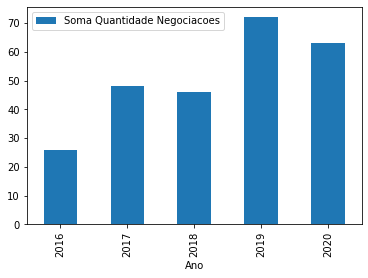

In [ ]:
# Resposta do exercício

resposta.toPandas().plot(x='Ano', y='Soma Quantidade Negociacoes', kind = 'bar')

## Exercício 3 

Qual o total de despesas em salários nos anos de 2016 a 2020 em cada região na qual a equipe está localizada, considerando o cargo de nível junior? Arredonde a soma dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "REGIAO", "TOTALDESPESA". Ordene as linhas exibidas primeiro pelo total de despesa em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

In [ ]:
# Resposta do exercício

resposta = pagamento\
   .join(data, on="dataPK")\
   .join(cargo, on="cargoPK")\
   .join(equipe, on="equipePK")\
   .where("cargoNivel = 'JUNIOR' AND dataAno >= 2016 AND dataAno <= 2020")\
   .select("dataAno", "filialRegiaoNome", "salario")\
   .groupBy("dataAno", "filialRegiaoNome")\
   .sum("salario")\
   .withColumn('sum(salario)', round('sum(salario)', 2))\
   .withColumnRenamed("dataAno", "ANO")\
   .withColumnRenamed("filialRegiaoNome", "REGIAO")\
   .withColumnRenamed("sum(salario)", "TOTALDESPESA")\
   .orderBy(desc("TOTALDESPESA"), desc("ANO"))

resposta.show()

+----+------------+------------+
| ANO|      REGIAO|TOTALDESPESA|
+----+------------+------------+
|2020|     SUDESTE|  1257808.67|
|2019|     SUDESTE|  1257808.67|
|2018|     SUDESTE|  1056208.91|
|2017|     SUDESTE|   876154.55|
|2016|     SUDESTE|   489456.84|
|2020|CENTRO-OESTE|   337073.28|
|2019|CENTRO-OESTE|   337073.28|
|2018|CENTRO-OESTE|   337073.28|
|2020|    NORDESTE|    160832.4|
|2019|    NORDESTE|    160832.4|
|2017|CENTRO-OESTE|   154488.24|
+----+------------+------------+



## Exercício 4 

Mostre o resultado do Exercício 3 usando um diagrama de barras que permite a visualização dos resultados por região.

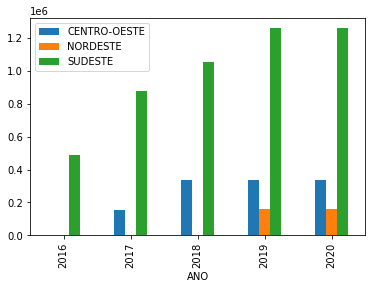

In [ ]:
# Resposta do exercício

legend = ['CENTRO-OESTE', 'NORDESTE', 'SUDESTE']
ax = resposta.toPandas().set_index(['ANO', 'REGIAO']).unstack().plot(kind = 'bar')
ax.legend(legend);

## Exercício 5 

Liste o total dos salários e o total de receitas recebidas, considerando os anos de 2017, 2018 e 2019. Arredonde o total dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS". Ordene as linhas exibidas pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

# Resolvendo o primeiro bloco da consulta
# Qual o total de gastos em salários, considerando cada ano? 
pag = pagamento\
   .join(data, on="dataPK")\
   .select("dataAno", "salario")\
   .where("dataAno BETWEEN 2017 AND 2019")\
   .groupBy("dataAno")\
   .sum("salario")

# Resolvendo o segundo bloco da consulta
# Qual o total de receitas recebidas, considerando cada ano?
neg = negociacao\
   .join(data, on="dataPK")\
   .select("dataAno", "receita")\
   .where("dataAno BETWEEN 2017 AND 2019")\
   .groupBy("dataAno")\
   .sum("receita")

# Realizando a operação de drill across e fazendo as formatações necessárias
resposta = pag\
   .join(neg, on="dataAno")\
   .withColumnRenamed("dataAno", "ANO")\
   .withColumn("sum(salario)", round("sum(salario)",2))\
   .withColumn("sum(receita)", round("sum(receita)",2))\
   .withColumnRenamed("sum(salario)", "TOTAL GASTO EM SALARIOS")\
   .withColumnRenamed("sum(receita)", "TOTAL DE RECEITAS RECEBIDAS")\
   .orderBy(desc("Ano"), desc("ANO"))
   
resposta.show() 

+----+-----------------------+---------------------------+
| ANO|TOTAL GASTO EM SALARIOS|TOTAL DE RECEITAS RECEBIDAS|
+----+-----------------------+---------------------------+
|2019|          1.856766645E7|              3.535331833E7|
|2018|          1.493552647E7|              1.159353966E7|
|2017|             9775279.84|                 7200423.35|
+----+-----------------------+---------------------------+



## Exercício 6 

Mostre o resultado do Exercício 5 usando um diagrama de barras.

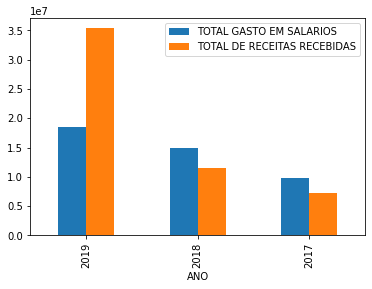

In [ ]:
# Resposta do exercício

resposta.toPandas().set_index(['ANO']).plot(kind = 'bar')

## Exercício 7


Compare a quantidade de negociações que cada uma das equipes realizou nos anos de 2018 e 2019. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "NEGOCIACOES 2018", "NEGOCIACOES 2019". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

Dica: Considere relacionar as equipes por meio da operação drill-across.

In [ ]:
# Resposta do exercício

# Resolvendo o primeiro bloco da consulta
# Qual a quantidade de negociações no ano de 2018? 
neg_2018 = data\
   .join(negociacao, on='dataPK')\
   .join(equipe, on='equipePK')\
   .where('dataAno = 2018')\
   .select('equipeNome', 'filialNome', 'quantidadeNegociacoes')\
   .groupBy('equipeNome', 'filialNome')\
   .sum('quantidadeNegociacoes')\
   .withColumnRenamed('sum(quantidadeNegociacoes)', 'NEGOCIACOES2018')

# Resolvendo o segundo bloco da consulta
# Qual a quantidade de negociações no ano de 2019? 
neg_2019 = data\
   .join(negociacao, on='dataPK')\
   .join(equipe, on='equipePK')\
   .where('dataAno=2019')\
   .select('equipeNome', 'filialNome', 'quantidadeNegociacoes')\
   .groupBy('equipeNome', 'filialNome')\
   .sum('quantidadeNegociacoes')\
   .withColumnRenamed('sum(quantidadeNegociacoes)', 'NEGOCIACOES2019')

neg_2018\
   .join(neg_2019, on=['equipeNome', 'filialNome'])\
   .withColumnRenamed('equipeNome', 'NOME DA EQUIPE')\
   .withColumnRenamed('filialNome', 'NOME DA FILIAL')\
   .withColumn('NEGOCIACOES2018', round('NEGOCIACOES2018',2))\
   .withColumn('NEGOCIACOES2019', round('NEGOCIACOES2019',2))\
   .orderBy('NOME DA EQUIPE', 'NOME DA FILIAL')\
   .show()

+--------------+--------------------+---------------+---------------+
|NOME DA EQUIPE|      NOME DA FILIAL|NEGOCIACOES2018|NEGOCIACOES2019|
+--------------+--------------------+---------------+---------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|            149|            135|
| APP - DESKTOP|SAO PAULO - AV. P...|            132|            135|
|  APP - MOBILE|CAMPO GRANDE - CE...|             98|             88|
|  APP - MOBILE|RIO DE JANEIRO - ...|             99|            112|
|  APP - MOBILE|SAO PAULO - AV. P...|            104|            108|
|           WEB|CAMPO GRANDE - CE...|            100|             95|
|           WEB|RIO DE JANEIRO - ...|             91|            106|
|           WEB|SAO PAULO - AV. P...|             76|             87|
+--------------+--------------------+---------------+---------------+



## Exercício 8 

Liste os setores dos clientes e a soma de suas respectivas receitas para o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "SETOR DO CLIENTE", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

negociacao\
   .join(data, on="dataPK")\
   .join(cliente, on="clientePK")\
   .where("dataAno = 2020 AND dataSemestre = 2")\
   .select("clienteSetor", "receita")\
   .groupBy("clienteSetor")\
   .sum("receita")\
   .orderBy("sum(receita)")\
   .withColumn("sum(receita)", round("sum(receita)",2))\
   .withColumnRenamed("clienteSetor", "SETOR DO CLIENTE")\
   .withColumnRenamed("sum(receita)", "TOTAL DE RECEITAS")\
   .orderBy(desc("TOTAL DE RECEITAS"))\
   .show()

+-------------------+-----------------+
|   SETOR DO CLIENTE|TOTAL DE RECEITAS|
+-------------------+-----------------+
|BEBIDAS E ALIMENTOS|       5749704.68|
|              SAUDE|        3119775.3|
|         TECNOLOGIA|       2465926.05|
|          VESTUARIO|       2336266.49|
|            CREDITO|         998789.6|
+-------------------+-----------------+



## Exercício 9 

Analise a resposta do Exercício 8 para identificar qual o setor do cliente que obteve o maior total de receitas. Mostre o total de receitas por mês para esse setor do cliente, considerando o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "MES", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente e depois pelo mês em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

negociacao\
   .join(data, on="dataPK")\
   .join(cliente, on="clientePK")\
   .where("dataAno = 2020 AND dataSemestre = 2 AND clienteSetor = 'BEBIDAS E ALIMENTOS'")\
   .select("dataMes", "receita")\
   .groupBy("dataMes")\
   .sum("receita")\
   .orderBy("dataMes")\
   .withColumn("sum(receita)", round("sum(receita)",2))\
   .withColumnRenamed("dataMes", "MES")\
   .withColumnRenamed("sum(receita)", "TOTAL DE RECEITAS")\
   .orderBy(desc("TOTAL DE RECEITAS"), desc("MES"))\
   .show()

+---+-----------------+
|MES|TOTAL DE RECEITAS|
+---+-----------------+
| 11|        1156403.3|
| 10|       1091389.49|
| 12|         899122.7|
|  9|        877223.55|
|  8|        875934.29|
|  7|        849631.35|
+---+-----------------+



## Exercício 10 

Analise a resposta do Exercício 9 para identificar qual mês gerou o maior total de receitas para o setor de cliente identificado no Exercício 8. Mostre o total de receitas das equipes, considerando o segundo semestre do ano de 2020, o setor de cliente identificado no Exercício 8 e o mês identificado no Exercício 9. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente, e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

negociacao\
   .join(data, on="dataPK")\
   .join(cliente, on="clientePK")\
   .join(equipe, on="equipePK")\
   .where("dataAno = 2020 AND dataMes = 11 AND clienteSetor = 'BEBIDAS E ALIMENTOS'")\
   .select("equipeNome", "filialNome", "receita")\
   .groupBy("equipeNome", "filialNome")\
   .sum("receita")\
   .withColumn("sum(receita)", round("sum(receita)", 2))\
   .withColumnRenamed("equipeNome", "NOME DA EQUIPE")\
   .withColumnRenamed("filialNome", "NOME DA FILIAL")\
   .withColumnRenamed("sum(receita)", "TOTAL DE RECEITAS")\
   .orderBy("NOME DA EQUIPE", "NOME DA FILIAL")\
   .show()

+--------------+--------------------+-----------------+
|NOME DA EQUIPE|      NOME DA FILIAL|TOTAL DE RECEITAS|
+--------------+--------------------+-----------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|         35645.65|
| APP - DESKTOP|SAO PAULO - AV. P...|         129409.4|
|  APP - MOBILE|CAMPO GRANDE - CE...|         48714.45|
|  APP - MOBILE|RIO DE JANEIRO - ...|          62138.7|
|  APP - MOBILE|SAO PAULO - AV. P...|         26571.85|
|BI & ANALYTICS|     RECIFE - CENTRO|        527169.75|
|BI & ANALYTICS|SAO PAULO - AV. P...|        149490.15|
|           WEB|CAMPO GRANDE - CE...|         20042.75|
|           WEB|RIO DE JANEIRO - ...|          68596.1|
|           WEB|SAO PAULO - AV. P...|          88624.5|
+--------------+--------------------+-----------------+



## Exercício 11

Liste todas as agregações que podem ser geradas a partir da média dos salários por ano por nome do estado da filial, considerando as equipes localizadas na região de nome SUDESTE. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "ESTADO DA FILIAL", "MEDIA DE SALARIOS". Ordene as linhas exibidas pelo estado da filial em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

pagamento\
   .join(data, on="dataPK")\
   .join(equipe, on="equipePK")\
   .join(cargo, on="cargoPK")\
   .where("filialRegiaoNome = 'SUDESTE'")\
   .select("dataAno", "filialEstadoNome", "salario")\
   .cube("dataAno", "filialEstadoNome")\
   .avg("salario")\
   .withColumn("avg(salario)", round("avg(salario)", 2))\
   .withColumnRenamed("dataAno", "ANO")\
   .withColumnRenamed("filialEstadoNome", "ESTADO DA FILIAL")\
   .withColumnRenamed("avg(salario)", "MEDIA DE SALARIOS")\
   .orderBy(desc("ESTADO DA FILIAL"), desc("ANO"))\
   .show()

+----+----------------+-----------------+
| ANO|ESTADO DA FILIAL|MEDIA DE SALARIOS|
+----+----------------+-----------------+
|2020|       SAO PAULO|          7948.39|
|2019|       SAO PAULO|          7948.39|
|2018|       SAO PAULO|          7986.58|
|2017|       SAO PAULO|           7639.4|
|2016|       SAO PAULO|          7735.52|
|null|       SAO PAULO|          7885.68|
|2020|  RIO DE JANEIRO|          7914.97|
|2019|  RIO DE JANEIRO|          7914.97|
|2018|  RIO DE JANEIRO|          7914.97|
|2017|  RIO DE JANEIRO|          7596.64|
|2016|  RIO DE JANEIRO|          7073.21|
|null|  RIO DE JANEIRO|          7767.22|
|2020|            null|          7935.17|
|2019|            null|          7935.17|
|2018|            null|          7953.29|
|2017|            null|          7621.71|
|2016|            null|          7404.36|
|null|            null|          7835.47|
+----+----------------+-----------------+



# <span style="color:blue">Avaliação Final - Notebook </span>

Este *notebook* deve conter as respostas para as consultas analíticas solicitadas nas Questões 8, 9 e 10. É possível especificar as consultas analíticas usando Pandas, o método spark.sql() ou os métodos do módulo pyspark.sql. As consultas devem ser especificadas na seção 6, na célula indicada para resposta.

**IMPORTANTE**

- **As respostas para as Questões 8, 9 e 10 somente serão consideradas se forem especificadas no *notebook*. Portanto, independentemente da alternativa estar certa ou errada, se a consulta analítica correspondente não for especificada, a alternativa será considerada errada.**

- **Caso uma alternativa esteja certa, porém a especificação da consulta analítica correspondente estiver errada no *notebook*, a alternativa será considerada errada.**


O *notebook* contém a constelação de fatos da BI Solutions que deve ser utilizada para responder às questões e também todas as bibliotecas, bases de dados, inicializações, instalações, importações, geração de dataFrames, geração de visões temporárias e conversão dos tipos de dados necessárias para a realização da questão. Portanto, o *notebook* está preparado para ser executado usando Pandas, o método spark.sql() e os métodos do módulo pyspark.sql.

O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.

**INSTRUÇÕES DE ENTREGA**

**O que deve ser entregue:**
- **O notebook com as respostas no formato .ipynb**
- **O notebook com as respostas no formato .pdf**

**Ambos arquivos devem ser nomeados usando o primeiro nome e o último sobrenome do aluno. Por exemplo: CristinaAguiar.ipynb e CristinaAguiar.pdf.**

Boa avaliação!

#1 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma constelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


#2 Obtenção dos Dados da BI Solutions


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [1]:
#instalando o módulo wget
%%capture
!pip install -q wget
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão.

In [2]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente (1).csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos.

In [3]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao (1).csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8.

In [4]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [5]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [6]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark.

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala.

In [7]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo.

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [8]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br>
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados.
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente.


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Geração dos DataFrames em Pandas da BI Solutions

Nesta seção são gerados os DataFrames em Pandas. Atenção aos nomes desses DataFrames.


In [10]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
cargoPandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv')
clientePandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv')
dataPandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv')
equipePandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv')
funcionarioPandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv')
negociacaoPandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv')
pagamentoPandas = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv')

# 5 Geração dos DataFrames em Spark da BI Solutions

Nesta seção são gerados dos DataFrames em Spark. Atenção aos nomes desses DataFrames.


## 5.1 Criação dos DataFrames

In [12]:
#criando os DataFrames em Spark
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
data = spark.read.csv(path="data/data.csv", header=True, sep=",")
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")

## 5.2 Atualização dos Tipos de Dados

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado inteiro. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [13]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado inteiro
colunas_cargo = ["cargoPK"]
colunas_cliente = ["clientePK"]
colunas_data = ["dataPK", "dataDia", "dataMes", "dataBimestre", "dataTrimestre", "dataSemestre", "dataAno"]
colunas_equipe = ["equipePK"]
colunas_funcionario = ["funcPK", "funcDiaNascimento", "funcMesNascimento", "funcAnoNascimento"]
colunas_negociacao = ["equipePK", "clientePK", "dataPK", "quantidadeNegociacoes"]
colunas_pagamento = ["funcPK", "equipePK", "dataPK", "cargoPK", "quantidadeLancamentos"]

In [14]:
# importando o tipo de dado desejado
from pyspark.sql.types import IntegerType


# atualizando o tipo de dado das colunas especificadas
# substituindo as colunas já existentes

for coluna in colunas_cargo:
  cargo = cargo.withColumn(coluna, cargo[coluna].cast(IntegerType()))

for coluna in colunas_cliente:
  cliente = cliente.withColumn(coluna, cliente[coluna].cast(IntegerType()))

for coluna in colunas_data:
  data = data.withColumn(coluna, data[coluna].cast(IntegerType()))

for coluna in colunas_equipe:
  equipe = equipe.withColumn(coluna, equipe[coluna].cast(IntegerType()))

for coluna in colunas_funcionario:
  funcionario = funcionario.withColumn(coluna, funcionario[coluna].cast(IntegerType()))

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(IntegerType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(IntegerType()))

Nos comandos a seguir, primeiro são identificados quais colunas de quais `DataFrames` devem ser do tipo de dado número de ponto flutuante. Na sequência, ocorre a conversão. Por fim, são exibidos os esquemas dos `DataFrames`, possibilitando visualizar a mudança de tipo de dados das colunas especificadas.

In [15]:
# identificando quais colunas de quais DataFrames devem ser do tipo de dado número de ponto flutuante
colunas_negociacao = ["receita"]
colunas_pagamento = ["salario"]

In [16]:
# importando o tipo de dado desejado
from pyspark.sql.types import FloatType


# atualizando o tipo de dado das colunas especificadas
# substituindo as colunas já existentes

for coluna in colunas_negociacao:
  negociacao = negociacao.withColumn(coluna, negociacao[coluna].cast(FloatType()))

for coluna in colunas_pagamento:
  pagamento = pagamento.withColumn(coluna, pagamento[coluna].cast(FloatType()))

In [17]:
# importando funções adicionais
from pyspark.sql.functions import round, desc

## 5.3 Criação de Visões Temporárias

In [18]:
#criando as visões temporárias
cargo.createOrReplaceTempView("cargo")
cliente.createOrReplaceTempView("cliente")
data.createOrReplaceTempView("data")
equipe.createOrReplaceTempView("equipe")
funcionario.createOrReplaceTempView("funcionario")
negociacao.createOrReplaceTempView("negociacao")
pagamento.createOrReplaceTempView("pagamento")

# 6 Respostas

Lembre-se que é possível especificar as consultas analíticas usando Pandas, o método spark.sql() ou os métodos do módulo pyspark.sql.

## Especificação da Consulta Analítica da Questão 8

Considere a constelação de fatos da BI Solutions e a seguinte solicitação de consulta:

“Qual a quantidade de negociações por ano e pela cidade da equipe, considerando equipes localizadas na mesma cidade de seus clientes?” Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: ANO, CIDADE e TOTALNEGOCIACOES. Ordene as linhas exibidas primeiro por ano em ordem ascendente e depois por cidade em ordem ascendente.

Considerando a resposta para a consulta analítica, assinale a alternativa correta:


a.
Com exceção do ano de 2020, as negociações realizadas pelas equipes localizadas na cidade de SAO PAULO aumentaram paulatinamente.


b.
As equipes localizadas na cidade do RIO DE JANEIRO possuem menos negociações do que as demais equipes em todos os anos.


c.
Três cidades distintas possuem equipes que negociaram mais de uma vez em 2019.


d.
Quatro cidades distintas possuem equipes que negociaram mais de uma vez em 2018.


e.
As equipes localizadas na cidade de SAO PAULO possuem mais negociações do que as demais equipes em todos os anos.

In [19]:
# Resposta da Questão 8

# Letra: A
# a.Com exceção do ano de 2020, as negociações realizadas pelas equipes localizadas na cidade de SAO PAULO aumentaram paulatinamente.

# método utilizado - Spark SQL


In [20]:
query = """
SELECT
d.dataAno AS ANO,
e.filialCidade AS CIDADE,
SUM(n.quantidadeNegociacoes) AS TOTALNEGOCIACOES
FROM
negociacao n
JOIN equipe e ON (n.equipePK = e.equipePK)
JOIN data d ON (n.dataPK = d.dataPK)
JOIN cliente c ON (n.clientePK = c.clientePK)
WHERE
c.clienteCidade = e.filialCidade
GROUP BY
d.dataAno,
e.filialCidade
ORDER BY
d.dataAno,
e.filialCidade
"""

spark.sql(query).show()

+----+--------------+----------------+
| ANO|        CIDADE|TOTALNEGOCIACOES|
+----+--------------+----------------+
|2016|RIO DE JANEIRO|              20|
|2016|     SAO PAULO|              17|
|2017|  CAMPO GRANDE|               4|
|2017|RIO DE JANEIRO|              35|
|2017|     SAO PAULO|              41|
|2018|  CAMPO GRANDE|               4|
|2018|RIO DE JANEIRO|              51|
|2018|     SAO PAULO|              69|
|2019|  CAMPO GRANDE|               6|
|2019|        RECIFE|               9|
|2019|RIO DE JANEIRO|              67|
|2019|     SAO PAULO|             146|
|2020|  CAMPO GRANDE|               5|
|2020|        RECIFE|               5|
|2020|RIO DE JANEIRO|              45|
|2020|     SAO PAULO|             112|
+----+--------------+----------------+



In [21]:
# CONFERINDO A RESPOSTA

query_sp = """
SELECT
d.dataAno AS ANO,
e.filialCidade AS CIDADE,
SUM(n.quantidadeNegociacoes) AS TOTALNEGOCIACOES
FROM
negociacao n
JOIN equipe e ON (n.equipePK = e.equipePK)
JOIN data d ON (n.dataPK = d.dataPK)
JOIN cliente c ON (n.clientePK = c.clientePK)
WHERE
c.clienteCidade = e.filialCidade AND
e.filialCidade = 'SAO PAULO'
GROUP BY
d.dataAno,
e.filialCidade
ORDER BY
d.dataAno,
e.filialCidade
"""

spark.sql(query_sp).show()

+----+---------+----------------+
| ANO|   CIDADE|TOTALNEGOCIACOES|
+----+---------+----------------+
|2016|SAO PAULO|              17|
|2017|SAO PAULO|              41|
|2018|SAO PAULO|              69|
|2019|SAO PAULO|             146|
|2020|SAO PAULO|             112|
+----+---------+----------------+



## Especificação da Consulta Analítica da Questão 9

Considere a constelação de fatos da BI Solutions e a seguinte solicitação de consulta:

“Liste todas as agregações que podem ser geradas a partir da média dos salários dos funcionários que moram na região SUDESTE por sexo e por ano.” Arredonde a média dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: SEXO, ANO e MEDIASALARIO. Ordene as linhas exibidas primeiro por sexo, depois por ano, depois por média dos salários, todos em ordem ascendente.

Considerando a resposta para a consulta analítica, assinale a alternativa correta:


a.
São retornadas 18 linhas, das quais 6 linhas são referentes ao sexo feminino e 6 linhas são referentes ao sexo masculino.


b.
A quarta e a quinta linhas retornadas contêm o mesmo valor de média dos salários e referem-se a anos diferentes.


c.
São retornadas 10 linhas, das quais 5 linhas são referentes ao sexo feminino e 5 linhas são referentes ao sexo masculino.


d.
São retornadas 13 linhas, das quais 6 linhas são referentes ao sexo feminino e 6 linhas são referentes ao sexo masculino.


e.
As médias dos salários das funcionárias de sexo feminino para os anos de 2017 e 2018 são menores do que as médias dos salários dos funcionários do sexo masculino para os anos de 2017 e 2018, respectivamente.

In [22]:
# Resposta da Questão 9

# LETRA A
# a.São retornadas 18 linhas, das quais 6 linhas são referentes ao sexo feminino e 6 linhas são referentes ao sexo masculino.

# método utilizado - Spark SQL

In [23]:
query = """
SELECT
f.funcSexo AS SEXO,
d.dataAno AS ANO,
ROUND(AVG(p.salario),2) AS MEDIASALARIO
FROM
funcionario f
JOIN pagamento p ON (f.funcPK = p.funcPK)
JOIN data d ON (p.dataPK = d.dataPK)
WHERE
f.funcRegiaoNome ='SUDESTE'
GROUP BY CUBE
(f.funcSexo,
d.dataAno)
ORDER BY
SEXO,
ANO,
MEDIASALARIO
"""

spark.sql(query).show()

+----+----+------------+
|SEXO| ANO|MEDIASALARIO|
+----+----+------------+
|null|null|     7446.14|
|null|2016|     6542.64|
|null|2017|     7181.86|
|null|2018|     7582.23|
|null|2019|     7596.89|
|null|2020|     7596.89|
|   F|null|     7821.46|
|   F|2016|      8587.4|
|   F|2017|     8575.92|
|   F|2018|     8333.57|
|   F|2019|     7329.74|
|   F|2020|     7329.74|
|   M|null|     7322.23|
|   M|2016|     5903.65|
|   M|2017|     6763.65|
|   M|2018|      7345.4|
|   M|2019|     7689.92|
|   M|2020|     7689.92|
+----+----+------------+



## Especificação da Consulta Analítica da Questão 10

Considere a constelação de fatos da BI Solutions e a seguinte solicitação de consulta:

"Qual o lucro ou prejuízo médio de cada equipe localizada na região SUDESTE do BRASIL?", sendo que lucro representa a diferença entre a média das receitas e a média dos salários. Arredonde o lucro ou prejuízo para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: NOME DA EQUIPE, NOME DA FILIAL, CIDADE DA FILIAL, LUCRO OU PREJUÍZO.

Considerando a resposta para a consulta analítica, assinale a alternativa correta:


a.
As equipes localizadas na cidade de RIO DE JANEIRO garantem mais lucro à BI Solutions do que as equipes localizadas na cidade de SAO PAULO.


b.
A soma dos lucros gerados pelas equipes que possuem APP - MOBILE em seu nome são maiores do que a soma dos lucros gerados pelas equipes que possuem APP - DESKTOP em seu nome, independentemente da filial e da cidade na qual estão localizadas.


c.
Equipes que possuem WEB em seu nome, independentemente da filial e da cidade na qual estão localizadas, proveem mais lucro à BI Solutions do que as demais equipes.


d.
Todas as equipes tiveram lucro, independentemente da cidade na qual elas estão localizadas.


e.
Os lucros gerados pelas equipes que possuem BI & ANALYTICS em seu nome, independentemente da filial e da cidade na qual estão localizadas, são maiores do que a soma dos lucros gerados pelas demais equipes.

In [24]:
# Resposta da Questão 10

# LETRA E
# e. Os lucros gerados pelas equipes que possuem BI & ANALYTICS em seu nome, independentemente da filial e da cidade na qual estão localizadas, são maiores do que a soma dos lucros gerados pelas demais equipes.

# método utilizado - Spark SQL

In [25]:
query = """
SELECT
  NOMEDAEQUIPE,
  NOMEDAFILIAL,
  CIDADEDAFILIAL,
  ROUND(AVG(LUCROOUPREJUIZO),2) AS LUCROOUPREJUIZO
FROM (
  SELECT
    d.dataAno AS ANO,
    e.equipeNome AS NOMEDAEQUIPE,
    e.filialNome AS NOMEDAFILIAL,
    e.filialCidade AS CIDADEDAFILIAL,
    n.receita - p.salario AS LUCROOUPREJUIZO
  FROM
    equipe e
  JOIN
    negociacao n ON (e.equipePK = n.equipePK)
  JOIN
    pagamento p ON (e.equipePK = p.equipePK)
  JOIN
    data d ON (p.dataPK = d.dataPK)
  WHERE
    e.filialRegiaoNome = 'SUDESTE'
) AS subquery
GROUP BY
  NOMEDAEQUIPE,
  NOMEDAFILIAL,
  CIDADEDAFILIAL
ORDER BY
  NOMEDAEQUIPE,
  NOMEDAFILIAL,
  CIDADEDAFILIAL;
"""
spark.sql(query).show()

+--------------+--------------------+--------------+---------------+
|  NOMEDAEQUIPE|        NOMEDAFILIAL|CIDADEDAFILIAL|LUCROOUPREJUIZO|
+--------------+--------------------+--------------+---------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|       10452.61|
| APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         9511.4|
|  APP - MOBILE|RIO DE JANEIRO - ...|RIO DE JANEIRO|        5828.01|
|  APP - MOBILE|SAO PAULO - AV. P...|     SAO PAULO|        5642.31|
|BI & ANALYTICS|SAO PAULO - AV. P...|     SAO PAULO|       55019.53|
|           WEB|RIO DE JANEIRO - ...|RIO DE JANEIRO|        -370.04|
|           WEB|SAO PAULO - AV. P...|     SAO PAULO|         680.37|
+--------------+--------------------+--------------+---------------+

